In [ ]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# ! pip install wordcloud

In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvseries.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [ ]:
# profile = ProfileReport(df_tvshows)
# profile

In [ ]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (5, 5))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

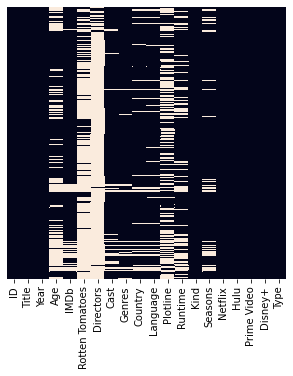

In [ ]:
data_investigate(df_tvshows)

In [ ]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_tvshows = df_tvshows.drop(['Directors'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
df_tvshows.fillna({'Seasons': 1}, inplace = True)
# df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons              int32
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

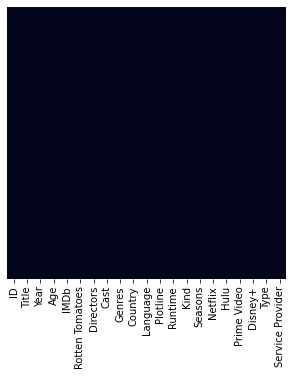

In [ ]:
data_investigate(df_tvshows)

In [ ]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3        1     0            0        0     1           Netflix  
1      18        1     0            0        0     1           Netflix  
2       2        1     0            0        0     1           Netflix  
3       6        1     0            1        1     1           Netflix  
4       3        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
df_tvshows.describe()

ID         Year      Seasons      Netflix         Hulu  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     3.012334     0.341311     0.293999   
std    1568.227662    11.726176     4.105634     0.474193     0.455633   
min       1.000000  1901.000000     1.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     1.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     1.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     3.000000     1.000000     1.000000   
max    5432.000000  2020.000000    53.000000     1.000000     1.000000   

       Prime Video      Disney+    Type  
count  5432.000000  5432.000000  5432.0  
mean      0.403351     0.033689     1.0  
std       0.490615     0.180445     0.0  
min       0.000000     0.000000     1.0  
25%       0.000000     0.000000     1.0  
50%       0.000000     0.000000     1.0  
75%       1.000000     0.000000     1.0  
max       1.000000     1.000000     1.0

In [ ]:
df_tvshows.corr()

ID      Year   Seasons   Netflix      Hulu  Prime Video  \
ID           1.000000 -0.031346 -0.048292 -0.646330  0.034293     0.441264   
Year        -0.031346  1.000000 -0.219170  0.222316 -0.065807    -0.198675   
Seasons     -0.048292 -0.219170  1.000000 -0.052478  0.223957    -0.061613   
Netflix     -0.646330  0.222316 -0.052478  1.000000 -0.366515    -0.515086   
Hulu         0.034293 -0.065807  0.223957 -0.366515  1.000000    -0.377374   
Prime Video  0.441264 -0.198675 -0.061613 -0.515086 -0.377374     1.000000   
Disney+      0.195409 -0.022741  0.001924 -0.119344 -0.075701    -0.151442   
Type              NaN       NaN       NaN       NaN       NaN          NaN   

              Disney+  Type  
ID           0.195409   NaN  
Year        -0.022741   NaN  
Seasons      0.001924   NaN  
Netflix     -0.119344   NaN  
Hulu        -0.075701   NaN  
Prime Video -0.151442   NaN  
Disney+      1.000000   NaN  
Type              NaN   NaN

In [ ]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [ ]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [ ]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [ ]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [ ]:
df_tvshows_ott = df_tvshows.copy()

In [ ]:
# Platforms
netflix_tvshows_ott_count = len(df_tvshows_ott.loc[(df_tvshows_ott['Netflix'] > 0)])
hulu_tvshows_ott_count = len(df_tvshows_ott.loc[(df_tvshows_ott['Hulu'] > 0)])
prime_video_tvshows_ott_count = len(df_tvshows_ott.loc[(df_tvshows_ott['Prime Video'] > 0)])
disney_tvshows_ott_count = len(df_tvshows_ott.loc[(df_tvshows_ott['Disney+'] > 0)])
 
Platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
Count = [netflix_tvshows_ott_count, hulu_tvshows_ott_count, prime_video_tvshows_ott_count, disney_tvshows_ott_count]
 
fig = px.pie(names = Platform, values = Count, title = 'TV Shows Count Of Different Platforms', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label') 
fig.show()

In [ ]:
print(f'''
      Total '{df_tvshows_ott['Title'].count()}' Titles are available on All Platforms, out of Which,\n
      Total '{df_tvshows_ott['Netflix'].sum()}' Titles are available on 'Netflix'
      Total '{df_tvshows_ott['Hulu'].sum()}' Titles are available on 'Hulu'
      Total '{df_tvshows_ott['Prime Video'].sum()}' Titles are available on 'Prime video'
      Total '{df_tvshows_ott['Disney+'].sum()}' Titles are available on 'Disney+'
      ''')


      Total '5432' Titles are available on All Platforms, out of Which,

      Total '1854' Titles are available on 'Netflix'
      Total '1597' Titles are available on 'Hulu'
      Total '2191' Titles are available on 'Prime video'
      Total '183' Titles are available on 'Disney+'
      


In [ ]:
df_tvshows_ott['OTT_Count'] = df_tvshows_ott['Netflix'] + df_tvshows_ott['Hulu'] + df_tvshows_ott['Prime Video'] + df_tvshows_ott['Disney+']
 
(df_tvshows_ott['OTT_Count'].value_counts()/df_tvshows_ott.shape[0])*100

1    93.372607
2     6.019882
3     0.607511
Name: OTT_Count, dtype: float64

In [ ]:
print(f'''
      Total '{df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 4].shape[0]}' Titles are available on All Platforms
      Total '{df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 3].shape[0]}' Titles are available on at least 3 Platforms
      Total '{df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 2].shape[0]}' Titles are available on at least 2 Platforms
      Total '{df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 1].shape[0]}' Titles are available on at least 1 Platforms
      ''')


      Total '0' Titles are available on All Platforms
      Total '33' Titles are available on at least 3 Platforms
      Total '327' Titles are available on at least 2 Platforms
      Total '5072' Titles are available on at least 1 Platforms
      


In [ ]:
# TV Shows Available on All Platforms

# df_tvshows_ott[(df_tvshows_ott['Netflix'] == 1) & (df_tvshows_ott['Hulu'] == 1) & (df_tvshows_ott['Prime Video'] == 1) & (df_tvshows_ott['Disney+'] == 1)]
print('\nTotal ', df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 4].shape[0], ' Titles are available on All Platforms\n')
tvshows_on_4_platforms = df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 4]
tvshows_on_4_platforms


Total  0  Titles are available on All Platforms



Empty DataFrame
Columns: [ID, Title, Year, Age, IMDb, Rotten Tomatoes, Directors, Cast, Genres, Country, Language, Plotline, Runtime, Kind, Seasons, Netflix, Hulu, Prime Video, Disney+, Type, Service Provider, OTT_Count]
Index: []

[0 rows x 22 columns]

In [ ]:
# TV Shows Available on at least 3 Platforms

print('\nTotal ', df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 3].shape[0], ' Titles are available on at least 3 Platforms\n')
tvshows_on_3_platforms = df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 3]
tvshows_on_3_platforms


Total  33  Titles are available on at least 3 Platforms



ID                              Title  Year Age IMDb Rotten Tomatoes  \
3        4                                Amy  2015  18    7              87   
29      30                             Zapped  2014   0  6.8               6   
522    523               Parks and Recreation  2009   7  8.6              93   
566    567     Star Trek: The Next Generation  1987   7  8.6              91   
574    575                      The Good Wife  2009   7  8.3              93   
591    592                        Burn Notice  2007   7  7.9              88   
596    597              American Horror Story  2011  18    8              NA   
602    603                          Star Trek  1966   7  8.3              80   
626    627                          Mushi-Shi  2005  16  8.5             100   
643    644         Star Trek: Deep Space Nine  1993   7    8              91   
654    655  Law & Order: Special Victims Unit  1999   7    8              78   
681    682                 Star Trek: Voyager  1995   7  7.8              76   
706    707                             Merlin  2008  16  7.9              85   
741    742                            Pokémon  1997   0  7.5              NA   
742    743                             Cheers  1982   7  7.8              NA   
744    745              Star Trek: Enterprise  2001   7  7.5              57   
782    783             Descendants of the Sun  2016  16  8.3              NA   
786    787                     Ancient Aliens  2010   7  7.3              NA   
830    831                               Rake  2010  16  8.5             100   
839    840                H2O: Just Add Water  2006   7  7.2              NA   
945    946                     Forensic Files  1996  16  8.8              NA   
995    996     America's Funniest Home Videos  1989   0  6.2              NA   
1043  1044                          Yu-Gi-Oh!  1998   7  7.2              NA   
1162  1163                            Sonic x  2003   7  6.2              NA   
1326  1327            Hangar 1: The UFO Files  2015   7  7.3              NA   
1370  1371                             Pocoyo  2005   0  7.4              NA   
1438  1439                    Yu-Gi-Oh! Arc-V  2014   7  6.2              NA   
1441  1442          America's Book of Secrets  2012  16  6.8              NA   
1676  1677                            Oddbods  2015   7  6.4              NA   
1734  1735                    Yu-Gi-Oh! Zexal  2011   7  4.9              NA   
1764  1765                       LEGO Friends  2012   0  5.3              NA   
1981  1982          Pororo the Little Penguin  2003   0  5.9              NA   
2028  2029                Tayo the Little Bus  2010  NR  5.6              NA   

          Directors                                               Cast  \
3                NA  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
29    Peter DeLuise  James Buckley,Kenneth Collard,Louis Emerick,Pa...   
522              NA  Amy Poehler,Nick Offerman,Aubrey Plaza,Jim O'H...   
566              NA  Patrick Stewart,Jonathan Frakes,LeVar Burton,M...   
574              NA  Julianna Margulies,Matt Czuchry,Christine Bara...   
591              NA  Jeffrey Donovan,Gabrielle Anwar,Bruce Campbell...   
596              NA  Evan Peters,Sarah Paulson,Denis O'Hare,Kathy B...   
602              NA  Leonard Nimoy,William Shatner,DeForest Kelley,...   
626              NA  Yûto Nakano,Travis Willingham,Kôjun Itô,Jennif...   
643              NA  Avery Brooks,Rene Auberjonois,Cirroc Lofton,Al...   
654              NA  Mariska Hargitay,Ice-T,Dann Florek,Richard Bel...   
681              NA  Kate Mulgrew,Robert Beltran,Roxann Dawson,Robe...   
706              NA  John Hurt,Colin Morgan,Bradley James,Richard W...   
741              NA  Ikue Ôtani,Rica Matsumoto,Rodger Parsons,Shin'...   
742              NA  Ted Danson,Rhea Perlman,John Ratzenberger,Geor...   
744              NA  Scott Bakula,John Billingsley,Jolene Blalock,D...   
782              NA  Song Joo

In [ ]:
# TV Shows Available on at least 2 Platforms
print('\nTotal ', df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 2].shape[0], ' Titles are available on at least 2 Platforms\n')
tvshows_on_2_platforms = df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 2]
tvshows_on_2_platforms


Total  327  Titles are available on at least 2 Platforms



ID                            Title  Year Age IMDb Rotten Tomatoes  \
7        8                      Retribution  2015  NR    7              28   
15      16                              Eli  2019  18  7.9              46   
16      17                         The Oath  2016  NR  6.6              88   
17      18                             Zero  2018  NR  5.5              88   
18      19                     The Outsider  2018  NR  7.8              36   
...    ...                              ...   ...  ..  ...             ...   
3680  3681               Rudy Maxa's Travel  2001   0  7.8              NA   
3697  3698  WIRED's Autocomplete Interviews  2016  NR   NA              NA   
3698  3699    Out of Office with Brent Rose  2015  NR   NA              NA   
3707  3708                     Bogus Beauty  2017  NR   NA              NA   
3714  3715     pocket.watch Challenge Squad  2018  NR  4.4              NA   

          Directors                                               Cast  \
7                NA  Joanna Vanderham,John Lynch,Joe Dempsie,Julie ...   
15               NA  Sacha Baron Cohen,Hadar Ratzon Rotem,Yael Eita...   
16               NA  Ryan Kwanten,Katrina Law,Cory Hardrict,Joseph ...   
17    Aanand L. Rai  Giuseppe Dave Seke,Haroun Fall,Beatrice Grannò...   
18               NA  Ben Mendelsohn,Bill Camp,Jeremy Bobb,Mare Winn...   
...             ...                                                ...   
3680             NA                        Rudy Maxa,Kanoelehua Miller   
3697             NA                                                 NA   
3698             NA                                         Brent Rose   
3707             NA                Selorm Kploanyi,Chrissy Mahlmeister   
3714             NA  Vitaly Gk,Jetta Juriansz,Brandi Say,Dalton Alf...   

                                    Genres         Country  ... Runtime  \
7                   Drama,Mystery,Thriller  United Kingdom  ...     231   
15                           Drama,History          France  ...      53   
16                             Crime,Drama   United States  ...      60   
17      Action,Comedy,Drama,Fantasy,Sci-Fi           Italy  ...     164   
18    Crime,Drama,Fantasy,Mystery,Thriller   United States  ...      60   
...                                    ...             ...  ...     ...   
3680                           Documentary   United States  ...      30   
3697                                    NA              NA  ...      NA   
3698                           Documentary   United States  ...      NA   
3707                                Comedy   United States  ...      NA   
3714                                Family   United States  ...      23   

           Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
7     tv series       1       1     0            1        0     1   
15    tv series       1       1     0            1        0     1   
16    tv series       2       1     1            0        0     1   
17    tv series       1       1     0            1        0     1   
18    tv series       1       1     0            1        0     1   
...         ...     ...     ...   ...          ...      ...   ...   
3680  tv series       5       0     1            1        0     1   
3697  tv series       1       0     1            1        0     1   
3698  tv series       1       0     1            1        0     1   
3707  tv series       1       0     1            1        0     1   
3714  tv series       1       0     1            1        0     1   

      Service Provider  OTT_Count  
7              Netflix          2  
15             Netflix          2  
16             Netflix          2  
17             Netflix          2  
18             Netflix          2  
...                ...        ...  
3680       Prime Video          2  
3697       Prime Video          2  
3698       Prime Video          2  
3707       Prime Video          2  
3714       Prime Video          2  

[327 rows x 22 colu

In [ ]:
# TV Shows Available on at least 1 Platform
print('\nTotal ', df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 1].shape[0], ' Titles are available on at least 1 Platforms\n')
tvshows_on_1_platforms = df_tvshows_ott[df_tvshows_ott['OTT_Count'] == 1]
tvshows_on_1_platforms


Total  5072  Titles are available on at least 1 Platforms



ID                            Title  Year Age IMDb Rotten Tomatoes  \
0        1                      Snowpiercer  2013  18  6.9              94   
1        2                     Philadelphia  1993  13  8.8              80   
2        3                             Roma  2018  18  8.7              93   
4        5              The Young Offenders  2016  NR    8             100   
5        6                          Suburra  2015  NR  7.9              91   
...    ...                              ...   ...  ..  ...             ...   
5427  5428                  Awesome Animals  2013  13   NA              NA   
5428  5429  Tut's Treasures: Hidden Secrets  2018  13  7.4              NA   
5429  5430                      Wild Russia  2018   7  8.4              NA   
5430  5431                      Love & Vets  2017  13  8.6              NA   
5431  5432         United States of Animals  2016  13  6.3              NA   

     Directors                                               Cast  \
0           NA  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1           NA  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2           NA  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
4           NA  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   
5           NA  Alessandro Borghi,Giacomo Ferrara,Filippo Nigr...   
...        ...                                                ...   
5427        NA                             Jake Cuddemi,Alex Wild   
5428        NA  Aidan Dodson,Salima Ikram,Paul Mercier,Chris N...   
5429        NA  Christian Brückner,Jason Hildebrandt,Paterson ...   
5430        NA  Will Draper,Francoise Tyler,Olivia,Carrie McCo...   
5431        NA  Quincy Dunn-Baker,Jo Mendenhall,Dale Anderson,...   

                                Genres                       Country  ...  \
0         Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                               Comedy                 United States  ...   
2     Action,Drama,History,Romance,War  United Kingdom,United States  ...   
4                               Comedy        United Kingdom,Ireland  ...   
5                         Action,Crime                         Italy  ...   
...                                ...                           ...  ...   
5427                                NA                            NA  ...   
5428               Documentary,History                United Kingdom  ...   
5429                       Documentary                       Germany  ...   
5430                        Reality-TV                 United States  ...   
5431                                NA                 United States  ...   

     Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0         60  tv series       3       1     0            0        0     1   
1         22  tv series      18       1     0            0        0     1   
2         52  tv series       2       1     0            0        0     1   
4         30  tv series       3       1     0            0        0     1   
5         50  tv series       3       1     0            0        0     1   
...      ...        ...     ...     ...   ...          ...      ...   ...   
5427      NA  tv series       1       0     0            0        1     1   
5428      NA  tv series       1       0     0            0        1     1   
5429     360  tv series       2       0     0            0        1     1   
5430      42  tv series       1       0     0            0        1     1   
5431      22  tv series       1       0     0            0        1     1   

      Service Provider  OTT_Count  
0              Netflix          1  
1              Netflix          1  
2              Netflix          1  
4              Netflix          1  
5              Netflix          1  
...                ...        ...  
5427           Disney+          1  
5428           Disney+          1  
5429           Disney+          1  
5430           Disney+          

In [ ]:
df_tvshows_titles = df_tvshows.copy()

In [ ]:
df_tvshows_titles.drop(df_tvshows_titles.loc[df_tvshows_titles['Title'] == "NA"].index, inplace = True)
# df_tvshows_titles = df_tvshows_titles[df_tvshows_titles.Title != "NA"]
df_tvshows_titles['Title'] = df_tvshows_titles['Title']

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_titles_tvshows = df_tvshows_titles.loc[df_tvshows_titles['Netflix'] == 1]
hulu_titles_tvshows = df_tvshows_titles.loc[df_tvshows_titles['Hulu'] == 1]
prime_video_titles_tvshows = df_tvshows_titles.loc[df_tvshows_titles['Prime Video'] == 1]
disney_titles_tvshows = df_tvshows_titles.loc[df_tvshows_titles['Disney+'] == 1]

In [ ]:
df_tvshows_title = df_tvshows_titles['Title']
tvshow_titles_w = " ".join(df_tvshows_title)

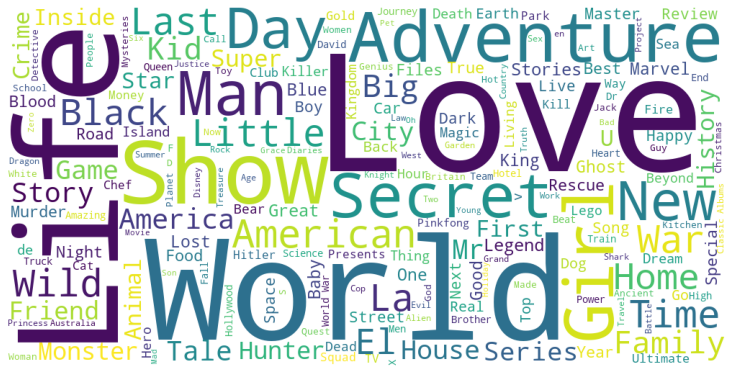

In [ ]:
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tvshow_titles_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
df_tvshows_year = df_tvshows.copy()

In [ ]:
df_tvshows_year.drop(df_tvshows_year.loc[df_tvshows_year['Year'] == "NA"].index, inplace = True)
# df_tvshows_year = df_tvshows_year[df_tvshows_year.Year != "NA"]
df_tvshows_year['Year'] = df_tvshows_year['Year'].astype(int)

In [ ]:
df_year_new_tvshows = df_tvshows_year.sort_values(by = 'Year', ascending = False).reset_index()
df_year_new_tvshows = df_year_new_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_year['Year'] == (df_tvshows_year['Year'].max()))
# df_year_new_tvshows = df_tvshows_year[filter]

# newest_rated_tvshow = df_tvshows_year.loc[df_tvshows_year['Year'].idxmax()]

print('\nTV Shows with Latest Year Ever  are : \n')
df_year_new_tvshows.head(5)


TV Shows with Latest Year Ever  are : 



ID                                              Title  Year Age IMDb  \
0   894                                          Gentefied  2020  18  7.4   
1  3004  BOFURI: I Don’t Want to Get Hurt, so I’ll Max ...  2020  16  7.5   
2   940                                     The Pharmacist  2020  18  7.7   
3  3038        The Bachelor Presents: Listen to Your Heart  2020  16  4.9   
4  1425                                       Almost Happy  2020  NR  6.8   

  Rotten Tomatoes Directors  \
0              91        NA   
1              NA        NA   
2              89        NA   
3              NA        NA   
4              NA        NA   

                                                Cast  \
0  Joaquín Cosio,Joseph Julian Soria,Karrie Marti...   
1  Jad Saxton,Megan Shipman,Anthony Bowling,Tia L...   
2                                                 NA   
3  Chris Harrison,Jamie Gabrielle,Matt Ranaudo,Br...   
4  Sebastián Wainraich,Natalie Pérez,Santiago Kor...   

                                             Genres        Country  ...  \
0                                            Comedy  United States  ...   
1  Animation,Action,Adventure,Comedy,Fantasy,Sci-Fi          Japan  ...   
2                                 Documentary,Crime  United States  ...   
3          Drama,Game-Show,Music,Reality-TV,Romance  United States  ...   
4                                            Comedy      Argentina  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      NA  tv series   
1                                                 NA      23  tv series   
2  Seventeen year-old Kim is the pride and joy of...     217  tv series   
3                                                 NA     120  tv series   
4                                                 NA      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        1     0            0        0     1           Netflix  
1       1        0     1            0        0     1              Hulu  
2       1        1     0            0        0     1           Netflix  
3       1        0     1            0        0     1              Hulu  
4       1        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
df_year_old_tvshows = df_tvshows_year.sort_values(by = 'Year', ascending = True).reset_index()
df_year_old_tvshows = df_year_old_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_year['Year'] == (df_tvshows_year['Year'].min()))
# df_year_old_tvshows = df_tvshows_year[filter]

print('\nTV Shows with Oldest Year Ever  are : \n')
df_year_old_tvshows.head(5)


TV Shows with Oldest Year Ever  are : 



ID                               Title  Year Age IMDb Rotten Tomatoes  \
0  4665  Gods & Monsters with Tony Robinson  1901  NR  7.3              NA   
1  4684             History of Westinghouse  1904  NR   NA              NA   
2  2204                     Born To Explore  1914   0  7.5              NA   
3   126                           Nosferatu  1922  NR  6.7              97   
4   139                             College  1927  NR  6.8              12   

  Directors                                               Cast  \
0        NA  Tony Robinson,Little Woodham Villagers,Peter M...   
1        NA                                                 NA   
2        NA  Richard Wiese,Kenneth Lacovara,Belle Aykroyd,D...   
3        NA  Ashleigh Cummings,Ólafur Darri Ólafsson,Jahkar...   
4        NA  Tom Hanks,Peter Scolari,Donna Dixon,Holland Ta...   

                         Genres         Country  ...  \
0                       History  United Kingdom  ...   
1                            NA              NA  ...   
2                     Adventure   United States  ...   
3  Drama,Fantasy,Horror,Mystery   United States  ...   
4                        Comedy   United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      60  tv series   
1                                                 NA      NA  tv series   
2                                                 NA      30  tv series   
3  A young Victoria "Vic" McQueen discovers she h...      60  tv series   
4  After her husband's death, Hana lives on alone...      30  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            1        0     1       Prime Video  
1       1        0     0            1        0     1       Prime Video  
2       8        1     0            0        0     1           Netflix  
3       2        0     0            1        0     1       Prime Video  
4       2        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_year['Year'].unique().shape[0]}' unique Year s were Given, They were Like this,\n
      
{df_tvshows_year.sort_values(by = 'Year', ascending = False)['Year'].unique()}\n

      The Latest Year TV Show Ever is '{df_year_new_tvshows['Title'][0]}' : '{df_year_new_tvshows['Year'].max()}'\n

      The Oldest Year TV Show Ever is '{df_year_old_tvshows['Title'][0]}' : '{df_year_old_tvshows['Year'].min()}'\n
      ''')


      Total '89' unique Year s were Given, They were Like this,

      
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993
 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979
 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951
 1950 1949 1948 1947 1946 1945 1944 1943 1942 1940 1938 1937 1936 1932
 1927 1922 1914 1904 1901]


      The Latest Year TV Show Ever is 'Gentefied' : '2020'


      The Oldest Year TV Show Ever is 'Gods & Monsters with Tony Robinson' : '1901'

      


In [ ]:
netflix_year_new_tvshows = df_year_new_tvshows.loc[df_year_new_tvshows['Netflix']==1].reset_index()
netflix_year_new_tvshows = netflix_year_new_tvshows.drop(['index'], axis = 1)

netflix_year_old_tvshows = df_year_old_tvshows.loc[df_year_old_tvshows['Netflix']==1].reset_index()
netflix_year_old_tvshows = netflix_year_old_tvshows.drop(['index'], axis = 1)

netflix_year_new_tvshows.head(5)

ID                               Title  Year Age IMDb Rotten Tomatoes  \
0   894                           Gentefied  2020  18  7.4              91   
1   940                      The Pharmacist  2020  18  7.7              89   
2  1425                        Almost Happy  2020  NR  6.8              NA   
3   927                            #blackAF  2020  18  6.8              46   
4  1826  Ainori Love Wagon: African Journey  2020  NR  7.2              NA   

  Directors                                               Cast  \
0        NA  Joaquín Cosio,Joseph Julian Soria,Karrie Marti...   
1        NA                                                 NA   
2        NA  Sebastián Wainraich,Natalie Pérez,Santiago Kor...   
3        NA  Rashida Jones,Kenya Barris,Iman Benson,Genneya...   
4        NA                     Becky,Ryô Katô,Karina Maruyama   

              Genres        Country  ...  \
0             Comedy  United States  ...   
1  Documentary,Crime  United States  ...   
2             Comedy      Argentina  ...   
3             Comedy  United States  ...   
4         Reality-TV          Japan  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      NA  tv series   
1  Seventeen year-old Kim is the pride and joy of...     217  tv series   
2                                                 NA      NA  tv series   
3  Jim Lake Jr. is an ordinary kid with a busy Mo...      36  tv series   
4                                                 NA      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        1     0            0        0     1           Netflix  
1       1        1     0            0        0     1           Netflix  
2       1        1     0            0        0     1           Netflix  
3       2        1     0            0        0     1           Netflix  
4       1        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
hulu_year_new_tvshows = df_year_new_tvshows.loc[df_year_new_tvshows['Hulu']==1].reset_index()
hulu_year_new_tvshows = hulu_year_new_tvshows.drop(['index'], axis = 1)

hulu_year_old_tvshows = df_year_old_tvshows.loc[df_year_old_tvshows['Hulu']==1].reset_index()
hulu_year_old_tvshows = hulu_year_old_tvshows.drop(['index'], axis = 1)

hulu_year_new_tvshows.head(5)

ID                                              Title  Year Age IMDb  \
0  3004  BOFURI: I Don’t Want to Get Hurt, so I’ll Max ...  2020  16  7.5   
1  3038        The Bachelor Presents: Listen to Your Heart  2020  16  4.9   
2  3015                                        ID: INVADED  2020  18  7.6   
3  2999                                    Council of Dads  2020  16  6.7   
4  2994                            Toilet-Bound Hanako-kun  2020  16  7.4   

  Rotten Tomatoes Directors  \
0              NA        NA   
1              NA        NA   
2              NA        NA   
3              50        NA   
4              NA        NA   

                                                Cast  \
0  Jad Saxton,Megan Shipman,Anthony Bowling,Tia L...   
1  Chris Harrison,Jamie Gabrielle,Matt Ranaudo,Br...   
2  Kenjirô Tsuda,Sarah Emi Bridcutt,Yoshimasa Hos...   
3  Sarah Wayne Callies,Clive Standen,J. August Ri...   
4  Justin Briner,Megumi Ogata,Tyson Rinehart,Tia ...   

                                             Genres        Country  ...  \
0  Animation,Action,Adventure,Comedy,Fantasy,Sci-Fi          Japan  ...   
1          Drama,Game-Show,Music,Reality-TV,Romance  United States  ...   
2     Animation,Crime,Drama,Mystery,Sci-Fi,Thriller          Japan  ...   
3                                             Drama  United States  ...   
4                          Animation,Comedy,Fantasy          Japan  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      23  tv series   
1                                                 NA     120  tv series   
2  We follow a band of American soldiers as they ...      24  tv series   
3                                                 NA      44  tv series   
4  An Americanized version of the original Japane...      24  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     1            0        0     1              Hulu  
1       1        0     1            0        0     1              Hulu  
2       1        0     1            0        0     1              Hulu  
3       1        0     1            0        0     1              Hulu  
4       1        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
prime_video_year_new_tvshows = df_year_new_tvshows.loc[df_year_new_tvshows['Prime Video']==1].reset_index()
prime_video_year_new_tvshows = prime_video_year_new_tvshows.drop(['index'], axis = 1)

prime_video_year_old_tvshows = df_year_old_tvshows.loc[df_year_old_tvshows['Prime Video']==1].reset_index()
prime_video_year_old_tvshows = prime_video_year_old_tvshows.drop(['index'], axis = 1)

prime_video_year_new_tvshows.head(5)

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0  3780  Tales from the Loop  2020  18  7.5              85        NA   
1   204    Evolution of Evil  2020  NR  6.5              NA        NA   
2  4461        Jessy & Nessy  2020   0    8              NA        NA   
3  3735               Upload  2020  18    8              88        NA   
4  3790              Hunters  2020  18  7.2              64        NA   

                                                Cast  \
0  Daniel Zolghadri,Paul Schneider,Rebecca Hall,R...   
1  Alisdair Simpson,Mohamed Atta,Luigi Boccanfuso...   
2  Jamie Buchanan,Alexa Bauer,Shai Matheson,Naomi...   
3  Robbie Amell,Andy Allo,Zainab Johnson,Kevin Bi...   
4  Logan Lerman,Jerrika Hinton,Lena Olin,Saul Rub...   

                          Genres                 Country  ...  \
0                   Drama,Sci-Fi           United States  ...   
1  Documentary,Biography,History  Germany,United Kingdom  ...   
2                      Animation                 Ireland  ...   
3          Comedy,Mystery,Sci-Fi           United States  ...   
4            Crime,Drama,Mystery           United States  ...   

                                            Plotline Runtime       Kind  \
0  God has abandoned Heaven. It's 1985: the Reaga...      50  tv series   
1  A millionaire is found dead of heart failure h...      50  tv series   
2  Franny's Feet is about a 5 year old girl who v...      NA  tv series   
3  When CIA analyst Jack Ryan stumbles upon a sus...     296  tv series   
4                                                 NA      60  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            1        0     1       Prime Video  
1       1        0     0            1        0     1       Prime Video  
2       1        0     0            1        0     1       Prime Video  
3       2        0     0            1        0     1       Prime Video  
4       2        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
disney_year_new_tvshows = df_year_new_tvshows.loc[df_year_new_tvshows['Disney+']==1].reset_index()
disney_year_new_tvshows = disney_year_new_tvshows.drop(['index'], axis = 1)

disney_year_old_tvshows = df_year_old_tvshows.loc[df_year_old_tvshows['Disney+']==1].reset_index()
disney_year_old_tvshows = disney_year_old_tvshows.drop(['index'], axis = 1)

disney_year_new_tvshows.head(5)

ID                                        Title  Year Age IMDb  \
0  5395                            It's A Dog's Life  2020   0  8.2   
1  5342                  Diary of a Future President  2020   7  5.9   
2  5333                                 Prop Culture  2020   7  8.2   
3  5318  Disney Gallery / Star Wars: The Mandalorian  2020   7  8.5   
4   487                                     Stargirl  2020   7  7.3   

  Rotten Tomatoes       Directors  \
0              NA              NA   
1             100              NA   
2              NA              NA   
3             100  Josiah Swanson   
4              70              NA   

                                                Cast  \
0  Bill Farmer,Esther Abshier,Linda Castaneda,Eba...   
1  Sanai Victoria,Nathan Arenas,Tess Romero,Selen...   
2  Dan Lanigan,Don Bies,Andrew Adamson,Erin Andre...   
3                                     Josiah Swanson   
4  Brec Bassinger,Yvette Monreal,Anjelika Washing...   

                                        Genres        Country  ...  \
0                                  Documentary  United States  ...   
1                          Comedy,Drama,Family  United States  ...   
2                                  Documentary  United States  ...   
3                                    Talk-Show             NA  ...   
4  Action,Adventure,Crime,Drama,Fantasy,Sci-Fi  United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      22  tv series   
1  Executive producer Kristen Bell, who also appe...      30  tv series   
2  Peter Parker has been Spider-Man for eight yea...      35  tv series   
3                                                 NA      NA  tv series   
4                                                 NA     566  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            0        1     1           Disney+  
1       2        0     0            0        1     1           Disney+  
2       1        0     0            0        1     1           Disney+  
3       1        0     0            0        1     1           Disney+  
4       2        0     0            0        1     1           Disney+  

[5 rows x 21 columns]

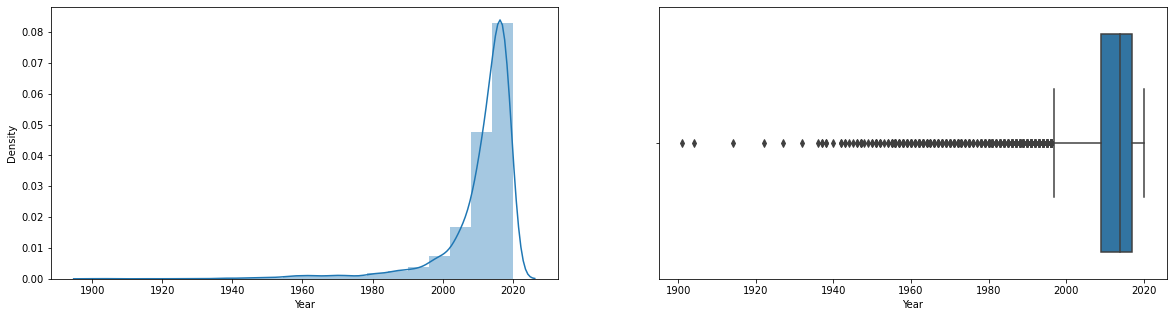

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_year['Year'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_year['Year'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_year_tvshows = df_tvshows_year.loc[df_tvshows_year['Netflix'] == 1]
hulu_year_tvshows = df_tvshows_year.loc[df_tvshows_year['Hulu'] == 1]
prime_video_year_tvshows = df_tvshows_year.loc[df_tvshows_year['Prime Video'] == 1]
disney_year_tvshows = df_tvshows_year.loc[df_tvshows_year['Disney+'] == 1]

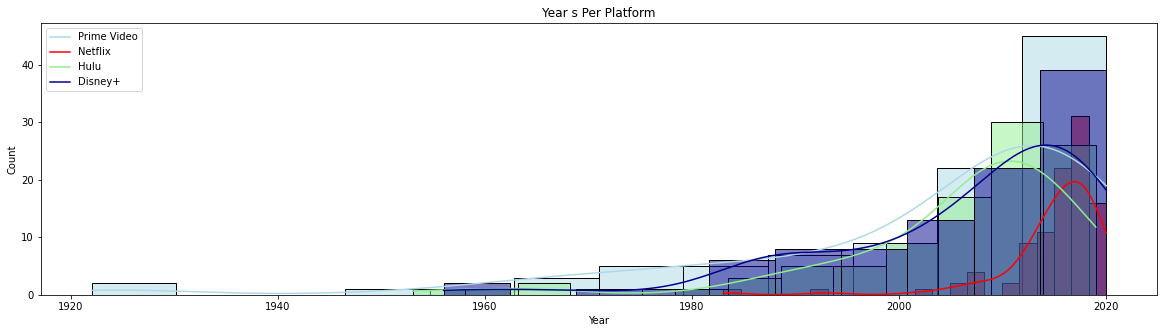

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Year s Per Platform')

# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_year_tvshows['Year'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_year_tvshows['Year'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_year_tvshows['Year'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_year_tvshows['Year'][:100], color = 'darkblue', legend = True, kde = True) 

# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The Latest TV Show Ever Got is '{df_year_new_tvshows['Title'][0]}' : '{df_year_new_tvshows['Year'].max()}'\n
      The Oldest TV Show Ever Got is '{df_year_old_tvshows['Title'][0]}' : '{df_year_old_tvshows['Year'].min()}'\n
      
      The Latest TV Show on 'Netflix' is '{netflix_year_new_tvshows['Title'][0]}' : '{netflix_year_new_tvshows['Year'].max()}'\n
      The Oldest TV Show on 'Netflix' is '{netflix_year_old_tvshows['Title'][0]}' : '{netflix_year_old_tvshows['Year'].min()}'\n
      
      The Latest TV Show on 'Hulu' is '{hulu_year_new_tvshows['Title'][0]}' : '{hulu_year_new_tvshows['Year'].max()}'\n
      The Oldest TV Show on 'Hulu' is '{hulu_year_old_tvshows['Title'][0]}' : '{hulu_year_old_tvshows['Year'].min()}'\n
      
      The Latest TV Show on 'Prime Video' is '{prime_video_year_new_tvshows['Title'][0]}' : '{prime_video_year_new_tvshows['Year'].max()}'\n
      The Oldest TV Show on 'Prime Video' is '{prime_video_year_old_tvshows['Title'][0]}' : '{prime_video_year_old_tvshows['Year'].min()}'\n
      
      The Latest TV Show on 'Disney+' is '{disney_year_new_tvshows['Title'][0]}' : '{disney_year_new_tvshows['Year'].max()}'\n
      The Oldest TV Show on 'Disney+' is '{disney_year_old_tvshows['Title'][0]}' : '{disney_year_old_tvshows['Year'].min()}'\n 
      ''')


      The Latest TV Show Ever Got is 'Gentefied' : '2020'

      The Oldest TV Show Ever Got is 'Gods & Monsters with Tony Robinson' : '1901'

      
      The Latest TV Show on 'Netflix' is 'Gentefied' : '2020'

      The Oldest TV Show on 'Netflix' is 'Born To Explore' : '1914'

      
      The Latest TV Show on 'Hulu' is 'BOFURI: I Don’t Want to Get Hurt, so I’ll Max Out My Defense.' : '2020'

      The Oldest TV Show on 'Hulu' is 'You Bet Your Life' : '1947'

      
      The Latest TV Show on 'Prime Video' is 'Tales from the Loop' : '2020'

      The Oldest TV Show on 'Prime Video' is 'Gods & Monsters with Tony Robinson' : '1901'

      
      The Latest TV Show on 'Disney+' is 'It's A Dog's Life' : '2020'

      The Oldest TV Show on 'Disney+' is 'The Plausible Impossible' : '1956'
 
      


In [ ]:
# def round_val(data):
#     if str(data) != 'nan':
#         return round(data)
# 		
# def round_fix(data):
#     if data in range(1801,1900):
#         # print(data)
#         return 1900
#     if data in range(1901,1910):
#         return 1910
#     if data in range(1911,1920):
#         return 1920
# 	if data in range(1921,1930):
#         return 1930
# 	if data in range(1931,1940):
#         return 1940
# 	if data in range(1941,1950):
#         return 1950
# 	if data in range(1951,1960):
#         return 1960
# 	if data in range(1961,1970):
#         return 1970
# 	if data in range(1971,1980):
#         return 1980
# 	if data in range(1981,1990):
#         return 1990
# 	if data in range(1991,2000):
#         return 2000
# 	if data in range(2000,2010):
#         return 2010
# 	if data in range(2010,2020):
#         return 2020
# 	if data in range(2020,2030):
#         return 2030
# 	if data in range(2300,2100):
#         return 2100
#     
# df_tvshows_year['Year Group'] = df_tvshows_year['Year'].apply(round_fix)
# 
# year_values = df_tvshows_year['Year Group'].value_counts().sort_index(ascending = False).tolist()
# year_index = df_tvshows_year['Year Group'].value_counts().sort_index(ascending = False).index
# 
# year_values, year_index

In [ ]:
year_count = df_tvshows_year.groupby('Year')['Title'].count()
year_tvshow = df_tvshows_year.groupby('Year')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
year_data_tvshows = pd.concat([year_count, year_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
year_data_tvshows = year_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# TV Shows Count per Year - All Platforms Combined
year_data_tvshows.head()

Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
85  2017             605      214   116          276       19
86  2018             554      271   129          162       14
84  2016             543      212   115          226       10
83  2015             429      171   115          165        9
87  2019             382      231    94           44       21

In [ ]:
# Highest TV Shows Count per Year - All Platforms Combined
df_year_high_tvshows = year_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_year_high_tvshows = df_year_high_tvshows.drop(['index'], axis = 1)
# filter = (year_data_tvshows['TV Shows Count'] = =  (year_data_tvshows['TV Shows Count'].max()))
# df_year_high_tvshows = year_data_tvshows[filter]
 
# highest_rated_tvshow = year_data_tvshows.loc[year_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nYear with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_year_high_tvshows.head(5)


Year with Highest Ever TV Shows Count are : All Platforms Combined



Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  2017             605      214   116          276       19
1  2018             554      271   129          162       14
2  2016             543      212   115          226       10
3  2015             429      171   115          165        9
4  2019             382      231    94           44       21

In [ ]:
# Lowest TV Shows Count per Year - All Platforms Combined
df_year_low_tvshows = year_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_year_low_tvshows = df_year_low_tvshows.drop(['index'], axis = 1)
# filter = (year_data_tvshows['TV Shows Count'] = =  (year_data_tvshows['TV Shows Count'].min()))
# df_year_low_tvshows = year_data_tvshows[filter]
 
print('\nYear with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_year_low_tvshows.head(5)


Year with Lowest Ever TV Shows Count are : All Platforms Combined



Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  1901               1        0     0            1        0
1  1948               1        0     0            1        0
2  1949               1        0     0            1        0
3  1945               1        0     0            1        0
4  1944               1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_tvshows['Year'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{year_data_tvshows['Year'].unique().shape[0]}' Year, They were Like this, \n
 
      {year_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Year'].head(5).unique()} etc. \n
 
      The Year with Highest TV Shows Count have '{year_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_year_high_tvshows['Year'][0]}', &\n
      The Year with Lowest TV Shows Count have '{year_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_year_low_tvshows['Year'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '89' Year, They were Like this, 

 
      [2017 2018 2016 2015 2019] etc. 

 
      The Year with Highest TV Shows Count have '605' TV Shows Available is '2017', &

      The Year with Lowest TV Shows Count have '1' TV Shows Available is '1901'
      


In [ ]:
# Highest TV Shows Count per Year - Netflix
netflix_year_tvshows = year_data_tvshows[year_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_year_tvshows = netflix_year_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_year_high_tvshows = df_year_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_year_high_tvshows = netflix_year_high_tvshows.drop(['index'], axis = 1)
 
netflix_year_low_tvshows = df_year_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_year_low_tvshows = netflix_year_low_tvshows.drop(['index'], axis = 1)
 
netflix_year_high_tvshows.head(5)

Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  2018             554      271   129          162       14
1  2019             382      231    94           44       21
2  2017             605      214   116          276       19
3  2016             543      212   115          226       10
4  2015             429      171   115          165        9

In [ ]:
# Highest TV Shows Count per Year - Hulu
hulu_year_tvshows = year_data_tvshows[year_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_year_tvshows = hulu_year_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_year_high_tvshows = df_year_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_year_high_tvshows = hulu_year_high_tvshows.drop(['index'], axis = 1)
 
hulu_year_low_tvshows = df_year_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_year_low_tvshows = hulu_year_low_tvshows.drop(['index'], axis = 1)
 
hulu_year_high_tvshows.head(5)

Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  2018             554      271   129          162       14
1  2017             605      214   116          276       19
2  2016             543      212   115          226       10
3  2015             429      171   115          165        9
4  2014             368      137   114          134       10

In [ ]:
# Highest TV Shows Count per Year - Prime Video
prime_video_year_tvshows = year_data_tvshows[year_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_year_tvshows = prime_video_year_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_year_high_tvshows = df_year_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_year_high_tvshows = prime_video_year_high_tvshows.drop(['index'], axis = 1)
 
prime_video_year_low_tvshows = df_year_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_year_low_tvshows = prime_video_year_low_tvshows.drop(['index'], axis = 1)
 
prime_video_year_high_tvshows.head(5)

Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  2017             605      214   116          276       19
1  2016             543      212   115          226       10
2  2015             429      171   115          165        9
3  2018             554      271   129          162       14
4  2014             368      137   114          134       10

In [ ]:
# Highest TV Shows Count per Year - Disney+
disney_year_tvshows = year_data_tvshows[year_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_year_tvshows = disney_year_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_year_high_tvshows = df_year_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_year_high_tvshows = disney_year_high_tvshows.drop(['index'], axis = 1)
 
disney_year_low_tvshows = df_year_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_year_low_tvshows = disney_year_low_tvshows.drop(['index'], axis = 1)
 
disney_year_high_tvshows.head(5)

Year  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  2019             382      231    94           44       21
1  2017             605      214   116          276       19
2  2018             554      271   129          162       14
3  2012             283       79    96          117       11
4  2016             543      212   115          226       10

In [ ]:
print(f'''
      The Year with Highest TV Shows Count Ever Got is '{df_year_high_tvshows['Year'][0]}' : '{df_year_high_tvshows['TV Shows Count'].max()}'\n
      The Year with Lowest TV Shows Count Ever Got is '{df_year_low_tvshows['Year'][0]}' : '{df_year_low_tvshows['TV Shows Count'].min()}'\n
      
      The Year with Highest TV Shows Count on 'Netflix' is '{netflix_year_high_tvshows['Year'][0]}' : '{netflix_year_high_tvshows['Netflix'].max()}'\n
      The Year with Lowest TV Shows Count on 'Netflix' is '{netflix_year_low_tvshows['Year'][0]}' : '{netflix_year_low_tvshows['Netflix'].min()}'\n
      
      The Year with Highest TV Shows Count on 'Hulu' is '{hulu_year_high_tvshows['Year'][0]}' : '{hulu_year_high_tvshows['Hulu'].max()}'\n
      The Year with Lowest TV Shows Count on 'Hulu' is '{hulu_year_low_tvshows['Year'][0]}' : '{hulu_year_low_tvshows['Hulu'].min()}'\n
      
      The Year with Highest TV Shows Count on 'Prime Video' is '{prime_video_year_high_tvshows['Year'][0]}' : '{prime_video_year_high_tvshows['Prime Video'].max()}'\n
      The Year with Lowest TV Shows Count on 'Prime Video' is '{prime_video_year_low_tvshows['Year'][0]}' : '{prime_video_year_low_tvshows['Prime Video'].min()}'\n
      
      The Year with Highest TV Shows Count on 'Disney+' is '{disney_year_high_tvshows['Year'][0]}' : '{disney_year_high_tvshows['Disney+'].max()}'\n
      The Year with Lowest TV Shows Count on 'Disney+' is '{disney_year_low_tvshows['Year'][0]}' : '{disney_year_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Year with Highest TV Shows Count Ever Got is '2017' : '605'

      The Year with Lowest TV Shows Count Ever Got is '1901' : '1'

      
      The Year with Highest TV Shows Count on 'Netflix' is '2018' : '271'

      The Year with Lowest TV Shows Count on 'Netflix' is '1970' : '0'

      
      The Year with Highest TV Shows Count on 'Hulu' is '2018' : '129'

      The Year with Lowest TV Shows Count on 'Hulu' is '1901' : '0'

      
      The Year with Highest TV Shows Count on 'Prime Video' is '2017' : '276'

      The Year with Lowest TV Shows Count on 'Prime Video' is '1914' : '0'

      
      The Year with Highest TV Shows Count on 'Disney+' is '2019' : '21'

      The Year with Lowest TV Shows Count on 'Disney+' is '1970' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Year is '{round(year_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Year on 'Netflix' is '{round(netflix_year_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Year on 'Hulu' is '{round(hulu_year_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Year on 'Prime Video' is '{round(prime_video_year_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Year on 'Disney+' is '{round(disney_year_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Year is '61.03'

      The Average TV Shows Count of Year on 'Netflix' is '37.84'

      The Average TV Shows Count of Year on 'Hulu' is '23.49'

      The Average TV Shows Count of Year on 'Prime Video' is '24.9'

      The Average TV Shows Count of Year on 'Disney+' is '4.46'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Year is '{year_data_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Netflix' is '{netflix_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Hulu' is '{hulu_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Prime Video' is '{prime_video_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Disney+' is '{disney_year_tvshows['Year'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Year is '89'

      Total Count of Year on 'Netflix' is '49'

      Total Count of Year on 'Hulu' is '68'

      Total Count of Year on 'Prime Video' is '88'

      Total Count of Year on 'Disney+' is '41'
 
      


In [ ]:
fig = px.bar(year_data_tvshows[:20], x = 'Year', y = 'TV Shows Count', color = 'TV Shows Count', color_continuous_scale = 'Blues_r')
fig.show()

In [ ]:
fig = px.histogram(year_data_tvshows, x = 'Year', y = 'TV Shows Count')
fig.show()

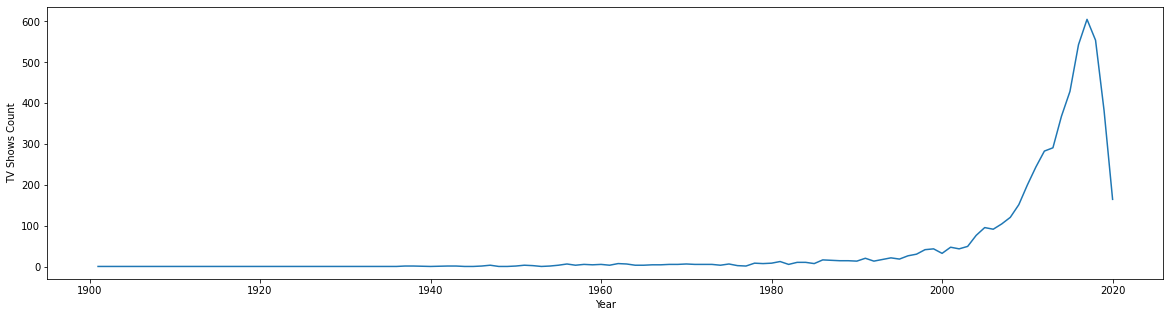

In [ ]:
fig = plt.figure(figsize = (20, 5))
sns.lineplot(data = year_data_tvshows, x = 'Year', y = 'TV Shows Count')
plt.show()

In [ ]:
print(f'''
      Accross All Platforms Total Count of Year is '{year_data_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Netflix' is '{netflix_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Hulu' is '{hulu_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Prime Video' is '{prime_video_year_tvshows['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Disney+' is '{disney_year_tvshows['Year'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Year is '89'

      Total Count of Year on 'Netflix' is '49'

      Total Count of Year on 'Hulu' is '68'

      Total Count of Year on 'Prime Video' is '88'

      Total Count of Year on 'Disney+' is '41'
 
      


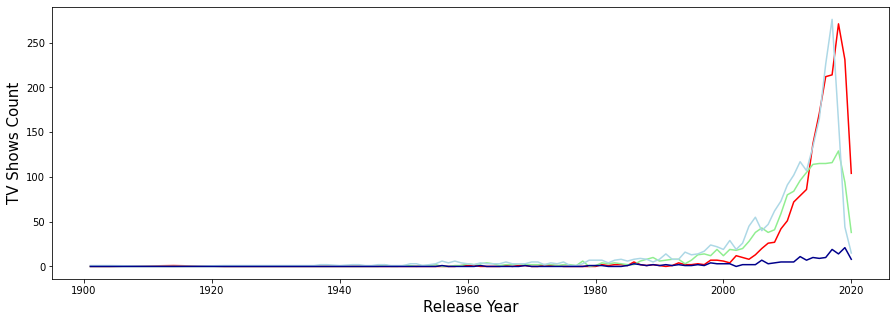

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Netflix'], color = 'red')
sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Hulu'], color = 'lightgreen')
sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Prime Video'], color = 'lightblue')
sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Disney+'], color = 'darkblue')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

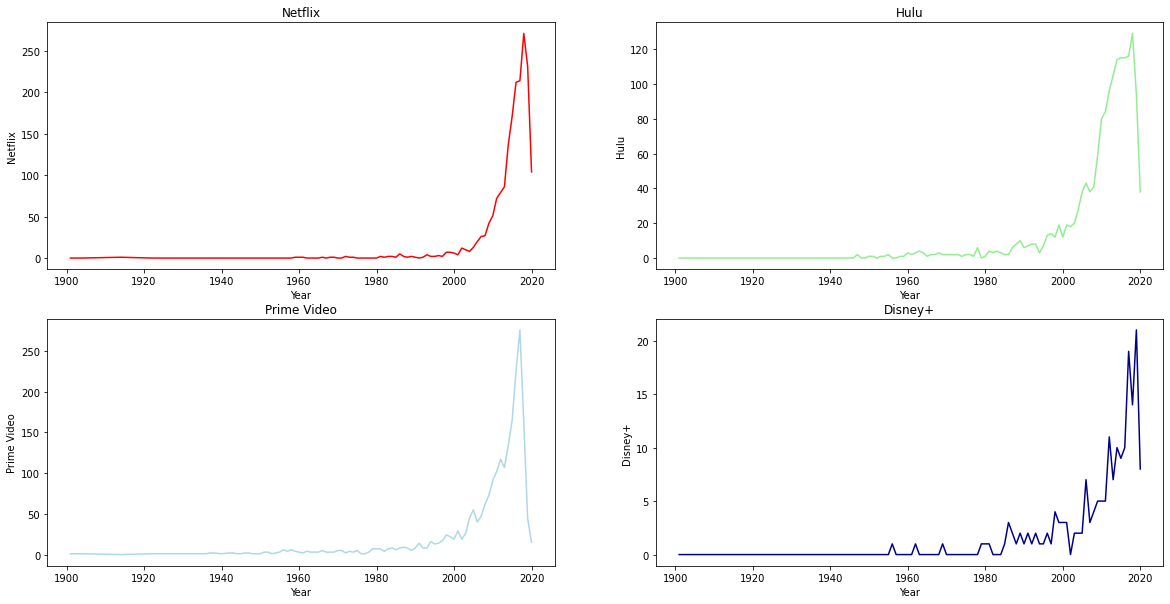

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(20 ,10))
 
n_y_ax1 = sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_y_ax2 = sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_y_ax3 = sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_y_ax4 = sns.lineplot(x = year_data_tvshows['Year'], y = year_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_y_ax1.title.set_text(labels[0])
h_y_ax2.title.set_text(labels[1])
p_y_ax3.title.set_text(labels[2])
d_y_ax4.title.set_text(labels[3])
 
plt.show()

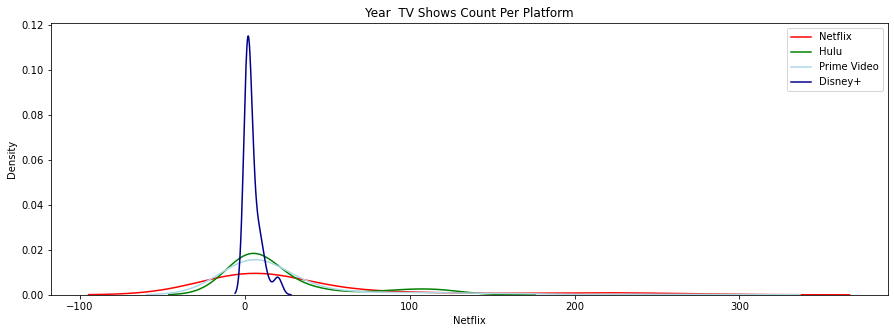

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Year  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_year_tvshows['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_year_tvshows['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_year_tvshows['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_year_tvshows['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_age = df_tvshows.copy()

In [ ]:
df_tvshows_age.drop(df_tvshows_age.loc[df_tvshows_age['Age'] == "NR"].index, inplace = True)
# df_tvshows_age = df_tvshows_age[df_tvshows_age.Age != "NR"]
df_tvshows_age['Age'] = df_tvshows_age['Age'].astype(int)

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_age_tvshows = df_tvshows_age.loc[df_tvshows_age['Netflix'] == 1]
hulu_age_tvshows = df_tvshows_age.loc[df_tvshows_age['Hulu'] == 1]
prime_video_age_tvshows = df_tvshows_age.loc[df_tvshows_age['Prime Video'] == 1]
disney_age_tvshows = df_tvshows_age.loc[df_tvshows_age['Disney+'] == 1]

In [ ]:
age_count = df_tvshows_age.groupby('Age')['Title'].count()
age_tvshow = df_tvshows_age.groupby('Age')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
age_data_tvshows = pd.concat([age_count, age_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
#age_data_tvshows = age_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Age with TV Shows Counts - All Platforms Combined
age_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
3   16            1018      350   521          236        7
1    7             958      334   372          306       72
4   18             946      497   233          253        1
0    0             521      147   150          207       73
2   13              64        4     9           26       30

In [ ]:
# Age with TV Shows Counts - All Platforms Combined
age_data_tvshows.sort_values(by = 'Age', ascending = False)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
4   18             946      497   233          253        1
3   16            1018      350   521          236        7
2   13              64        4     9           26       30
1    7             958      334   372          306       72
0    0             521      147   150          207       73

In [ ]:
df_age_high_tvshows = age_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_age_high_tvshows = df_age_high_tvshows.drop(['index'], axis = 1)
# filter = (age_data_tvshows['TV Shows Count'] = =  (age_data_tvshows['TV Shows Count'].max()))
# df_age_high_tvshows = age_data_tvshows[filter]
 
# highest_rated_tvshow = age_data_tvshows.loc[age_data_tvshows['TV Shows Count'].idxmax()]
 
# print('\nAge with Highest Ever TV Shows Count are : All Platforms Combined\n')
# df_age_high_tvshows.head(5)
 
df_age_low_tvshows = age_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_age_low_tvshows = df_age_low_tvshows.drop(['index'], axis = 1)
# filter = (age_data_tvshows['TV Shows Count'] = =  (age_data_tvshows['TV Shows Count'].min()))
# df_age_low_tvshows = age_data_tvshows[filter]
 
# print('\nAge with Lowest Ever TV Shows Count are : All Platforms Combined\n')
# df_age_low_tvshows.head(5)

In [ ]:
print(f'''
      Lets Talk about, 'All Platforms'
      
      Total '{df_tvshows_age['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on All Platforms & They are '{df_tvshows_age['Age'].unique()}'\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 'NR'].shape[0]}' TV Shows are available on All Platforms Which are 'Not Rated' Yet\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 0].shape[0]}' TV Shows are available for 'All' Audience on All Platforms\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 7].shape[0]}' TV Shows are available Only for '7+' Audience on All Platforms\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 13].shape[0]}' TV Shows are available Only for '13+' Audience on All Platforms\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 16].shape[0]}' TV Shows are available Only for '16+' Audience on All Platforms\n
      Total '{df_tvshows_age[df_tvshows_age['Age'] == 18].shape[0]}' TV Shows are available Only for '18+' Audience on All Platforms\n
      ''')


      Lets Talk about, 'All Platforms'
      
      Total '5' Rating as per 'Age' Categories are available on All Platforms & They are '[18 13  0  7 16]'

      Total '0' TV Shows are available on All Platforms Which are 'Not Rated' Yet

      Total '521' TV Shows are available for 'All' Audience on All Platforms

      Total '958' TV Shows are available Only for '7+' Audience on All Platforms

      Total '64' TV Shows are available Only for '13+' Audience on All Platforms

      Total '1018' TV Shows are available Only for '16+' Audience on All Platforms

      Total '946' TV Shows are available Only for '18+' Audience on All Platforms

      


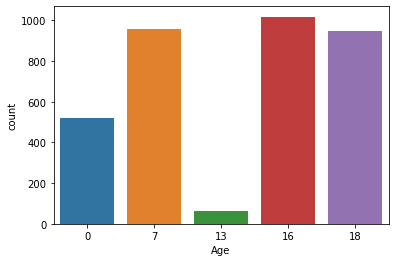

In [ ]:
sns.countplot(df_tvshows_age['Age'])
plt.show()

In [ ]:
# netflix_age_tvshows = age_data_tvshows[age_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_age_tvshows = netflix_age_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_age_high_tvshows = df_age_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_age_high_tvshows = netflix_age_high_tvshows.drop(['index'], axis = 1)
 
netflix_age_low_tvshows = df_age_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_age_low_tvshows = netflix_age_low_tvshows.drop(['index'], axis = 1)
 
netflix_age_high_tvshows.head(5)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   18             946      497   233          253        1
1   16            1018      350   521          236        7
2    7             958      334   372          306       72
3    0             521      147   150          207       73
4   13              64        4     9           26       30

In [ ]:
print(f'''
      Lets Talk about, 'Netflix'
      
      Total '{netflix_age_tvshows['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{netflix_age_tvshows['Age'].unique()}'\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 'NR'].shape[0]}' TV Shows are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 0].shape[0]}' TV Shows are available for 'All' Audience on 'Age'\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 7].shape[0]}' TV Shows are available Only for '7+' Audience on 'Age'\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 13].shape[0]}' TV Shows are available Only for '13+' Audience on 'Age'\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 16].shape[0]}' TV Shows are available Only for '16+' Audience on 'Age'\n
      Total '{netflix_age_tvshows[netflix_age_tvshows['Age'] == 18].shape[0]}' TV Shows are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Netflix'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[18 13  0  7 16]'

      Total '0' TV Shows are available on 'Age' Which are 'Not Rated' Yet

      Total '147' TV Shows are available for 'All' Audience on 'Age'

      Total '334' TV Shows are available Only for '7+' Audience on 'Age'

      Total '4' TV Shows are available Only for '13+' Audience on 'Age'

      Total '350' TV Shows are available Only for '16+' Audience on 'Age'

      Total '497' TV Shows are available Only for '18+' Audience on 'Age'

      


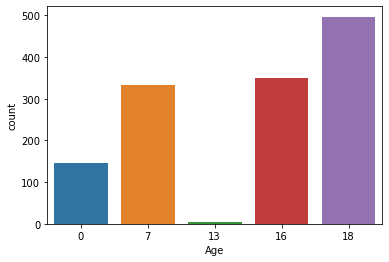

In [ ]:
sns.countplot(netflix_age_tvshows['Age'])
plt.show()

In [ ]:
# hulu_age_tvshows = age_data_tvshows[age_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_age_tvshows = hulu_age_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_age_high_tvshows = df_age_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_age_high_tvshows = hulu_age_high_tvshows.drop(['index'], axis = 1)
 
hulu_age_low_tvshows = df_age_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_age_low_tvshows = hulu_age_low_tvshows.drop(['index'], axis = 1)
 
hulu_age_high_tvshows.head(5)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   16            1018      350   521          236        7
1    7             958      334   372          306       72
2   18             946      497   233          253        1
3    0             521      147   150          207       73
4   13              64        4     9           26       30

In [ ]:
print(f'''
      Lets Talk about, 'Hulu'
      
      Total '{hulu_age_tvshows['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Hulu' & They are '{hulu_age_tvshows['Age'].unique()}'\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 'NR'].shape[0]}' TV Shows are available on 'Hulu' Which are 'Not Rated' Yet\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 0].shape[0]}' TV Shows are available for 'All' Audience on 'Hulu'\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 7].shape[0]}' TV Shows are available Only for '7+' Audience on 'Hulu'\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 13].shape[0]}' TV Shows are available Only for '13+' Audience on 'Hulu'\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 16].shape[0]}' TV Shows are available Only for '16+' Audience on 'Hulu'\n
      Total '{hulu_age_tvshows[hulu_age_tvshows['Age'] == 18].shape[0]}' TV Shows are available Only for '18+' Audience on 'Hulu'\n
      ''')


      Lets Talk about, 'Hulu'
      
      Total '5' Rating as per 'Age' Categories are available on 'Hulu' & They are '[ 0 18 13  7 16]'

      Total '0' TV Shows are available on 'Hulu' Which are 'Not Rated' Yet

      Total '150' TV Shows are available for 'All' Audience on 'Hulu'

      Total '372' TV Shows are available Only for '7+' Audience on 'Hulu'

      Total '9' TV Shows are available Only for '13+' Audience on 'Hulu'

      Total '521' TV Shows are available Only for '16+' Audience on 'Hulu'

      Total '233' TV Shows are available Only for '18+' Audience on 'Hulu'

      


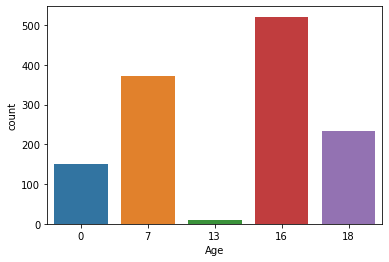

In [ ]:
sns.countplot(hulu_age_tvshows['Age'])
plt.show()

In [ ]:
# prime_video_age_tvshows = age_data_tvshows[age_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_age_tvshows = prime_video_age_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_age_high_tvshows = df_age_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_age_high_tvshows = prime_video_age_high_tvshows.drop(['index'], axis = 1)
 
prime_video_age_low_tvshows = df_age_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_age_low_tvshows = prime_video_age_low_tvshows.drop(['index'], axis = 1)
 
prime_video_age_high_tvshows.head(5)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    7             958      334   372          306       72
1   18             946      497   233          253        1
2   16            1018      350   521          236        7
3    0             521      147   150          207       73
4   13              64        4     9           26       30

In [ ]:
print(f'''
      Lets Talk about, 'Prime Video'
      
      Total '{prime_video_age_tvshows['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{prime_video_age_tvshows['Age'].unique()}'\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 'NR'].shape[0]}' TV Shows are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 0].shape[0]}' TV Shows are available for 'All' Audience on 'Age'\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 7].shape[0]}' TV Shows are available Only for '7+' Audience on 'Age'\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 13].shape[0]}' TV Shows are available Only for '13+' Audience on 'Age'\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 16].shape[0]}' TV Shows are available Only for '16+' Audience on 'Age'\n
      Total '{prime_video_age_tvshows[prime_video_age_tvshows['Age'] == 18].shape[0]}' TV Shows are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Prime Video'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[18 16 13  0  7]'

      Total '0' TV Shows are available on 'Age' Which are 'Not Rated' Yet

      Total '207' TV Shows are available for 'All' Audience on 'Age'

      Total '306' TV Shows are available Only for '7+' Audience on 'Age'

      Total '26' TV Shows are available Only for '13+' Audience on 'Age'

      Total '236' TV Shows are available Only for '16+' Audience on 'Age'

      Total '253' TV Shows are available Only for '18+' Audience on 'Age'

      


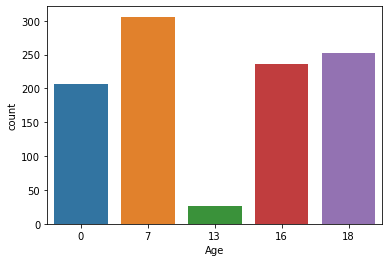

In [ ]:
sns.countplot(prime_video_age_tvshows['Age'])
plt.show()

In [ ]:
# disney_age_tvshows = age_data_tvshows[age_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_age_tvshows = disney_age_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_age_high_tvshows = df_age_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_age_high_tvshows = disney_age_high_tvshows.drop(['index'], axis = 1)
 
disney_age_low_tvshows = df_age_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_age_low_tvshows = disney_age_low_tvshows.drop(['index'], axis = 1)
 
disney_age_high_tvshows.head(5)

Age  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    0             521      147   150          207       73
1    7             958      334   372          306       72
2   13              64        4     9           26       30
3   16            1018      350   521          236        7
4   18             946      497   233          253        1

In [ ]:
print(f'''
      Lets Talk about, 'Disney+'
      
      Total '{disney_age_tvshows['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{disney_age_tvshows['Age'].unique()}'\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 'NR'].shape[0]}' TV Shows are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 0].shape[0]}' TV Shows are available for 'All' Audience on 'Age'\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 7].shape[0]}' TV Shows are available Only for '7+' Audience on 'Age'\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 13].shape[0]}' TV Shows are available Only for '13+' Audience on 'Age'\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 16].shape[0]}' TV Shows are available Only for '16+' Audience on 'Age'\n
      Total '{disney_age_tvshows[disney_age_tvshows['Age'] == 18].shape[0]}' TV Shows are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Disney+'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[18  0 13  7 16]'

      Total '0' TV Shows are available on 'Age' Which are 'Not Rated' Yet

      Total '73' TV Shows are available for 'All' Audience on 'Age'

      Total '72' TV Shows are available Only for '7+' Audience on 'Age'

      Total '30' TV Shows are available Only for '13+' Audience on 'Age'

      Total '7' TV Shows are available Only for '16+' Audience on 'Age'

      Total '1' TV Shows are available Only for '18+' Audience on 'Age'

      


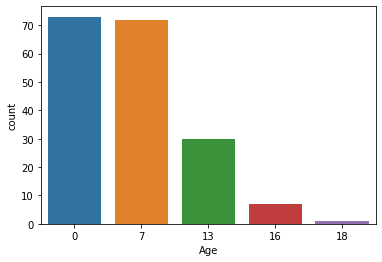

In [ ]:
sns.countplot(disney_age_tvshows['Age'])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_age_tvshows = age_data_tvshows[age_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_age_tvshows = netflix_age_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_age_tvshows = age_data_tvshows[age_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_age_tvshows = hulu_age_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_age_tvshows = age_data_tvshows[age_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_age_tvshows = prime_video_age_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_age_tvshows = age_data_tvshows[age_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_age_tvshows = disney_age_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

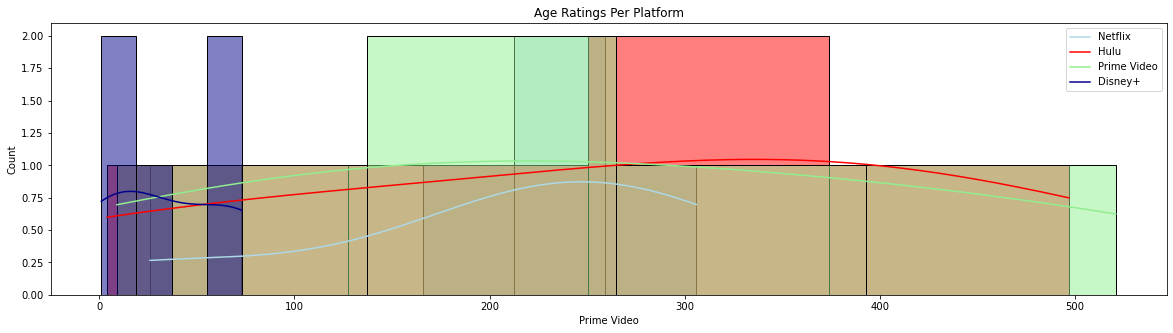

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Age Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_age_tvshows['Prime Video'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_age_tvshows['Netflix'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_age_tvshows['Hulu'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_age_tvshows['Disney+'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

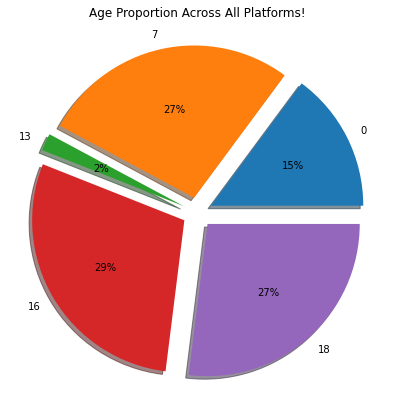

In [ ]:
plt.figure(figsize = (7, 7))
 
plt.pie(age_data_tvshows['TV Shows Count'], labels = age_data_tvshows.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Age Proportion Across All Platforms!')
plt.show()

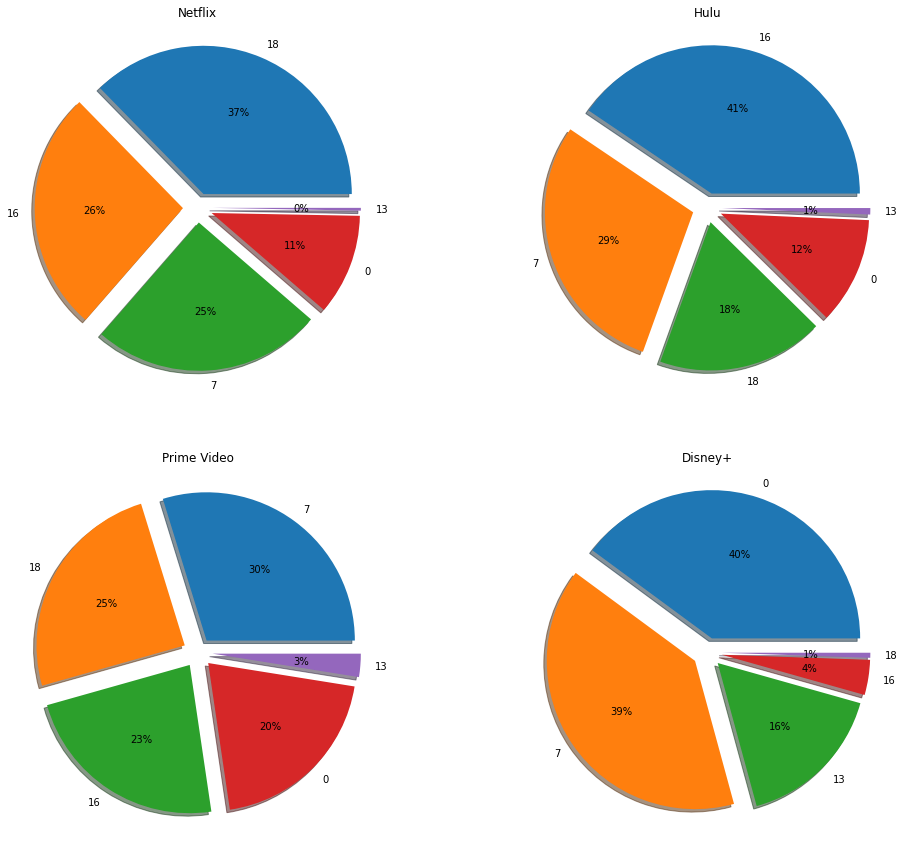

In [ ]:
fig = plt.figure(figsize = (35, 15))
 
ax = plt.subplot2grid((2, 4), (0, 0))

age_labels = ['All', '7+', '13+', '16+', '18+']
 
plt.pie(netflix_age_tvshows['Netflix'], labels = netflix_age_tvshows.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Netflix')
 
ax = plt.subplot2grid((2, 4), (0, 1))
 
plt.pie(hulu_age_tvshows['Hulu'], labels = hulu_age_tvshows.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Hulu')
 
ax = plt.subplot2grid((2, 4), (1, 0))
 
plt.pie(prime_video_age_tvshows['Prime Video'], labels = prime_video_age_tvshows.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Prime Video')
 
ax = plt.subplot2grid((2, 4), (1, 1))
 
plt.pie(disney_age_tvshows['Disney+'], labels = disney_age_tvshows.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Disney+')
 
plt.show()

In [ ]:
print(f'''
      The Age with Highest TV Shows Count Ever Got is '{df_age_high_tvshows['Age'][0]}' : '{df_age_high_tvshows['TV Shows Count'].max()}'\n
      The Age with Lowest TV Shows Count Ever Got is '{df_age_low_tvshows['Age'][0]}' : '{df_age_low_tvshows['TV Shows Count'].min()}'\n
      
      The Age with Highest TV Shows Count on 'Netflix' is '{netflix_age_high_tvshows['Age'][0]}' : '{netflix_age_high_tvshows['Netflix'].max()}'\n
      The Age with Lowest TV Shows Count on 'Netflix' is '{netflix_age_low_tvshows['Age'][0]}' : '{netflix_age_low_tvshows['Netflix'].min()}'\n
      
      The Age with Highest TV Shows Count on 'Hulu' is '{hulu_age_high_tvshows['Age'][0]}' : '{hulu_age_high_tvshows['Hulu'].max()}'\n
      The Age with Lowest TV Shows Count on 'Hulu' is '{hulu_age_low_tvshows['Age'][0]}' : '{hulu_age_low_tvshows['Hulu'].min()}'\n
      
      The Age with Highest TV Shows Count on 'Prime Video' is '{prime_video_age_high_tvshows['Age'][0]}' : '{prime_video_age_high_tvshows['Prime Video'].max()}'\n
      The Age with Lowest TV Shows Count on 'Prime Video' is '{prime_video_age_low_tvshows['Age'][0]}' : '{prime_video_age_low_tvshows['Prime Video'].min()}'\n
      
      The Age with Highest TV Shows Count on 'Disney+' is '{disney_age_high_tvshows['Age'][0]}' : '{disney_age_high_tvshows['Disney+'].max()}'\n
      The Age with Lowest TV Shows Count on 'Disney+' is '{disney_age_low_tvshows['Age'][0]}' : '{disney_age_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Age with Highest TV Shows Count Ever Got is '16' : '1018'

      The Age with Lowest TV Shows Count Ever Got is '13' : '64'

      
      The Age with Highest TV Shows Count on 'Netflix' is '18' : '497'

      The Age with Lowest TV Shows Count on 'Netflix' is '13' : '4'

      
      The Age with Highest TV Shows Count on 'Hulu' is '16' : '521'

      The Age with Lowest TV Shows Count on 'Hulu' is '13' : '9'

      
      The Age with Highest TV Shows Count on 'Prime Video' is '7' : '306'

      The Age with Lowest TV Shows Count on 'Prime Video' is '13' : '26'

      
      The Age with Highest TV Shows Count on 'Disney+' is '0' : '73'

      The Age with Lowest TV Shows Count on 'Disney+' is '18' : '1'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Age is '{round(age_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Age on 'Netflix' is '{round(netflix_age_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Age on 'Hulu' is '{round(hulu_age_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Age on 'Prime Video' is '{round(prime_video_age_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Age on 'Disney+' is '{round(disney_age_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Age is '701.4'

      The Average TV Shows Count of Age on 'Netflix' is '266.4'

      The Average TV Shows Count of Age on 'Hulu' is '257.0'

      The Average TV Shows Count of Age on 'Prime Video' is '205.6'

      The Average TV Shows Count of Age on 'Disney+' is '36.6'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Age is '{age_data_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Netflix' is '{netflix_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Hulu' is '{hulu_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Prime Video' is '{prime_video_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Disney+' is '{disney_age_tvshows['Age'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Age is '5'

      Total Count of Age on 'Netflix' is '5'

      Total Count of Age on 'Hulu' is '5'

      Total Count of Age on 'Prime Video' is '5'

      Total Count of Age on 'Disney+' is '5'
 
      


In [ ]:
fig = px.bar(x = age_data_tvshows['Age'], y = age_data_tvshows['TV Shows Count'], 
             color = age_data_tvshows['TV Shows Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Age', 'y' : 'Number of TV Shows'})
fig.show()

In [ ]:
print(f'''
      Accross All Platforms Total Count of Age is '{age_data_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Netflix' is '{netflix_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Hulu' is '{hulu_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Prime Video' is '{prime_video_age_tvshows['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Disney+' is '{disney_age_tvshows['Age'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Age is '5'

      Total Count of Age on 'Netflix' is '5'

      Total Count of Age on 'Hulu' is '5'

      Total Count of Age on 'Prime Video' is '5'

      Total Count of Age on 'Disney+' is '5'
 
      


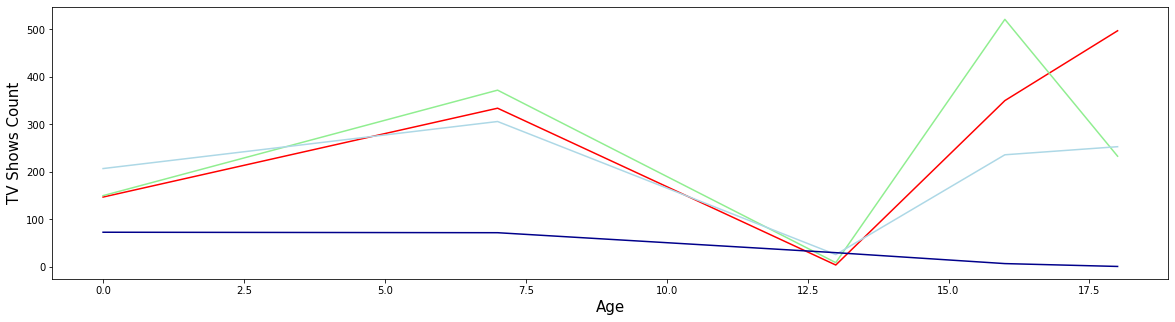

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = age_data_tvshows['Age'][:10], y = age_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = age_data_tvshows['Age'][:10], y = age_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = age_data_tvshows['Age'][:10], y = age_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = age_data_tvshows['Age'][:10], y = age_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

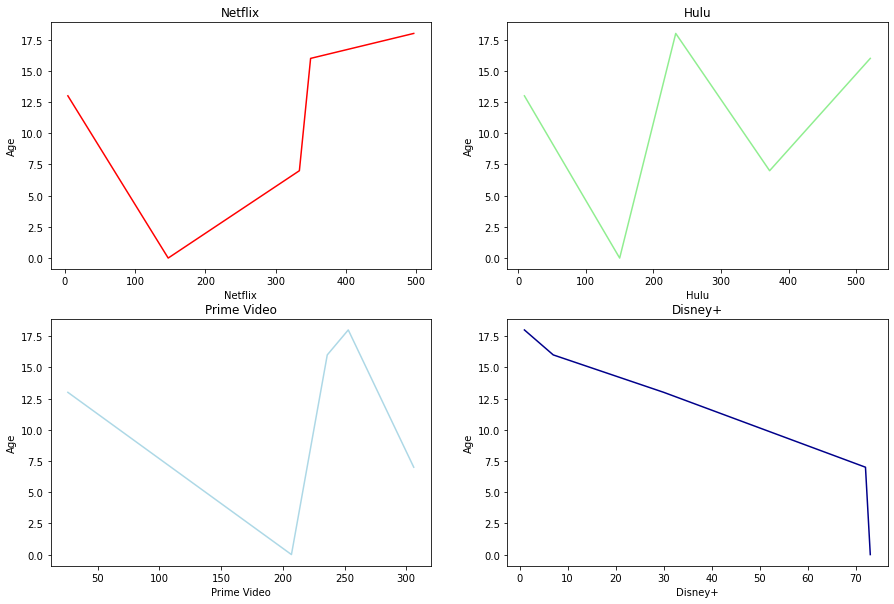

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_ag_ax1 = sns.lineplot(y = age_data_tvshows['Age'], x = age_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_ag_ax2 = sns.lineplot(y = age_data_tvshows['Age'], x = age_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_ag_ax3 = sns.lineplot(y = age_data_tvshows['Age'], x = age_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_ag_ax4 = sns.lineplot(y = age_data_tvshows['Age'], x = age_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_ag_ax1.title.set_text(labels[0])
h_ag_ax2.title.set_text(labels[1])
p_ag_ax3.title.set_text(labels[2])
d_ag_ax4.title.set_text(labels[3])
 
plt.show

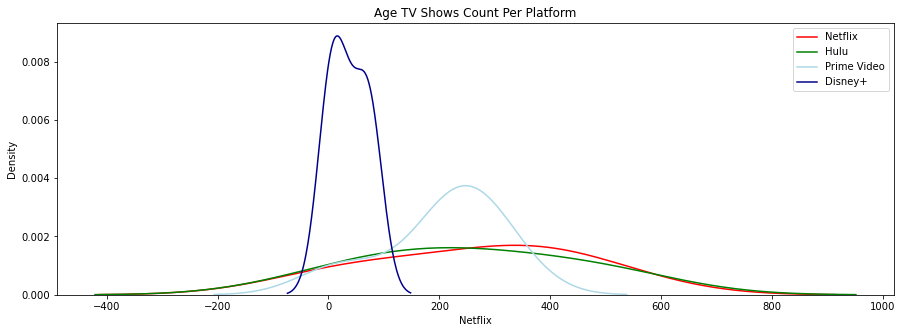

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Age TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_age_tvshows['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_age_tvshows['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_age_tvshows['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_age_tvshows['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_imdb = df_tvshows.copy()

In [ ]:
df_tvshows_imdb.drop(df_tvshows_imdb.loc[df_tvshows_imdb['IMDb'] == "NA"].index, inplace = True)
# df_tvshows_imdb = df_tvshows_imdb[df_tvshows_imdb.IMDb != "NA"]
# df_tvshows_imdb['IMDb'] = df_tvshows_imdb['IMDb'].astype(int)
df_tvshows_imdb['IMDb'] = df_tvshows_imdb['IMDb'].astype(float)

In [ ]:
df_imdb_high_tvshows = df_tvshows_imdb.sort_values(by = 'IMDb', ascending = False).reset_index()
df_imdb_high_tvshows = df_imdb_high_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_imdb['IMDb'] == (df_tvshows_imdb['IMDb'].max()))
# df_imdb_high_tvshows = df_tvshows_imdb[filter]
 
# highest_rated_tvshow = df_tvshows_imdb.loc[df_tvshows_imdb['IMDb'].idxmax()]
 
print('\nTV Shows with Highest Ever IMDb Rating are : \n')
df_imdb_high_tvshows.head(5)


TV Shows with Highest Ever IMDb Rating are : 



ID           Title  Year Age  IMDb Rotten Tomatoes Directors  \
0  5129          Tanks!  2005   7  10.0              NA        NA   
1  5233  Chasin the Sun  2017  NR   9.8              NA        NA   
2  1212        Ch:os:en  2013   7   9.6              NA        NA   
3   144      The Chosen  1981   7   9.6              75        NA   
4  3880    Malgudi Days  1987   0   9.5              NA        NA   

                                                Cast         Genres  \
0  David Fletcher,Graham McTavish,John Erickson,B...    History,War   
1                                                 NA    Documentary   
2  Shahar Isaac,Jonathan Roumie,Noah James,Paras ...  Drama,History   
3  Shahar Isaac,Jonathan Roumie,Noah James,Paras ...  Drama,History   
4  Master Manjunath,Girish Karnad,Vaishali Kasara...          Drama   

         Country  ...                                           Plotline  \
0  United States  ...  In this series Tom Hubbard travels throughout ...   
1   South Africa  ...                                                 NA   
2  United States  ...  A madly intense whirlwind drama about love, be...   
3  United States  ...  Depressed after the passing of his father (Dha...   
4          India  ...  Dean Sebastian wants to safeguard the perks of...   

  Runtime       Kind Seasons  Netflix  Hulu  Prime Video  Disney+  Type  \
0      NA  tv series       1        0     0            1        0     1   
1      NA  tv series       1        0     0            1        0     1   
2      54  tv series       2        1     0            0        0     1   
3      54  tv series       2        0     0            1        0     1   
4      NA  tv series       1        0     0            1        0     1   

   Service Provider  
0       Prime Video  
1       Prime Video  
2           Netflix  
3       Prime Video  
4       Prime Video  

[5 rows x 21 columns]

In [ ]:
df_imdb_low_tvshows = df_tvshows_imdb.sort_values(by = 'IMDb', ascending = True).reset_index()
df_imdb_low_tvshows = df_imdb_low_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_imdb['IMDb'] == (df_tvshows_imdb['IMDb'].min()))
# df_imdb_low_tvshows = df_tvshows_imdb[filter]
 
print('\nTV Shows with Lowest Ever IMDb Rating are : \n')
df_imdb_low_tvshows.head(5)


TV Shows with Lowest Ever IMDb Rating are : 



ID                           Title  Year Age  IMDb Rotten Tomatoes  \
0  3242  A Little Late with Lilly Singh  2019  16   1.5              82   
1  4820    Pinkfong! Baby Shark Special  2017  NR   1.8              NA   
2   425           Elf Bowling the Movie  2007   7   1.8              NA   
3  3368               My Super Sweet 16  2005   7   1.8              NA   
4  3336               Toddlers & Tiaras  2009   7   1.8              NA   

  Directors                                               Cast  \
0        NA  Lilly Singh,Rainn Wilson,Nikita Chaudhry,Aliso...   
1        NA                                      Marie Segoine   
2        NA                                                 NA   
3        NA  Mary Morrison,Quincy Brown,Shad Moss,Cher Hubs...   
4        NA  MaKenzie Myers,Dawn Rochelle,Wendy D. Lee,Alan...   

                   Genres        Country  ...  \
0        Comedy,Talk-Show  United States  ...   
1                  Family             NA  ...   
2                  Comedy             NA  ...   
3  Documentary,Reality-TV  United States  ...   
4              Reality-TV  United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      30  tv series   
1  The Bumble Nums are back with all new adventur...      NA  tv series   
2  A shady bus tour of young men and women are he...      NA  tv series   
3  Geologist Martin Pepper and Biologist Liz Bonn...      30  tv series   
4                                                 NA      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        0     1            0        0     1              Hulu  
1       1        0     0            1        0     1       Prime Video  
2       1        0     0            1        0     1       Prime Video  
3      10        0     1            0        0     1              Hulu  
4       7        0     1            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_imdb['IMDb'].unique().shape[0]}' unique IMDb Ratings were Given, They were Like this,\n
      
{df_tvshows_imdb.sort_values(by = 'IMDb', ascending = False)['IMDb'].unique()}\n
 
      The Highest Ever IMDb Rating Ever Any TV Show Got is '{df_imdb_high_tvshows['Title'][0]}' : '{df_imdb_high_tvshows['IMDb'].max()}'\n
 
      The Lowest Ever IMDb Rating Ever Any TV Show Got is '{df_imdb_low_tvshows['Title'][0]}' : '{df_imdb_low_tvshows['IMDb'].min()}'\n
      ''')


      Total '78' unique IMDb Ratings were Given, They were Like this,

      
[10.   9.8  9.6  9.5  9.4  9.3  9.2  9.1  9.   8.9  8.8  8.7  8.6  8.5
  8.4  8.3  8.2  8.1  8.   7.9  7.8  7.7  7.6  7.5  7.4  7.3  7.2  7.1
  7.   6.9  6.8  6.7  6.6  6.5  6.4  6.3  6.2  6.1  6.   5.9  5.8  5.7
  5.6  5.5  5.4  5.3  5.2  5.1  5.   4.9  4.8  4.7  4.6  4.5  4.4  4.3
  4.2  4.1  4.   3.9  3.8  3.7  3.6  3.5  3.4  3.3  3.2  3.1  3.   2.9
  2.8  2.6  2.5  2.4  2.2  2.   1.8  1.5]

 
      The Highest Ever IMDb Rating Ever Any TV Show Got is 'Tanks!' : '10.0'

 
      The Lowest Ever IMDb Rating Ever Any TV Show Got is 'A Little Late with Lilly Singh' : '1.5'

      


In [ ]:
imdb_count = df_tvshows_imdb.groupby('IMDb')['Title'].count()
imdb_tvshow = df_tvshows_imdb.groupby('IMDb')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
imdb_data_tvshows = pd.concat([imdb_count, imdb_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
imdb_data_tvshows = imdb_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)
 
# Most Frequent Ratings were Give to TV Shows - All Platforms Combined
imdb_data_tvshows.head(5)

IMDb  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
52   7.3             220       79    62           88        3
55   7.6             212       81    66           71        6
54   7.5             209       76    66           73        5
53   7.4             207       72    66           77        6
51   7.2             201       78    65           67        6

In [ ]:
fig = px.pie(imdb_data_tvshows[:10], names = 'IMDb', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Ratings')
fig.show()

In [ ]:
netflix_imdb_high_tvshows = df_imdb_high_tvshows.loc[df_imdb_high_tvshows['Netflix']==1].reset_index()
netflix_imdb_high_tvshows = netflix_imdb_high_tvshows.drop(['index'], axis = 1)
 
netflix_imdb_low_tvshows = df_imdb_low_tvshows.loc[df_imdb_low_tvshows['Netflix']==1].reset_index()
netflix_imdb_low_tvshows = netflix_imdb_low_tvshows.drop(['index'], axis = 1)
 
netflix_imdb_high_tvshows.head(5)

ID                                              Title  Year Age  IMDb  \
0  1212                                           Ch:os:en  2013   7   9.6   
1   505                                       Breaking Bad  2008  16   9.5   
2   595                                         Our Planet  2019   0   9.3   
3    22  My Next Guest with David Letterman and Shah Ru...  2019  NR   9.2   
4   558                                         Family Guy  1999  18   9.2   

  Rotten Tomatoes Directors  \
0              NA        NA   
1              96        NA   
2              93        NA   
3              NA        NA   
4              71        NA   

                                                Cast                Genres  \
0  Shahar Isaac,Jonathan Roumie,Noah James,Paras ...         Drama,History   
1  Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...  Crime,Drama,Thriller   
2                                 David Attenborough           Documentary   
3                     Shah Rukh Khan,David Letterman             Talk-Show   
4  James Gandolfini,Edie Falco,Michael Imperioli,...           Crime,Drama   

                        Country  ...  \
0                 United States  ...   
1                 United States  ...   
2  United States,United Kingdom  ...   
3                            NA  ...   
4                 United States  ...   

                                            Plotline Runtime       Kind  \
0  A madly intense whirlwind drama about love, be...      54  tv series   
1  When chemistry teacher Walter White is diagnos...      49  tv series   
2  Based in Quantico, Virginia, the Behavioral An...     403  tv series   
3  Shah Rukh Khan at his wittiest best with David...      61  tv series   
4  An innovative look at the life of fictional Ma...      55  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        1     0            0        0     1           Netflix  
1       5        1     0            0        0     1           Netflix  
2       1        1     0            0        0     1           Netflix  
3       1        1     0            0        0     1           Netflix  
4       6        1     1            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
hulu_imdb_high_tvshows = df_imdb_high_tvshows.loc[df_imdb_high_tvshows['Hulu']==1].reset_index()
hulu_imdb_high_tvshows = hulu_imdb_high_tvshows.drop(['index'], axis = 1)
 
hulu_imdb_low_tvshows = df_imdb_low_tvshows.loc[df_imdb_low_tvshows['Hulu']==1].reset_index()
hulu_imdb_low_tvshows = hulu_imdb_low_tvshows.drop(['index'], axis = 1)
 
hulu_imdb_high_tvshows.head(5)

ID                                  Title  Year Age  IMDb  \
0  2664                    The Joy of Painting  1983   0   9.4   
1  2258                         Rick and Morty  2013  18   9.2   
2   558                             Family Guy  1999  18   9.2   
3  3584                          Gourmet Makes  2018  NR   9.2   
4  3606  The Adventures of Dr. Buckeye Bottoms  2017  NR   9.2   

  Rotten Tomatoes Directors  \
0              NA        NA   
1              94        NA   
2              71        NA   
3              NA        NA   
4              NA        NA   

                                                Cast  \
0  Bob Ross,Steve Ross,Dana Jester,Peep,John Tham...   
1  Justin Roiland,Chris Parnell,Spencer Grammer,S...   
2  James Gandolfini,Edie Falco,Michael Imperioli,...   
3  Claire Saffitz,Rick Martinez,Brad Leone,Judy M...   
4               Bartholomew Buckeye Bottoms,Zac Fine   

                              Genres        Country  ...  \
0                 Documentary,Family  United States  ...   
1  Animation,Adventure,Comedy,Sci-Fi  United States  ...   
2                        Crime,Drama  United States  ...   
3                         Reality-TV  United States  ...   
4                         Reality-TV  United States  ...   

                                            Plotline Runtime       Kind  \
0  The Winslow family is a pretty normal family e...      30  tv series   
1  Captain Malcolm 'Mal' Reynolds is a former gal...      23  tv series   
2  An innovative look at the life of fictional Ma...      55  tv series   
3                                                 NA      NA  tv series   
4                                                 NA      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      31        0     1            1        0     1       Prime Video  
1       5        0     1            0        0     1              Hulu  
2       6        1     1            0        0     1           Netflix  
3       1        0     1            1        0     1       Prime Video  
4       2        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
prime_video_imdb_high_tvshows = df_imdb_high_tvshows.loc[df_imdb_high_tvshows['Prime Video']==1].reset_index()
prime_video_imdb_high_tvshows = prime_video_imdb_high_tvshows.drop(['index'], axis = 1)
 
prime_video_imdb_low_tvshows = df_imdb_low_tvshows.loc[df_imdb_low_tvshows['Prime Video']==1].reset_index()
prime_video_imdb_low_tvshows = prime_video_imdb_low_tvshows.drop(['index'], axis = 1)
 
prime_video_imdb_high_tvshows.head(5)

ID                Title  Year Age  IMDb Rotten Tomatoes Directors  \
0  5129               Tanks!  2005   7  10.0              NA        NA   
1  5233       Chasin the Sun  2017  NR   9.8              NA        NA   
2   144           The Chosen  1981   7   9.6              75        NA   
3  3880         Malgudi Days  1987   0   9.5              NA        NA   
4  2664  The Joy of Painting  1983   0   9.4              NA        NA   

                                                Cast              Genres  \
0  David Fletcher,Graham McTavish,John Erickson,B...         History,War   
1                                                 NA         Documentary   
2  Shahar Isaac,Jonathan Roumie,Noah James,Paras ...       Drama,History   
3  Master Manjunath,Girish Karnad,Vaishali Kasara...               Drama   
4  Bob Ross,Steve Ross,Dana Jester,Peep,John Tham...  Documentary,Family   

         Country  ...                                           Plotline  \
0  United States  ...  In this series Tom Hubbard travels throughout ...   
1   South Africa  ...                                                 NA   
2  United States  ...  Depressed after the passing of his father (Dha...   
3          India  ...  Dean Sebastian wants to safeguard the perks of...   
4  United States  ...  The Winslow family is a pretty normal family e...   

  Runtime       Kind Seasons  Netflix  Hulu  Prime Video  Disney+  Type  \
0      NA  tv series       1        0     0            1        0     1   
1      NA  tv series       1        0     0            1        0     1   
2      54  tv series       2        0     0            1        0     1   
3      NA  tv series       1        0     0            1        0     1   
4      30  tv series      31        0     1            1        0     1   

   Service Provider  
0       Prime Video  
1       Prime Video  
2       Prime Video  
3       Prime Video  
4       Prime Video  

[5 rows x 21 columns]

In [ ]:
disney_imdb_high_tvshows = df_imdb_high_tvshows.loc[df_imdb_high_tvshows['Disney+']==1].reset_index()
disney_imdb_high_tvshows = disney_imdb_high_tvshows.drop(['index'], axis = 1)
 
disney_imdb_low_tvshows = df_imdb_low_tvshows.loc[df_imdb_low_tvshows['Disney+']==1].reset_index()
disney_imdb_low_tvshows = disney_imdb_low_tvshows.drop(['index'], axis = 1)
 
disney_imdb_high_tvshows.head(5)

ID                   Title  Year Age  IMDb Rotten Tomatoes  \
0   483                  Avatar  2009  13   9.2              82   
1  5304  The Imagineering Story  2019   0   9.0             100   
2   493            The Other Me  2000   0   9.0              NA   
3  2275           Gravity Falls  2012   7   8.9             100   
4  5297         The Mandalorian  2019  16   8.8              93   

            Directors                                               Cast  \
0                  NA  Dee Bradley Baker,Zach Tyler,Mae Whitman,Jack ...   
1                  NA  Tom Morris,Kevin Rafferty,Angela Bassett,Tom F...   
2  Sotiris Tsafoulias  Pigmalion Dadakaridis,Petros Lagoutis,Vicky Pa...   
3                  NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
4                  NA  Pedro Pascal,Gina Carano,Giancarlo Esposito,Ch...   

                                              Genres  \
0  Animation,Action,Adventure,Family,Fantasy,Mystery   
1                                        Documentary   
2                       Crime,Drama,Mystery,Thriller   
3  Animation,Adventure,Comedy,Drama,Family,Fantas...   
4                            Action,Adventure,Sci-Fi   

                                             Country  ...  \
0                                      United States  ...   
1                                      United States  ...   
2                                             Greece  ...   
3  United States,Argentina,Australia,United Kingd...  ...   
4                                      United States  ...   

                                            Plotline Runtime       Kind  \
0  In a suburban fantasy world, two teenage elf b...      23  tv series   
1  Raven Baxter is a teenager. She can see glimps...      60  tv series   
2                                                 NA      45  tv series   
3  In a world populated with superhumans, the sup...      23  tv series   
4                                                 NA      40  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3        0     0            0        1     1           Disney+  
1       1        0     0            0        1     1           Disney+  
2       2        0     0            0        1     1           Disney+  
3       2        0     1            0        1     1           Disney+  
4       3        0     0            0        1     1           Disney+  

[5 rows x 21 columns]

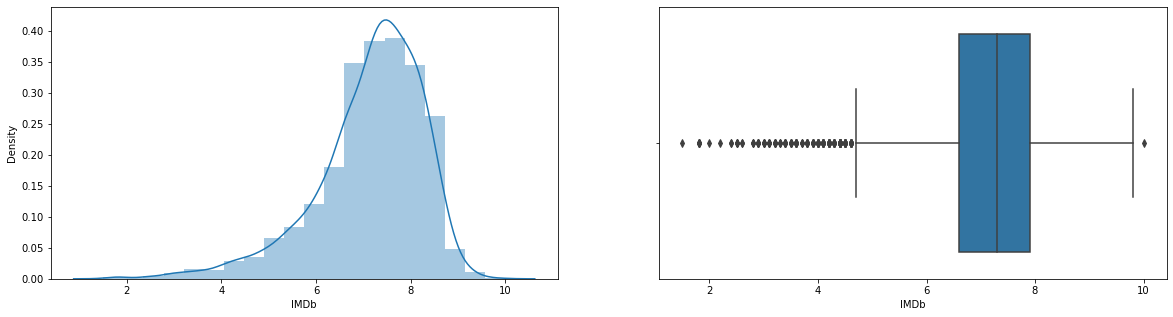

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_imdb['IMDb'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_imdb['IMDb'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_imdb_tvshows = df_tvshows_imdb.loc[df_tvshows_imdb['Netflix'] == 1]
hulu_imdb_tvshows = df_tvshows_imdb.loc[df_tvshows_imdb['Hulu'] == 1]
prime_video_imdb_tvshows = df_tvshows_imdb.loc[df_tvshows_imdb['Prime Video'] == 1]
disney_imdb_tvshows = df_tvshows_imdb.loc[df_tvshows_imdb['Disney+'] == 1]

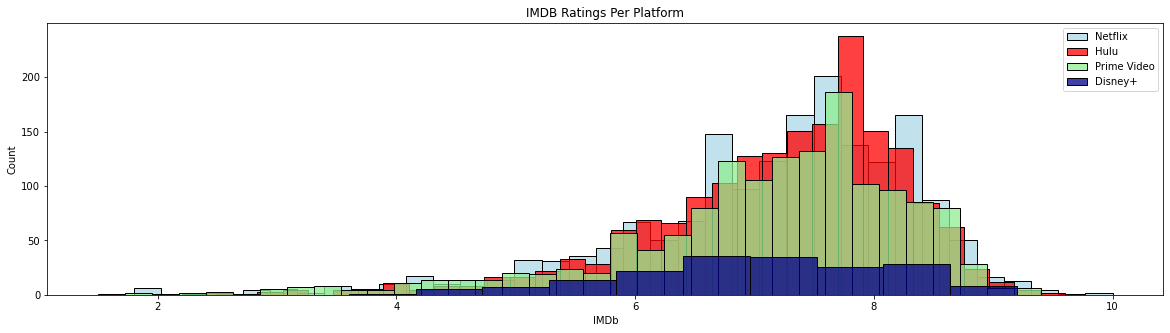

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('IMDB Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_imdb_tvshows['IMDb'], color = 'lightblue', legend = True, kde = False)
sns.histplot(netflix_imdb_tvshows['IMDb'], color = 'red', legend = True, kde = False)
sns.histplot(hulu_imdb_tvshows['IMDb'], color = 'lightgreen', legend = True, kde = False)
sns.histplot(disney_imdb_tvshows['IMDb'], color = 'darkblue', legend = True, kde = False) 
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest IMDb Rating Ever Got is '{df_imdb_high_tvshows['Title'][0]}' : '{df_imdb_high_tvshows['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating Ever Got is '{df_imdb_low_tvshows['Title'][0]}' : '{df_imdb_low_tvshows['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Netflix' is '{netflix_imdb_high_tvshows['Title'][0]}' : '{netflix_imdb_high_tvshows['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Netflix' is '{netflix_imdb_low_tvshows['Title'][0]}' : '{netflix_imdb_low_tvshows['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Hulu' is '{hulu_imdb_high_tvshows['Title'][0]}' : '{hulu_imdb_high_tvshows['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Hulu' is '{hulu_imdb_low_tvshows['Title'][0]}' : '{hulu_imdb_low_tvshows['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Prime Video' is '{prime_video_imdb_high_tvshows['Title'][0]}' : '{prime_video_imdb_high_tvshows['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Prime Video' is '{prime_video_imdb_low_tvshows['Title'][0]}' : '{prime_video_imdb_low_tvshows['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Disney+' is '{disney_imdb_high_tvshows['Title'][0]}' : '{disney_imdb_high_tvshows['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Disney+' is '{disney_imdb_low_tvshows['Title'][0]}' : '{disney_imdb_low_tvshows['IMDb'].min()}'\n 
      ''')


      The TV Show with Highest IMDb Rating Ever Got is 'Tanks!' : '10.0'

      The TV Show with Lowest IMDb Rating Ever Got is 'A Little Late with Lilly Singh' : '1.5'

      
      The TV Show with Highest IMDb Rating on 'Netflix' is 'Ch:os:en' : '9.6'

      The TV Show with Lowest IMDb Rating on 'Netflix' is 'Game Winning Hit' : '2.2'

      
      The TV Show with Highest IMDb Rating on 'Hulu' is 'The Joy of Painting' : '9.4'

      The TV Show with Lowest IMDb Rating on 'Hulu' is 'A Little Late with Lilly Singh' : '1.5'

      
      The TV Show with Highest IMDb Rating on 'Prime Video' is 'Tanks!' : '10.0'

      The TV Show with Lowest IMDb Rating on 'Prime Video' is 'Pinkfong! Baby Shark Special' : '1.8'

      
      The TV Show with Highest IMDb Rating on 'Disney+' is 'Avatar' : '9.2'

      The TV Show with Lowest IMDb Rating on 'Disney+' is 'Bizaardvark' : '3.6'
 
      


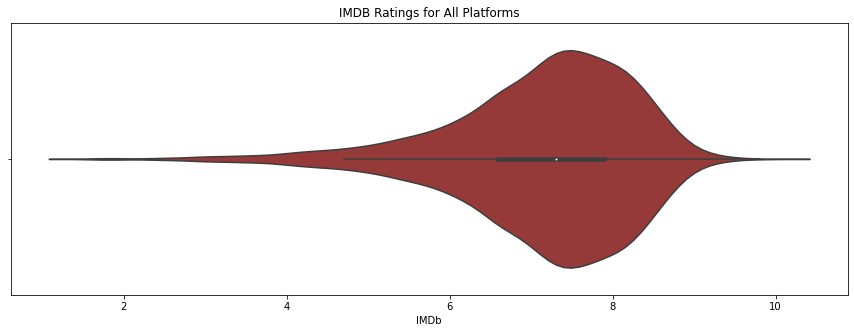

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('IMDB Ratings for All Platforms')
sns.violinplot(x = df_tvshows_imdb['IMDb'], color = 'brown', legend = True, kde = True, shade = False)
plt.show()

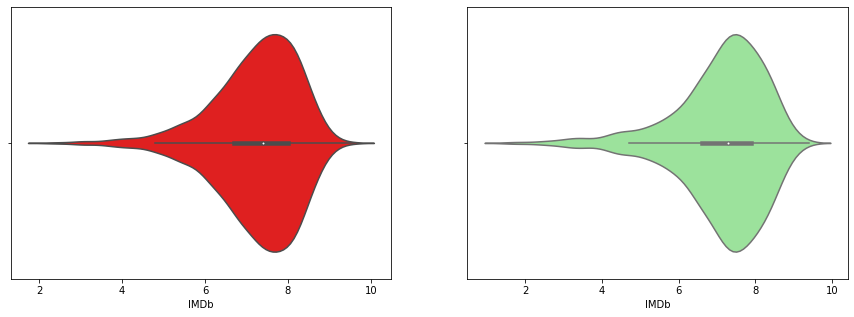

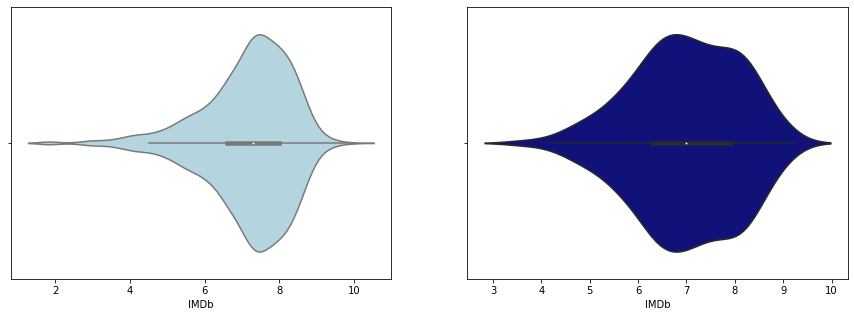

In [ ]:
# Distribution of tvshow rating in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_imdb_tvshows['IMDb'], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_imdb_tvshows['IMDb'], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_imdb_tvshows['IMDb'], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_imdb_tvshows['IMDb'], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average IMDb Rating is '{round(df_tvshows_imdb['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Netflix' is '{round(netflix_imdb_tvshows['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Hulu' is '{round(hulu_imdb_tvshows['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Prime Video' is '{round(prime_video_imdb_tvshows['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Disney+' is '{round(disney_imdb_tvshows['IMDb'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average IMDb Rating is '7.14'

      The Average IMDb Rating on 'Netflix' is '7.22'

      The Average IMDb Rating on 'Hulu' is '7.09'

      The Average IMDb Rating on 'Prime Video' is '7.15'

      The Average IMDb Rating on 'Disney+' is '6.99'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
    
df_tvshows_imdb['IMDB Group'] = df_tvshows_imdb['IMDb'].apply(round_val)
 
imdb_values = df_tvshows_imdb['IMDB Group'].value_counts().sort_index(ascending = False).tolist()
imdb_index = df_tvshows_imdb['IMDB Group'].value_counts().sort_index(ascending = False).index
 
imdb_values, imdb_index

([6, 270, 1917, 1518, 754, 236, 123, 37, 15],
 Int64Index([10, 9, 8, 7, 6, 5, 4, 3, 2], dtype='int64'))

In [ ]:
imdb_group_count = df_tvshows_imdb.groupby('IMDB Group')['Title'].count()
imdb_group_tvshow = df_tvshows_imdb.groupby('IMDB Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
imdb_group_data_tvshows = pd.concat([imdb_group_count, imdb_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
imdb_group_data_tvshows = imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# IMDB Group with TV Shows Counts - All Platforms Combined
imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
6           8            1917      765   576          682       56
5           7            1518      562   467          533       52
4           6             754      280   219          264       48
7           9             270      102    79          113       11
3           5             236       78    71           91       12
2           4             123       32    45           48        3
1           3              37        8    19           13        0
0           2              15        2     8            7        0
8          10               6        2     0            4        0

In [ ]:
imdb_group_data_tvshows.sort_values(by = 'IMDB Group', ascending = False)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
8          10               6        2     0            4        0
7           9             270      102    79          113       11
6           8            1917      765   576          682       56
5           7            1518      562   467          533       52
4           6             754      280   219          264       48
3           5             236       78    71           91       12
2           4             123       32    45           48        3
1           3              37        8    19           13        0
0           2              15        2     8            7        0

In [ ]:
# IMDb with TV Shows Counts - All Platforms Combined
imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]
 
df_imdb_group_high_tvshows = imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_imdb_group_high_tvshows = df_imdb_group_high_tvshows.drop(['index'], axis = 1)
# filter = (imdb_group_data_tvshows['TV Shows Count'] ==  (imdb_group_data_tvshows['TV Shows Count'].max()))
# df_imdb_group_high_tvshows = imdb_group_data_tvshows[filter]
 
# highest_rated_tvshow = imdb_group_data_tvshows.loc[imdb_group_data_tvshows['TV Shows Count'].idxmax()]
 
# print('\nIMDb with Highest Ever TV Shows Count are : All Platforms Combined\n')
# df_imdb_group_high_tvshows.head(5)
 
df_imdb_group_low_tvshows = imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_imdb_group_low_tvshows = df_imdb_group_low_tvshows.drop(['index'], axis = 1)
# filter = (imdb_group_data_tvshows['TV Shows Count'] = =  (imdb_group_data_tvshows['TV Shows Count'].min()))
# df_imdb_group_low_tvshows = imdb_group_data_tvshows[filter]
 
# print('\nIMDb with Lowest Ever TV Shows Count are : All Platforms Combined\n')
# df_imdb_group_low_tvshows.head(5)

In [ ]:
print(f'''
      Total '{df_tvshows_imdb['IMDB Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{imdb_group_data_tvshows['IMDB Group'].unique().shape[0]}' IMDB Group, They were Like this, \n
 
      {imdb_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['IMDB Group'].unique()} etc. \n
 
      The IMDB Group with Highest TV Shows Count have '{imdb_group_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_imdb_group_high_tvshows['IMDB Group'][0]}', &\n
      The IMDB Group with Lowest TV Shows Count have '{imdb_group_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_imdb_group_low_tvshows['IMDB Group'][0]}'
      ''')


      Total '4876' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '9' IMDB Group, They were Like this, 

 
      [ 8  7  6  9  5  4  3  2 10] etc. 

 
      The IMDB Group with Highest TV Shows Count have '1917' TV Shows Available is '8', &

      The IMDB Group with Lowest TV Shows Count have '6' TV Shows Available is '10'
      


In [ ]:
fig = px.pie(imdb_group_data_tvshows[:10], names = 'IMDB Group', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDB Group s')
fig.show()

In [ ]:
netflix_imdb_group_tvshows = imdb_group_data_tvshows[imdb_group_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_imdb_group_tvshows = netflix_imdb_group_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_imdb_group_high_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_imdb_group_high_tvshows = netflix_imdb_group_high_tvshows.drop(['index'], axis = 1)
 
netflix_imdb_group_low_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_imdb_group_low_tvshows = netflix_imdb_group_low_tvshows.drop(['index'], axis = 1)
 
netflix_imdb_group_high_tvshows.head(5)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           8            1917      765   576          682       56
1           7            1518      562   467          533       52
2           6             754      280   219          264       48
3           9             270      102    79          113       11
4           5             236       78    71           91       12

In [ ]:
hulu_imdb_group_tvshows = imdb_group_data_tvshows[imdb_group_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_imdb_group_tvshows = hulu_imdb_group_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_imdb_group_high_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_imdb_group_high_tvshows = hulu_imdb_group_high_tvshows.drop(['index'], axis = 1)
 
hulu_imdb_group_low_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_imdb_group_low_tvshows = hulu_imdb_group_low_tvshows.drop(['index'], axis = 1)
 
hulu_imdb_group_high_tvshows.head(5)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           8            1917      765   576          682       56
1           7            1518      562   467          533       52
2           6             754      280   219          264       48
3           9             270      102    79          113       11
4           5             236       78    71           91       12

In [ ]:
prime_video_imdb_group_tvshows = imdb_group_data_tvshows[imdb_group_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_imdb_group_tvshows = prime_video_imdb_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_imdb_group_high_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_imdb_group_high_tvshows = prime_video_imdb_group_high_tvshows.drop(['index'], axis = 1)
 
prime_video_imdb_group_low_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_imdb_group_low_tvshows = prime_video_imdb_group_low_tvshows.drop(['index'], axis = 1)
 
prime_video_imdb_group_high_tvshows.head(5)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           8            1917      765   576          682       56
1           7            1518      562   467          533       52
2           6             754      280   219          264       48
3           9             270      102    79          113       11
4           5             236       78    71           91       12

In [ ]:
disney_imdb_group_tvshows = imdb_group_data_tvshows[imdb_group_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_imdb_group_tvshows = disney_imdb_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_imdb_group_high_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_imdb_group_high_tvshows = disney_imdb_group_high_tvshows.drop(['index'], axis = 1)
 
disney_imdb_group_low_tvshows = df_imdb_group_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_imdb_group_low_tvshows = disney_imdb_group_low_tvshows.drop(['index'], axis = 1)
 
disney_imdb_group_high_tvshows.head(5)

IMDB Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           8            1917      765   576          682       56
1           7            1518      562   467          533       52
2           6             754      280   219          264       48
3           5             236       78    71           91       12
4           9             270      102    79          113       11

In [ ]:
print(f'''
      The IMDB Group with Highest TV Shows Count Ever Got is '{df_imdb_group_high_tvshows['IMDB Group'][0]}' : '{df_imdb_group_high_tvshows['TV Shows Count'].max()}'\n
      The IMDB Group with Lowest TV Shows Count Ever Got is '{df_imdb_group_low_tvshows['IMDB Group'][0]}' : '{df_imdb_group_low_tvshows['TV Shows Count'].min()}'\n
      
      The IMDB Group with Highest TV Shows Count on 'Netflix' is '{netflix_imdb_group_high_tvshows['IMDB Group'][0]}' : '{netflix_imdb_group_high_tvshows['Netflix'].max()}'\n
      The IMDB Group with Lowest TV Shows Count on 'Netflix' is '{netflix_imdb_group_low_tvshows['IMDB Group'][0]}' : '{netflix_imdb_group_low_tvshows['Netflix'].min()}'\n
      
      The IMDB Group with Highest TV Shows Count on 'Hulu' is '{hulu_imdb_group_high_tvshows['IMDB Group'][0]}' : '{hulu_imdb_group_high_tvshows['Hulu'].max()}'\n
      The IMDB Group with Lowest TV Shows Count on 'Hulu' is '{hulu_imdb_group_low_tvshows['IMDB Group'][0]}' : '{hulu_imdb_group_low_tvshows['Hulu'].min()}'\n
      
      The IMDB Group with Highest TV Shows Count on 'Prime Video' is '{prime_video_imdb_group_high_tvshows['IMDB Group'][0]}' : '{prime_video_imdb_group_high_tvshows['Prime Video'].max()}'\n
      The IMDB Group with Lowest TV Shows Count on 'Prime Video' is '{prime_video_imdb_group_low_tvshows['IMDB Group'][0]}' : '{prime_video_imdb_group_low_tvshows['Prime Video'].min()}'\n
      
      The IMDB Group with Highest TV Shows Count on 'Disney+' is '{disney_imdb_group_high_tvshows['IMDB Group'][0]}' : '{disney_imdb_group_high_tvshows['Disney+'].max()}'\n
      The IMDB Group with Lowest TV Shows Count on 'Disney+' is '{disney_imdb_group_low_tvshows['IMDB Group'][0]}' : '{disney_imdb_group_low_tvshows['Disney+'].min()}'\n 
      ''')


      The IMDB Group with Highest TV Shows Count Ever Got is '8' : '1917'

      The IMDB Group with Lowest TV Shows Count Ever Got is '10' : '6'

      
      The IMDB Group with Highest TV Shows Count on 'Netflix' is '8' : '765'

      The IMDB Group with Lowest TV Shows Count on 'Netflix' is '2' : '2'

      
      The IMDB Group with Highest TV Shows Count on 'Hulu' is '8' : '576'

      The IMDB Group with Lowest TV Shows Count on 'Hulu' is '10' : '0'

      
      The IMDB Group with Highest TV Shows Count on 'Prime Video' is '8' : '682'

      The IMDB Group with Lowest TV Shows Count on 'Prime Video' is '10' : '4'

      
      The IMDB Group with Highest TV Shows Count on 'Disney+' is '8' : '56'

      The IMDB Group with Lowest TV Shows Count on 'Disney+' is '3' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averimdb_group TV Shows Count of IMDB Group is '{round(imdb_group_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average imdb_group TV Shows Count of IMDB Group on 'Netflix' is '{round(netflix_imdb_group_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average imdb_group TV Shows Count of IMDB Group on 'Hulu' is '{round(hulu_imdb_group_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average imdb_group TV Shows Count of IMDB Group on 'Prime Video' is '{round(prime_video_imdb_group_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average imdb_group TV Shows Count of IMDB Group on 'Disney+' is '{round(disney_imdb_group_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averimdb_group TV Shows Count of IMDB Group is '541.78'

      The Average imdb_group TV Shows Count of IMDB Group on 'Netflix' is '203.44'

      The Average imdb_group TV Shows Count of IMDB Group on 'Hulu' is '185.5'

      The Average imdb_group TV Shows Count of IMDB Group on 'Prime Video' is '195.0'

      The Average imdb_group TV Shows Count of IMDB Group on 'Disney+' is '30.33'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of IMDB Group is '{imdb_group_data_tvshows['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Netflix' is '{netflix_imdb_group_tvshows['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Hulu' is '{hulu_imdb_group_tvshows['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Prime Video' is '{prime_video_imdb_group_tvshows['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Disney+' is '{disney_imdb_group_tvshows['IMDB Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of IMDB Group is '9'

      Total Count of IMDB Group on 'Netflix' is '9'

      Total Count of IMDB Group on 'Hulu' is '8'

      Total Count of IMDB Group on 'Prime Video' is '9'

      Total Count of IMDB Group on 'Disney+' is '6'
 
      


In [ ]:
fig = px.bar(x = imdb_group_data_tvshows['IMDB Group'], y = imdb_group_data_tvshows['TV Shows Count'], 
             color = imdb_group_data_tvshows['TV Shows Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'IMDB Group', 'y' : 'Number of TV Shows'})
fig.show()

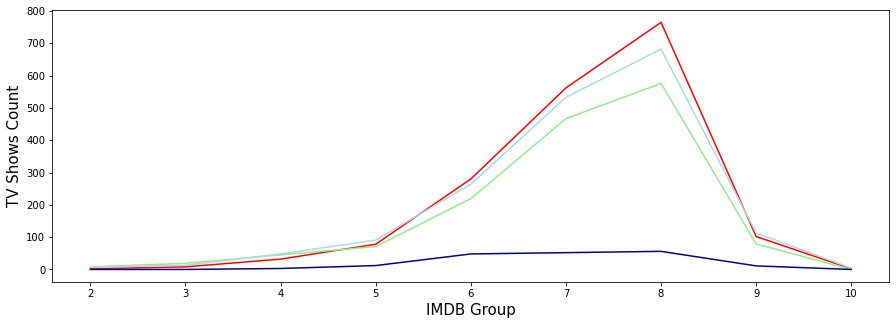

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = imdb_group_data_tvshows['IMDB Group'], y = imdb_group_data_tvshows['Netflix'], color = 'red')
sns.lineplot(x = imdb_group_data_tvshows['IMDB Group'], y = imdb_group_data_tvshows['Hulu'], color = 'lightgreen')
sns.lineplot(x = imdb_group_data_tvshows['IMDB Group'], y = imdb_group_data_tvshows['Prime Video'], color = 'lightblue')
sns.lineplot(x = imdb_group_data_tvshows['IMDB Group'], y = imdb_group_data_tvshows['Disney+'], color = 'darkblue')
plt.xlabel('IMDB Group', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

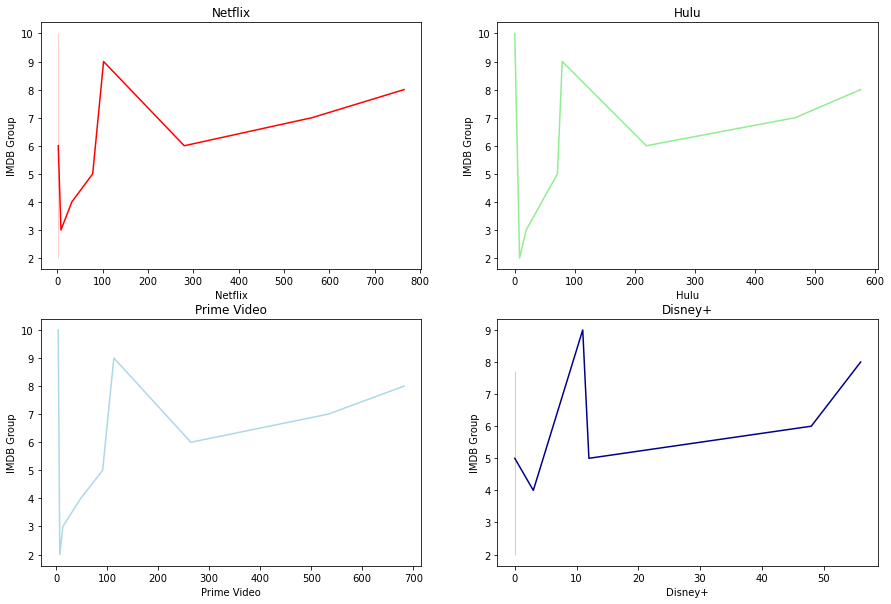

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_i_ax1 = sns.lineplot(y = imdb_group_data_tvshows['IMDB Group'], x = imdb_group_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_i_ax2 = sns.lineplot(y = imdb_group_data_tvshows['IMDB Group'], x = imdb_group_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_i_ax3 = sns.lineplot(y = imdb_group_data_tvshows['IMDB Group'], x = imdb_group_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_i_ax4 = sns.lineplot(y = imdb_group_data_tvshows['IMDB Group'], x = imdb_group_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_i_ax1.title.set_text(labels[0])
h_i_ax2.title.set_text(labels[1])
p_i_ax3.title.set_text(labels[2])
d_i_ax4.title.set_text(labels[3])
 
plt.show()

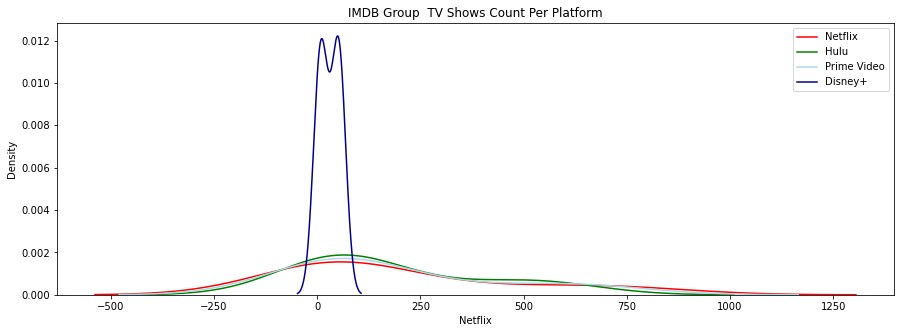

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('IMDB Group  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_imdb_group_tvshows['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_imdb_group_tvshows['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_imdb_group_tvshows['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_imdb_group_tvshows['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_roto = df_tvshows.copy()

In [ ]:
df_tvshows_roto.drop(df_tvshows_roto.loc[df_tvshows_roto['Rotten Tomatoes'] == "NA"].index, inplace = True)
# df_tvshows_roto = df_tvshows_roto[df_tvshows_roto.Rotten Tomatoes != "NA"]
df_tvshows_roto['Rotten Tomatoes'] = df_tvshows_roto['Rotten Tomatoes'].astype(int)

In [ ]:
df_roto_high_tvshows = df_tvshows_roto.sort_values(by = 'Rotten Tomatoes', ascending = False).reset_index()
df_roto_high_tvshows = df_roto_high_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_roto['Rotten Tomatoes'] == (df_tvshows_roto['Rotten Tomatoes'].max()))
# df_roto_high_tvshows = df_tvshows_roto[filter]
 
# highest_rated_tvshow = df_tvshows_roto.loc[df_tvshows_roto['Rotten Tomatoes'].idxmax()]
 
print('\nTV Shows with Highest Ever Rotten Tomatoes Rating are : \n')
df_roto_high_tvshows.head(5)


TV Shows with Highest Ever Rotten Tomatoes Rating are : 



ID          Title  Year Age IMDb  Rotten Tomatoes Directors  \
0  2275  Gravity Falls  2012   7  8.9              100        NA   
1   791     Hyperdrive  2019   7  6.7              100        NA   
2  2345   Cowboy Bebop  1998   7  8.9              100        NA   
3  2340     Elfen Lied  2004  16    8              100        NA   
4  2322         Spaced  1999  16  8.5              100        NA   

                                                Cast  \
0  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
1  Nick Frost,Kevin Eldon,Miranda Hart,Dan Antopo...   
2  Kôichi Yamadera,Unshô Ishizuka,Steve Blum,Beau...   
3  Sanae Kobayashi,Chihiro Suzuki,Mamiko Noto,Ada...   
4  Jessica Hynes,Simon Pegg,Julia Deakin,Nick Fro...   

                                              Genres  \
0  Animation,Adventure,Comedy,Drama,Family,Fantas...   
1                                      Comedy,Sci-Fi   
2  Animation,Action,Adventure,Comedy,Drama,Sci-Fi...   
3  Animation,Action,Drama,Horror,Mystery,Sci-Fi,T...   
4                                      Action,Comedy   

                                             Country  ...  \
0  United States,Argentina,Australia,United Kingd...  ...   
1                                     United Kingdom  ...   
2                                              Japan  ...   
3                                              Japan  ...   
4                                     United Kingdom  ...   

                                            Plotline Runtime       Kind  \
0  In a world populated with superhumans, the sup...      23  tv series   
1  As a gifted young football athlete from Bristo...      29  tv series   
2  From the earliest times, the humanity knows ab...      24  tv series   
3                                                 NA      24  tv series   
4  The numerous miraculous rescues by the local w...      25  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        0     1            0        1     1           Disney+  
1       2        1     0            0        0     1           Netflix  
2       1        0     1            0        0     1              Hulu  
3       1        0     1            1        0     1       Prime Video  
4       2        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
df_roto_low_tvshows = df_tvshows_roto.sort_values(by = 'Rotten Tomatoes', ascending = True).reset_index()
df_roto_low_tvshows = df_roto_low_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_roto['Rotten Tomatoes'] == (df_tvshows_roto['Rotten Tomatoes'].min()))
# df_roto_low_tvshows = df_tvshows_roto[filter]
 
print('\nTV Shows with Lowest Ever Rotten Tomatoes Rating are : \n')
df_roto_low_tvshows.head(5)


TV Shows with Lowest Ever Rotten Tomatoes Rating are : 



ID            Title  Year Age IMDb  Rotten Tomatoes        Directors  \
0  1804         Real Rob  2015  18  6.5                0               NA   
1  5120        Baby Talk  2017  NR  4.2                0               NA   
2   119  Switching Goals  1999   0  5.1                0     Mike Jeavons   
3    10          Rainbow  2015  NR    7                0  Nagesh Kukunoor   
4  4429        Baby Talk  1991   0  4.2                0               NA   

                                                Cast  \
0  Rob Schneider,Patricia Maya Schneider,Jamie Li...   
1  Tony Danza,Paul Jessup,Ryan Jessup,Mary Page K...   
2                                       Mike Jeavons   
3  Geoffrey Hayes,Roy Skelton,Stanley Bates,Rod B...   
4  Tony Danza,Paul Jessup,Ryan Jessup,Mary Page K...   

                         Genres         Country  ...  \
0                        Comedy   United States  ...   
1                        Comedy   United States  ...   
2  Action,Comedy,Family,Romance              NA  ...   
3              Animation,Family  United Kingdom  ...   
4                        Comedy   United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      30  tv series   
1  Around the Next Bend is the story of two frien...      30  tv series   
2                                                 NA      12  tv series   
3                                                 NA      22  tv series   
4                                                 NA      30  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        1     0            0        0     1           Netflix  
1       2        0     0            1        0     1       Prime Video  
2       1        0     1            0        0     1              Hulu  
3      20        1     0            0        0     1           Netflix  
4       2        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_roto['Rotten Tomatoes'].unique().shape[0]}' unique Rotten Tomatoes Ratings were Given, They were Like this,\n
      
{df_tvshows_roto.sort_values(by = 'Rotten Tomatoes', ascending = False)['Rotten Tomatoes'].unique()}\n
 
      The Highest Ever Rotten Tomatoes Rating Ever Any TV Show Got is '{df_roto_high_tvshows['Title'][0]}' : '{df_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
 
      The Lowest Ever Rotten Tomatoes Rating Ever Any TV Show Got is '{df_roto_low_tvshows['Title'][0]}' : '{df_roto_low_tvshows['Rotten Tomatoes'].min()}'\n
      ''')


      Total '92' unique Rotten Tomatoes Ratings were Given, They were Like this,

      
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  14  12  11  10   9   8
   6   0]

 
      The Highest Ever Rotten Tomatoes Rating Ever Any TV Show Got is 'Gravity Falls' : '100'

 
      The Lowest Ever Rotten Tomatoes Rating Ever Any TV Show Got is 'Real Rob' : '0'

      


In [ ]:
netflix_roto_high_tvshows = df_roto_high_tvshows.loc[df_roto_high_tvshows['Netflix']==1].reset_index()
netflix_roto_high_tvshows = netflix_roto_high_tvshows.drop(['index'], axis = 1)
 
netflix_roto_low_tvshows = df_roto_low_tvshows.loc[df_roto_low_tvshows['Netflix']==1].reset_index()
netflix_roto_low_tvshows = netflix_roto_low_tvshows.drop(['index'], axis = 1)
 
netflix_roto_high_tvshows.head(5)

ID                           Title  Year Age IMDb  Rotten Tomatoes  \
0  791                      Hyperdrive  2019   7  6.7              100   
1  593                           Fauda  2015  18  8.2              100   
2  784                      The Hollow  2018   7  7.2              100   
3  792  Time: The Kalief Browder Story  2017  16  8.5              100   
4  782                         Flowers  2016  16  8.2              100   

  Directors                                               Cast  \
0        NA  Nick Frost,Kevin Eldon,Miranda Hart,Dan Antopo...   
1        NA  Lior Raz,Itzik Cohen,Neta Garty,Rona-Lee Shim'...   
2        NA  Ashleigh Ball,Connor Parnall,Adrian Petriw,Mar...   
3        NA  Kalief Browder,Venida Browder,Jay-Z,Paul Prest...   
4        NA  Sophia Di Martino,Olivia Colman,Julian Barratt...   

                                  Genres         Country  ...  \
0                          Comedy,Sci-Fi  United Kingdom  ...   
1                  Action,Drama,Thriller          Israel  ...   
2  Animation,Drama,Family,Mystery,Sci-Fi          Canada  ...   
3                  Documentary,Biography   United States  ...   
4                           Comedy,Drama  United Kingdom  ...   

                                            Plotline Runtime       Kind  \
0  As a gifted young football athlete from Bristo...      29  tv series   
1  In crime ridden Gotham City, Thomas and Martha...      60  tv series   
2  A rare atmospheric phenomenon allows a New Yor...      24  tv series   
3                                                 NA      NA  tv series   
4                                                 NA      30  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        1     0            0        0     1           Netflix  
1       3        1     0            0        0     1           Netflix  
2       2        1     0            0        0     1           Netflix  
3       1        1     0            0        0     1           Netflix  
4       2        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
hulu_roto_high_tvshows = df_roto_high_tvshows.loc[df_roto_high_tvshows['Hulu']==1].reset_index()
hulu_roto_high_tvshows = hulu_roto_high_tvshows.drop(['index'], axis = 1)
 
hulu_roto_low_tvshows = df_roto_low_tvshows.loc[df_roto_low_tvshows['Hulu']==1].reset_index()
hulu_roto_low_tvshows = hulu_roto_low_tvshows.drop(['index'], axis = 1)
 
hulu_roto_high_tvshows.head(5)

ID          Title  Year Age IMDb  Rotten Tomatoes Directors  \
0  2275  Gravity Falls  2012   7  8.9              100        NA   
1  2345   Cowboy Bebop  1998   7  8.9              100        NA   
2  2340     Elfen Lied  2004  16    8              100        NA   
3  2322         Spaced  1999  16  8.5              100        NA   
4  2318    Tokyo Ghoul  2014  18  7.8              100        NA   

                                                Cast  \
0  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
1  Kôichi Yamadera,Unshô Ishizuka,Steve Blum,Beau...   
2  Sanae Kobayashi,Chihiro Suzuki,Mamiko Noto,Ada...   
3  Jessica Hynes,Simon Pegg,Julia Deakin,Nick Fro...   
4  Natsuki Hanae,Austin Tindle,Sora Amamiya,Brina...   

                                              Genres  \
0  Animation,Adventure,Comedy,Drama,Family,Fantas...   
1  Animation,Action,Adventure,Comedy,Drama,Sci-Fi...   
2  Animation,Action,Drama,Horror,Mystery,Sci-Fi,T...   
3                                      Action,Comedy   
4     Animation,Action,Drama,Fantasy,Horror,Thriller   

                                             Country  ...  \
0  United States,Argentina,Australia,United Kingd...  ...   
1                                              Japan  ...   
2                                              Japan  ...   
3                                     United Kingdom  ...   
4                                              Japan  ...   

                                            Plotline Runtime       Kind  \
0  In a world populated with superhumans, the sup...      23  tv series   
1  From the earliest times, the humanity knows ab...      24  tv series   
2                                                 NA      24  tv series   
3  The numerous miraculous rescues by the local w...      25  tv series   
4  The series follows John Nolan, a 40-year-old m...      24  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        0     1            0        1     1           Disney+  
1       1        0     1            0        0     1              Hulu  
2       1        0     1            1        0     1       Prime Video  
3       2        0     1            0        0     1              Hulu  
4       1        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
prime_video_roto_high_tvshows = df_roto_high_tvshows.loc[df_roto_high_tvshows['Prime Video']==1].reset_index()
prime_video_roto_high_tvshows = prime_video_roto_high_tvshows.drop(['index'], axis = 1)
 
prime_video_roto_low_tvshows = df_roto_low_tvshows.loc[df_roto_low_tvshows['Prime Video']==1].reset_index()
prime_video_roto_low_tvshows = prime_video_roto_low_tvshows.drop(['index'], axis = 1)
 
prime_video_roto_high_tvshows.head(5)

ID          Title  Year Age IMDb  Rotten Tomatoes Directors  \
0  2340     Elfen Lied  2004  16    8              100        NA   
1   321         Utopia  1951   7  6.7              100        NA   
2  2288       Mr. Bean  1990   7  8.5              100        NA   
3  2511  Yu Yu Hakusho  1992   7  8.5              100        NA   
4   199      Sanctuary  2017   0  7.3              100        NA   

                                                Cast  \
0  Sanae Kobayashi,Chihiro Suzuki,Mamiko Noto,Ada...   
1  John Cusack,Ashleigh LaThrop,Dan Byrd,Desmin B...   
2  Rowan Atkinson,Robin Driscoll,Matilda Ziegler,...   
3  Nozomu Sasaki,Justin Cook,Christopher Sabat,Cy...   
4  Amanda Tapping,Robin Dunne,Christopher Heyerda...   

                                              Genres         Country  ...  \
0  Animation,Action,Drama,Horror,Mystery,Sci-Fi,T...           Japan  ...   
1               Action,Drama,Mystery,Sci-Fi,Thriller   United States  ...   
2                                      Comedy,Family  United Kingdom  ...   
3  Animation,Action,Adventure,Comedy,Drama,Fantas...              NA  ...   
4                Action,Drama,Fantasy,Mystery,Sci-Fi          Canada  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      24  tv series   
1  An acclaimed documentary feature exploring the...      55  tv series   
2  The story of an inner-city Los Angeles police ...      25  tv series   
3  Follows a deep-cover operative named Martin Od...      24  tv series   
4                                                 NA      44  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     1            1        0     1       Prime Video  
1       1        0     0            1        0     1       Prime Video  
2       1        0     1            1        0     1       Prime Video  
3       1        0     1            1        0     1       Prime Video  
4       4        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
disney_roto_high_tvshows = df_roto_high_tvshows.loc[df_roto_high_tvshows['Disney+']==1].reset_index()
disney_roto_high_tvshows = disney_roto_high_tvshows.drop(['index'], axis = 1)
 
disney_roto_low_tvshows = df_roto_low_tvshows.loc[df_roto_low_tvshows['Disney+']==1].reset_index()
disney_roto_low_tvshows = disney_roto_low_tvshows.drop(['index'], axis = 1)
 
disney_roto_high_tvshows.head(5)

ID                                        Title  Year Age IMDb  \
0  2275                                Gravity Falls  2012   7  8.9   
1  5308                               Lizzie McGuire  2001   7  6.6   
2  5318  Disney Gallery / Star Wars: The Mandalorian  2020   7  8.5   
3  5301                                    DuckTales  2017   0  8.3   
4  5304                       The Imagineering Story  2019   0    9   

   Rotten Tomatoes       Directors  \
0              100              NA   
1              100              NA   
2              100  Josiah Swanson   
3              100              NA   
4              100              NA   

                                                Cast  \
0  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
1  Hilary Duff,Lalaine,Adam Lamberg,Jake Thomas,H...   
2                                     Josiah Swanson   
3  David Tennant,Ben Schwartz,Danny Pudi,Bobby Mo...   
4  Tom Morris,Kevin Rafferty,Angela Bassett,Tom F...   

                                              Genres  \
0  Animation,Adventure,Comedy,Drama,Family,Fantas...   
1                                Comedy,Drama,Family   
2                                          Talk-Show   
3  Animation,Action,Adventure,Comedy,Family,Fanta...   
4                                        Documentary   

                                             Country  ...  \
0  United States,Argentina,Australia,United Kingd...  ...   
1                                      United States  ...   
2                                                 NA  ...   
3                                      United States  ...   
4                                      United States  ...   

                                            Plotline Runtime       Kind  \
0  In a world populated with superhumans, the sup...      23  tv series   
1                                                 NA      30  tv series   
2                                                 NA      NA  tv series   
3                                                 NA      21  tv series   
4  Raven Baxter is a teenager. She can see glimps...      60  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        0     1            0        1     1           Disney+  
1       2        0     0            0        1     1           Disney+  
2       1        0     0            0        1     1           Disney+  
3       3        0     0            0        1     1           Disney+  
4       1        0     0            0        1     1           Disney+  

[5 rows x 21 columns]

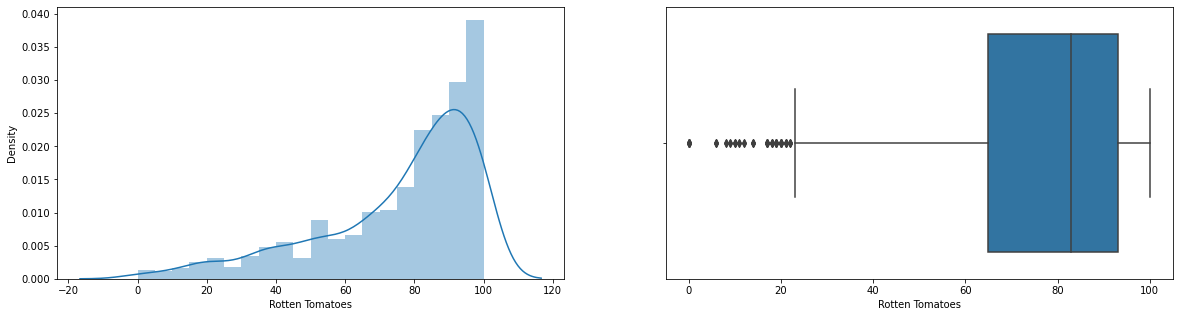

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_roto['Rotten Tomatoes'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_roto['Rotten Tomatoes'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_roto_tvshows = df_tvshows_roto.loc[df_tvshows_roto['Netflix'] == 1]
hulu_roto_tvshows = df_tvshows_roto.loc[df_tvshows_roto['Hulu'] == 1]
prime_video_roto_tvshows = df_tvshows_roto.loc[df_tvshows_roto['Prime Video'] == 1]
disney_roto_tvshows = df_tvshows_roto.loc[df_tvshows_roto['Disney+'] == 1]

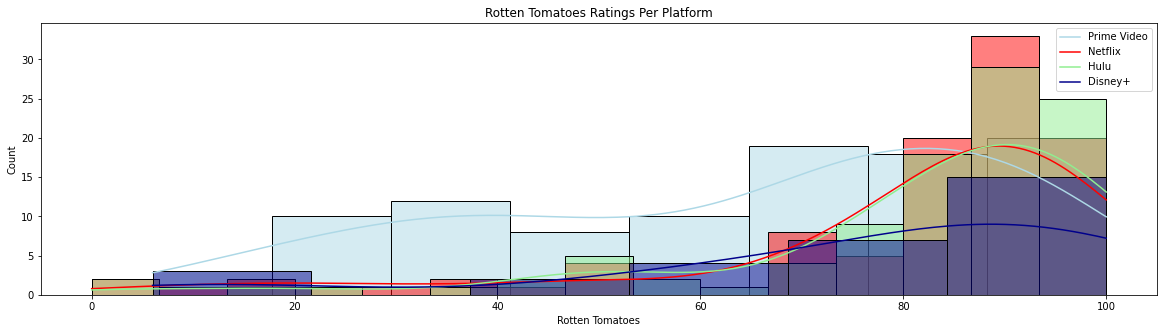

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Rotten Tomatoes Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_roto_tvshows['Rotten Tomatoes'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_roto_tvshows['Rotten Tomatoes'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_roto_tvshows['Rotten Tomatoes'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_roto_tvshows['Rotten Tomatoes'][:100], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest Rotten Tomatoes Rating Ever Got is '{df_roto_high_tvshows['Title'][0]}' : '{df_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating Ever Got is '{df_roto_low_tvshows['Title'][0]}' : '{df_roto_low_tvshows['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Netflix' is '{netflix_roto_high_tvshows['Title'][0]}' : '{netflix_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Netflix' is '{netflix_roto_low_tvshows['Title'][0]}' : '{netflix_roto_low_tvshows['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Hulu' is '{hulu_roto_high_tvshows['Title'][0]}' : '{hulu_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Hulu' is '{hulu_roto_low_tvshows['Title'][0]}' : '{hulu_roto_low_tvshows['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Prime Video' is '{prime_video_roto_high_tvshows['Title'][0]}' : '{prime_video_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Prime Video' is '{prime_video_roto_low_tvshows['Title'][0]}' : '{prime_video_roto_low_tvshows['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Disney+' is '{disney_roto_high_tvshows['Title'][0]}' : '{disney_roto_high_tvshows['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Disney+' is '{disney_roto_low_tvshows['Title'][0]}' : '{disney_roto_low_tvshows['Rotten Tomatoes'].min()}'\n 
      ''')


      The TV Show with Highest Rotten Tomatoes Rating Ever Got is 'Gravity Falls' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating Ever Got is 'Real Rob' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Netflix' is 'Hyperdrive' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Netflix' is 'Real Rob' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Hulu' is 'Gravity Falls' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Hulu' is 'Switching Goals' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Prime Video' is 'Elfen Lied' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Prime Video' is 'Baby Talk' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Disney+' is 'Gravity Falls' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Disney+' is 'Zapped' : '6'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Rotten Tomatoes Rating is '{round(df_tvshows_roto['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Netflix' is '{round(netflix_roto_tvshows['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Hulu' is '{round(hulu_roto_tvshows['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Prime Video' is '{round(prime_video_roto_tvshows['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Disney+' is '{round(disney_roto_tvshows['Rotten Tomatoes'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Rotten Tomatoes Rating is '75.52'

      The Average Rotten Tomatoes Rating on 'Netflix' is '77.96'

      The Average Rotten Tomatoes Rating on 'Hulu' is '77.04'

      The Average Rotten Tomatoes Rating on 'Prime Video' is '71.16'

      The Average Rotten Tomatoes Rating on 'Disney+' is '76.23'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
        
def round_fix(data):
    if data in range(0,11):
        # print(data)
        return 10
    if data in range(11,21):
        return 20
    if data in range(21,31):
        return 30
    if data in range(31,41):
        return 40
    if data in range(41,51):
        return 50
    if data in range(51,61):
        return 60
    if data in range(61,71):
        return 70
    if data in range(71,81):
        return 80
    if data in range(81,91):
        return 90
    if data in range(91,101):
        return 100
    
df_tvshows_roto['Rotten Tomatoes Group'] = df_tvshows_roto['Rotten Tomatoes'].apply(round_fix)
 
roto_values = df_tvshows_roto['Rotten Tomatoes Group'].value_counts().sort_index(ascending = False).tolist()
roto_index = df_tvshows_roto['Rotten Tomatoes Group'].value_counts().sort_index(ascending = False).index
 
roto_values, roto_index

([393, 291, 164, 107, 78, 68, 60, 29, 30, 18],
 Int64Index([100, 90, 80, 70, 60, 50, 40, 30, 20, 10], dtype='int64'))

In [ ]:
roto_group_count = df_tvshows_roto.groupby('Rotten Tomatoes Group')['Title'].count()
roto_group_tvshow = df_tvshows_roto.groupby('Rotten Tomatoes Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
roto_group_data_tvshows = pd.concat([roto_group_count, roto_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
roto_group_data_tvshows = roto_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Rotten Tomatoes Group with TV Shows Counts - All Platforms Combined
roto_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
9                    100             393      194   123           96       11
8                     90             291      115   104           89        9
7                     80             164       65    62           49        1
6                     70             107       35    35           35        4
5                     60              78       29    26           28        1
4                     50              68       26    16           29        2
3                     40              60       26    15           20        0
1                     20              30        9     5           16        2
2                     30              29       10     6           14        0
0                     10              18        7     7            6        1

In [ ]:
roto_group_data_tvshows.sort_values(by = 'Rotten Tomatoes Group', ascending = False)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
9                    100             393      194   123           96       11
8                     90             291      115   104           89        9
7                     80             164       65    62           49        1
6                     70             107       35    35           35        4
5                     60              78       29    26           28        1
4                     50              68       26    16           29        2
3                     40              60       26    15           20        0
2                     30              29       10     6           14        0
1                     20              30        9     5           16        2
0                     10              18        7     7            6        1

In [ ]:
df_roto_group_high_tvshows = roto_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_roto_group_high_tvshows = df_roto_group_high_tvshows.drop(['index'], axis = 1)
# filter = (roto_group_data_tvshows['TV Shows Count'] ==  (roto_group_data_tvshows['TV Shows Count'].max()))
# df_roto_group_high_tvshows = roto_group_data_tvshows[filter]
 
# highest_rated_tvshow = roto_group_data_tvshows.loc[roto_group_data_tvshows['TV Shows Count'].idxmax()]
 
# print('\nRotten Tomatoes with Highest Ever TV Shows Count are : All Platforms Combined\n')
# df_roto_group_high_tvshows.head(5)
 
df_roto_group_low_tvshows = roto_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_roto_group_low_tvshows = df_roto_group_low_tvshows.drop(['index'], axis = 1)
# filter = (roto_group_data_tvshows['TV Shows Count'] = =  (roto_group_data_tvshows['TV Shows Count'].min()))
# df_roto_group_low_tvshows = roto_group_data_tvshows[filter]
 
# print('\nRotten Tomatoes with Lowest Ever TV Shows Count are : All Platforms Combined\n')
# df_roto_group_low_tvshows.head(5)

In [ ]:
print(f'''
      Total '{df_tvshows_roto['Rotten Tomatoes Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{roto_group_data_tvshows['Rotten Tomatoes Group'].unique().shape[0]}' Rotten Tomatoes Group, They were Like this, \n
 
      {roto_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Rotten Tomatoes Group'].unique()} etc. \n
 
      The Rotten Tomatoes Group with Highest TV Shows Count have '{roto_group_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}', &\n
      The Rotten Tomatoes Group with Lowest TV Shows Count have '{roto_group_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}'
      ''')


      Total '1238' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '10' Rotten Tomatoes Group, They were Like this, 

 
      [100  90  80  70  60  50  40  20  30  10] etc. 

 
      The Rotten Tomatoes Group with Highest TV Shows Count have '393' TV Shows Available is '100', &

      The Rotten Tomatoes Group with Lowest TV Shows Count have '18' TV Shows Available is '10'
      


In [ ]:
fig = px.pie(roto_group_data_tvshows[:10], names = 'Rotten Tomatoes Group', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on Rotten Tomatoes Group s')
fig.show()

In [ ]:
netflix_roto_group_tvshows = roto_group_data_tvshows[roto_group_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_roto_group_tvshows = netflix_roto_group_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_roto_group_high_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_roto_group_high_tvshows = netflix_roto_group_high_tvshows.drop(['index'], axis = 1)
 
netflix_roto_group_low_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_roto_group_low_tvshows = netflix_roto_group_low_tvshows.drop(['index'], axis = 1)
 
netflix_roto_group_high_tvshows.head(5)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0                    100             393      194   123           96       11
1                     90             291      115   104           89        9
2                     80             164       65    62           49        1
3                     70             107       35    35           35        4
4                     60              78       29    26           28        1

In [ ]:
hulu_roto_group_tvshows = roto_group_data_tvshows[roto_group_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_roto_group_tvshows = hulu_roto_group_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_roto_group_high_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_roto_group_high_tvshows = hulu_roto_group_high_tvshows.drop(['index'], axis = 1)
 
hulu_roto_group_low_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_roto_group_low_tvshows = hulu_roto_group_low_tvshows.drop(['index'], axis = 1)
 
hulu_roto_group_high_tvshows.head(5)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0                    100             393      194   123           96       11
1                     90             291      115   104           89        9
2                     80             164       65    62           49        1
3                     70             107       35    35           35        4
4                     60              78       29    26           28        1

In [ ]:
prime_video_roto_group_tvshows = roto_group_data_tvshows[roto_group_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_roto_group_tvshows = prime_video_roto_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_roto_group_high_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_roto_group_high_tvshows = prime_video_roto_group_high_tvshows.drop(['index'], axis = 1)
 
prime_video_roto_group_low_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_roto_group_low_tvshows = prime_video_roto_group_low_tvshows.drop(['index'], axis = 1)
 
prime_video_roto_group_high_tvshows.head(5)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0                    100             393      194   123           96       11
1                     90             291      115   104           89        9
2                     80             164       65    62           49        1
3                     70             107       35    35           35        4
4                     50              68       26    16           29        2

In [ ]:
disney_roto_group_tvshows = roto_group_data_tvshows[roto_group_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_roto_group_tvshows = disney_roto_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_roto_group_high_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_roto_group_high_tvshows = disney_roto_group_high_tvshows.drop(['index'], axis = 1)
 
disney_roto_group_low_tvshows = df_roto_group_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_roto_group_low_tvshows = disney_roto_group_low_tvshows.drop(['index'], axis = 1)
 
disney_roto_group_high_tvshows.head(5)

Rotten Tomatoes Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0                    100             393      194   123           96       11
1                     90             291      115   104           89        9
2                     70             107       35    35           35        4
3                     50              68       26    16           29        2
4                     20              30        9     5           16        2

In [ ]:
print(f'''
      The Rotten Tomatoes Group with Highest TV Shows Count Ever Got is '{df_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}' : '{df_roto_group_high_tvshows['TV Shows Count'].max()}'\n
      The Rotten Tomatoes Group with Lowest TV Shows Count Ever Got is '{df_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}' : '{df_roto_group_low_tvshows['TV Shows Count'].min()}'\n
      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Netflix' is '{netflix_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}' : '{netflix_roto_group_high_tvshows['Netflix'].max()}'\n
      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Netflix' is '{netflix_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}' : '{netflix_roto_group_low_tvshows['Netflix'].min()}'\n
      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Hulu' is '{hulu_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}' : '{hulu_roto_group_high_tvshows['Hulu'].max()}'\n
      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Hulu' is '{hulu_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}' : '{hulu_roto_group_low_tvshows['Hulu'].min()}'\n
      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Prime Video' is '{prime_video_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}' : '{prime_video_roto_group_high_tvshows['Prime Video'].max()}'\n
      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Prime Video' is '{prime_video_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}' : '{prime_video_roto_group_low_tvshows['Prime Video'].min()}'\n
      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Disney+' is '{disney_roto_group_high_tvshows['Rotten Tomatoes Group'][0]}' : '{disney_roto_group_high_tvshows['Disney+'].max()}'\n
      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Disney+' is '{disney_roto_group_low_tvshows['Rotten Tomatoes Group'][0]}' : '{disney_roto_group_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Rotten Tomatoes Group with Highest TV Shows Count Ever Got is '100' : '393'

      The Rotten Tomatoes Group with Lowest TV Shows Count Ever Got is '10' : '18'

      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Netflix' is '100' : '194'

      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Netflix' is '10' : '7'

      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Hulu' is '100' : '123'

      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Hulu' is '20' : '5'

      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Prime Video' is '100' : '96'

      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Prime Video' is '10' : '6'

      
      The Rotten Tomatoes Group with Highest TV Shows Count on 'Disney+' is '100' : '11'

      The Rotten Tomatoes Group with Lowest TV Shows Count on 'Disney+' is '40' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averroto_group TV Shows Count of Rotten Tomatoes Group is '{round(roto_group_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Netflix' is '{round(netflix_roto_group_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Hulu' is '{round(hulu_roto_group_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Prime Video' is '{round(prime_video_roto_group_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Disney+' is '{round(disney_roto_group_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averroto_group TV Shows Count of Rotten Tomatoes Group is '123.8'

      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Netflix' is '51.6'

      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Hulu' is '39.9'

      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Prime Video' is '38.2'

      The Average roto_group TV Shows Count of Rotten Tomatoes Group on 'Disney+' is '3.88'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Rotten Tomatoes Group is '{roto_group_data_tvshows['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Netflix' is '{netflix_roto_group_tvshows['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Hulu' is '{hulu_roto_group_tvshows['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Prime Video' is '{prime_video_roto_group_tvshows['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Disney+' is '{disney_roto_group_tvshows['Rotten Tomatoes Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Rotten Tomatoes Group is '10'

      Total Count of Rotten Tomatoes Group on 'Netflix' is '10'

      Total Count of Rotten Tomatoes Group on 'Hulu' is '10'

      Total Count of Rotten Tomatoes Group on 'Prime Video' is '10'

      Total Count of Rotten Tomatoes Group on 'Disney+' is '8'
 
      


In [ ]:
fig = px.bar(x = roto_group_data_tvshows['Rotten Tomatoes Group'], y = roto_group_data_tvshows['TV Shows Count'], 
             color = roto_group_data_tvshows['TV Shows Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Rotten Tomatoes Group', 'y' : 'Number of TV Shows'})
fig.show()

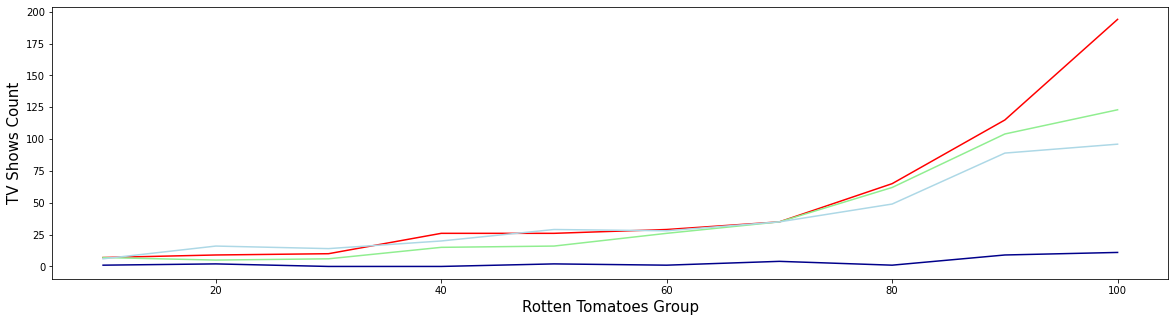

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = roto_group_data_tvshows['Rotten Tomatoes Group'], y = roto_group_data_tvshows['Netflix'], color = 'red')
sns.lineplot(x = roto_group_data_tvshows['Rotten Tomatoes Group'], y = roto_group_data_tvshows['Hulu'], color = 'lightgreen')
sns.lineplot(x = roto_group_data_tvshows['Rotten Tomatoes Group'], y = roto_group_data_tvshows['Prime Video'], color = 'lightblue')
sns.lineplot(x = roto_group_data_tvshows['Rotten Tomatoes Group'], y = roto_group_data_tvshows['Disney+'], color = 'darkblue')
plt.xlabel('Rotten Tomatoes Group', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

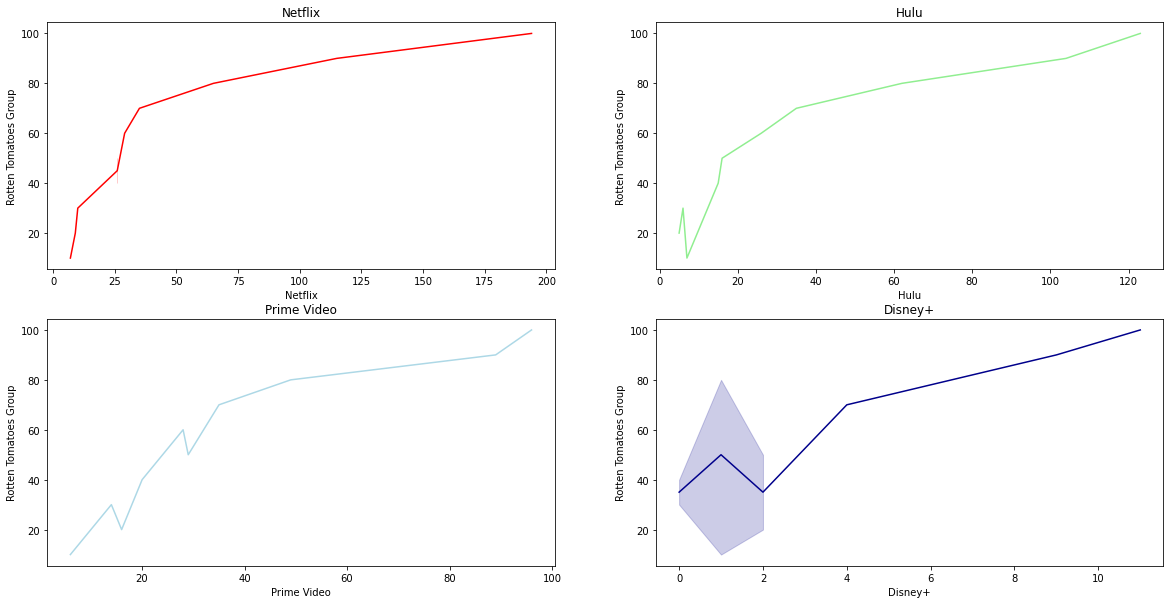

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_r_ax1 = sns.lineplot(y = roto_group_data_tvshows['Rotten Tomatoes Group'], x = roto_group_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_r_ax2 = sns.lineplot(y = roto_group_data_tvshows['Rotten Tomatoes Group'], x = roto_group_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_r_ax3 = sns.lineplot(y = roto_group_data_tvshows['Rotten Tomatoes Group'], x = roto_group_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_r_ax4 = sns.lineplot(y = roto_group_data_tvshows['Rotten Tomatoes Group'], x = roto_group_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_r_ax1.title.set_text(labels[0])
h_r_ax2.title.set_text(labels[1])
p_r_ax3.title.set_text(labels[2])
d_r_ax4.title.set_text(labels[3])
 
plt.show()

In [ ]:
df_tvshows_directors = df_tvshows.copy()

In [ ]:
# Create directors dict where key=name and value=number of directors
 
directors = {}
 
for i in df_tvshows_directors['Directors'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        directors[i] = len(i.split(','))
    else:
        directors[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_directors['Number of Directors'] = df_tvshows_directors['Directors'].map(directors).astype(int)

In [ ]:
df_directors_most_tvshows = df_tvshows_directors.sort_values(by = 'Number of Directors', ascending = False).reset_index()
df_directors_most_tvshows = df_directors_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_directors['Directors'] == (df_tvshows_directors['Number of Directors'].max()))
# df_directors_most_tvshows = df_tvshows_directors[filter]
 
# mostest_rated_tvshow = df_tvshows_directors.loc[df_tvshows_directors['Number of Directors'].idxmax()]
 
print('\nTV Shows with Highest Ever Directors Count are : \n')
df_directors_most_tvshows.head(5)


TV Shows with Highest Ever Directors Count are : 



ID                                       Title  Year Age IMDb  \
0    54             Stretch Armstrong: The Breakout  2018  NR  6.6   
1    26                                       K. D.  2019  NR  8.6   
2  3618                               Andy Explores  2019  NR   NA   
3  1560  Trailer Park Boys: Out of the Park: Europe  2016  18  7.8   
4   492              Ice Age: The Great Egg-Scapade  2016   7  5.9   

  Rotten Tomatoes                                          Directors  \
0              NA  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...   
1              87  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...   
2              NA  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...   
3              NA  Gary Howsam,Mike Smith,John Paul Tremblay,Robb...   
4              NA  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...   

                                                Cast  \
0  Ogie Banks,Clancy Brown,Yvette Nicole Brown,Ga...   
1  Maya Alagh,Nayan Bhatt,Manav Gohil,Darshan Jar...   
2  Ronnie Das,Jordan Sanchez,James Stone,Theresa ...   
3  John Paul Tremblay,Robb Wells,Mike Smith,Tom M...   
4  Blake Anderson,Tyree Brown,David Cowgill,Jenni...   

                                           Genres        Country  ... Runtime  \
0  Animation,Short,Action,Adventure,Comedy,Sci-Fi             NA  ...      NA   
1                    Crime,Drama,Mystery,Thriller             NA  ...      45   
2              Documentary,Family,News,Reality-TV             NA  ...      NA   
3                    Adventure,Comedy,Crime,Drama             NA  ...      NA   
4         Animation,Short,Adventure,Comedy,Family  United States  ...      25   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       1     0            0        0     1   
1  tv series       1       1     0            0        0     1   
2  tv series       1       0     1            0        0     1   
3  tv series       1       1     0            0        0     1   
4  tv series       1       0     0            0        1     1   

   Service Provider  Number of Directors  
0           Netflix                    5  
1           Netflix                    4  
2              Hulu                    4  
3           Netflix                    4  
4           Disney+                    4  

[5 rows x 22 columns]

In [ ]:
df_directors_least_tvshows = df_tvshows_directors.sort_values(by = 'Number of Directors', ascending = True).reset_index()
df_directors_least_tvshows = df_directors_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_directors['Directors'] == (df_tvshows_directors['Number of Directors'].min()))
# df_directors_least_tvshows = df_tvshows_directors[filter]
 
print('\nTV Shows with Lowest Ever Directors Count are : \n')
df_directors_least_tvshows.head(5)


TV Shows with Lowest Ever Directors Count are : 



ID                        Title  Year Age IMDb Rotten Tomatoes Directors  \
0     1                  Snowpiercer  2013  18  6.9              94        NA   
1  3596                    Mr. Snail  2014  NR   NA              NA        NA   
2  3595  Politicking with Larry King  2013  NR  5.4              NA        NA   
3  3594      Grey's Anatomy: Post-Op  2017  NR  4.5              NA        NA   
4  3593           Epic Conversations  2016  NR  6.7              NA        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1                                                 NA   
2  Larry King,Amy Holmes,David Jolly,Laura Schwar...   
3  Gordon James,Debbie Allen,Zoanne Clack,Loretta...   
4  Anne Marie Cummings,Gustavo Velasquez,Brett Be...   

                         Genres         Country  ... Runtime       Kind  \
0  Action,Drama,Sci-Fi,Thriller   United States  ...      60  tv series   
1                            NA  United Kingdom  ...      16  tv series   
2                     Talk-Show   United States  ...      NA  tv series   
3   Family,Reality-TV,Talk-Show   United States  ...      NA  tv series   
4                         Drama   United States  ...      NA  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       3       1     0            0        0     1           Netflix   
1       1       0     1            0        0     1              Hulu   
2       5       0     1            0        0     1              Hulu   
3       1       0     1            0        0     1              Hulu   
4       3       0     1            0        0     1              Hulu   

   Number of Directors  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 22 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_directors['Directors'].unique().shape[0]}' unique Directors are Available, They were Like this,\n
      
      {df_tvshows_directors.sort_values(by = 'Number of Directors', ascending = False)['Directors'].unique()[:5]} etc.\n
 
      The Highest Ever Directors Rating Ever Any TV Show Got is '{df_directors_most_tvshows['Title'][0]}' : '{df_directors_most_tvshows['Number of Directors'].max()}'\n
 
      The Lowest Ever Directors Rating Ever Any TV Show Got is '{df_directors_least_tvshows['Title'][0]}' : '{df_directors_least_tvshows['Number of Directors'].min()}'\n
      ''')


      Total '266' unique Directors are Available, They were Like this,

      
      ['Victor Cook,Kevin Altieri,Alan Caldwell,Victor Cook,Frank Paur'
 'Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,Udayan Pradeep Shukla'
 'Aaron Basch,Trevor Morris,Chris Olivas,Peter Schmid-Schoenbein'
 'Gary Howsam,Mike Smith,John Paul Tremblay,Robb Wells'
 'Paul Stodolny,Ricardo Curtis,Steve Martino,Mike Thurmeier'] etc.

 
      The Highest Ever Directors Rating Ever Any TV Show Got is 'Stretch Armstrong: The Breakout' : '5'

 
      The Lowest Ever Directors Rating Ever Any TV Show Got is 'Snowpiercer' : '0'

      


In [ ]:
netflix_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Netflix']==1].reset_index()
netflix_directors_most_tvshows = netflix_directors_most_tvshows.drop(['index'], axis = 1)
 
netflix_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Netflix']==1].reset_index()
netflix_directors_least_tvshows = netflix_directors_least_tvshows.drop(['index'], axis = 1)
 
netflix_directors_most_tvshows.head(5)

ID                                       Title  Year Age IMDb  \
0    54             Stretch Armstrong: The Breakout  2018  NR  6.6   
1    26                                       K. D.  2019  NR  8.6   
2  1560  Trailer Park Boys: Out of the Park: Europe  2016  18  7.8   
3  2116                                   Leo & Tig  2017   0  7.1   
4    96                  Little Baby Bum: Go Buster  2019  NR   NA   

  Rotten Tomatoes                                          Directors  \
0              NA  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...   
1              87  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...   
2              NA  Gary Howsam,Mike Smith,John Paul Tremblay,Robb...   
3              NA                Nikolay Kozlov,Aleksandr Lyutkevich   
4              NA                   Richard Hickey,Nick Hatton Jones   

                                                Cast  \
0  Ogie Banks,Clancy Brown,Yvette Nicole Brown,Ga...   
1  Maya Alagh,Nayan Bhatt,Manav Gohil,Darshan Jar...   
2  John Paul Tremblay,Robb Wells,Mike Smith,Tom M...   
3  Vladimir Antonik,Daniil Eldarov,Ulyana Kulikov...   
4                                                 NA   

                                           Genres Country  ... Runtime  \
0  Animation,Short,Action,Adventure,Comedy,Sci-Fi      NA  ...      NA   
1                    Crime,Drama,Mystery,Thriller      NA  ...      45   
2                    Adventure,Comedy,Crime,Drama      NA  ...      NA   
3                Animation,Short,Adventure,Comedy  Russia  ...      11   
4                        Animation,Family,Musical      NA  ...      26   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       1     0            0        0     1   
1  tv series       1       1     0            0        0     1   
2  tv series       1       1     0            0        0     1   
3  tv series       1       1     0            0        0     1   
4  tv series       1       1     0            0        0     1   

   Service Provider  Number of Directors  
0           Netflix                    5  
1           Netflix                    4  
2           Netflix                    4  
3           Netflix                    2  
4           Netflix                    2  

[5 rows x 22 columns]

In [ ]:
hulu_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Hulu']==1].reset_index()
hulu_directors_most_tvshows = hulu_directors_most_tvshows.drop(['index'], axis = 1)
 
hulu_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Hulu']==1].reset_index()
hulu_directors_least_tvshows = hulu_directors_least_tvshows.drop(['index'], axis = 1)
 
hulu_directors_most_tvshows.head(5)

ID                    Title  Year Age IMDb Rotten Tomatoes  \
0  3618            Andy Explores  2019  NR   NA              NA   
1  3685  Lost in the Supermarket  2016  NR  7.5              NA   
2  3589            Billy Bam Bam  2011  NR   NA              NA   
3  3583    Charlie & the Numbers  2011  NR   NA              NA   
4  3582          Tinder Takeover  2016  NR   NA              NA   

                                           Directors  \
0  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...   
1                        Nelson Boles,Raymie Muzquiz   
2                                      Grey Lockwood   
3                                        Katie Nolan   
4                                      Brett Carlson   

                                                Cast  \
0  Ronnie Das,Jordan Sanchez,James Stone,Theresa ...   
1  Eva Bella,Katie Crown,Emily Eiden,Sean Giambro...   
2  Perry Como,Mitchell Ayres,Pearl Bailey,Billy B...   
3                                        Katie Nolan   
4  Katie Lynn Bard,Lina Green,Emma Lieberman,Tayl...   

                                    Genres Country  ... Runtime       Kind  \
0       Documentary,Family,News,Reality-TV      NA  ...      NA  tv series   
1  Animation,Short,Adventure,Comedy,Family      NA  ...      11  tv series   
2                                    Music      NA  ...      60  tv series   
3                        Comedy,News,Sport      NA  ...      NA  tv series   
4                                   Comedy      NA  ...      NA  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1       0     1            0        0     1              Hulu   
1       1       0     1            0        0     1              Hulu   
2       1       0     1            0        0     1              Hulu   
3       1       0     1            0        0     1              Hulu   
4       1       0     1            0        0     1              Hulu   

   Number of Directors  
0                    4  
1                    2  
2                    1  
3                    1  
4                    1  

[5 rows x 22 columns]

In [ ]:
prime_video_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Prime Video']==1].reset_index()
prime_video_directors_most_tvshows = prime_video_directors_most_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Prime Video']==1].reset_index()
prime_video_directors_least_tvshows = prime_video_directors_least_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_most_tvshows.head(5)

ID                                              Title  Year Age IMDb  \
0  4231                          Kokkoku, Moment by Moment  2018  18  8.1   
1   247                                       Cruel Summer  2016  NR  8.2   
2  4972                           K2: The Italian Mountain  2012  NR   NA   
3   150                            The Day of the Triffids  1962  NR  5.6   
4   458  What's at the Center of the Earth? Layers! Fos...  2016   0   NA   

  Rotten Tomatoes                                          Directors  \
0              NA  Takahiro Kawakoshi,Yoji Minaharu,Yoshimitsu Ôh...   
1              NA            Kanye West,Alexandre Moors,Elon Rutberg   
2              NA                        Toni Steller,Florian Wittig   
3              76                       Steve Sekely,Freddie Francis   
4              NA                            Terry Izumi,Karl Toerge   

                                                Cast  \
0  Amber Lee Connors,Marissa Lenti,Carl Masterson...   
1  Chiara Aurelia,Andrea Anders,Benjamin J. Cain ...   
2                                       Indy Neidell   
3  Dougray Scott,Joely Richardson,Eddie Izzard,Br...   
4  Claire Margaret Corlett,Ian James Corlett,Erik...   

                             Genres                Country  ... Runtime  \
0  Animation,Drama,Mystery,Thriller                     NA  ...      24   
1            Drama,Mystery,Thriller          United States  ...      45   
2           Documentary,History,War                     NA  ...      NA   
3     Action,Horror,Sci-Fi,Thriller  United Kingdom,Canada  ...     186   
4                  Animation,Family                     NA  ...      NA   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       0     0            1        0     1   
1  tv series       1       0     0            1        0     1   
2  tv series       1       0     0            1        0     1   
3  tv series       1       0     0            1        0     1   
4  tv series       1       0     0            1        0     1   

   Service Provider  Number of Directors  
0       Prime Video                    3  
1       Prime Video                    3  
2       Prime Video                    2  
3       Prime Video                    2  
4       Prime Video                    2  

[5 rows x 22 columns]

In [ ]:
disney_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Disney+']==1].reset_index()
disney_directors_most_tvshows = disney_directors_most_tvshows.drop(['index'], axis = 1)
 
disney_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Disney+']==1].reset_index()
disney_directors_least_tvshows = disney_directors_least_tvshows.drop(['index'], axis = 1)
 
disney_directors_most_tvshows.head(5)

ID                                        Title  Year Age IMDb  \
0   492               Ice Age: The Great Egg-Scapade  2016   7  5.9   
1   496                 Marvel Rising: Heart of Iron  2019  13  4.2   
2   497                     The Plausible Impossible  1956  13  7.5   
3   489                  Phineas and Ferb: Star Wars  2014   0  8.2   
4  5318  Disney Gallery / Star Wars: The Mandalorian  2020   7  8.5   

  Rotten Tomatoes                                          Directors  \
0              NA  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...   
1              NA                             Sol Choi,Alfred Gimeno   
2              NA                   William Beaudine,Wilfred Jackson   
3              NA                         Robert Hughes,Sue Perrotto   
4             100                                     Josiah Swanson   

                                                Cast  \
0  Blake Anderson,Tyree Brown,David Cowgill,Jenni...   
1  Dee Bradley Baker,Chloe Bennet,Dove Cameron,Ro...   
2        Walt Disney,Leopold Stokowski,Clarence Nash   
3  Vincent Martella,Ella Kennedy,Ashley Tisdale,T...   
4                                     Josiah Swanson   

                                              Genres        Country  ...  \
0            Animation,Short,Adventure,Comedy,Family  United States  ...   
1            Animation,Short,Action,Adventure,Sci-Fi  United States  ...   
2                             Adventure,Drama,Family  United States  ...   
3  Animation,Short,Action,Comedy,Family,Musical,S...  United States  ...   
4                                          Talk-Show             NA  ...   

  Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0      25  tv series       1       0     0            0        1     1   
1      44  tv series       1       0     0            0        1     1   
2      50  tv series       1       0     0            0        1     1   
3      51  tv series       1       0     0            0        1     1   
4      NA  tv series       1       0     0            0        1     1   

   Service Provider  Number of Directors  
0           Disney+                    4  
1           Disney+                    2  
2           Disney+                    2  
3           Disney+                    2  
4           Disney+                    1  

[5 rows x 22 columns]

In [ ]:
print(f'''
      The TV Show with Highest Director Count Ever Got is '{df_directors_most_tvshows['Title'][0]}' : '{df_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count Ever Got is '{df_directors_least_tvshows['Title'][0]}' : '{df_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Netflix' is '{netflix_directors_most_tvshows['Title'][0]}' : '{netflix_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Netflix' is '{netflix_directors_least_tvshows['Title'][0]}' : '{netflix_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Hulu' is '{hulu_directors_most_tvshows['Title'][0]}' : '{hulu_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Hulu' is '{hulu_directors_least_tvshows['Title'][0]}' : '{hulu_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Prime Video' is '{prime_video_directors_most_tvshows['Title'][0]}' : '{prime_video_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Prime Video' is '{prime_video_directors_least_tvshows['Title'][0]}' : '{prime_video_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Disney+' is '{disney_directors_most_tvshows['Title'][0]}' : '{disney_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Disney+' is '{disney_directors_least_tvshows['Title'][0]}' : '{disney_directors_least_tvshows['Number of Directors'].min()}'\n 
      ''')


      The TV Show with Highest Director Count Ever Got is 'Stretch Armstrong: The Breakout' : '5'

      The TV Show with Lowest Director Count Ever Got is 'Snowpiercer' : '0'

      
      The TV Show with Highest Director Count on 'Netflix' is 'Stretch Armstrong: The Breakout' : '5'

      The TV Show with Lowest Director Count on 'Netflix' is 'Snowpiercer' : '0'

      
      The TV Show with Highest Director Count on 'Hulu' is 'Andy Explores' : '4'

      The TV Show with Lowest Director Count on 'Hulu' is 'Mr. Snail' : '0'

      
      The TV Show with Highest Director Count on 'Prime Video' is 'Kokkoku, Moment by Moment' : '3'

      The TV Show with Lowest Director Count on 'Prime Video' is 'Videofashion! News' : '0'

      
      The TV Show with Highest Director Count on 'Disney+' is 'Ice Age: The Great Egg-Scapade' : '4'

      The TV Show with Lowest Director Count on 'Disney+' is 'Lost Treasures of Egypt' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Director Count is '{round(df_tvshows_directors['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Netflix' is '{round(netflix_directors_most_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Hulu' is '{round(hulu_directors_most_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Prime Video' is '{round(prime_video_directors_most_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Disney+' is '{round(disney_directors_most_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Director Count is '0.06'

      The Average Director Count on 'Netflix' is '0.04'

      The Average Director Count on 'Hulu' is '0.02'

      The Average Director Count on 'Prime Video' is '0.09'

      The Average Director Count on 'Disney+' is '0.14'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Directors is '{df_tvshows_directors['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Netflix' is '{netflix_directors_most_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Hulu' is '{hulu_directors_most_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Prime Video' is '{prime_video_directors_most_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Disney+' is '{disney_directors_most_tvshows['Directors'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Directors is '266'

      Total Count of Directors on 'Netflix' is '56'

      Total Count of Directors on 'Hulu' is '25'

      Total Count of Directors on 'Prime Video' is '179'

      Total Count of Directors on 'Disney+' is '21'
 
      


In [ ]:
df_tvshows_directors.drop(df_tvshows_directors.loc[df_tvshows_directors['Directors'] == "NA"].index, inplace = True)
# df_tvshows_directors = df_tvshows_directors[df_tvshows_directors.Directors != "NA"]

In [ ]:
df_dirs = df_tvshows_directors['Directors'].str.split(',').apply(pd.Series).stack()
del df_tvshows_directors['Directors']
df_dirs.index = df_dirs.index.droplevel(-1)
df_dirs.name = 'Directors'
df_tvshows_directors = df_tvshows_directors.join(df_dirs)
df_tvshows_directors.drop_duplicates(inplace=True)

In [ ]:
df_tvshows_directors.head(5)

ID              Title  Year Age IMDb Rotten Tomatoes  \
6    7       A Wednesday!  2008  NR  8.1              NA   
9   10            Rainbow  2015  NR    7               0   
11  12          Wakefield  2017  18  8.1              72   
12  13  Alive and Kicking  2017  NR  6.2              83   
17  18               Zero  2018  NR  5.5              88   

                                                 Cast  \
6                                                  NA   
9   Geoffrey Hayes,Roy Skelton,Stanley Bates,Rod B...   
11  Rudi Dharmalingam,Mandy McElhinney,Geraldine H...   
12  Álvaro Requena,Marco Sanz,Sara Manzano,Aitor V...   
17  Giuseppe Dave Seke,Haroun Fall,Beatrice Grannò...   

                                Genres         Country Language  ...  \
6         Comedy,Family,Fantasy,Horror   United States  English  ...   
9                     Animation,Family  United Kingdom  English  ...   
11                             Mystery       Australia  English  ...   
12              Adventure,Drama,Family           Spain  Spanish  ...   
17  Action,Comedy,Drama,Fantasy,Sci-Fi           Italy  Italian  ...   

         Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
6   tv series       1       1     0            0        0     1   
9   tv series      20       1     0            0        0     1   
11  tv series       1       1     0            0        0     1   
12  tv series       1       1     0            0        0     1   
17  tv series       1       1     0            1        0     1   

    Service Provider  Number of Directors        Directors  
6            Netflix                    1    Neeraj Pandey  
9            Netflix                    1  Nagesh Kukunoor  
11           Netflix                    1    Robin Swicord  
12           Netflix                    1    Cyril Frankel  
17           Netflix                    1    Aanand L. Rai  

[5 rows x 22 columns]

In [ ]:
directors_count = df_tvshows_directors.groupby('Directors')['Title'].count()
directors_tvshow = df_tvshows_directors.groupby('Directors')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
directors_data_tvshows = pd.concat([directors_count, directors_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
directors_data_tvshows = directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Directors with TV Shows Counts - All Platforms Combined
directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
37          Bob Smeaton               3        0     0            3        0
47      Callie T. Wiser               2        0     0            2        0
169       Lewis Lovhaug               2        0     0            1        1
58   Christopher Menaul               2        1     0            1        0
88        Fabien Beziat               2        2     0            0        0
232        Rick Morales               2        1     0            1        0
224    Randall MacLowry               2        0     0            2        0
132        Jeremy Marre               2        0     0            2        0
113        Hugues Nancy               2        2     0            0        0
181  Matthew Longfellow               2        0     0            2        0

In [ ]:
df_directors_high_tvshows = directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_directors_high_tvshows = df_directors_high_tvshows.drop(['index'], axis = 1)
# filter = (directors_data_tvshows['TV Shows Count'] == (directors_data_tvshows['TV Shows Count'].max()))
# df_directors_high_tvshows = directors_data_tvshows[filter]
 
# highest_rated_tvshow = directors_data_tvshows.loc[directors_data_tvshows['TV Shows Count'].idxmax()]

In [ ]:
print('\nDirectors with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_directors_high_tvshows.head(5)


Directors with Highest Ever TV Shows Count are : All Platforms Combined



Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0         Bob Smeaton               3        0     0            3        0
1     Callie T. Wiser               2        0     0            2        0
2       Lewis Lovhaug               2        0     0            1        1
3  Christopher Menaul               2        1     0            1        0
4       Fabien Beziat               2        2     0            0        0

In [ ]:
df_directors_low_tvshows = directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_directors_low_tvshows = df_directors_low_tvshows.drop(['index'], axis = 1)
# filter = (directors_data_tvshows['TV Shows Count'] == (directors_data_tvshows['TV Shows Count'].min()))
# df_directors_low_tvshows = directors_data_tvshows[filter]

In [ ]:
print('\nDirectors with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_directors_low_tvshows.head(5)


Directors with Lowest Ever TV Shows Count are : All Platforms Combined



Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0          Sol Choi               1        0     0            0        1
1   Adolfo Alix Jr.               1        0     0            1        0
2     Alan Caldwell               1        1     0            0        0
3       Alan Lewens               1        0     0            1        0
4  Alastair Layzell               1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_tvshows['Directors'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{directors_data_tvshows['Directors'].unique().shape[0]}' Directors, They were Like this,\n
 
      {directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Directors'].head(5).unique()} etc. \n
 
      The Director with Highest TV Shows Count have '{directors_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_directors_high_tvshows['Directors'][0]}', &\n
      The Director with Lowest TV Shows Count have '{directors_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_directors_low_tvshows['Directors'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '307' Directors, They were Like this,

 
      ['Bob Smeaton' 'Callie T. Wiser' 'Lewis Lovhaug' 'Christopher Menaul'
 'Fabien Beziat'] etc. 

 
      The Director with Highest TV Shows Count have '3' TV Shows Available is 'Bob Smeaton', &

      The Director with Lowest TV Shows Count have '1' TV Shows Available is 'Sol Choi'
      


In [ ]:
fig = px.pie(directors_data_tvshows[:10], names = 'Directors', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Netflix'] != 0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_directors_tvshows = netflix_directors_tvshows.drop(['index', 'Hulu','Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_directors_high_tvshows = df_directors_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_directors_high_tvshows = netflix_directors_high_tvshows.drop(['index'], axis = 1)
 
netflix_directors_low_tvshows = df_directors_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_directors_low_tvshows = netflix_directors_low_tvshows.drop(['index'], axis = 1)
 
netflix_directors_high_tvshows.head(5)

Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Fabien Beziat               2        2     0            0        0
1     Hugues Nancy               2        2     0            0        0
2  Julien Leclercq               1        1     0            0        0
3  Federico Veiroj               1        1     0            0        0
4  Nagesh Kukunoor               1        1     0            0        0

In [ ]:
# hulu_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Hulu'] != 0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_directors_tvshows = hulu_directors_tvshows.drop(['index', 'Netflix','Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_directors_high_tvshows = df_directors_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_directors_high_tvshows = hulu_directors_high_tvshows.drop(['index'], axis = 1)
 
hulu_directors_low_tvshows = df_directors_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_directors_low_tvshows = hulu_directors_low_tvshows.drop(['index'], axis = 1)
 
hulu_directors_high_tvshows.head(5)

Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  Zenith DeGregorio               1        0     1            0        0
1   Brian K. Roberts               1        0     1            0        0
2      Grey Lockwood               1        0     1            0        0
3   Charles S. Dubin               1        0     1            0        0
4       Shane Dawson               1        0     1            1        0

In [ ]:
# prime_video_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Prime Video'] != 0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_directors_tvshows = prime_video_directors_tvshows.drop(['index', 'Netflix','Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_directors_high_tvshows = df_directors_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_directors_high_tvshows = prime_video_directors_high_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_low_tvshows = df_directors_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_directors_low_tvshows = prime_video_directors_low_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_high_tvshows.head(5)

Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0         Bob Smeaton               3        0     0            3        0
1    Randall MacLowry               2        0     0            2        0
2        Jeremy Marre               2        0     0            2        0
3  Matthew Longfellow               2        0     0            2        0
4     Callie T. Wiser               2        0     0            2        0

In [ ]:
# disney_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Disney+'] != 0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_directors_tvshows = disney_directors_tvshows.drop(['index', 'Netflix','Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_directors_high_tvshows = df_directors_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_directors_high_tvshows = disney_directors_high_tvshows.drop(['index'], axis = 1)
 
disney_directors_low_tvshows = df_directors_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_directors_low_tvshows = disney_directors_low_tvshows.drop(['index'], axis = 1)
 
disney_directors_high_tvshows.head(5)

Directors  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Robert Stevenson               1        0     0            0        1
1     Wilfred Jackson               1        0     0            0        1
2       Steve Martino               1        0     0            0        1
3  Sotiris Tsafoulias               1        0     0            0        1
4        Sue Perrotto               1        0     0            0        1

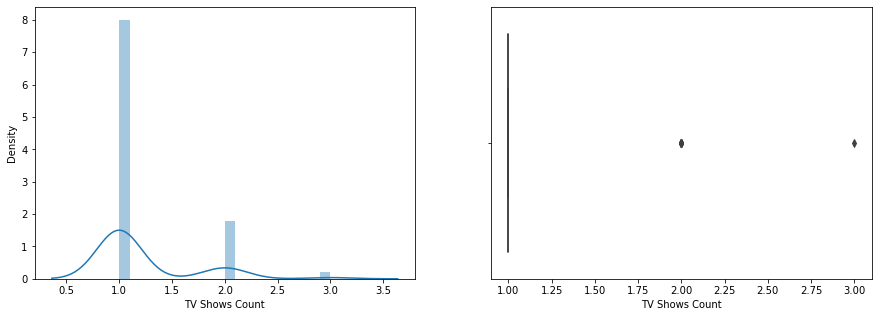

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(directors_data_tvshows['TV Shows Count'][:50],bins = 20, kde = True, ax = ax[0])
sns.boxplot(directors_data_tvshows['TV Shows Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_directors_tvshows = netflix_directors_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_directors_tvshows = hulu_directors_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_directors_tvshows = prime_video_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_directors_tvshows = directors_data_tvshows[directors_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_directors_tvshows = disney_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

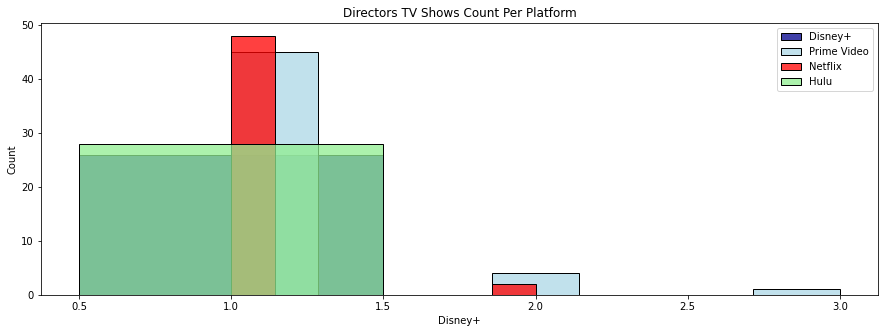

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Directors TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_directors_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = False)  
sns.histplot(prime_video_directors_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = False)
sns.histplot(netflix_directors_tvshows['Netflix'][:50], color = 'red', legend = True, kde = False)
sns.histplot(hulu_directors_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = False)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Director with Highest TV Shows Count Rating Ever Got is '{df_directors_high_tvshows['Directors'][0]}' : '{df_directors_high_tvshows['TV Shows Count'].max()}'\n
      The Director with Lowest TV Shows Count Rating Ever Got is '{df_directors_low_tvshows['Directors'][0]}' : '{df_directors_low_tvshows['TV Shows Count'].min()}'\n
      
      The Director with Highest TV Shows Count Rating on 'Netflix' is '{netflix_directors_high_tvshows['Directors'][0]}' : '{netflix_directors_high_tvshows['Netflix'].max()}'\n
      The Director with Lowest TV Shows Count Rating on 'Netflix' is '{netflix_directors_low_tvshows['Directors'][0]}' : '{netflix_directors_low_tvshows['Netflix'].min()}'\n
      
      The Director with Highest TV Shows Count Rating on 'Hulu' is '{hulu_directors_high_tvshows['Directors'][0]}' : '{hulu_directors_high_tvshows['Hulu'].max()}'\n
      The Director with Lowest TV Shows Count Rating on 'Hulu' is '{hulu_directors_low_tvshows['Directors'][0]}' : '{hulu_directors_low_tvshows['Hulu'].min()}'\n
      
      The Director with Highest TV Shows Count Rating on 'Prime Video' is '{prime_video_directors_high_tvshows['Directors'][0]}' : '{prime_video_directors_high_tvshows['Prime Video'].max()}'\n
      The Director with Lowest TV Shows Count Rating on 'Prime Video' is '{prime_video_directors_low_tvshows['Directors'][0]}' : '{prime_video_directors_low_tvshows['Prime Video'].min()}'\n
      
      The Director with Highest TV Shows Count Rating on 'Disney+' is '{disney_directors_high_tvshows['Directors'][0]}' : '{disney_directors_high_tvshows['Disney+'].max()}'\n
      The Director with Lowest TV Shows Count Rating on 'Disney+' is '{disney_directors_low_tvshows['Directors'][0]}' : '{disney_directors_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Director with Highest TV Shows Count Rating Ever Got is 'Bob Smeaton' : '3'

      The Director with Lowest TV Shows Count Rating Ever Got is 'Sol Choi' : '1'

      
      The Director with Highest TV Shows Count Rating on 'Netflix' is 'Fabien Beziat' : '2'

      The Director with Lowest TV Shows Count Rating on 'Netflix' is 'Bob Smeaton' : '0'

      
      The Director with Highest TV Shows Count Rating on 'Hulu' is 'Zenith DeGregorio' : '1'

      The Director with Lowest TV Shows Count Rating on 'Hulu' is 'Bob Smeaton' : '0'

      
      The Director with Highest TV Shows Count Rating on 'Prime Video' is 'Bob Smeaton' : '3'

      The Director with Lowest TV Shows Count Rating on 'Prime Video' is 'Julien Leclercq' : '0'

      
      The Director with Highest TV Shows Count Rating on 'Disney+' is 'Robert Stevenson' : '1'

      The Director with Lowest TV Shows Count Rating on 'Disney+' is 'Bob Smeaton' : '0'
 
      


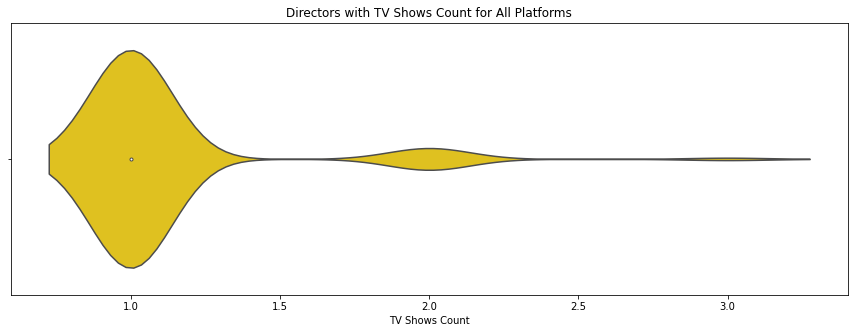

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Directors with TV Shows Count for All Platforms')
sns.violinplot(x = directors_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

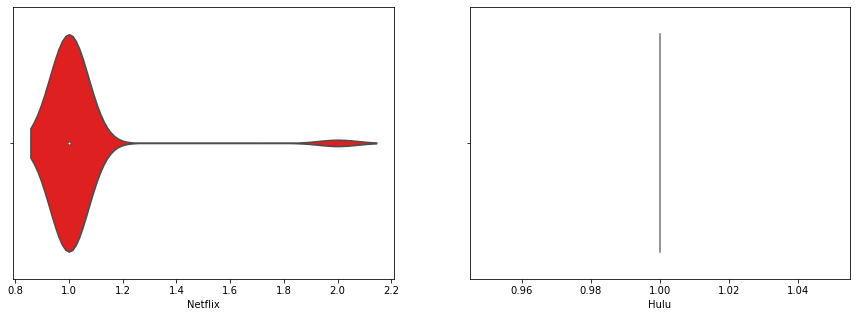

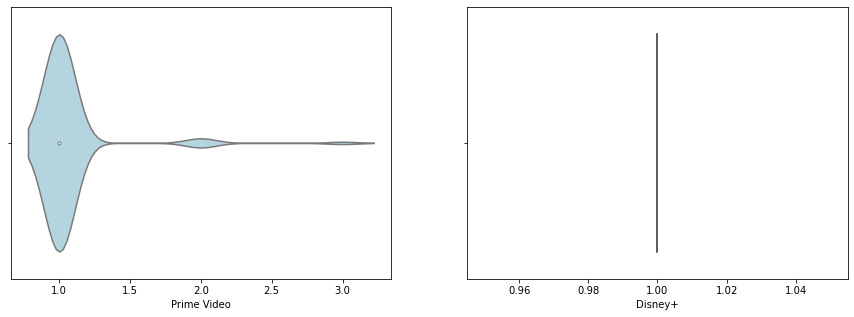

In [ ]:
# Distribution of Directors TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_directors_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_directors_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_directors_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_directors_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Directors is '{round(directors_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Directors on 'Netflix' is '{round(netflix_directors_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Directors on 'Hulu' is '{round(hulu_directors_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Directors on 'Prime Video' is '{round(prime_video_directors_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Directors on 'Disney+' is '{round(disney_directors_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Directors is '1.04'

      The Average TV Shows Count of Directors on 'Netflix' is '1.03'

      The Average TV Shows Count of Directors on 'Hulu' is '1.0'

      The Average TV Shows Count of Directors on 'Prime Video' is '1.03'

      The Average TV Shows Count of Directors on 'Disney+' is '1.0'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Directors is '{directors_data_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Netflix' is '{netflix_directors_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Hulu' is '{hulu_directors_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Prime Video' is '{prime_video_directors_tvshows['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Disney+' is '{disney_directors_tvshows['Directors'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Directors is '307'

      Total Count of Directors on 'Netflix' is '70'

      Total Count of Directors on 'Hulu' is '28'

      Total Count of Directors on 'Prime Video' is '196'

      Total Count of Directors on 'Disney+' is '26'
 
      


In [ ]:
fig = px.bar(x = directors_data_tvshows['Directors'][:50], y = directors_data_tvshows['TV Shows Count'][:50], 
             color = directors_data_tvshows['TV Shows Count'][:50], color_continuous_scale = 'Teal_r',
             labels = { 'x' : 'Directors', 'y' : 'Number of TV Shows'})
fig.show()

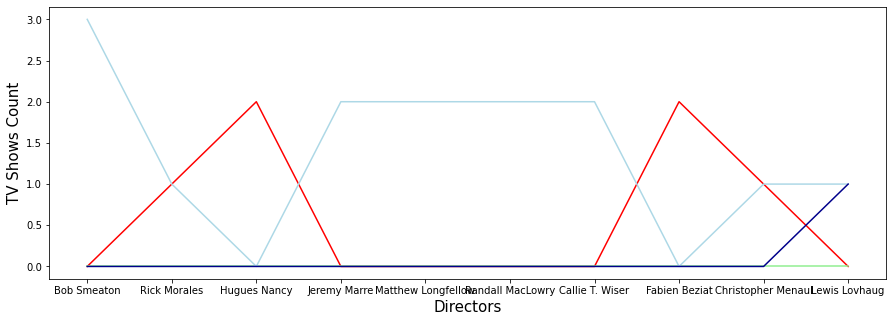

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = directors_data_tvshows['Directors'][:10], y = directors_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = directors_data_tvshows['Directors'][:10], y = directors_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = directors_data_tvshows['Directors'][:10], y = directors_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = directors_data_tvshows['Directors'][:10], y = directors_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Directors', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

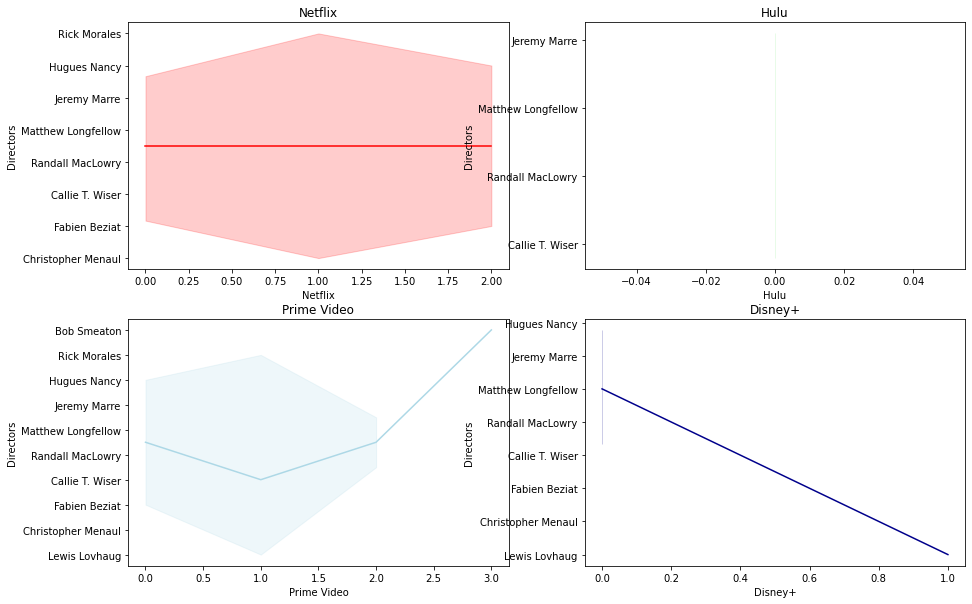

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(15 ,10))
 
n_d_ax1 = sns.lineplot(y = directors_data_tvshows['Directors'][:10], x = directors_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_d_ax2 = sns.lineplot(y = directors_data_tvshows['Directors'][:10], x = directors_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_d_ax3 = sns.lineplot(y = directors_data_tvshows['Directors'][:10], x = directors_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_d_ax4 = sns.lineplot(y = directors_data_tvshows['Directors'][:10], x = directors_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

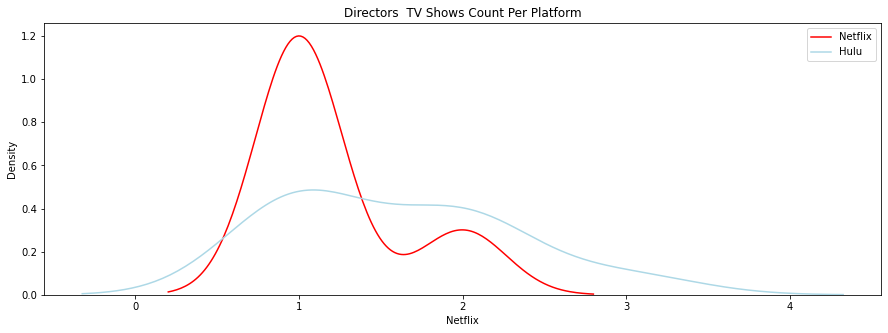

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Directors  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_directors_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_directors_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_directors_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_directors_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_casts = df_tvshows.copy()

In [ ]:
# Create casts dict where key=name and value = number of casts
 
casts = {}
 
for i in df_tvshows_casts['Cast'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        casts[i] = len(i.split(','))
    else:
        casts[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_casts['Number of Cast'] = df_tvshows_casts['Cast'].map(casts).astype(int)

In [ ]:
df_casts_most_tvshows = df_tvshows_casts.sort_values(by = 'Number of Cast', ascending = False).reset_index()
df_casts_most_tvshows = df_casts_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_casts['Cast'] == (df_tvshows_casts['Number of Cast'].max()))
# df_casts_most_tvshows = df_tvshows_casts[filter]
 
# mostest_rated_tvshow = df_tvshows_casts.loc[df_tvshows_casts['Number of Cast'].idxmax()]
 
print('\nTV Shows with Highest Ever Cast Count are : \n')
df_casts_most_tvshows.head(5)


TV Shows with Highest Ever Cast Count are : 



ID           Title  Year Age IMDb Rotten Tomatoes     Directors  \
0  5191  The French Gun  2018  16   NA              NA  Wes Anderson   
1     1     Snowpiercer  2013  18  6.9              94            NA   
2  2729  Little Britain  2003  18  7.6              NA            NA   
3     2    Philadelphia  1993  13  8.8              80            NA   
4  2719       Moone Boy  2012  16  8.1              NA            NA   

                                                Cast  \
0  Saoirse Ronan,Frances McDormand,Adrien Brody,T...   
1  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
2  Matt Lucas,David Walliams,Tom Baker,Paul Putne...   
3  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
4  Chris O'Dowd,David Rawle,Deirdre O'Kane,Peter ...   

                         Genres                 Country  ... Runtime  \
0          Comedy,Drama,Romance   Germany,United States  ...     103   
1  Action,Drama,Sci-Fi,Thriller           United States  ...      60   
2                        Comedy          United Kingdom  ...      29   
3                        Comedy           United States  ...      22   
4                        Comedy  United Kingdom,Ireland  ...      23   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       0     0            1        0     1   
1  tv series       3       1     0            0        0     1   
2  tv series       4       0     1            0        0     1   
3  tv series      18       1     0            0        0     1   
4  tv series       3       0     1            0        0     1   

   Service Provider  Number of Cast  
0       Prime Video              53  
1           Netflix              50  
2              Hulu              50  
3           Netflix              50  
4              Hulu              50  

[5 rows x 22 columns]

In [ ]:
df_casts_least_tvshows = df_tvshows_casts.sort_values(by = 'Number of Cast', ascending = True).reset_index()
df_casts_least_tvshows = df_casts_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_casts['Cast'] == (df_tvshows_casts['Number of Cast'].min()))
# df_casts_least_tvshows = df_tvshows_casts[filter]
 
print('\nTV Shows with Lowest Ever Cast Count are : \n')
df_casts_least_tvshows.head(5)


TV Shows with Lowest Ever Cast Count are : 



ID                                  Title  Year Age IMDb Rotten Tomatoes  \
0  3219                            恋と選挙とチョコレート  2012  18  7.2              NA   
1  5248              Troy el Tren en Auto City  2016  NR   NA              NA   
2  4883  Under The Sea: The Great Barrier Reef  2017  NR   NA              NA   
3  4885      A Fishing Story with Ronnie Green  2017  NR   NA              NA   
4  4886                    Reelin' in the Keys  2017  NR   NA              NA   

  Directors Cast       Genres Country  ... Runtime       Kind Seasons Netflix  \
0        NA   NA           NA      NA  ...      NA  tv series       1       0   
1        NA   NA           NA      NA  ...      NA  tv series       1       0   
2        NA   NA  Documentary      NA  ...      50  tv series       1       0   
3        NA   NA           NA      NA  ...      NA  tv series       1       0   
4        NA   NA           NA      NA  ...      NA  tv series       1       0   

   Hulu  Prime Video  Disney+  Type  Service Provider  Number of Cast  
0     1            0        0     1              Hulu               0  
1     0            1        0     1       Prime Video               0  
2     0            1        0     1       Prime Video               0  
3     0            1        0     1       Prime Video               0  
4     0            1        0     1       Prime Video               0  

[5 rows x 22 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_casts['Cast'].unique().shape[0]}' unique Casts are Available, They were Like this,\n
      
      {df_tvshows_casts.sort_values(by = 'Number of Cast', ascending = False)['Cast'].unique()[:5]} etc.\n
 
      The Highest Ever Cast Count Any TV Show Got is '{df_casts_most_tvshows['Title'][0]}' : '{df_casts_most_tvshows['Number of Cast'].max()}'\n
 
      The Lowest Ever Cast Count Any TV Show Got is '{df_casts_least_tvshows['Title'][0]}' : '{df_casts_least_tvshows['Number of Cast'].min()}'\n
      ''')


      Total '4804' unique Casts are Available, They were Like this,

      
      ['Saoirse Ronan,Frances McDormand,Adrien Brody,Timothée Chalamet,Elisabeth Moss,Tilda Swinton,Edward Norton,Owen Wilson,Léa Seydoux,Willem Dafoe,Bill Murray,Rupert Friend,Christoph Waltz,Benicio Del Toro,Liev Schreiber,Fisher Stevens,Jason Schwartzman,Cécile de France,Griffin Dunne,Anjelica Huston,Henry Winkler,Jeffrey Wright,Mathieu Amalric,Lois Smith,Bob Balaban,Morgane Polanski,Tony Revolori,Alex Lawther,Anjelica Bette Fellini,Denis Ménochet,Steve Park,Wallace Wolodarsky,Toheeb Jimoh,Lyna Khoudri,Benjamin Lavernhe,Guillaume Gallienne,Vincent Macaigne,Félix Moati,Antonia Desplat,Hippolyte Girardot,Maud Druine,Sam Haygarth,Samuel Blenkin,Tom Hudson,Pablo Pauly,Nicholas Croucher,Stéphane Bak,Alexandre Steiger,Gabriel Ryan,Nicolas Avinée,Ilona Petiet,Mohamed Belhadjine,Winsen Ait Hellal'
 "Daveed Diggs,Iddo Goldberg,Mickey Sumner,Alison Wright,Lena Hall,Sheila Vand,Annalise Basso,Jennifer Connelly,Miranda

In [ ]:
netflix_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Netflix']==1].reset_index()
netflix_casts_most_tvshows = netflix_casts_most_tvshows.drop(['index'], axis = 1)
 
netflix_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Netflix']==1].reset_index()
netflix_casts_least_tvshows = netflix_casts_least_tvshows.drop(['index'], axis = 1)
 
netflix_casts_most_tvshows.head(5)

ID                                    Title  Year Age IMDb  \
0     1                              Snowpiercer  2013  18  6.9   
1     2                             Philadelphia  1993  13  8.8   
2  2134                        La Esclava Blanca  2016  18  8.3   
3  2184  The Great British Baking Show: Holidays  2016   7  8.6   
4  2187                 El Señor de los Cielos 3  2015  18  6.8   

  Rotten Tomatoes Directors  \
0              94        NA   
1              80        NA   
2              NA        NA   
3              NA        NA   
4              NA        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Carrell Lasso,Jose Luis Garcia Campos,Adrian M...   
3  Paul Hollywood,Mary Berry,Mel Giedroyc,Sue Per...   
4  Rafael Amaya,Carmen Aub,Fernanda Castillo,Lisa...   

                                Genres          Country  ... Runtime  \
0         Action,Drama,Sci-Fi,Thriller    United States  ...      60   
1                               Comedy    United States  ...      22   
2                              History         Colombia  ...      60   
3                           Reality-TV   United Kingdom  ...      60   
4  Action,Crime,Drama,Romance,Thriller  Mexico,Colombia  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       3       1     0            0        0     1   
1  tv series      18       1     0            0        0     1   
2  tv series       1       1     0            0        0     1   
3  tv series      11       1     0            0        0     1   
4  tv series       7       1     0            0        0     1   

   Service Provider  Number of Cast  
0           Netflix              50  
1           Netflix              50  
2           Netflix              50  
3           Netflix              50  
4           Netflix              50  

[5 rows x 22 columns]

In [ ]:
hulu_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Hulu']==1].reset_index()
hulu_casts_most_tvshows = hulu_casts_most_tvshows.drop(['index'], axis = 1)
 
hulu_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Hulu']==1].reset_index()
hulu_casts_least_tvshows = hulu_casts_least_tvshows.drop(['index'], axis = 1)
 
hulu_casts_most_tvshows.head(5)

ID                      Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2729             Little Britain  2003  18  7.6              NA        NA   
1  2719                  Moone Boy  2012  16  8.1              NA        NA   
2  2720                    Ghosted  2017   7  6.3              59        NA   
3  2721  The Mary Tyler Moore Show  1970   0  8.1              NA        NA   
4  2722         Unsolved Mysteries  1987  18  7.3              NA        NA   

                                                Cast  \
0  Matt Lucas,David Walliams,Tom Baker,Paul Putne...   
1  Chris O'Dowd,David Rawle,Deirdre O'Kane,Peter ...   
2  Adam Scott,Craig Robinson,Ally Walker,Adeel Ak...   
3  Mary Tyler Moore,Gavin MacLeod,Edward Asner,Te...   
4  Pistol Black,Myrtle Carter,Jane Green,Teruo Ko...   

                                        Genres                 Country  ...  \
0                                       Comedy          United Kingdom  ...   
1                                       Comedy  United Kingdom,Ireland  ...   
2  Comedy,Crime,Horror,Mystery,Sci-Fi,Thriller           United States  ...   
3                                       Comedy                      NA  ...   
4                    Documentary,Crime,Mystery           United States  ...   

  Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0      29  tv series       4       0     1            0        0     1   
1      23  tv series       3       0     1            0        0     1   
2      30  tv series       1       0     1            0        0     1   
3      30  tv series       7       0     1            0        0     1   
4      45  tv series       2       0     1            1        0     1   

   Service Provider  Number of Cast  
0              Hulu              50  
1              Hulu              50  
2              Hulu              50  
3              Hulu              50  
4       Prime Video              50  

[5 rows x 22 columns]

In [ ]:
prime_video_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Prime Video']==1].reset_index()
prime_video_casts_most_tvshows = prime_video_casts_most_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Prime Video']==1].reset_index()
prime_video_casts_least_tvshows = prime_video_casts_least_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_most_tvshows.head(5)

ID               Title  Year Age IMDb Rotten Tomatoes     Directors  \
0  5191      The French Gun  2018  16   NA              NA  Wes Anderson   
1  2722  Unsolved Mysteries  1987  18  7.3              NA            NA   
2  2736       Big Time Rush  2009   0  6.3              NA            NA   
3  2711              Medium  2005  16  6.9              NA            NA   
4  2684        The Guardian  2001   7  7.4              NA            NA   

                                                Cast  \
0  Saoirse Ronan,Frances McDormand,Adrien Brody,T...   
1  Pistol Black,Myrtle Carter,Jane Green,Teruo Ko...   
2  Kendall Schmidt,James Maslow,Carlos PenaVega,L...   
3  Patricia Arquette,Miguel Sandoval,Sofia Vassil...   
4  Simon Baker,Alan Rosenberg,Raphael Sbarge,Dabn...   

                                 Genres                Country  ... Runtime  \
0                  Comedy,Drama,Romance  Germany,United States  ...     103   
1             Documentary,Crime,Mystery          United States  ...      45   
2                 Comedy,Family,Musical          United States  ...      25   
3  Crime,Drama,Fantasy,Mystery,Thriller          United States  ...      60   
4                           Crime,Drama          United States  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       0     0            1        0     1   
1  tv series       2       0     1            1        0     1   
2  tv series       4       0     1            1        0     1   
3  tv series       7       0     1            1        0     1   
4  tv series       3       0     1            1        0     1   

   Service Provider  Number of Cast  
0       Prime Video              53  
1       Prime Video              50  
2       Prime Video              50  
3       Prime Video              50  
4       Prime Video              50  

[5 rows x 22 columns]

In [ ]:
disney_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Disney+']==1].reset_index()
disney_casts_most_tvshows = disney_casts_most_tvshows.drop(['index'], axis = 1)
 
disney_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Disney+']==1].reset_index()
disney_casts_least_tvshows = disney_casts_least_tvshows.drop(['index'], axis = 1)
 
disney_casts_most_tvshows.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2704         K.C. Undercover  2015   7  6.2              NA        NA   
1  2768  The Incredible Dr. Pol  2011   7  8.6              NA        NA   
2  2572        X-Men: Evolution  2000   7  7.9              NA        NA   
3  2574       Good Luck Charlie  2010   0    7              NA        NA   
4  2960          Doc McStuffins  2012   0  6.7              NA        NA   

                                                Cast  \
0  Zendaya,Veronica Dunne,Kamil McFadden,Trinitee...   
1  Jan Pol,Ari Rubin,Diane Pol,Charles Pol,Brenda...   
2  Kirby Morrow,Venus Terzo,David Kaye,Brad Swail...   
3  Bridgit Mendler,Leigh-Allyn Baker,Bradley Stev...   
4  Lara Jill Miller,Loretta Devine,Robbie Rist,Je...   

                                              Genres                Country  \
0                         Action,Comedy,Drama,Family          United States   
1                             Documentary,Reality-TV          United States   
2  Animation,Action,Drama,Fantasy,Romance,Sci-Fi,...   United States,Canada   
3                                Comedy,Drama,Family          United States   
4       Animation,Short,Family,Fantasy,Music,Musical  United States,Ireland   

   ... Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  ...      30  tv series       3       0     1            0        1     1   
1  ...      44  tv series      18       0     1            0        1     1   
2  ...      23  tv series       4       0     1            0        1     1   
3  ...      22  tv series       4       0     1            0        1     1   
4  ...      11  tv series       5       0     1            0        1     1   

   Service Provider  Number of Cast  
0           Disney+              50  
1           Disney+              50  
2           Disney+              50  
3           Disney+              50  
4           Disney+              50  

[5 rows x 22 columns]

In [ ]:
print(f'''
      The TV Show with Highest Cast Count Ever Got is '{df_casts_most_tvshows['Title'][0]}' : '{df_casts_most_tvshows['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count Ever Got is '{df_casts_least_tvshows['Title'][0]}' : '{df_casts_least_tvshows['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Netflix' is '{netflix_casts_most_tvshows['Title'][0]}' : '{netflix_casts_most_tvshows['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Netflix' is '{netflix_casts_least_tvshows['Title'][0]}' : '{netflix_casts_least_tvshows['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Hulu' is '{hulu_casts_most_tvshows['Title'][0]}' : '{hulu_casts_most_tvshows['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Hulu' is '{hulu_casts_least_tvshows['Title'][0]}' : '{hulu_casts_least_tvshows['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Prime Video' is '{prime_video_casts_most_tvshows['Title'][0]}' : '{prime_video_casts_most_tvshows['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Prime Video' is '{prime_video_casts_least_tvshows['Title'][0]}' : '{prime_video_casts_least_tvshows['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Disney+' is '{disney_casts_most_tvshows['Title'][0]}' : '{disney_casts_most_tvshows['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Disney+' is '{disney_casts_least_tvshows['Title'][0]}' : '{disney_casts_least_tvshows['Number of Cast'].min()}'\n 
      ''')


      The TV Show with Highest Cast Count Ever Got is 'The French Gun' : '53'

      The TV Show with Lowest Cast Count Ever Got is '恋と選挙とチョコレート' : '0'

      
      The TV Show with Highest Cast Count on 'Netflix' is 'Snowpiercer' : '50'

      The TV Show with Lowest Cast Count on 'Netflix' is 'Wildest Middle East' : '0'

      
      The TV Show with Highest Cast Count on 'Hulu' is 'Little Britain' : '50'

      The TV Show with Lowest Cast Count on 'Hulu' is '恋と選挙とチョコレート' : '0'

      
      The TV Show with Highest Cast Count on 'Prime Video' is 'The French Gun' : '53'

      The TV Show with Lowest Cast Count on 'Prime Video' is 'Troy el Tren en Auto City' : '0'

      
      The TV Show with Highest Cast Count on 'Disney+' is 'K.C. Undercover' : '50'

      The TV Show with Lowest Cast Count on 'Disney+' is 'Mr. Boogedy' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Cast Count is '{round(df_tvshows_casts['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Netflix' is '{round(netflix_casts_most_tvshows['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Hulu' is '{round(hulu_casts_most_tvshows['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Prime Video' is '{round(prime_video_casts_most_tvshows['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Disney+' is '{round(disney_casts_most_tvshows['Number of Cast'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Cast Count is '30.96'

      The Average Cast Count on 'Netflix' is '32.32'

      The Average Cast Count on 'Hulu' is '37.85'

      The Average Cast Count on 'Prime Video' is '25.74'

      The Average Cast Count on 'Disney+' is '34.55'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Cast is '{df_tvshows_casts['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_most_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_most_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_most_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_most_tvshows['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '4804'

      Total Count of Cast on 'Netflix' is '1760'

      Total Count of Cast on 'Hulu' is '1482'

      Total Count of Cast on 'Prime Video' is '1822'

      Total Count of Cast on 'Disney+' is '179'
 
      


In [ ]:
df_tvshows_casts.drop(df_tvshows_casts.loc[df_tvshows_casts['Cast'] == "NA"].index, inplace = True)
# df_tvshows_casts = df_tvshows_casts[df_tvshows_casts.Cast != "NA"]

In [ ]:
df_cas = df_tvshows_casts['Cast'].str.split(',').apply(pd.Series).stack()
del df_tvshows_casts['Cast']
df_cas.index = df_cas.index.droplevel(-1)
df_cas.name = 'Cast'
df_tvshows_casts = df_tvshows_casts.join(df_cas)
df_tvshows_casts.drop_duplicates(inplace = True)

In [ ]:
df_tvshows_casts.head(5)

ID        Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   

                         Genres        Country Language  ...       Kind  \
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...  tv series   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...  tv series   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...  tv series   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...  tv series   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       3       1     0            0        0     1           Netflix   
0       3       1     0            0        0     1           Netflix   
0       3       1     0            0        0     1           Netflix   
0       3       1     0            0        0     1           Netflix   
0       3       1     0            0        0     1           Netflix   

   Number of Cast           Cast  
0              50   Daveed Diggs  
0              50  Iddo Goldberg  
0              50  Mickey Sumner  
0              50  Alison Wright  
0              50      Lena Hall  

[5 rows x 22 columns]

In [ ]:
casts_count = df_tvshows_casts.groupby('Cast')['Title'].count()
casts_tvshow = df_tvshows_casts.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
casts_data_tvshows = pd.concat([casts_count, casts_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
casts_data_tvshows = casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Cast with TV Shows Counts - All Platforms Combined
casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
24021         Dee Bradley Baker              94       24    30           11   
35047              Grey Griffin              87       26    34           15   
69189               Monica Rial              86       15    74           12   
53697  Kevin Michael Richardson              77       21    26            8   
31868           Fred Tatasciore              75       30    23            9   
59455            Luci Christian              71       14    55           15   
42855              Jeff Bennett              68       17    25            7   
93904                 Tom Kenny              64       15    30           10   
93613            Todd Haberkorn              62       30    41            4   
46461             John DiMaggio              61       21    26            4   

       Disney+  
24021       38  
35047       22  
69189        0  
53697       28  
31868       20  
59455        0  
42855       23  
93904       14  
93613        0  
46461       15

In [ ]:
df_casts_high_tvshows = casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_casts_high_tvshows = df_casts_high_tvshows.drop(['index'], axis = 1)
# filter = (casts_data_tvshows['TV Shows Count'] = =  (casts_data_tvshows['TV Shows Count'].max()))
# df_casts_high_tvshows = casts_data_tvshows[filter]
 
# highest_rated_tvshow = casts_data_tvshows.loc[casts_data_tvshows['TV Shows Count'].idxmax()]

In [ ]:
print('\nCast with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_casts_high_tvshows.head(5)


Cast with Highest Ever TV Shows Count are : All Platforms Combined



Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
0         Dee Bradley Baker              94       24    30           11   
1              Grey Griffin              87       26    34           15   
2               Monica Rial              86       15    74           12   
3  Kevin Michael Richardson              77       21    26            8   
4           Fred Tatasciore              75       30    23            9   

   Disney+  
0       38  
1       22  
2        0  
3       28  
4       20

In [ ]:
df_casts_low_tvshows = casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_casts_low_tvshows = df_casts_low_tvshows.drop(['index'], axis = 1)
# filter = (casts_data_tvshows['TV Shows Count'] = =  (casts_data_tvshows['TV Shows Count'].min()))
# df_casts_low_tvshows = casts_data_tvshows[filter]

In [ ]:
print('\nCast with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_casts_low_tvshows.head(5)


Cast with Lowest Ever TV Shows Count are : All Platforms Combined



Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0      Pamela West               1        0     0            1        0
1   David Allister               1        0     0            1        0
2  David Altshuler               1        0     0            1        0
3   David Alvarado               1        1     0            0        0
4   David Andreoli               1        0     1            0        0

In [ ]:
print(f'''
      Total '{df_tvshows['Cast'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{casts_data_tvshows['Cast'].unique().shape[0]}' Cast, They were Like this, \n
 
      {casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Cast'].head(5).unique()} etc. \n
 
      The Cast with Highest TV Shows Count have '{casts_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_casts_high_tvshows['Cast'][0]}', &\n
      The Cast with Lowest TV Shows Count have '{casts_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_casts_low_tvshows['Cast'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '100452' Cast, They were Like this, 

 
      ['Dee Bradley Baker' 'Grey Griffin' 'Monica Rial'
 'Kevin Michael Richardson' 'Fred Tatasciore'] etc. 

 
      The Cast with Highest TV Shows Count have '94' TV Shows Available is 'Dee Bradley Baker', &

      The Cast with Lowest TV Shows Count have '1' TV Shows Available is 'Pamela West'
      


In [ ]:
fig = px.pie(casts_data_tvshows[:10], names = 'Cast', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_casts_tvshows = netflix_casts_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_casts_high_tvshows = df_casts_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_casts_high_tvshows = netflix_casts_high_tvshows.drop(['index'], axis = 1)
 
netflix_casts_low_tvshows = df_casts_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_casts_low_tvshows = netflix_casts_low_tvshows.drop(['index'], axis = 1)
 
netflix_casts_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Keith Silverstein              48       35    14            2        3
1        Cherami Leigh              52       34    24            3        0
2  Cristina Valenzuela              46       33    13            7        1
3      Erika Harlacher              41       32     9            3        0
4        Kyle McCarley              34       31     8            3        0

In [ ]:
# hulu_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_casts_tvshows = hulu_casts_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_casts_high_tvshows = df_casts_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_casts_high_tvshows = hulu_casts_high_tvshows.drop(['index'], axis = 1)
 
hulu_casts_low_tvshows = df_casts_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_casts_low_tvshows = hulu_casts_low_tvshows.drop(['index'], axis = 1)
 
hulu_casts_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           Monica Rial              86       15    74           12        0
1        Luci Christian              71       14    55           15        0
2          Ian Sinclair              45        2    43            4        0
3  Colleen Clinkenbeard              44        8    42            1        0
4        Todd Haberkorn              62       30    41            4        0

In [ ]:
# prime_video_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_casts_tvshows = prime_video_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_casts_high_tvshows = df_casts_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_casts_high_tvshows = prime_video_casts_high_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_low_tvshows = df_casts_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_casts_low_tvshows = prime_video_casts_low_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Grey Griffin              87       26    34           15       22
1    Frank Welker              54       10    15           15       18
2  Luci Christian              71       14    55           15        0
3     John Swasey              45       10    32           15        0
4     Monica Rial              86       15    74           12        0

In [ ]:
# disney_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_casts_tvshows = disney_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_casts_high_tvshows = df_casts_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_casts_high_tvshows = disney_casts_high_tvshows.drop(['index'], axis = 1)
 
disney_casts_low_tvshows = df_casts_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_casts_low_tvshows = disney_casts_low_tvshows.drop(['index'], axis = 1)
 
disney_casts_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
0         Dee Bradley Baker              94       24    30           11   
1  Kevin Michael Richardson              77       21    26            8   
2              Jim Cummings              55        9    14            8   
3              Jeff Bennett              68       17    25            7   
4              Grey Griffin              87       26    34           15   

   Disney+  
0       38  
1       28  
2       25  
3       23  
4       22

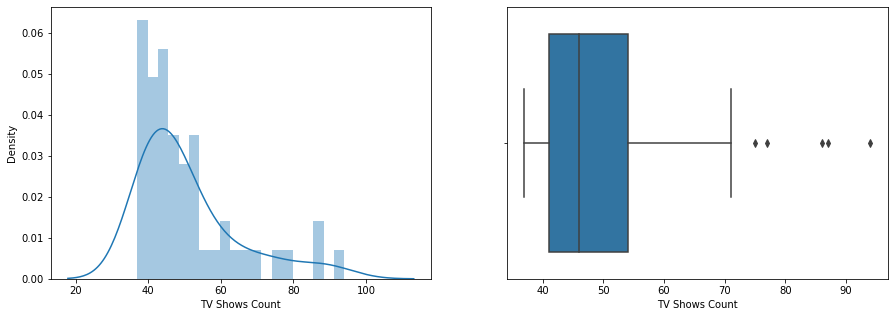

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(casts_data_tvshows['TV Shows Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(casts_data_tvshows['TV Shows Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_casts_tvshows = netflix_casts_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_casts_tvshows = hulu_casts_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_casts_tvshows = prime_video_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_casts_tvshows = casts_data_tvshows[casts_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_casts_tvshows = disney_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

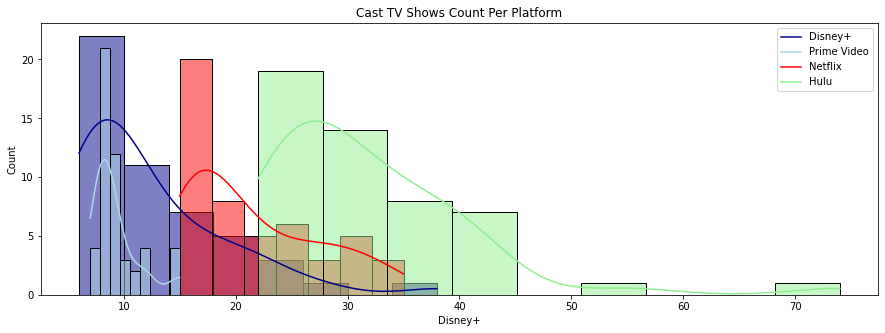

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Cast TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_casts_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_casts_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_casts_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_casts_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Cast with Highest TV Shows Count Rating Ever Got is '{df_casts_high_tvshows['Cast'][0]}' : '{df_casts_high_tvshows['TV Shows Count'].max()}'\n
      The Cast with Lowest TV Shows Count Rating Ever Got is '{df_casts_low_tvshows['Cast'][0]}' : '{df_casts_low_tvshows['TV Shows Count'].min()}'\n
      
      The Cast with Highest TV Shows Count Rating on 'Netflix' is '{netflix_casts_high_tvshows['Cast'][0]}' : '{netflix_casts_high_tvshows['Netflix'].max()}'\n
      The Cast with Lowest TV Shows Count Rating on 'Netflix' is '{netflix_casts_low_tvshows['Cast'][0]}' : '{netflix_casts_low_tvshows['Netflix'].min()}'\n
      
      The Cast with Highest TV Shows Count Rating on 'Hulu' is '{hulu_casts_high_tvshows['Cast'][0]}' : '{hulu_casts_high_tvshows['Hulu'].max()}'\n
      The Cast with Lowest TV Shows Count Rating on 'Hulu' is '{hulu_casts_low_tvshows['Cast'][0]}' : '{hulu_casts_low_tvshows['Hulu'].min()}'\n
      
      The Cast with Highest TV Shows Count Rating on 'Prime Video' is '{prime_video_casts_high_tvshows['Cast'][0]}' : '{prime_video_casts_high_tvshows['Prime Video'].max()}'\n
      The Cast with Lowest TV Shows Count Rating on 'Prime Video' is '{prime_video_casts_low_tvshows['Cast'][0]}' : '{prime_video_casts_low_tvshows['Prime Video'].min()}'\n
      
      The Cast with Highest TV Shows Count Rating on 'Disney+' is '{disney_casts_high_tvshows['Cast'][0]}' : '{disney_casts_high_tvshows['Disney+'].max()}'\n
      The Cast with Lowest TV Shows Count Rating on 'Disney+' is '{disney_casts_low_tvshows['Cast'][0]}' : '{disney_casts_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Cast with Highest TV Shows Count Rating Ever Got is 'Dee Bradley Baker' : '94'

      The Cast with Lowest TV Shows Count Rating Ever Got is 'Pamela West' : '1'

      
      The Cast with Highest TV Shows Count Rating on 'Netflix' is 'Keith Silverstein' : '35'

      The Cast with Lowest TV Shows Count Rating on 'Netflix' is 'Hiroki Totsuka' : '0'

      
      The Cast with Highest TV Shows Count Rating on 'Hulu' is 'Monica Rial' : '74'

      The Cast with Lowest TV Shows Count Rating on 'Hulu' is 'Þórunn Gunnlaugsdóttir' : '0'

      
      The Cast with Highest TV Shows Count Rating on 'Prime Video' is 'Grey Griffin' : '15'

      The Cast with Lowest TV Shows Count Rating on 'Prime Video' is 'Þórunn Gunnlaugsdóttir' : '0'

      
      The Cast with Highest TV Shows Count Rating on 'Disney+' is 'Dee Bradley Baker' : '38'

      The Cast with Lowest TV Shows Count Rating on 'Disney+' is 'Hiroki Totsuka' : '0'
 
      


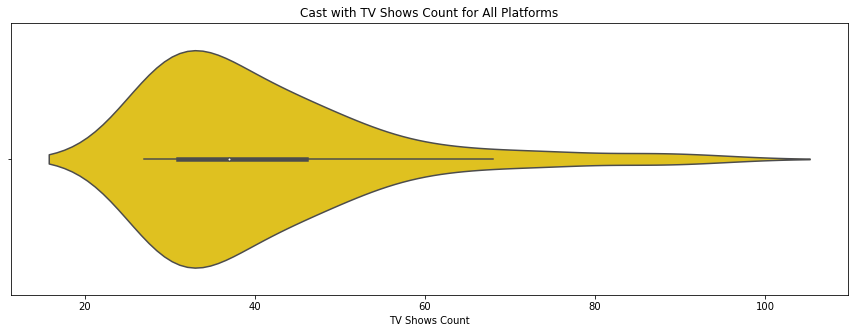

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Cast with TV Shows Count for All Platforms')
sns.violinplot(x = casts_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

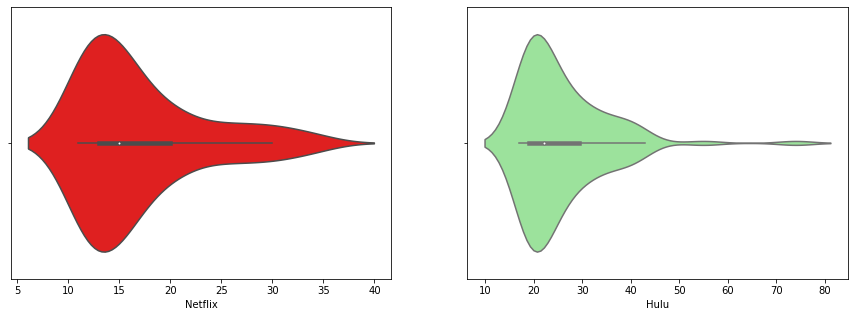

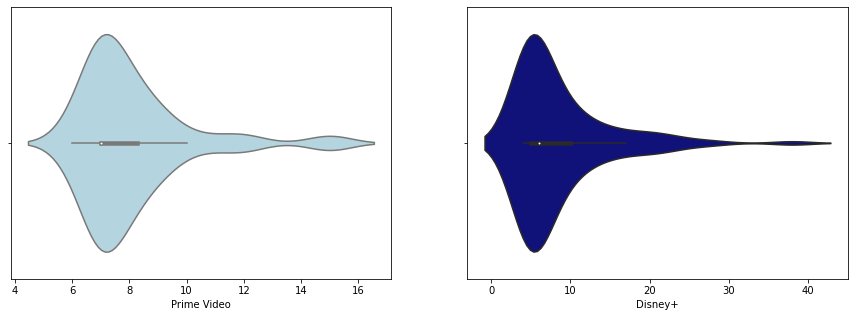

In [ ]:
# Distribution of Cast TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_casts_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_casts_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_casts_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_casts_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Cast is '{round(casts_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Netflix' is '{round(netflix_casts_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Hulu' is '{round(hulu_casts_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Prime Video' is '{round(prime_video_casts_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Disney+' is '{round(disney_casts_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Cast is '1.67'

      The Average TV Shows Count of Cast on 'Netflix' is '1.35'

      The Average TV Shows Count of Cast on 'Hulu' is '1.51'

      The Average TV Shows Count of Cast on 'Prime Video' is '1.27'

      The Average TV Shows Count of Cast on 'Disney+' is '1.35'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Cast is '{casts_data_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_tvshows['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '100452'

      Total Count of Cast on 'Netflix' is '44475'

      Total Count of Cast on 'Hulu' is '39921'

      Total Count of Cast on 'Prime Video' is '44367'

      Total Count of Cast on 'Disney+' is '4697'
 
      


In [ ]:
fig = px.bar(x = casts_data_tvshows['Cast'][:50], y = casts_data_tvshows['TV Shows Count'][:50], 
             color = casts_data_tvshows['TV Shows Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Cast', 'y' : 'Number of TV Shows'})
fig.show()

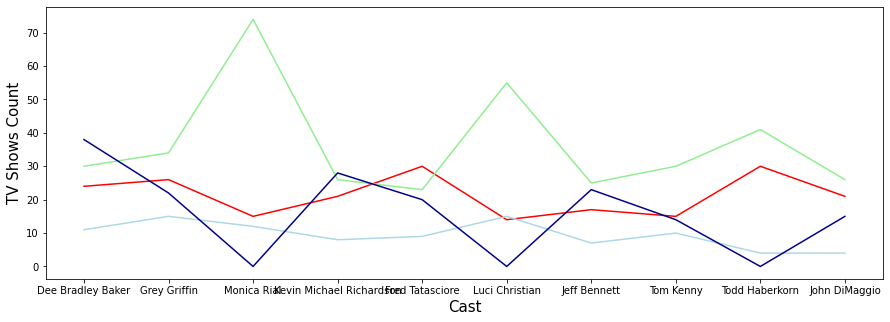

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = casts_data_tvshows['Cast'][:10], y = casts_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = casts_data_tvshows['Cast'][:10], y = casts_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = casts_data_tvshows['Cast'][:10], y = casts_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = casts_data_tvshows['Cast'][:10], y = casts_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Cast', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

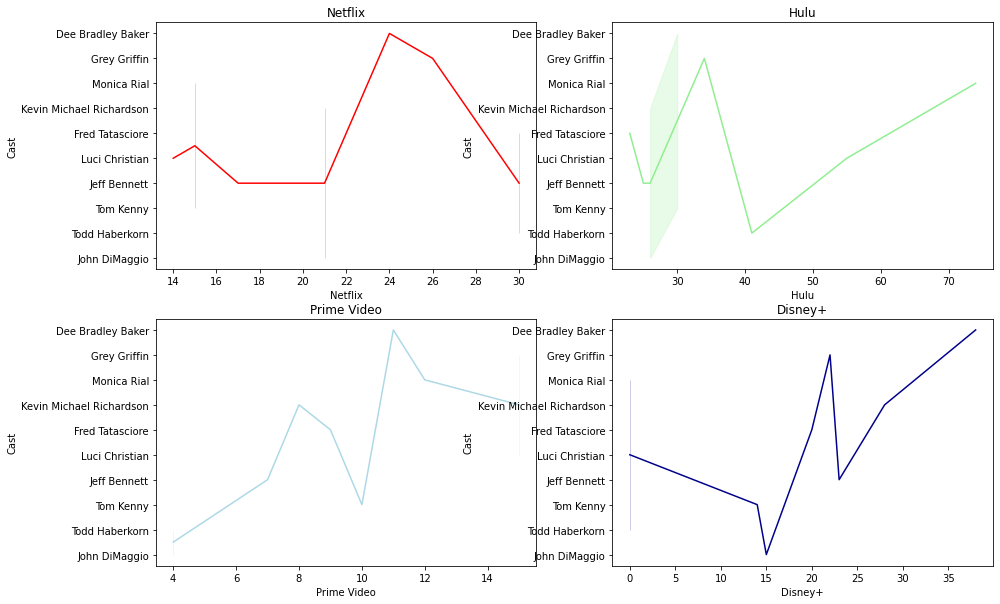

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_c_ax1 = sns.lineplot(y = casts_data_tvshows['Cast'][:10], x = casts_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = casts_data_tvshows['Cast'][:10], x = casts_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = casts_data_tvshows['Cast'][:10], x = casts_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = casts_data_tvshows['Cast'][:10], x = casts_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

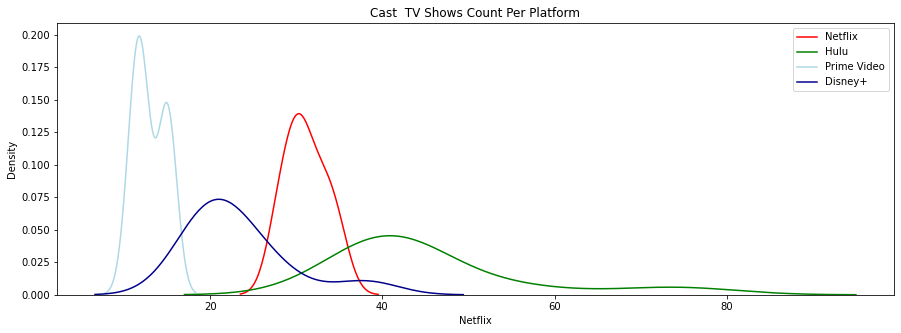

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Cast  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_casts_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_casts_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_casts_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_casts_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                                                         
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_genres = df_tvshows.copy()

In [ ]:
# Create genres dict where key=name and value = number of genres
 
genres = {}
 
for i in df_tvshows_genres['Genres'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        genres[i] = len(i.split(','))
    else:
        genres[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_genres['Number of Genres'] = df_tvshows_genres['Genres'].map(genres).astype(int)

In [ ]:
df_genres_most_tvshows = df_tvshows_genres.sort_values(by = 'Number of Genres', ascending = False).reset_index()
df_genres_most_tvshows = df_genres_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_genres['Genres'] == (df_tvshows_genres['Number of Genres'].max()))
# df_genres_most_tvshows = df_tvshows_genres[filter]
 
# mostest_rated_tvshow = df_tvshows_genres.loc[df_tvshows_genres['Number of Genres'].idxmax()]
 
print('\nTV Shows with Highest Ever Genres Count are : \n')
df_genres_most_tvshows.head(5)


TV Shows with Highest Ever Genres Count are : 



ID            Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2406  Steven Universe  2013   7  8.2             100        NA   
1  2275    Gravity Falls  2012   7  8.9             100        NA   
2  5314        Gargoyles  1994   7  8.1              NA        NA   
3  3896   Infinity Train  2019   7  8.5             100        NA   
4   843     Black Butler  2008  16  7.8              NA        NA   

                                                Cast  \
0  Zach Callison,Deedee Magno,Michaela Dietz,Este...   
1  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2  Keith David,Salli Richardson-Whitfield,Jeff Be...   
3  Ashley Johnson,Owen Dennis,Jeremy Crutchley,Ki...   
4  Michael C. Pizzuto,J. Michael Tatum,Brina Pale...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Animation,Action,Adventure,Crime,Drama,Family,...   
3  Animation,Action,Adventure,Drama,Family,Fantas...   
4  Animation,Action,Comedy,Crime,Drama,Fantasy,Ho...   

                                             Country  ... Runtime       Kind  \
0       United States,South Korea,Spain,Japan,Mexico  ...      11  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2                                      United States  ...      30  tv series   
3                                      United States  ...      11  tv series   
4                                              Japan  ...      24  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0     1            0        0     1              Hulu   
1       2       0     1            0        1     1           Disney+   
2       2       0     0            0        1     1           Disney+   
3       4       0     0            1        0     1       Prime Video   
4       2       1     1            0        0     1           Netflix   

   Number of Genres  
0                11  
1                10  
2                10  
3                10  
4                 9  

[5 rows x 22 columns]

In [ ]:
df_genres_least_tvshows = df_tvshows_genres.sort_values(by = 'Number of Genres', ascending = True).reset_index()
df_genres_least_tvshows = df_genres_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_genres['Genres'] == (df_tvshows_genres['Number of Genres'].min()))
# df_genres_least_tvshows = df_tvshows_genres[filter]
 
print('\nTV Shows with Lowest Ever Genres Count are : \n')
df_genres_least_tvshows.head(5)


TV Shows with Lowest Ever Genres Count are : 



ID                                              Title  Year Age IMDb  \
0  5432                           United States of Animals  2016  13  6.3   
1  2145                                                阳关道  2018  NR  3.1   
2  4838                  Microsoft Outlook 2016 - Training  2017  NR   NA   
3  4839  Clip: Adventures of Buttman (Annoying Orange G...  2017  NR   NA   
4  4847                                   Flannery's Porch  2016  NR   NA   

  Rotten Tomatoes Directors  \
0              NA        NA   
1              NA        NA   
2              NA        NA   
3              NA        NA   
4              NA        NA   

                                                Cast Genres        Country  \
0  Quincy Dunn-Baker,Jo Mendenhall,Dale Anderson,...     NA  United States   
1                                                 NA     NA             NA   
2                                                 NA     NA             NA   
3                                                 NA     NA  United States   
4                                                 NA     NA             NA   

   ... Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  ...      22  tv series       1       0     0            0        1     1   
1  ...      NA  tv series       1       1     0            0        0     1   
2  ...      NA  tv series       1       0     0            1        0     1   
3  ...      NA  tv series       1       0     0            1        0     1   
4  ...      NA  tv series       1       0     0            1        0     1   

   Service Provider  Number of Genres  
0           Disney+                 0  
1           Netflix                 0  
2       Prime Video                 0  
3       Prime Video                 0  
4       Prime Video                 0  

[5 rows x 22 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_genres['Genres'].unique().shape[0]}' unique Genres Counts were Given, They were Like this,\n
      
      {df_tvshows_genres.sort_values(by = 'Number of Genres', ascending = False)['Genres'].unique()[:5]} etc.\n
 
      The Highest Ever Genres Count Ever Any TV Show Got is '{df_genres_most_tvshows['Title'][0]}' : '{df_genres_most_tvshows['Number of Genres'].max()}'\n
 
      The Lowest Ever Genres Count Ever Any TV Show Got is '{df_genres_least_tvshows['Title'][0]}' : '{df_genres_least_tvshows['Number of Genres'].min()}'\n
      ''')


      Total '1033' unique Genres Counts were Given, They were Like this,

      
      ['Animation,Action,Adventure,Comedy,Drama,Family,Fantasy,Musical,Mystery,Sci-Fi,Thriller'
 'Animation,Adventure,Comedy,Drama,Family,Fantasy,Horror,Mystery,Sci-Fi,Thriller'
 'Animation,Action,Adventure,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller'
 'Animation,Action,Adventure,Drama,Family,Fantasy,Mystery,Romance,Sci-Fi,Thriller'
 'Animation,Action,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Thriller'] etc.

 
      The Highest Ever Genres Count Ever Any TV Show Got is 'Steven Universe' : '11'

 
      The Lowest Ever Genres Count Ever Any TV Show Got is 'United States of Animals' : '0'

      


In [ ]:
netflix_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Netflix']==1].reset_index()
netflix_genres_most_tvshows = netflix_genres_most_tvshows.drop(['index'], axis = 1)
 
netflix_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Netflix']==1].reset_index()
netflix_genres_least_tvshows = netflix_genres_least_tvshows.drop(['index'], axis = 1)
 
netflix_genres_most_tvshows.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0   843                      Black Butler  2008  16  7.8              NA   
1  2096        Spy Kids: Mission Critical  2018   7  4.7              NA   
2   833  Scooby-Doo! Mystery Incorporated  2010   7    8              NA   
3   723                       Case Closed  1996   7  8.4              NA   
4   810                          Daybreak  2019  18  6.7              70   

  Directors                                               Cast  \
0        NA  Michael C. Pizzuto,J. Michael Tatum,Brina Pale...   
1        NA  Nicholas Coombe,Ashley Bornancin,Carter Hastin...   
2        NA  Frank Welker,Mindy Cohn,Grey Griffin,Matthew L...   
3        NA  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
4        NA  Colin Ford,Alyvia Alyn Lind,Sophie Simnett,Aus...   

                                              Genres  \
0  Animation,Action,Comedy,Crime,Drama,Fantasy,Ho...   
1  Animation,Action,Adventure,Comedy,Drama,Family...   
2  Animation,Adventure,Comedy,Crime,Drama,Family,...   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4  Action,Adventure,Comedy,Drama,Fantasy,Horror,M...   

                                   Country  ... Runtime       Kind Seasons  \
0                                    Japan  ...      24  tv series       2   
1                     United States,Canada  ...      NA  tv series       3   
2                            United States  ...      23  tv series       2   
3  Japan,Italy,United Kingdom,Mexico,Spain  ...      25  tv series      53   
4                            United States  ...      60  tv series       1   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1     1            0        0     1           Netflix   
1       1     0            0        0     1           Netflix   
2       1     0            0        0     1           Netflix   
3       1     1            0        0     1           Netflix   
4       1     0            0        0     1           Netflix   

   Number of Genres  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  

[5 rows x 22 columns]

In [ ]:
hulu_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Hulu']==1].reset_index()
hulu_genres_most_tvshows = hulu_genres_most_tvshows.drop(['index'], axis = 1)
 
hulu_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Hulu']==1].reset_index()
hulu_genres_least_tvshows = hulu_genres_least_tvshows.drop(['index'], axis = 1)
 
hulu_genres_most_tvshows.head(5)

ID             Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2406   Steven Universe  2013   7  8.2             100        NA   
1  2275     Gravity Falls  2012   7  8.9             100        NA   
2   843      Black Butler  2008  16  7.8              NA        NA   
3   723       Case Closed  1996   7  8.4              NA        NA   
4   788  Sword Art Online  2012  18  7.6              NA        NA   

                                                Cast  \
0  Zach Callison,Deedee Magno,Michaela Dietz,Este...   
1  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2  Michael C. Pizzuto,J. Michael Tatum,Brina Pale...   
3  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
4  Yoshitsugu Matsuoka,Haruka Tomatsu,Bryce Papen...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Animation,Action,Comedy,Crime,Drama,Fantasy,Ho...   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4  Animation,Action,Adventure,Comedy,Drama,Fantas...   

                                             Country  ... Runtime       Kind  \
0       United States,South Korea,Spain,Japan,Mexico  ...      11  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2                                              Japan  ...      24  tv series   
3            Japan,Italy,United Kingdom,Mexico,Spain  ...      25  tv series   
4                                              Japan  ...      24  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0     1            0        0     1              Hulu   
1       2       0     1            0        1     1           Disney+   
2       2       1     1            0        0     1           Netflix   
3      53       1     1            0        0     1           Netflix   
4       4       1     1            0        0     1           Netflix   

   Number of Genres  
0                11  
1                10  
2                 9  
3                 9  
4                 9  

[5 rows x 22 columns]

In [ ]:
prime_video_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Prime Video']==1].reset_index()
prime_video_genres_most_tvshows = prime_video_genres_most_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Prime Video']==1].reset_index()
prime_video_genres_least_tvshows = prime_video_genres_least_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_most_tvshows.head(5)

ID                    Title  Year Age IMDb Rotten Tomatoes Directors  \
0  3896           Infinity Train  2019   7  8.5             100        NA   
1  4027  Bakugan Battle Brawlers  2007   7  5.5              NA        NA   
2  3806           Eerie, Indiana  1991   7  8.2             100        NA   
3  4290               GetBackers  2002   7  7.4              NA        NA   
4  5081            The Fish Guyz  2017  NR  7.3              NA        NA   

                                                Cast  \
0  Ashley Johnson,Owen Dennis,Jeremy Crutchley,Ki...   
1  Jason Deline,Julie Lemieux,Carter Hayden,Shawn...   
2  Omri Katz,Justin Shenkarow,Mary-Margaret Humes...   
3  Darren Pleavin,Shanon Weaver,Jason Liebrecht,O...   
4  Rob Paulsen,Jeff Bennett,Cam Clarke,Jim Cummin...   

                                              Genres  \
0  Animation,Action,Adventure,Drama,Family,Fantas...   
1  Animation,Action,Adventure,Comedy,Drama,Family...   
2  Adventure,Comedy,Drama,Family,Fantasy,Horror,M...   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4  Animation,Action,Adventure,Comedy,Crime,Fantas...   

                                             Country  ... Runtime       Kind  \
0                                      United States  ...      11  tv series   
1                           Canada,South Korea,Japan  ...      22  tv series   
2                                      United States  ...      30  tv series   
3  Japan,Italy,United Kingdom,Mexico,United State...  ...      24  tv series   
4                                                 NA  ...      NA  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       4       0     0            1        0     1       Prime Video   
1       2       0     0            1        0     1       Prime Video   
2       1       0     0            1        0     1       Prime Video   
3       1       0     0            1        0     1       Prime Video   
4       1       0     0            1        0     1       Prime Video   

   Number of Genres  
0                10  
1                 9  
2                 9  
3                 9  
4                 8  

[5 rows x 22 columns]

In [ ]:
disney_genres_most_tvshows = df_genres_most_tvshows.loc[df_genres_most_tvshows['Disney+']==1].reset_index()
disney_genres_most_tvshows = disney_genres_most_tvshows.drop(['index'], axis = 1)
 
disney_genres_least_tvshows = df_genres_least_tvshows.loc[df_genres_least_tvshows['Disney+']==1].reset_index()
disney_genres_least_tvshows = disney_genres_least_tvshows.drop(['index'], axis = 1)
 
disney_genres_most_tvshows.head(5)

ID                        Title  Year Age IMDb Rotten Tomatoes  \
0  2275                Gravity Falls  2012   7  8.9             100   
1  5314                    Gargoyles  1994   7  8.1              NA   
2  2490  Star vs. the Forces of Evil  2015   7    8              NA   
3  5301                    DuckTales  2017   0  8.3             100   
4   484                   Invincible  2006   7  8.8              72   

        Directors                                               Cast  \
0              NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
1              NA  Keith David,Salli Richardson-Whitfield,Jeff Be...   
2              NA  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
3              NA  David Tennant,Ben Schwartz,Danny Pudi,Bobby Mo...   
4  Angelina Jolie  Steven Yeun,Sandra Oh,J.K. Simmons,Zazie Beetz...   

                                              Genres  \
0  Animation,Adventure,Comedy,Drama,Family,Fantas...   
1  Animation,Action,Adventure,Crime,Drama,Family,...   
2  Animation,Action,Adventure,Comedy,Drama,Family...   
3  Animation,Action,Adventure,Comedy,Family,Fanta...   
4  Animation,Action,Adventure,Drama,Fantasy,Horro...   

                                             Country  ... Runtime       Kind  \
0  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
1                                      United States  ...      30  tv series   
2    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
3                                      United States  ...      21  tv series   
4                                      United States  ...     137  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       2       0     1            0        1     1           Disney+   
1       2       0     0            0        1     1           Disney+   
2       4       0     1            0        1     1           Disney+   
3       3       0     0            0        1     1           Disney+   
4       1       0     0            0        1     1           Disney+   

   Number of Genres  
0                10  
1                10  
2                 9  
3                 8  
4                 8  

[5 rows x 22 columns]

In [ ]:
print(f'''
      The TV Show with Highest Genres Count Ever Got is '{df_genres_most_tvshows['Title'][0]}' : '{df_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count Ever Got is '{df_genres_least_tvshows['Title'][0]}' : '{df_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Netflix' is '{netflix_genres_most_tvshows['Title'][0]}' : '{netflix_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Netflix' is '{netflix_genres_least_tvshows['Title'][0]}' : '{netflix_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Hulu' is '{hulu_genres_most_tvshows['Title'][0]}' : '{hulu_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Hulu' is '{hulu_genres_least_tvshows['Title'][0]}' : '{hulu_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Prime Video' is '{prime_video_genres_most_tvshows['Title'][0]}' : '{prime_video_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Prime Video' is '{prime_video_genres_least_tvshows['Title'][0]}' : '{prime_video_genres_least_tvshows['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Disney+' is '{disney_genres_most_tvshows['Title'][0]}' : '{disney_genres_most_tvshows['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Disney+' is '{disney_genres_least_tvshows['Title'][0]}' : '{disney_genres_least_tvshows['Number of Genres'].min()}'\n 
      ''')


      The TV Show with Highest Genres Count Ever Got is 'Steven Universe' : '11'

      The TV Show with Lowest Genres Count Ever Got is 'United States of Animals' : '0'

      
      The TV Show with Highest Genres Count on 'Netflix' is 'Black Butler' : '9'

      The TV Show with Lowest Genres Count on 'Netflix' is '阳关道' : '0'

      
      The TV Show with Highest Genres Count on 'Hulu' is 'Steven Universe' : '11'

      The TV Show with Lowest Genres Count on 'Hulu' is 'Because of an Earlier Incident' : '0'

      
      The TV Show with Highest Genres Count on 'Prime Video' is 'Infinity Train' : '10'

      The TV Show with Lowest Genres Count on 'Prime Video' is 'Microsoft Outlook 2016 - Training' : '0'

      
      The TV Show with Highest Genres Count on 'Disney+' is 'Gravity Falls' : '10'

      The TV Show with Lowest Genres Count on 'Disney+' is 'United States of Animals' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Genres Count is '{round(df_tvshows_genres['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Netflix' is '{round(netflix_genres_most_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Hulu' is '{round(hulu_genres_most_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Prime Video' is '{round(prime_video_genres_most_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Disney+' is '{round(disney_genres_most_tvshows['Number of Genres'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Genres Count is '2.37'

      The Average Genres Count on 'Netflix' is '2.57'

      The Average Genres Count on 'Hulu' is '2.63'

      The Average Genres Count on 'Prime Video' is '2.03'

      The Average Genres Count on 'Disney+' is '3.68'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Genres is '{df_tvshows_genres['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Netflix' is '{netflix_genres_most_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Hulu' is '{hulu_genres_most_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Prime Video' is '{prime_video_genres_most_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Disney+' is '{disney_genres_most_tvshows['Genres'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genres is '1033'

      Total Count of Genres on 'Netflix' is '536'

      Total Count of Genres on 'Hulu' is '498'

      Total Count of Genres on 'Prime Video' is '514'

      Total Count of Genres on 'Disney+' is '109'
 
      


In [ ]:
df_tvshows_genres.drop(df_tvshows_genres.loc[df_tvshows_genres['Genres'] == "NA"].index, inplace = True)
# df_tvshows_genres = df_tvshows_genres[df_tvshows_genres.Genres != "NA"]

In [ ]:
df_gen = df_tvshows_genres['Genres'].str.split(',').apply(pd.Series).stack()
del df_tvshows_genres['Genres']
df_gen.index = df_gen.index.droplevel(-1)
df_gen.name = 'Genres'
df_tvshows_genres = df_tvshows_genres.join(df_gen)
df_tvshows_genres.drop_duplicates(inplace = True)

In [ ]:
df_tvshows_genres.head(5)

ID         Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
0   1   Snowpiercer  2013  18  6.9              94        NA   
1   2  Philadelphia  1993  13  8.8              80        NA   

                                                Cast        Country Language  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...  United States  English   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...  United States  English   

   ...       Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  ...  tv series       3       1     0            0        0     1   
0  ...  tv series       3       1     0            0        0     1   
0  ...  tv series       3       1     0            0        0     1   
0  ...  tv series       3       1     0            0        0     1   
1  ...  tv series      18       1     0            0        0     1   

   Service Provider  Number of Genres    Genres  
0           Netflix                 4    Action  
0           Netflix                 4     Drama  
0           Netflix                 4    Sci-Fi  
0           Netflix                 4  Thriller  
1           Netflix                 1    Comedy  

[5 rows x 22 columns]

In [ ]:
genres_count = df_tvshows_genres.groupby('Genres')['Title'].count()
genres_tvshow = df_tvshows_genres.groupby('Genres')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
genres_data_tvshows = pd.concat([genres_count, genres_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
genres_data_tvshows = genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
genres_data_tvshows.head(5)

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
7        Drama            1852      754   552          650       41
4       Comedy            1571      569   600          461       90
2    Animation             985      341   372          312       75
6  Documentary             834      306   138          412       29
8       Family             729      238   195          263      110

In [ ]:
# Genres with TV Shows Counts - All Platforms Combined
genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
7         Drama            1852      754   552          650       41
4        Comedy            1571      569   600          461       90
2     Animation             985      341   372          312       75
6   Documentary             834      306   138          412       29
8        Family             729      238   195          263      110
0        Action             725      277   264          220       51
5         Crime             673      294   194          231        6
1     Adventure             670      246   217          215       78
9       Fantasy             631      241   246          188       42
23     Thriller             578      238   177          198        9

In [ ]:
df_genres_high_tvshows = genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_genres_high_tvshows = df_genres_high_tvshows.drop(['index'], axis = 1)
# filter = (genres_data_tvshows['TV Shows Count'] = =  (genres_data_tvshows['TV Shows Count'].max()))
# df_genres_high_tvshows = genres_data_tvshows[filter]
 
# highest_rated_tvshow = genres_data_tvshows.loc[genres_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nGenres with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_genres_high_tvshows.head(5)


Genres with Highest Ever TV Shows Count are : All Platforms Combined



Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2    Animation             985      341   372          312       75
3  Documentary             834      306   138          412       29
4       Family             729      238   195          263      110

In [ ]:
df_genres_low_tvshows = genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_genres_low_tvshows = df_genres_low_tvshows.drop(['index'], axis = 1)
# filter = (genres_data_tvshows['TV Shows Count'] = =  (genres_data_tvshows['TV Shows Count'].min()))
# df_genres_low_tvshows = genres_data_tvshows[filter]
 
print('\nGenres with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_genres_low_tvshows.head(5)


Genres with Lowest Ever TV Shows Count are : All Platforms Combined



Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Western              47        9    11           31        1
1       News              53       10    28           18        0
2    Musical              75       31    14           19       18
3        War              94       38    17           42        0
4  Talk-Show             107       28    48           34        2

In [ ]:
print(f'''
      Total '{df_tvshows['Genres'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{genres_data_tvshows['Genres'].unique().shape[0]}' Genres, They were Like this, \n
 
      {genres_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Genres'].head(5).unique()} etc. \n
 
      The Genres with Highest TV Shows Count have '{genres_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_genres_high_tvshows['Genres'][0]}', &\n
      The Genres with Lowest TV Shows Count have '{genres_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_genres_low_tvshows['Genres'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '26' Genres, They were Like this, 

 
      ['Drama' 'Comedy' 'Animation' 'Documentary' 'Family'] etc. 

 
      The Genres with Highest TV Shows Count have '1852' TV Shows Available is 'Drama', &

      The Genres with Lowest TV Shows Count have '47' TV Shows Available is 'Western'
      


In [ ]:
fig = px.pie(genres_data_tvshows[:10], names = 'Genres', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_genres_tvshows = netflix_genres_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_genres_high_tvshows = df_genres_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genres_high_tvshows = netflix_genres_high_tvshows.drop(['index'], axis = 1)
 
netflix_genres_low_tvshows = df_genres_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_genres_low_tvshows = netflix_genres_low_tvshows.drop(['index'], axis = 1)
 
netflix_genres_high_tvshows.head(5)

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2    Animation             985      341   372          312       75
3  Documentary             834      306   138          412       29
4        Crime             673      294   194          231        6

In [ ]:
# hulu_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_genres_tvshows = hulu_genres_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_genres_high_tvshows = df_genres_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genres_high_tvshows = hulu_genres_high_tvshows.drop(['index'], axis = 1)
 
hulu_genres_low_tvshows = df_genres_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_genres_low_tvshows = hulu_genres_low_tvshows.drop(['index'], axis = 1)
 
hulu_genres_high_tvshows.head(5)

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0      Comedy            1571      569   600          461       90
1       Drama            1852      754   552          650       41
2   Animation             985      341   372          312       75
3      Action             725      277   264          220       51
4  Reality-TV             571      167   247          186       22

In [ ]:
# prime_video_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_genres_tvshows = prime_video_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_genres_high_tvshows = df_genres_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genres_high_tvshows = prime_video_genres_high_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_low_tvshows = df_genres_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_genres_low_tvshows = prime_video_genres_low_tvshows.drop(['index'], axis = 1)
 
prime_video_genres_high_tvshows.head(5)

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        Drama            1852      754   552          650       41
1       Comedy            1571      569   600          461       90
2  Documentary             834      306   138          412       29
3    Animation             985      341   372          312       75
4       Family             729      238   195          263      110

In [ ]:
# disney_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_genres_tvshows = disney_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_genres_high_tvshows = df_genres_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genres_high_tvshows = disney_genres_high_tvshows.drop(['index'], axis = 1)
 
disney_genres_low_tvshows = df_genres_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_genres_low_tvshows = disney_genres_low_tvshows.drop(['index'], axis = 1)
 
disney_genres_high_tvshows.head(5)

Genres  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0     Family             729      238   195          263      110
1     Comedy            1571      569   600          461       90
2  Adventure             670      246   217          215       78
3  Animation             985      341   372          312       75
4     Action             725      277   264          220       51

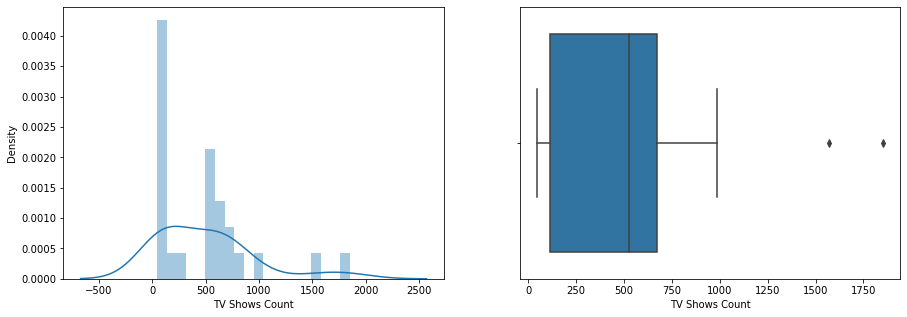

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(genres_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(genres_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genres_tvshows = netflix_genres_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genres_tvshows = hulu_genres_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genres_tvshows = prime_video_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_genres_tvshows = genres_data_tvshows[genres_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genres_tvshows = disney_genres_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

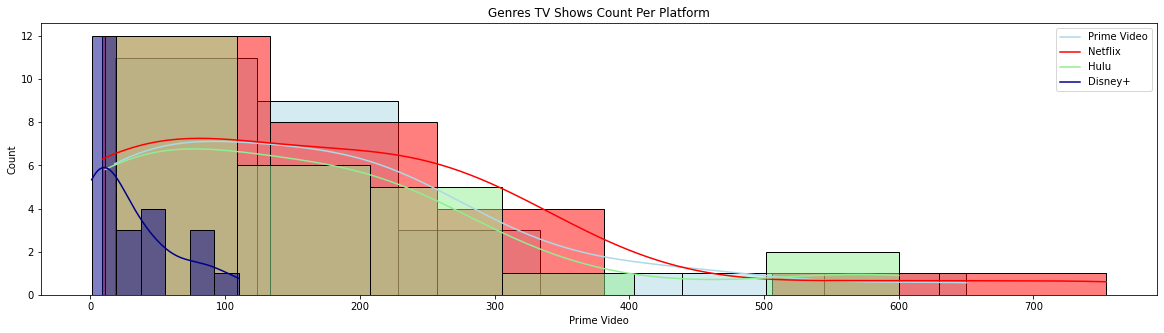

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genres TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_genres_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genres_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genres_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_genres_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The Genres with Highest TV Shows Count Rating Ever Got is '{df_genres_high_tvshows['Genres'][0]}' : '{df_genres_high_tvshows['TV Shows Count'].max()}'\n
      The Genres with Lowest TV Shows Count Rating Ever Got is '{df_genres_low_tvshows['Genres'][0]}' : '{df_genres_low_tvshows['TV Shows Count'].min()}'\n
      
      The Genres with Highest TV Shows Count Rating on 'Netflix' is '{netflix_genres_high_tvshows['Genres'][0]}' : '{netflix_genres_high_tvshows['Netflix'].max()}'\n
      The Genres with Lowest TV Shows Count Rating on 'Netflix' is '{netflix_genres_low_tvshows['Genres'][0]}' : '{netflix_genres_low_tvshows['Netflix'].min()}'\n
      
      The Genres with Highest TV Shows Count Rating on 'Hulu' is '{hulu_genres_high_tvshows['Genres'][0]}' : '{hulu_genres_high_tvshows['Hulu'].max()}'\n
      The Genres with Lowest TV Shows Count Rating on 'Hulu' is '{hulu_genres_low_tvshows['Genres'][0]}' : '{hulu_genres_low_tvshows['Hulu'].min()}'\n
      
      The Genres with Highest TV Shows Count Rating on 'Prime Video' is '{prime_video_genres_high_tvshows['Genres'][0]}' : '{prime_video_genres_high_tvshows['Prime Video'].max()}'\n
      The Genres with Lowest TV Shows Count Rating on 'Prime Video' is '{prime_video_genres_low_tvshows['Genres'][0]}' : '{prime_video_genres_low_tvshows['Prime Video'].min()}'\n
      
      The Genres with Highest TV Shows Count Rating on 'Disney+' is '{disney_genres_high_tvshows['Genres'][0]}' : '{disney_genres_high_tvshows['Disney+'].max()}'\n
      The Genres with Lowest TV Shows Count Rating on 'Disney+' is '{disney_genres_low_tvshows['Genres'][0]}' : '{disney_genres_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Genres with Highest TV Shows Count Rating Ever Got is 'Drama' : '1852'

      The Genres with Lowest TV Shows Count Rating Ever Got is 'Western' : '47'

      
      The Genres with Highest TV Shows Count Rating on 'Netflix' is 'Drama' : '754'

      The Genres with Lowest TV Shows Count Rating on 'Netflix' is 'Western' : '9'

      
      The Genres with Highest TV Shows Count Rating on 'Hulu' is 'Comedy' : '600'

      The Genres with Lowest TV Shows Count Rating on 'Hulu' is 'Western' : '11'

      
      The Genres with Highest TV Shows Count Rating on 'Prime Video' is 'Drama' : '650'

      The Genres with Lowest TV Shows Count Rating on 'Prime Video' is 'News' : '18'

      
      The Genres with Highest TV Shows Count Rating on 'Disney+' is 'Family' : '110'

      The Genres with Lowest TV Shows Count Rating on 'Disney+' is 'War' : '0'
 
      


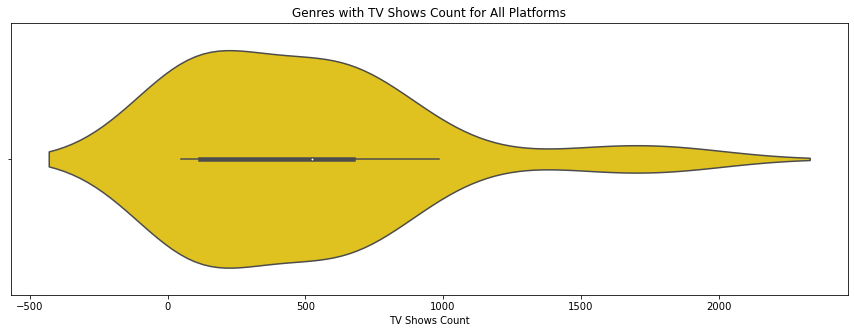

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Genres with TV Shows Count for All Platforms')
sns.violinplot(x = genres_data_tvshows['TV Shows Count'], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

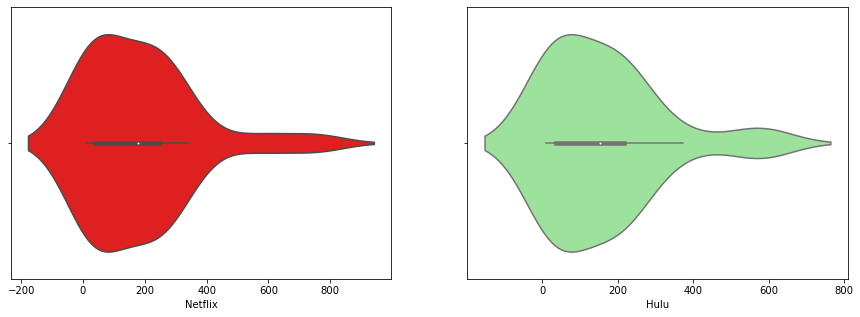

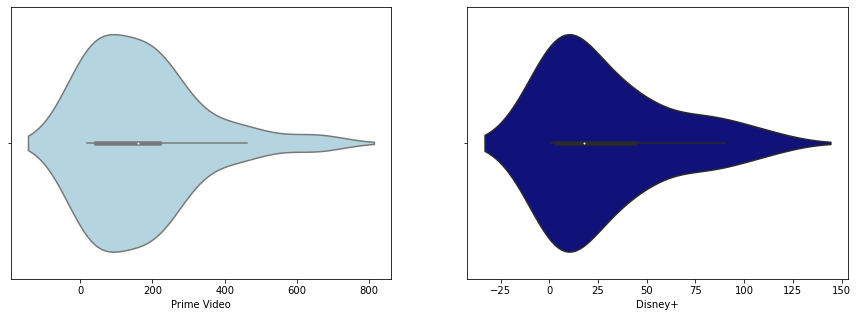

In [ ]:
# Distribution of Genres TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_genres_tvshows['Netflix'], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_genres_tvshows['Hulu'], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_genres_tvshows['Prime Video'], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_genres_tvshows['Disney+'], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Genres is '{round(genres_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genres on 'Netflix' is '{round(netflix_genres_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genres on 'Hulu' is '{round(hulu_genres_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genres on 'Prime Video' is '{round(prime_video_genres_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Genres on 'Disney+' is '{round(disney_genres_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Genres is '495.88'

      The Average TV Shows Count of Genres on 'Netflix' is '182.96'

      The Average TV Shows Count of Genres on 'Hulu' is '161.42'

      The Average TV Shows Count of Genres on 'Prime Video' is '170.92'

      The Average TV Shows Count of Genres on 'Disney+' is '29.3'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Genres is '{genres_data_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Netflix' is '{netflix_genres_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Hulu' is '{hulu_genres_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Prime Video' is '{prime_video_genres_tvshows['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Disney+' is '{disney_genres_tvshows['Genres'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genres is '26'

      Total Count of Genres on 'Netflix' is '26'

      Total Count of Genres on 'Hulu' is '26'

      Total Count of Genres on 'Prime Video' is '26'

      Total Count of Genres on 'Disney+' is '23'
 
      


In [ ]:
fig = px.bar(x = genres_data_tvshows['Genres'], y = genres_data_tvshows['TV Shows Count'], 
             color = genres_data_tvshows['TV Shows Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Genres', 'y' : 'Number of TV Shows'})
fig.show()

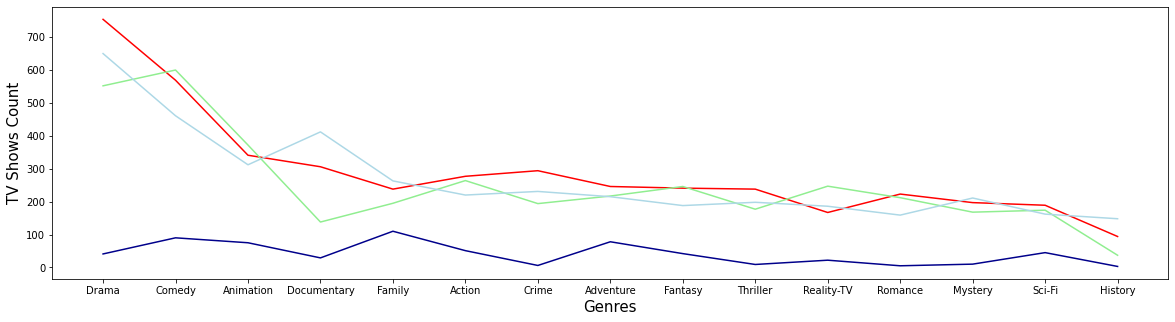

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = genres_data_tvshows['Genres'][:15], y = genres_data_tvshows['Netflix'][:15], color = 'red')
sns.lineplot(x = genres_data_tvshows['Genres'][:15], y = genres_data_tvshows['Hulu'][:15], color = 'lightgreen')
sns.lineplot(x = genres_data_tvshows['Genres'][:15], y = genres_data_tvshows['Prime Video'][:15], color = 'lightblue')
sns.lineplot(x = genres_data_tvshows['Genres'][:15], y = genres_data_tvshows['Disney+'][:15], color = 'darkblue')
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

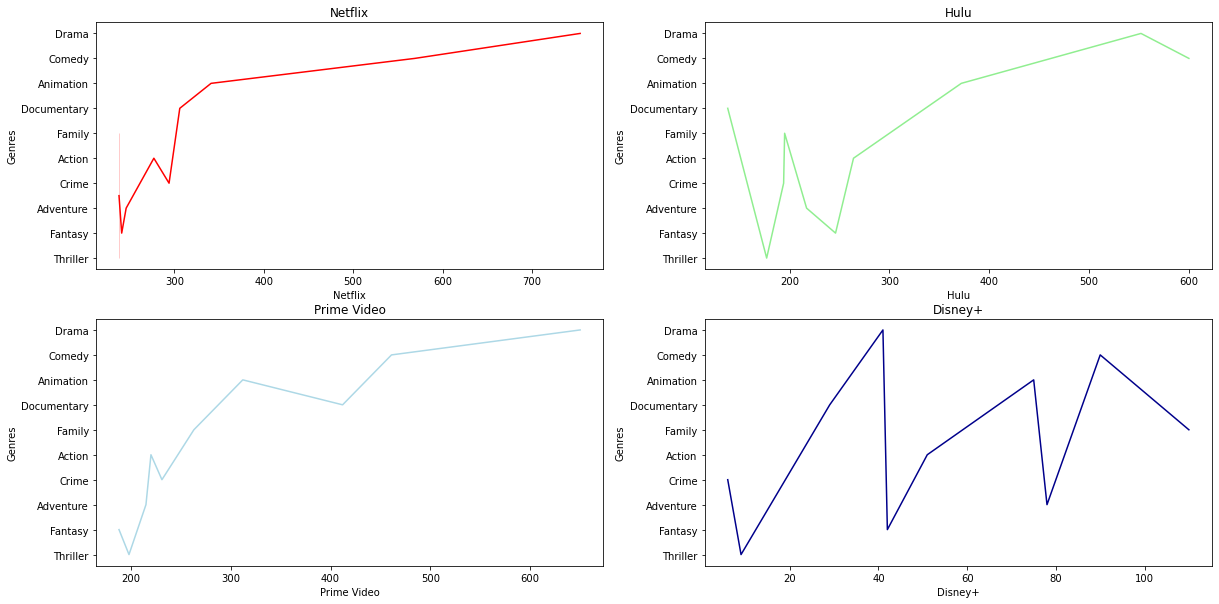

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_c_ax1 = sns.lineplot(y = genres_data_tvshows['Genres'][:10], x = genres_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = genres_data_tvshows['Genres'][:10], x = genres_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = genres_data_tvshows['Genres'][:10], x = genres_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = genres_data_tvshows['Genres'][:10], x = genres_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

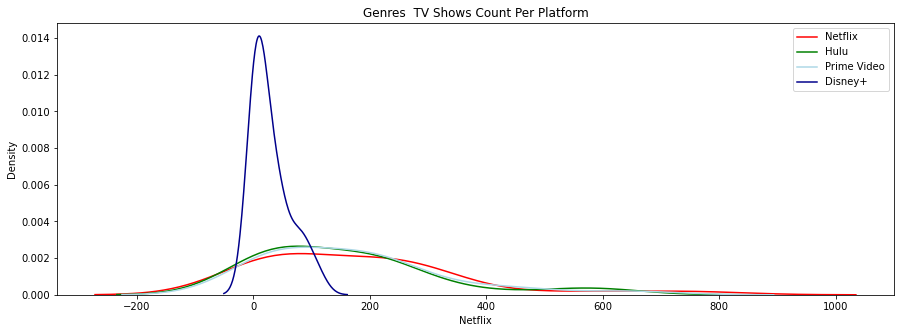

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Genres  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_genres_tvshows['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_genres_tvshows['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_genres_tvshows['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_genres_tvshows['Disney+'], color = 'darkblue', legend = True)                                      
                                      
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

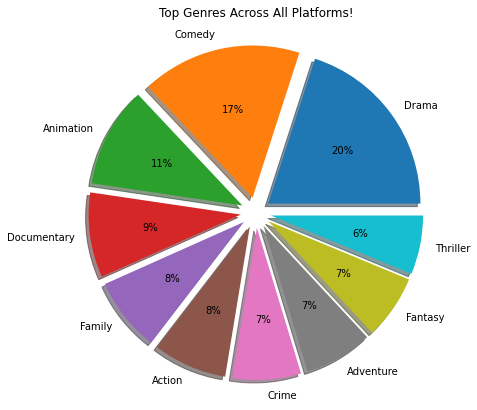

In [ ]:
plt.figure(figsize = (7, 7))
plt.pie(genres_data_tvshows['TV Shows Count'][:10], labels = genres_data_tvshows.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.0f%%', labeldistance = 1.1, shadow = True)
plt.title('Top Genres Across All Platforms!')
plt.show()

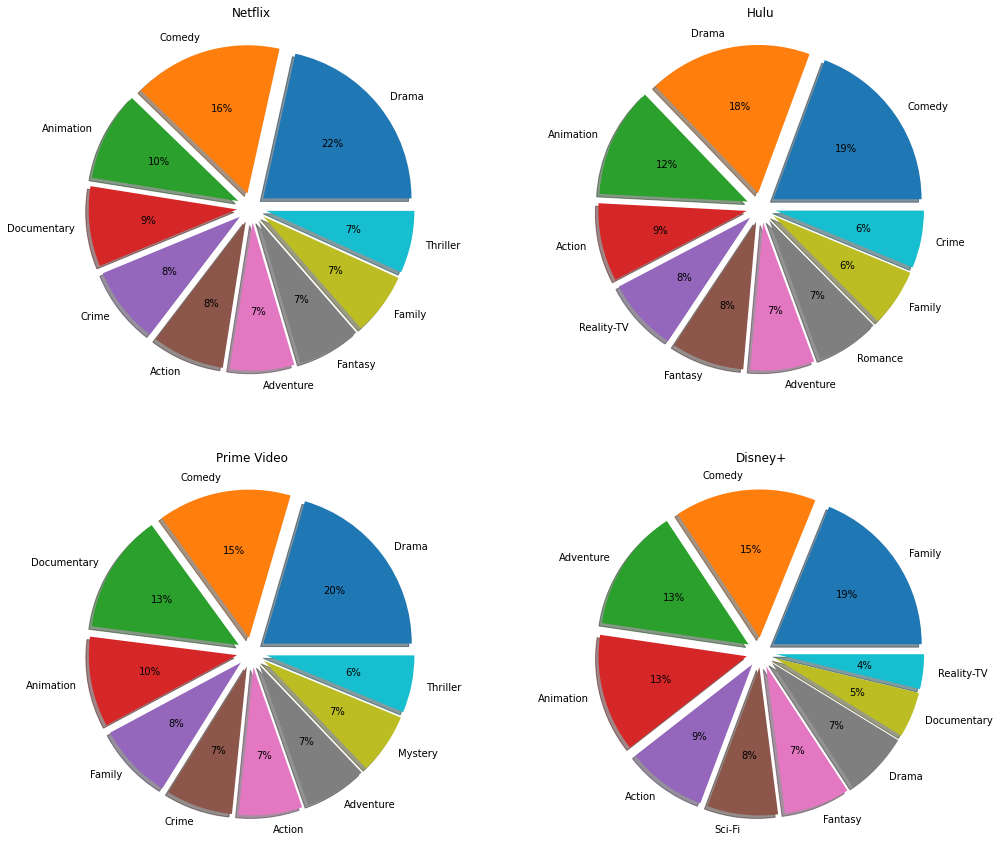

In [ ]:
fig = plt.figure(figsize = (35, 15))
 
ax = plt.subplot2grid((2, 4), (0, 0))
 
plt.pie(netflix_genres_tvshows['Netflix'][:10], labels = netflix_genres_tvshows.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Netflix')
 
ax = plt.subplot2grid((2, 4), (0, 1))
 
plt.pie(hulu_genres_tvshows['Hulu'][:10], labels = hulu_genres_tvshows.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Hulu')
 
ax = plt.subplot2grid((2, 4), (1, 0))
 
plt.pie(prime_video_genres_tvshows['Prime Video'][:10], labels = prime_video_genres_tvshows.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Prime Video')
 
ax = plt.subplot2grid((2, 4), (1, 1))
 
plt.pie(disney_genres_tvshows['Disney+'][:10], labels = disney_genres_tvshows.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Disney+')
 
plt.show()

In [ ]:
fig = go.Figure(go.Funnel(y = genres_data_tvshows['Genres'][:10],x = genres_data_tvshows['TV Shows Count'][:10]))
fig.show()

In [ ]:
df_tvshows_countries = df_tvshows.copy()

In [ ]:
# Create countries dict where key=name and value = number of countries
 
countries = {}
 
for i in df_tvshows_countries['Country'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        countries[i] = len(i.split(','))
    else:
        countries[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_countries['Number of Country'] = df_tvshows_countries['Country'].map(countries).astype(int)

In [ ]:
df_countries_most_tvshows = df_tvshows_countries.sort_values(by = 'Number of Country', ascending = False).reset_index()
df_countries_most_tvshows = df_countries_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_countries['Country'] == (df_tvshows_countries['Number of Country'].max()))
# df_countries_most_tvshows = df_tvshows_countries[filter]
 
# mostest_rated_tvshow = df_tvshows_countries.loc[df_tvshows_countries['Number of Country'].idxmax()]
 
print('\nTV Shows with Highest Ever Country Count are : \n')
df_countries_most_tvshows.head(5)


TV Shows with Highest Ever Country Count are : 



ID                     Title  Year Age IMDb Rotten Tomatoes Directors  \
0  5371                   Bonkers  1993   7  6.8              NA        NA   
1  3833                   Trapped  2015  16  8.1              NA        NA   
2  3980  Titanic: Blood and Steel  2012  16  7.3              NA        NA   
3   345                  Scarlett  2016  13  6.5              NA        NA   
4  1401  Oggy and the Cockroaches  1998   7  7.3              NA        NA   

                                                Cast  \
0  Jim Cummings,Earl Boen,Frank Welker,Jeff Benne...   
1  Ólafur Darri Ólafsson,Ilmur Kristjánsdóttir,In...   
2  Kevin Zegers,Alessandra Mastronardi,Derek Jaco...   
3  Joanne Whalley,Timothy Dalton,Annabeth Gish,Ju...   
4                        Hugues Le Bars,Michel Elias   

                                           Genres  \
0  Animation,Action,Adventure,Comedy,Crime,Family   
1                    Crime,Drama,Mystery,Thriller   
2                                   Drama,History   
3                                   Drama,Romance   
4                  Animation,Action,Comedy,Family   

                                             Country  ... Runtime       Kind  \
0  United States,Hong Kong,South Korea,France,Can...  ...      30  tv series   
1  Iceland,Denmark,Finland,Sweden,Norway,Germany,...  ...      60  tv series   
2  Ireland,Italy,France,Canada,United Kingdom,Spa...  ...      55  tv series   
3  France,United States,Germany,Italy,United King...  ...     360  tv series   
4  France,Canada,Philippines,Vietnam,South Korea,...  ...       8  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1       0     0            0        1     1           Disney+   
1       3       0     0            1        0     1       Prime Video   
2       1       0     0            1        0     1       Prime Video   
3       1       0     0            1        0     1       Prime Video   
4       7       1     0            0        0     1           Netflix   

   Number of Country  
0                 11  
1                  8  
2                  7  
3                  7  
4                  7  

[5 rows x 22 columns]

In [ ]:
df_countries_least_tvshows = df_tvshows_countries.sort_values(by = 'Number of Country', ascending = True).reset_index()
df_countries_least_tvshows = df_countries_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_countries['Country'] == (df_tvshows_countries['Number of Country'].min()))
# df_countries_least_tvshows = df_tvshows_countries[filter]
 
print('\nTV Shows with Lowest Ever Country Count are : \n')
df_countries_least_tvshows.head(5)


TV Shows with Lowest Ever Country Count are : 



ID                                       Title  Year Age IMDb  \
0   494          Under the Sea: A Descendants Story  2018  13  5.6   
1   448                           Happy Hour Part 3  2016  NR   NA   
2  2953                                  Outmatched  2020  16  5.8   
3   450                        The Art of the Shine  2018  NR    7   
4   451  The Girl Whose Muscles are Turning to Bone  2005  NR  6.8   

  Rotten Tomatoes       Directors  \
0              NA   Hasraf Dulull   
1              NA              NA   
2              22              NA   
3              NA              NA   
4              NA  Virginia Quinn   

                                                Cast  \
0  Malika Bayerwaltes,Dove Cameron,Anna Cathcart,...   
1                                   Caroline Schlitt   
2  Jason Biggs,Maggie Lawson,Tisha Campbell,Ashle...   
3                                                 NA   
4  Robert Brian Kinghorn,Paul Wordsworth,Luciana ...   

                                        Genres Country  ... Runtime  \
0                                Short,Fantasy      NA  ...      10   
1  Comedy,Drama,Horror,Mystery,Sci-Fi,Thriller      NA  ...      NA   
2                                       Comedy      NA  ...      22   
3                                  Documentary      NA  ...      NA   
4                                  Documentary      NA  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       0     0            0        1     1   
1  tv series       1       0     0            1        0     1   
2  tv series       1       0     1            0        0     1   
3  tv series       1       0     0            1        0     1   
4  tv series       1       0     0            1        0     1   

   Service Provider  Number of Country  
0           Disney+                  0  
1       Prime Video                  0  
2              Hulu                  0  
3       Prime Video                  0  
4       Prime Video                  0  

[5 rows x 22 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_countries['Country'].unique().shape[0]}' unique Countires are Available, They were Like this,\n
      
      {df_tvshows_countries.sort_values(by = 'Number of Country', ascending = False)['Country'].unique()[:5]} etc.\n
 
      The Highest Ever Country Count Any TV Show Got is '{df_countries_most_tvshows['Title'][0]}' : '{df_countries_most_tvshows['Number of Country'].max()}'\n
 
      The Lowest Ever Country Count Any TV Show Got is '{df_countries_least_tvshows['Title'][0]}' : '{df_countries_least_tvshows['Number of Country'].min()}'\n
      ''')


      Total '294' unique Countires are Available, They were Like this,

      
      ['United States,Hong Kong,South Korea,France,Canada,China,United Kingdom,Australia,Japan,Taiwan,Philippines'
 'Iceland,Denmark,Finland,Sweden,Norway,Germany,France,United Kingdom'
 'Ireland,Italy,France,Canada,United Kingdom,Spain,Germany'
 'France,United States,Germany,Italy,United Kingdom,Spain,Austria'
 'France,Canada,Philippines,Vietnam,South Korea,United States,United Kingdom'] etc.

 
      The Highest Ever Country Count Any TV Show Got is 'Bonkers' : '11'

 
      The Lowest Ever Country Count Any TV Show Got is 'Under the Sea: A Descendants Story' : '0'

      


In [ ]:
netflix_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Netflix']==1].reset_index()
Lnetflix_countries_most_tvshows = netflix_countries_most_tvshows.drop(['index'], axis = 1)
 
netflix_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Netflix']==1].reset_index()
netflix_countries_least_tvshows = netflix_countries_least_tvshows.drop(['index'], axis = 1)
 
netflix_countries_most_tvshows.head(5)

index    ID                     Title  Year Age IMDb Rotten Tomatoes  \
0      4  1401  Oggy and the Cockroaches  1998   7  7.3              NA   
1      5  2073     YooHoo & Friends (US)  2012   0  6.2              NA   
2      7  1359      Ultimate Beastmaster  2017   7  7.3              NA   
3      8   798             Frozen Planet  2011   7    9              NA   
4     11    52      Abominable Christmas  2012  NR  5.3              NA   

           Directors                                               Cast  \
0                 NA                        Hugues Le Bars,Michel Elias   
1                 NA  Sang Hyun Uhm,Jeon Sook Kyung,Lee Won Chan,Sin...   
2                 NA  Tiki Barber,Rafinha Bastos,Luis Ernesto Franco...   
3                 NA  David Attenborough,Alec Baldwin,Chadden Hunter...   
4  Chad Van De Keere  Ariel Winter,Drake Bell,Emilio Estevez,Isabell...   

                                    Genres  ... Runtime       Kind Seasons  \
0           Animation,Action,Comedy,Family  ...       8  tv series       7   
1                  Animation,Comedy,Family  ...      NA  tv series       2   
2                     Game-Show,Reality-TV  ...      55  tv series       3   
3                              Documentary  ...     333  tv series       1   
4  Animation,Short,Adventure,Comedy,Family  ...      43  tv series       1   

  Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1    0            0        0     1           Netflix   
1       1    0            0        0     1           Netflix   
2       1    0            0        0     1           Netflix   
3       1    0            0        0     1           Netflix   
4       1    0            0        0     1           Netflix   

   Number of Country  
0                  7  
1                  7  
2                  6  
3                  6  
4                  6  

[5 rows x 23 columns]

In [ ]:
hulu_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Hulu']==1].reset_index()
hulu_countries_most_tvshows = hulu_countries_most_tvshows.drop(['index'], axis = 1)
 
hulu_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Hulu']==1].reset_index()
hulu_countries_least_tvshows = hulu_countries_least_tvshows.drop(['index'], axis = 1)
 
hulu_countries_most_tvshows.head(5)

ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  2465  The Amazing World of Gumball  2011   7  8.2              NA   
1  2275                 Gravity Falls  2012   7  8.9             100   
2  3450                Chloe's Closet  2010   0  6.8              NA   
3  3350           Henry Hugglemonster  2013   0  5.2              NA   
4  2497             Digimon Adventure  1999   7  7.3              NA   

  Directors                                               Cast  \
0        NA  Dan Russell,Teresa Gallagher,Kerry Shale,Kyla ...   
1        NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2        NA  Teresa Beausang,Oisín Kearns,Siobhán Ní Thuair...   
3        NA  Lara Jill Miller,Hynden Walch,Tom Kenny,Kari W...   
4        NA  Steve Blum,Mona Marshall,Tifanie Christun,Dere...   

                                              Genres  \
0          Animation,Adventure,Comedy,Family,Fantasy   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2          Animation,Adventure,Comedy,Family,Fantasy   
3           Animation,Adventure,Family,Fantasy,Music   
4  Animation,Action,Adventure,Family,Fantasy,Sci-...   

                                             Country  ... Runtime       Kind  \
0  United Kingdom,Ireland,United States,Germany,J...  ...      11  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2  United States,Germany,United Kingdom,Netherlan...  ...      11  tv series   
3  Ireland,United Kingdom,United States,South Kor...  ...      22  tv series   
4              Japan,Spain,Mexico,Argentina,Colombia  ...      24  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0     1            0        0     1              Hulu   
1       2       0     1            0        1     1           Disney+   
2       4       0     1            1        0     1       Prime Video   
3       2       0     1            0        1     1           Disney+   
4       4       0     1            0        0     1              Hulu   

   Number of Country  
0                  6  
1                  6  
2                  6  
3                  5  
4                  5  

[5 rows x 22 columns]

In [ ]:
prime_video_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Prime Video']==1].reset_index()
prime_video_countries_most_tvshows = prime_video_countries_most_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Prime Video']==1].reset_index()
prime_video_countries_least_tvshows = prime_video_countries_least_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_most_tvshows.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  3833                           Trapped  2015  16  8.1              NA   
1  3980          Titanic: Blood and Steel  2012  16  7.3              NA   
2   345                          Scarlett  2016  13  6.5              NA   
3  4290                        GetBackers  2002   7  7.4              NA   
4  4046  The Busy World of Richard Scarry  1994   0  7.4              NA   

  Directors                                               Cast  \
0        NA  Ólafur Darri Ólafsson,Ilmur Kristjánsdóttir,In...   
1        NA  Kevin Zegers,Alessandra Mastronardi,Derek Jaco...   
2        NA  Joanne Whalley,Timothy Dalton,Annabeth Gish,Ju...   
3        NA  Darren Pleavin,Shanon Weaver,Jason Liebrecht,O...   
4        NA  Peter Wildman,Denis Akiyama,Carl Banas,George ...   

                                              Genres  \
0                       Crime,Drama,Mystery,Thriller   
1                                      Drama,History   
2                                      Drama,Romance   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4                                   Animation,Family   

                                             Country  ... Runtime       Kind  \
0  Iceland,Denmark,Finland,Sweden,Norway,Germany,...  ...      60  tv series   
1  Ireland,Italy,France,Canada,United Kingdom,Spa...  ...      55  tv series   
2  France,United States,Germany,Italy,United King...  ...     360  tv series   
3  Japan,Italy,United Kingdom,Mexico,United State...  ...      24  tv series   
4  Canada,France,Italy,United States,United Kingd...  ...      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       3       0     0            1        0     1       Prime Video   
1       1       0     0            1        0     1       Prime Video   
2       1       0     0            1        0     1       Prime Video   
3       1       0     0            1        0     1       Prime Video   
4       5       0     0            1        0     1       Prime Video   

   Number of Country  
0                  8  
1                  7  
2                  7  
3                  6  
4                  6  

[5 rows x 22 columns]

In [ ]:
disney_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Disney+']==1].reset_index()
disney_countries_most_tvshows = disney_countries_most_tvshows.drop(['index'], axis = 1)
 
disney_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Disney+']==1].reset_index()
disney_countries_least_tvshows = disney_countries_least_tvshows.drop(['index'], axis = 1)
 
disney_countries_most_tvshows.head(5)

ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  5371                       Bonkers  1993   7  6.8              NA   
1  2275                 Gravity Falls  2012   7  8.9             100   
2  3350           Henry Hugglemonster  2013   0  5.2              NA   
3  2490   Star vs. the Forces of Evil  2015   7    8              NA   
4  5356  Iron Man: Armored Adventures  2009   7  6.5              60   

  Directors                                               Cast  \
0        NA  Jim Cummings,Earl Boen,Frank Welker,Jeff Benne...   
1        NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2        NA  Lara Jill Miller,Hynden Walch,Tom Kenny,Kari W...   
3        NA  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
4        NA  Adrian Petriw,Daniel Bacon,Anna Cummer,Lisa An...   

                                              Genres  \
0     Animation,Action,Adventure,Comedy,Crime,Family   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2           Animation,Adventure,Family,Fantasy,Music   
3  Animation,Action,Adventure,Comedy,Drama,Family...   
4   Animation,Action,Adventure,Family,Fantasy,Sci-Fi   

                                             Country  ... Runtime       Kind  \
0  United States,Hong Kong,South Korea,France,Can...  ...      30  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2  Ireland,United Kingdom,United States,South Kor...  ...      22  tv series   
3    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
4  Canada,United States,United Kingdom,France,Lux...  ...      22  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1       0     0            0        1     1           Disney+   
1       2       0     1            0        1     1           Disney+   
2       2       0     1            0        1     1           Disney+   
3       4       0     1            0        1     1           Disney+   
4       2       0     0            0        1     1           Disney+   

   Number of Country  
0                 11  
1                  6  
2                  5  
3                  5  
4                  5  

[5 rows x 22 columns]

In [ ]:
print(f'''
      The TV Show with Highest Country Count Ever Got is '{df_countries_most_tvshows['Title'][0]}' : '{df_countries_most_tvshows['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count Ever Got is '{df_countries_least_tvshows['Title'][0]}' : '{df_countries_least_tvshows['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Netflix' is '{netflix_countries_most_tvshows['Title'][0]}' : '{netflix_countries_most_tvshows['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Netflix' is '{netflix_countries_least_tvshows['Title'][0]}' : '{netflix_countries_least_tvshows['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Hulu' is '{hulu_countries_most_tvshows['Title'][0]}' : '{hulu_countries_most_tvshows['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Hulu' is '{hulu_countries_least_tvshows['Title'][0]}' : '{hulu_countries_least_tvshows['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Prime Video' is '{prime_video_countries_most_tvshows['Title'][0]}' : '{prime_video_countries_most_tvshows['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Prime Video' is '{prime_video_countries_least_tvshows['Title'][0]}' : '{prime_video_countries_least_tvshows['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Disney+' is '{disney_countries_most_tvshows['Title'][0]}' : '{disney_countries_most_tvshows['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Disney+' is '{disney_countries_least_tvshows['Title'][0]}' : '{disney_countries_least_tvshows['Number of Country'].min()}'\n 
      ''')


      The TV Show with Highest Country Count Ever Got is 'Bonkers' : '11'

      The TV Show with Lowest Country Count Ever Got is 'Under the Sea: A Descendants Story' : '0'

      
      The TV Show with Highest Country Count on 'Netflix' is 'Oggy and the Cockroaches' : '7'

      The TV Show with Lowest Country Count on 'Netflix' is 'Snow Wolf Family and Me' : '0'

      
      The TV Show with Highest Country Count on 'Hulu' is 'The Amazing World of Gumball' : '6'

      The TV Show with Lowest Country Count on 'Hulu' is 'Outmatched' : '0'

      
      The TV Show with Highest Country Count on 'Prime Video' is 'Trapped' : '8'

      The TV Show with Lowest Country Count on 'Prime Video' is 'Happy Hour Part 3' : '0'

      
      The TV Show with Highest Country Count on 'Disney+' is 'Bonkers' : '11'

      The TV Show with Lowest Country Count on 'Disney+' is 'Under the Sea: A Descendants Story' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Country Count is '{round(df_tvshows_countries['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Netflix' is '{round(netflix_countries_most_tvshows['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Hulu' is '{round(hulu_countries_most_tvshows['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Prime Video' is '{round(prime_video_countries_most_tvshows['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Disney+' is '{round(disney_countries_most_tvshows['Number of Country'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Country Count is '1.03'

      The Average Country Count on 'Netflix' is '1.11'

      The Average Country Count on 'Hulu' is '1.04'

      The Average Country Count on 'Prime Video' is '0.97'

      The Average Country Count on 'Disney+' is '1.25'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Country is '{df_tvshows_countries['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_most_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_most_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_most_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_most_tvshows['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '294'

      Total Count of Country on 'Netflix' is '175'

      Total Count of Country on 'Hulu' is '90'

      Total Count of Country on 'Prime Video' is '159'

      Total Count of Country on 'Disney+' is '26'
 
      


In [ ]:
df_tvshows_countries.drop(df_tvshows_countries.loc[df_tvshows_countries['Country'] == "NA"].index, inplace = True)
# df_tvshows_countries = df_tvshows_countries[df_tvshows_countries.Country != "NA"]

In [ ]:
df_cou = df_tvshows_countries['Country'].str.split(',').apply(pd.Series).stack()
del df_tvshows_countries['Country']
df_cou.index = df_cou.index.droplevel(-1)
df_cou.name = 'Country'
df_tvshows_countries = df_tvshows_countries.join(df_cou)
df_tvshows_countries.drop_duplicates(inplace = True)

In [ ]:
df_tvshows_countries.head(5)

ID         Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1   Snowpiercer  2013  18  6.9              94        NA   
1   2  Philadelphia  1993  13  8.8              80        NA   
2   3          Roma  2018  18  8.7              93        NA   
2   3          Roma  2018  18  8.7              93        NA   
3   4           Amy  2015  18    7              87        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   

                             Genres Language  ...       Kind Seasons Netflix  \
0      Action,Drama,Sci-Fi,Thriller  English  ...  tv series       3       1   
1                            Comedy  English  ...  tv series      18       1   
2  Action,Drama,History,Romance,War  English  ...  tv series       2       1   
2  Action,Drama,History,Romance,War  English  ...  tv series       2       1   
3                             Drama  English  ...  tv series       6       1   

   Hulu  Prime Video  Disney+  Type  Service Provider  Number of Country  \
0     0            0        0     1           Netflix                  1   
1     0            0        0     1           Netflix                  1   
2     0            0        0     1           Netflix                  2   
2     0            0        0     1           Netflix                  2   
3     0            1        1     1           Netflix                  1   

          Country  
0   United States  
1   United States  
2  United Kingdom  
2   United States  
3   United States  

[5 rows x 22 columns]

In [ ]:
countries_count = df_tvshows_countries.groupby('Country')['Title'].count()
countries_tvshow = df_tvshows_countries.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
countries_data_tvshows = pd.concat([countries_count, countries_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
countries_data_tvshows = countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Country with TV Shows Counts - All Platforms Combined
countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
69   United States            2705      729  1025          995      164
68  United Kingdom             771      284   145          385       13
32           Japan             411      147   231           94        3
8           Canada             378      139    77          182       10
57     South Korea             166      111    22           44        7
1        Australia             144       69    32           53        2
19          France             138       69    20           57        6
59           Spain              76       50     9           22        2
41          Mexico              75       49    15           12        2
20         Germany              71       32     7           32        1

In [ ]:
df_countries_high_tvshows = countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_countries_high_tvshows = df_countries_high_tvshows.drop(['index'], axis = 1)
# filter = (countries_data_tvshows['TV Shows Count'] = =  (countries_data_tvshows['TV Shows Count'].max()))
# df_countries_high_tvshows = countries_data_tvshows[filter]
 
# highest_rated_tvshow = countries_data_tvshows.loc[countries_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nCountry with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_countries_high_tvshows.head(5)


Country with Highest Ever TV Shows Count are : All Platforms Combined



Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2           Japan             411      147   231           94        3
3          Canada             378      139    77          182       10
4     South Korea             166      111    22           44        7

In [ ]:
df_countries_low_tvshows = countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_countries_low_tvshows = df_countries_low_tvshows.drop(['index'], axis = 1)
# filter = (countries_data_tvshows['TV Shows Count'] = =  (countries_data_tvshows['TV Shows Count'].min()))
# df_countries_low_tvshows = countries_data_tvshows[filter]
 
print('\nCountry with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_countries_low_tvshows.head(5)


Country with Lowest Ever TV Shows Count are : All Platforms Combined



Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  Lithuania               1        0     0            1        0
1     Serbia               1        0     0            1        0
2      Korea               1        1     0            0        0
3    Vietnam               1        1     0            0        0
4  Venezuela               1        0     1            0        0

In [ ]:
print(f'''
      Total '{df_tvshows['Country'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{countries_data_tvshows['Country'].unique().shape[0]}' Country, They were Like this, \n
 
      {countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Country'].head(5).unique()} etc. \n
 
      The Country with Highest TV Shows Count have '{countries_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_countries_high_tvshows['Country'][0]}', &\n
      The Country with Lowest TV Shows Count have '{countries_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_countries_low_tvshows['Country'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '74' Country, They were Like this, 

 
      ['United States' 'United Kingdom' 'Japan' 'Canada' 'South Korea'] etc. 

 
      The Country with Highest TV Shows Count have '2705' TV Shows Available is 'United States', &

      The Country with Lowest TV Shows Count have '1' TV Shows Available is 'Lithuania'
      


In [ ]:
fig = px.pie(countries_data_tvshows[:10], names = 'Country', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_countries_tvshows = netflix_countries_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_countries_high_tvshows = df_countries_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_countries_high_tvshows = netflix_countries_high_tvshows.drop(['index'], axis = 1)
 
netflix_countries_low_tvshows = df_countries_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_countries_low_tvshows = netflix_countries_low_tvshows.drop(['index'], axis = 1)
 
netflix_countries_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2           Japan             411      147   231           94        3
3          Canada             378      139    77          182       10
4     South Korea             166      111    22           44        7

In [ ]:
# hulu_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_countries_tvshows = hulu_countries_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_countries_high_tvshows = df_countries_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_countries_high_tvshows = hulu_countries_high_tvshows.drop(['index'], axis = 1)
 
hulu_countries_low_tvshows = df_countries_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_countries_low_tvshows = hulu_countries_low_tvshows.drop(['index'], axis = 1)
 
hulu_countries_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1           Japan             411      147   231           94        3
2  United Kingdom             771      284   145          385       13
3          Canada             378      139    77          182       10
4       Australia             144       69    32           53        2

In [ ]:
# prime_video_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_countries_tvshows = prime_video_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_countries_high_tvshows = df_countries_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_countries_high_tvshows = prime_video_countries_high_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_low_tvshows = df_countries_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_countries_low_tvshows = prime_video_countries_low_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2          Canada             378      139    77          182       10
3           Japan             411      147   231           94        3
4          France             138       69    20           57        6

In [ ]:
# disney_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_countries_tvshows = disney_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_countries_high_tvshows = df_countries_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_countries_high_tvshows = disney_countries_high_tvshows.drop(['index'], axis = 1)
 
disney_countries_low_tvshows = df_countries_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_countries_low_tvshows = disney_countries_low_tvshows.drop(['index'], axis = 1)
 
disney_countries_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2          Canada             378      139    77          182       10
3     South Korea             166      111    22           44        7
4          France             138       69    20           57        6

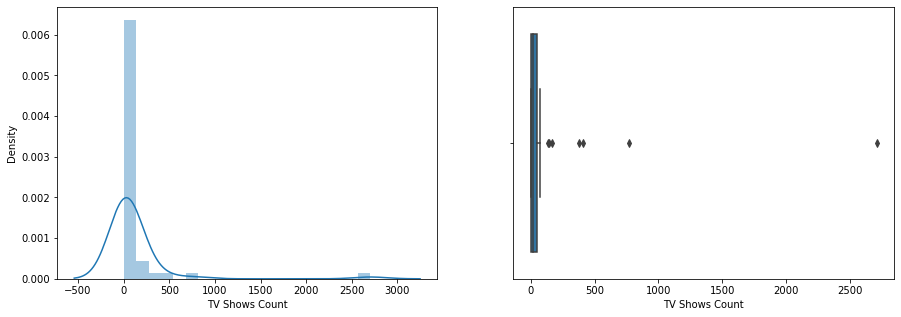

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(countries_data_tvshows['TV Shows Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(countries_data_tvshows['TV Shows Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_countries_tvshows = netflix_countries_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_countries_tvshows = hulu_countries_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_countries_tvshows = prime_video_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_countries_tvshows = countries_data_tvshows[countries_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_countries_tvshows = disney_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

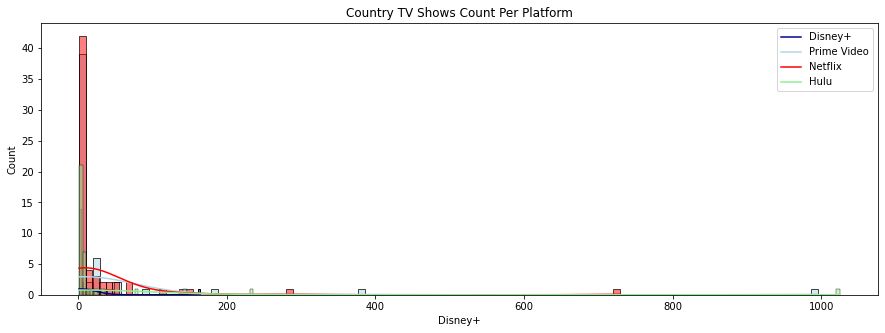

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Country TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_countries_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_countries_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_countries_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_countries_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Country with Highest TV Shows Count Ever Got is '{df_countries_high_tvshows['Country'][0]}' : '{df_countries_high_tvshows['TV Shows Count'].max()}'\n
      The Country with Lowest TV Shows Count Ever Got is '{df_countries_low_tvshows['Country'][0]}' : '{df_countries_low_tvshows['TV Shows Count'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Netflix' is '{netflix_countries_high_tvshows['Country'][0]}' : '{netflix_countries_high_tvshows['Netflix'].max()}'\n
      The Country with Lowest TV Shows Count on 'Netflix' is '{netflix_countries_low_tvshows['Country'][0]}' : '{netflix_countries_low_tvshows['Netflix'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Hulu' is '{hulu_countries_high_tvshows['Country'][0]}' : '{hulu_countries_high_tvshows['Hulu'].max()}'\n
      The Country with Lowest TV Shows Count on 'Hulu' is '{hulu_countries_low_tvshows['Country'][0]}' : '{hulu_countries_low_tvshows['Hulu'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Prime Video' is '{prime_video_countries_high_tvshows['Country'][0]}' : '{prime_video_countries_high_tvshows['Prime Video'].max()}'\n
      The Country with Lowest TV Shows Count on 'Prime Video' is '{prime_video_countries_low_tvshows['Country'][0]}' : '{prime_video_countries_low_tvshows['Prime Video'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Disney+' is '{disney_countries_high_tvshows['Country'][0]}' : '{disney_countries_high_tvshows['Disney+'].max()}'\n
      The Country with Lowest TV Shows Count on 'Disney+' is '{disney_countries_low_tvshows['Country'][0]}' : '{disney_countries_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Country with Highest TV Shows Count Ever Got is 'United States' : '2705'

      The Country with Lowest TV Shows Count Ever Got is 'Lithuania' : '1'

      
      The Country with Highest TV Shows Count on 'Netflix' is 'United States' : '729'

      The Country with Lowest TV Shows Count on 'Netflix' is 'Lithuania' : '0'

      
      The Country with Highest TV Shows Count on 'Hulu' is 'United States' : '1025'

      The Country with Lowest TV Shows Count on 'Hulu' is 'Lithuania' : '0'

      
      The Country with Highest TV Shows Count on 'Prime Video' is 'United States' : '995'

      The Country with Lowest TV Shows Count on 'Prime Video' is 'Korea' : '0'

      
      The Country with Highest TV Shows Count on 'Disney+' is 'United States' : '164'

      The Country with Lowest TV Shows Count on 'Disney+' is 'Chile' : '0'
 
      


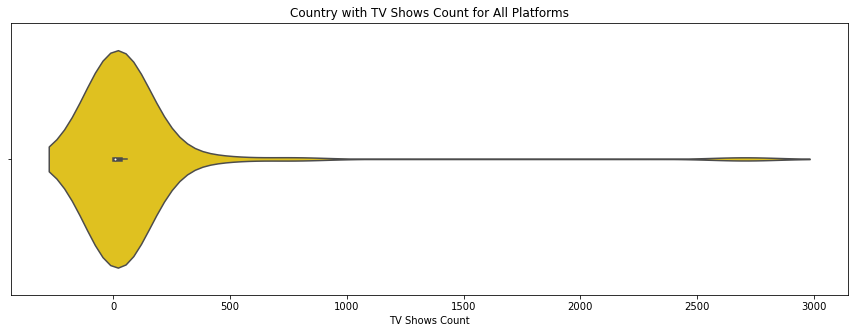

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Country with TV Shows Count for All Platforms')
sns.violinplot(x = countries_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

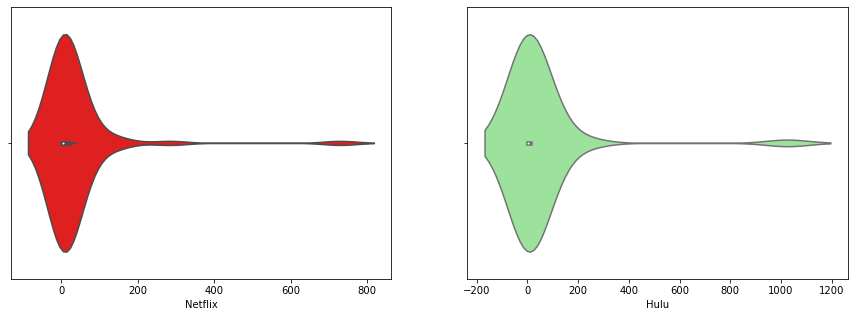

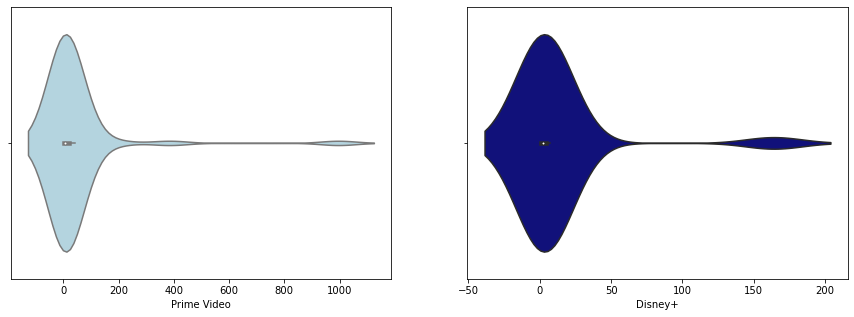

In [ ]:
# Distribution of Country TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_countries_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_countries_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_countries_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_countries_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Country is '{round(countries_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Netflix' is '{round(netflix_countries_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Hulu' is '{round(hulu_countries_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Prime Video' is '{round(prime_video_countries_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Disney+' is '{round(disney_countries_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Country is '75.93'

      The Average TV Shows Count of Country on 'Netflix' is '33.11'

      The Average TV Shows Count of Country on 'Hulu' is '46.03'

      The Average TV Shows Count of Country on 'Prime Video' is '38.65'

      The Average TV Shows Count of Country on 'Disney+' is '11.4'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Country is '{countries_data_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_tvshows['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '74'

      Total Count of Country on 'Netflix' is '62'

      Total Count of Country on 'Hulu' is '36'

      Total Count of Country on 'Prime Video' is '55'

      Total Count of Country on 'Disney+' is '20'
 
      


In [ ]:
fig = px.bar(x = countries_data_tvshows['Country'][:50], y = countries_data_tvshows['TV Shows Count'][:50], 
             color = countries_data_tvshows['TV Shows Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Country', 'y' : 'Number of TV Shows'})
fig.show()

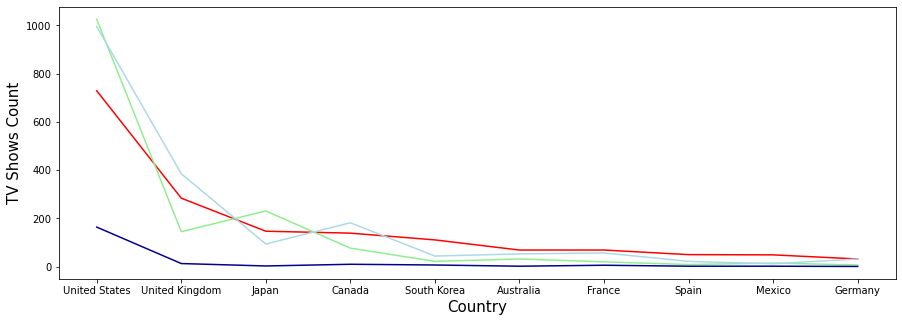

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = countries_data_tvshows['Country'][:10], y = countries_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = countries_data_tvshows['Country'][:10], y = countries_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = countries_data_tvshows['Country'][:10], y = countries_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = countries_data_tvshows['Country'][:10], y = countries_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

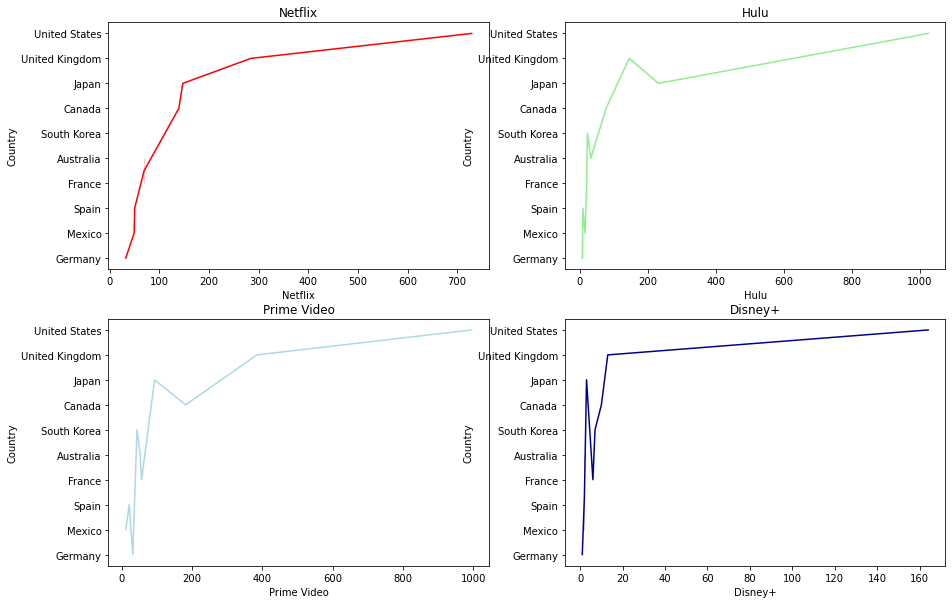

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_co_ax1 = sns.lineplot(y = countries_data_tvshows['Country'][:10], x = countries_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_co_ax2 = sns.lineplot(y = countries_data_tvshows['Country'][:10], x = countries_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_co_ax3 = sns.lineplot(y = countries_data_tvshows['Country'][:10], x = countries_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_co_ax4 = sns.lineplot(y = countries_data_tvshows['Country'][:10], x = countries_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

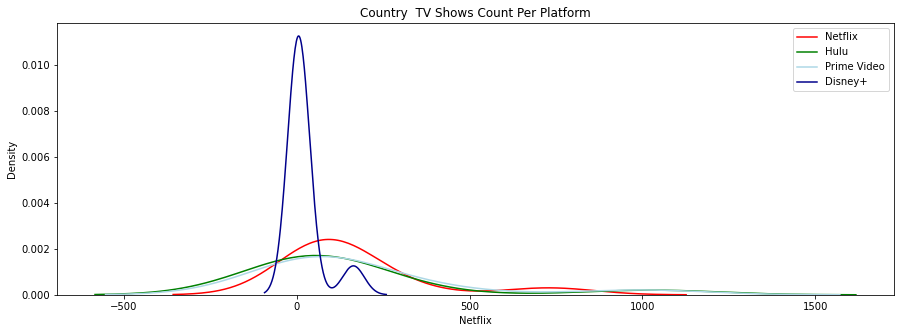

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Country  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_countries_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_countries_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_countries_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_countries_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_languages = df_tvshows.copy()

In [ ]:
# Create languages dict where key=name and value = number of languages
 
languages = {}
 
for i in df_tvshows_languages['Language'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        languages[i] = len(i.split(','))
    else:
        languages[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_languages['Number of Language'] = df_tvshows_languages['Language'].map(languages).astype(int)

In [ ]:
df_languages_most_tvshows = df_tvshows_languages.sort_values(by = 'Number of Language', ascending = False).reset_index()
df_languages_most_tvshows = df_languages_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_languages['Language'] == (df_tvshows_languages['Number of Language'].max()))
# df_languages_most_tvshows = df_tvshows_languages[filter]
 
# mostest_rated_tvshow = df_tvshows_languages.loc[df_tvshows_languages['Number of Language'].idxmax()]
 
print('\nTV Shows with Highest Ever Language Count are : \n')
df_languages_most_tvshows.head(5)


TV Shows with Highest Ever Language Count are : 



ID             Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2262      The Simpsons  1989  16  8.6              85        NA   
1  1680      Legend Quest  2017   7  7.4              NA        NA   
2  5302  One Strange Rock  2018   7  8.8              83        NA   
3   921           Clannad  2007   7  7.9              NA        NA   
4  2293        Elementary  2012  16  7.9              95        NA   

                                                Cast  \
0  Dan Castellaneta,Nancy Cartwright,Harry Sheare...   
1  Johnny Rose,Annemarie Blanco,Oscar Cheda,Paul ...   
2  Will Smith,Chris Hadfield,Jerry Linenger,Mae C...   
3  Yûichi Nakamura,David Matranga,Mai Nakahara,Lu...   
4  Jonny Lee Miller,Lucy Liu,Aidan Quinn,Jon Mich...   

                                       Genres        Country  ... Runtime  \
0                            Animation,Comedy  United States  ...      22   
1  Animation,Adventure,Comedy,Fantasy,Mystery         Mexico  ...      NA   
2                                 Documentary  United States  ...      47   
3      Animation,Comedy,Drama,Fantasy,Romance          Japan  ...      30   
4                         Crime,Drama,Mystery  United States  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series      34       0     1            0        1     1   
1  tv series       1       1     0            0        0     1   
2  tv series       2       0     0            0        1     1   
3  tv series       1       1     1            0        0     1   
4  tv series       7       0     1            0        0     1   

   Service Provider  Number of Language  
0           Disney+                  20  
1           Netflix                  18  
2           Disney+                  16  
3           Netflix                  14  
4              Hulu                  12  

[5 rows x 22 columns]

In [ ]:
df_languages_least_tvshows = df_tvshows_languages.sort_values(by = 'Number of Language', ascending = True).reset_index()
df_languages_least_tvshows = df_languages_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_languages['Language'] == (df_tvshows_languages['Number of Language'].min()))
# df_languages_least_tvshows = df_tvshows_languages[filter]
 
print('\nTV Shows with Lowest Ever Language Count are : \n')
df_languages_least_tvshows.head(5)


TV Shows with Lowest Ever Language Count are : 



ID                                              Title  Year Age IMDb  \
0  2757                                  Diff'rent Strokes  1978   0  6.7   
1  4816  Richard E. Grant's 7 Deadly Sins of the Animal...  2015  NR   NA   
2  3170                                        Here's Lucy  1968   7  6.9   
3  4812              I Love Toy Trains - I Love Big Trains  2005  NR   NA   
4  3171                                           Too Cute  2011   7  8.5   

  Rotten Tomatoes         Directors  \
0              NA                NA   
1              NA                NA   
2              NA                NA   
3              NA                NA   
4              NA  Brian K. Roberts   

                                                Cast               Genres  \
0  Conrad Bain,Gary Coleman,Todd Bridges,Dana Pla...  Comedy,Drama,Family   
1                                                 NA                   NA   
2  Lucille Ball,Gale Gordon,Lucie Arnaz,Desi Arna...               Comedy   
3                                                 NA                   NA   
4  Sydney Imbeau,Kiana Madeira,Neil Crone,Wesley ...        Comedy,Family   

  Country  ... Runtime       Kind Seasons Netflix  Hulu  Prime Video  Disney+  \
0      NA  ...      30  tv series       8       0     1            0        0   
1      NA  ...      NA  tv series       1       0     0            1        0   
2      NA  ...      30  tv series       6       0     1            1        0   
3      NA  ...      NA  tv series       1       0     0            1        0   
4      NA  ...      22  tv series       1       0     1            0        0   

   Type  Service Provider  Number of Language  
0     1              Hulu                   0  
1     1       Prime Video                   0  
2     1       Prime Video                   0  
3     1       Prime Video                   0  
4     1              Hulu                   0  

[5 rows x 22 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_languages['Language'].unique().shape[0]}' unique Language Counts were Given, They were Like this,\n
      
      {df_tvshows_languages.sort_values(by = 'Number of Language', ascending = False)['Language'].unique()[:5]} .etc\n
 
      The Highest Ever Language Count Any TV Show Got is '{df_languages_most_tvshows['Title'][0]}' : '{df_languages_most_tvshows['Number of Language'].max()}'\n
 
      The Lowest Ever Language Count Any TV Show Got is '{df_languages_least_tvshows['Title'][0]}' : '{df_languages_least_tvshows['Number of Language'].min()}'\n
      ''')


      Total '286' unique Language Counts were Given, They were Like this,

      
      ['Chinese,English,Spanish,Albanian,French,Japanese,German,Russian,Hindi,Swahili,Italian,Swedish,Turkish,Cantonese,Mandarin,Hebrew,Arabic,Klingon,Bengali,Czech'
 'Spanish,English,Portuguese,French,Italian,German,Swedish,Norwegian,Finnish,Danish,Dutch,Mandarin,Vietnamese,Russian,Korean,Arabic,Turkish,Polish'
 'English,Spanish,Indonesian,Chinese,Arabic,Russian,Hindi,Tibetan,Portuguese,French,Thai,Norwegian,Italian,Japanese,Mongolian,Kazakh'
 'Japanese,Mandarin,Russian,Korean,Portuguese,Persian,Indonesian,Hindi,Italian,Dutch,Arabic,French,Latin,English'
 'Chinese,Russian,Pushto,French,Czech,German,Filipino,Italian,Japanese,Dutch,English,Spanish'] .etc

 
      The Highest Ever Language Count Any TV Show Got is 'The Simpsons' : '20'

 
      The Lowest Ever Language Count Any TV Show Got is 'Diff'rent Strokes' : '0'

      


In [ ]:
netflix_languages_most_tvshows = df_languages_most_tvshows.loc[df_languages_most_tvshows['Netflix']==1].reset_index()
netflix_languages_most_tvshows = netflix_languages_most_tvshows.drop(['index'], axis = 1)
 
netflix_languages_least_tvshows = df_languages_least_tvshows.loc[df_languages_least_tvshows['Netflix']==1].reset_index()
netflix_languages_least_tvshows = netflix_languages_least_tvshows.drop(['index'], axis = 1)
 
netflix_languages_most_tvshows.head(5)

ID           Title  Year Age IMDb Rotten Tomatoes Directors  \
0  1680    Legend Quest  2017   7  7.4              NA        NA   
1   921         Clannad  2007   7  7.9              NA        NA   
2   661  Into the Night  2020  18  7.1              88        NA   
3   988      Queen Sono  2020  18    6              91        NA   
4   670      Marco Polo  2014  18    8              66        NA   

                                                Cast  \
0  Johnny Rose,Annemarie Blanco,Oscar Cheda,Paul ...   
1  Yûichi Nakamura,David Matranga,Mai Nakahara,Lu...   
2  Pauline Etienne,Laurent Capelluto,Mehmet Kurtu...   
3  Pearl Thusi,Vuyo Dabula,Sechaba Morojele,Chi M...   
4  Lorenzo Richelmy,Benedict Wong,Joan Chen,Remy ...   

                                       Genres        Country  ... Runtime  \
0  Animation,Adventure,Comedy,Fantasy,Mystery         Mexico  ...      NA   
1      Animation,Comedy,Drama,Fantasy,Romance          Japan  ...      30   
2                       Drama,Sci-Fi,Thriller        Belgium  ...      NA   
3                 Action,Crime,Drama,Thriller   South Africa  ...      43   
4                     Adventure,Drama,History  United States  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1       1     0            0        0     1   
1  tv series       1       1     1            0        0     1   
2  tv series       2       1     0            0        0     1   
3  tv series       2       1     0            0        0     1   
4  tv series       2       1     0            0        0     1   

   Service Provider  Number of Language  
0           Netflix                  18  
1           Netflix                  14  
2           Netflix                  10  
3           Netflix                   8  
4           Netflix                   8  

[5 rows x 22 columns]

In [ ]:
hulu_languages_most_tvshows = df_languages_most_tvshows.loc[df_languages_most_tvshows['Hulu']==1].reset_index()
hulu_languages_most_tvshows = hulu_languages_most_tvshows.drop(['index'], axis = 1)
 
hulu_languages_least_tvshows = df_languages_least_tvshows.loc[df_languages_least_tvshows['Hulu']==1].reset_index()
hulu_languages_least_tvshows = hulu_languages_least_tvshows.drop(['index'], axis = 1)
 
hulu_languages_most_tvshows.head(5)

ID          Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2262   The Simpsons  1989  16  8.6              85        NA   
1   921        Clannad  2007   7  7.9              NA        NA   
2  2293     Elementary  2012  16  7.9              95        NA   
3  2341  The Last Ship  2014  16  7.5              83        NA   
4  2260        Vikings  2013  18  8.5              93        NA   

                                                Cast  \
0  Dan Castellaneta,Nancy Cartwright,Harry Sheare...   
1  Yûichi Nakamura,David Matranga,Mai Nakahara,Lu...   
2  Jonny Lee Miller,Lucy Liu,Aidan Quinn,Jon Mich...   
3  Eric Dane,Adam Baldwin,Charles Parnell,Travis ...   
4  Katheryn Winnick,Gustaf Skarsgård,Alexander Lu...   

                                       Genres         Country  ... Runtime  \
0                            Animation,Comedy   United States  ...      22   
1      Animation,Comedy,Drama,Fantasy,Romance           Japan  ...      30   
2                         Crime,Drama,Mystery   United States  ...      60   
3            Action,Drama,Sci-Fi,Thriller,War   United States  ...      60   
4  Action,Adventure,Drama,History,Romance,War  Ireland,Canada  ...      44   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series      34       0     1            0        1     1   
1  tv series       1       1     1            0        0     1   
2  tv series       7       0     1            0        0     1   
3  tv series       5       0     1            0        0     1   
4  tv series       6       0     1            1        0     1   

   Service Provider  Number of Language  
0           Disney+                  20  
1           Netflix                  14  
2              Hulu                  12  
3              Hulu                  11  
4       Prime Video                  10  

[5 rows x 22 columns]

In [ ]:
prime_video_languages_most_tvshows = df_languages_most_tvshows.loc[df_languages_most_tvshows['Prime Video']==1].reset_index()
prime_video_languages_most_tvshows = prime_video_languages_most_tvshows.drop(['index'], axis = 1)
 
prime_video_languages_least_tvshows = df_languages_least_tvshows.loc[df_languages_least_tvshows['Prime Video']==1].reset_index()
prime_video_languages_least_tvshows = prime_video_languages_least_tvshows.drop(['index'], axis = 1)
 
prime_video_languages_most_tvshows.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2260                 Vikings  2013  18  8.5              93        NA   
1  3743  Tom Clancy's Jack Ryan  2018  16  8.1              71        NA   
2   346                24 Hours  2014  NR  8.3              86        NA   
3   364    Carlos el terrorista  1980  NR  7.6              NA        NA   
4  3720               Mr. Robot  2015  18  8.5              94        NA   

                                                Cast  \
0  Katheryn Winnick,Gustaf Skarsgård,Alexander Lu...   
1  John Krasinski,Wendell Pierce,John Hoogenakker...   
2  Kiefer Sutherland,Mary Lynn Rajskub,Carlos Ber...   
3  Edgar Ramírez,Alexander Scheer,Fadi Abi Samra,...   
4  Rami Malek,Christian Slater,Carly Chaikin,Mart...   

                                       Genres         Country  ... Runtime  \
0  Action,Adventure,Drama,History,Romance,War  Ireland,Canada  ...      44   
1                       Action,Drama,Thriller   United States  ...      60   
2                 Action,Crime,Drama,Thriller   United States  ...      44   
3              Biography,Crime,Drama,Thriller  France,Germany  ...     334   
4                        Crime,Drama,Thriller   United States  ...      49   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       6       0     1            1        0     1   
1  tv series       3       0     0            1        0     1   
2  tv series       8       0     0            1        0     1   
3  tv series       1       0     0            1        0     1   
4  tv series       4       0     0            1        0     1   

   Service Provider  Number of Language  
0       Prime Video                  10  
1       Prime Video                   8  
2       Prime Video                   8  
3       Prime Video                   8  
4       Prime Video                   8  

[5 rows x 22 columns]

In [ ]:
disney_languages_most_tvshows = df_languages_most_tvshows.loc[df_languages_most_tvshows['Disney+']==1].reset_index()
disney_languages_most_tvshows = disney_languages_most_tvshows.drop(['index'], axis = 1)
 
disney_languages_least_tvshows = df_languages_least_tvshows.loc[df_languages_least_tvshows['Disney+']==1].reset_index()
disney_languages_least_tvshows = disney_languages_least_tvshows.drop(['index'], axis = 1)
 
disney_languages_most_tvshows.head(5)

ID                        Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2262                 The Simpsons  1989  16  8.6              85        NA   
1  5302             One Strange Rock  2018   7  8.8              83        NA   
2  5375     My Friends Tigger & Pooh  2007   0  5.8              NA        NA   
3  1300                     PJ Masks  2015   7  5.5              NA        NA   
4  2490  Star vs. the Forces of Evil  2015   7    8              NA        NA   

                                                Cast  \
0  Dan Castellaneta,Nancy Cartwright,Harry Sheare...   
1  Will Smith,Chris Hadfield,Jerry Linenger,Mae C...   
2  Angelica Bolognesi Bonacini,Jim Cummings,Chloë...   
3  Addison Holley,Kyle Breitkopf,Juan Luis Bonill...   
4  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   

                                              Genres  \
0                                   Animation,Comedy   
1                                        Documentary   
2                   Animation,Short,Adventure,Family   
3   Animation,Action,Adventure,Family,Fantasy,Sci-Fi   
4  Animation,Action,Adventure,Comedy,Drama,Family...   

                                           Country  ... Runtime       Kind  \
0                                    United States  ...      22  tv series   
1                                    United States  ...      47  tv series   
2                                    United States  ...      30  tv series   
3                            France,United Kingdom  ...      24  tv series   
4  United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0      34       0     1            0        1     1           Disney+   
1       2       0     0            0        1     1           Disney+   
2       3       0     0            0        1     1           Disney+   
3       5       1     0            0        1     1           Netflix   
4       4       0     1            0        1     1           Disney+   

   Number of Language  
0                  20  
1                  16  
2                   7  
3                   3  
4                   3  

[5 rows x 22 columns]

In [ ]:
print(f'''
      The TV Show with Highest Language Count Ever Got is '{df_languages_most_tvshows['Title'][0]}' : '{df_languages_most_tvshows['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count Ever Got is '{df_languages_least_tvshows['Title'][0]}' : '{df_languages_least_tvshows['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Netflix' is '{netflix_languages_most_tvshows['Title'][0]}' : '{netflix_languages_most_tvshows['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Netflix' is '{netflix_languages_least_tvshows['Title'][0]}' : '{netflix_languages_least_tvshows['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Hulu' is '{hulu_languages_most_tvshows['Title'][0]}' : '{hulu_languages_most_tvshows['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Hulu' is '{hulu_languages_least_tvshows['Title'][0]}' : '{hulu_languages_least_tvshows['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Prime Video' is '{prime_video_languages_most_tvshows['Title'][0]}' : '{prime_video_languages_most_tvshows['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Prime Video' is '{prime_video_languages_least_tvshows['Title'][0]}' : '{prime_video_languages_least_tvshows['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Disney+' is '{disney_languages_most_tvshows['Title'][0]}' : '{disney_languages_most_tvshows['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Disney+' is '{disney_languages_least_tvshows['Title'][0]}' : '{disney_languages_least_tvshows['Number of Language'].min()}'\n 
      ''')


      The TV Show with Highest Language Count Ever Got is 'The Simpsons' : '20'

      The TV Show with Lowest Language Count Ever Got is 'Diff'rent Strokes' : '0'

      
      The TV Show with Highest Language Count on 'Netflix' is 'Legend Quest' : '18'

      The TV Show with Lowest Language Count on 'Netflix' is 'Slice of Paradise' : '0'

      
      The TV Show with Highest Language Count on 'Hulu' is 'The Simpsons' : '20'

      The TV Show with Lowest Language Count on 'Hulu' is 'Diff'rent Strokes' : '0'

      
      The TV Show with Highest Language Count on 'Prime Video' is 'Vikings' : '10'

      The TV Show with Lowest Language Count on 'Prime Video' is 'Richard E. Grant's 7 Deadly Sins of the Animal Kingdom' : '0'

      
      The TV Show with Highest Language Count on 'Disney+' is 'The Simpsons' : '20'

      The TV Show with Lowest Language Count on 'Disney+' is 'Mr. Boogedy' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Language Count is '{round(df_tvshows_languages['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Netflix' is '{round(netflix_languages_most_tvshows['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Hulu' is '{round(hulu_languages_most_tvshows['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Prime Video' is '{round(prime_video_languages_most_tvshows['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Disney+' is '{round(disney_languages_most_tvshows['Number of Language'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Language Count is '1.06'

      The Average Language Count on 'Netflix' is '1.14'

      The Average Language Count on 'Hulu' is '1.14'

      The Average Language Count on 'Prime Video' is '0.96'

      The Average Language Count on 'Disney+' is '1.24'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Language is '{df_tvshows_languages['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Netflix' is '{netflix_languages_most_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Hulu' is '{hulu_languages_most_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Prime Video' is '{prime_video_languages_most_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Disney+' is '{disney_languages_most_tvshows['Language'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Language is '286'

      Total Count of Language on 'Netflix' is '166'

      Total Count of Language on 'Hulu' is '89'

      Total Count of Language on 'Prime Video' is '126'

      Total Count of Language on 'Disney+' is '19'
 
      


In [ ]:
df_tvshows_languages.drop(df_tvshows_languages.loc[df_tvshows_languages['Language'] == "NA"].index, inplace = True)
# df_tvshows_languages = df_tvshows_languages[df_tvshows_languages.Language != "NA"]

In [ ]:
df_lan = df_tvshows_languages['Language'].str.split(',').apply(pd.Series).stack()
del df_tvshows_languages['Language']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Language'
df_tvshows_languages = df_tvshows_languages.join(df_lan)
df_tvshows_languages.drop_duplicates(inplace = True)

In [ ]:
df_tvshows_languages.head(5)

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       3       1     0            0        0     1   
1  tv series      18       1     0            0        0     1   
2  tv series       2       1     0            0        0     1   
3  tv series       6       1     0            1        1     1   
4  tv series       3       1     0            0        0     1   

   Service Provider  Number of Language Language  
0           Netflix                   1  English  
1           Netflix                   1  English  
2           Netflix                   1  English  
3           Netflix                   1  English  
4           Netflix                   1  English  

[5 rows x 22 columns]

In [ ]:
languages_count = df_tvshows_languages.groupby('Language')['Title'].count()
languages_tvshow = df_tvshows_languages.groupby('Language')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
languages_data_tvshows = pd.concat([languages_count, languages_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
languages_data_tvshows = languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Language with TV Shows Counts - All Platforms Combined
languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
28   English            3876     1177  1271         1575      166
46  Japanese             402      142   224           95        4
82   Spanish             268      151    76           49        8
33    French             159       75    34           61        5
50    Korean             156      106    26           37        3
35    German              92       34    17           37        6
58  Mandarin              90       68    10           14        1
75   Russian              80       32    17           36        2
8     Arabic              62       31    16           17        2
45   Italian              57       32    12           16        2

In [ ]:
# Language with TV Shows Counts - All Platforms Combined
languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]
 
df_languages_high_tvshows = languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_languages_high_tvshows = df_languages_high_tvshows.drop(['index'], axis = 1)
# filter = (languages_data_tvshows['TV Shows Count'] = =  (languages_data_tvshows['TV Shows Count'].max()))
# df_languages_high_tvshows = languages_data_tvshows[filter]
 
# highest_rated_tvshow = languages_data_tvshows.loc[languages_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nLanguage with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_languages_high_tvshows.head(5)


Language with Highest Ever TV Shows Count are : All Platforms Combined



Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   English            3876     1177  1271         1575      166
1  Japanese             402      142   224           95        4
2   Spanish             268      151    76           49        8
3    French             159       75    34           61        5
4    Korean             156      106    26           37        3

In [ ]:
df_languages_low_tvshows = languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_languages_low_tvshows = df_languages_low_tvshows.drop(['index'], axis = 1)
# filter = (languages_data_tvshows['TV Shows Count'] = =  (languages_data_tvshows['TV Shows Count'].min()))
# df_languages_low_tvshows = languages_data_tvshows[filter]
 
print('\nLanguage with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_languages_low_tvshows.head(5)


Language with Lowest Ever TV Shows Count are : All Platforms Combined



Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   Ancient (to 1453)               1        0     1            1        0
1           Abkhazian               1        0     0            0        1
2               Wolof               1        0     0            1        0
3             Amharic               1        1     0            0        0
4             Aramaic               1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_tvshows['Language'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{languages_data_tvshows['Language'].unique().shape[0]}' Language, They were Like this, \n
 
      {languages_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Language'].head(5).unique()} etc. \n
 
      The Language with Highest TV Shows Count have '{languages_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_languages_high_tvshows['Language'][0]}', &\n
      The Language with Lowest TV Shows Count have '{languages_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_languages_low_tvshows['Language'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '101' Language, They were Like this, 

 
      ['English' 'Japanese' 'Spanish' 'French' 'Korean'] etc. 

 
      The Language with Highest TV Shows Count have '3876' TV Shows Available is 'English', &

      The Language with Lowest TV Shows Count have '1' TV Shows Available is ' Ancient (to 1453)'
      


In [ ]:
fig = px.pie(languages_data_tvshows[:10], names = 'Language', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on IMDb Counts')
fig.show()

In [ ]:
# netflix_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_languages_tvshows = netflix_languages_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_languages_high_tvshows = df_languages_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_languages_high_tvshows = netflix_languages_high_tvshows.drop(['index'], axis = 1)
 
netflix_languages_low_tvshows = df_languages_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_languages_low_tvshows = netflix_languages_low_tvshows.drop(['index'], axis = 1)
 
netflix_languages_high_tvshows.head(5)

Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   English            3876     1177  1271         1575      166
1   Spanish             268      151    76           49        8
2  Japanese             402      142   224           95        4
3    Korean             156      106    26           37        3
4    French             159       75    34           61        5

In [ ]:
# hulu_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_languages_tvshows = hulu_languages_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_languages_high_tvshows = df_languages_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_languages_high_tvshows = hulu_languages_high_tvshows.drop(['index'], axis = 1)
 
hulu_languages_low_tvshows = df_languages_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_languages_low_tvshows = hulu_languages_low_tvshows.drop(['index'], axis = 1)
 
hulu_languages_high_tvshows.head(5)

Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   English            3876     1177  1271         1575      166
1  Japanese             402      142   224           95        4
2   Spanish             268      151    76           49        8
3    French             159       75    34           61        5
4    Korean             156      106    26           37        3

In [ ]:
# prime_video_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_languages_tvshows = prime_video_languages_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_languages_high_tvshows = df_languages_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_languages_high_tvshows = prime_video_languages_high_tvshows.drop(['index'], axis = 1)
 
prime_video_languages_low_tvshows = df_languages_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_languages_low_tvshows = prime_video_languages_low_tvshows.drop(['index'], axis = 1)
 
prime_video_languages_high_tvshows.head(5)

Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   English            3876     1177  1271         1575      166
1  Japanese             402      142   224           95        4
2    French             159       75    34           61        5
3   Spanish             268      151    76           49        8
4    Korean             156      106    26           37        3

In [ ]:
# disney_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_languages_tvshows = disney_languages_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_languages_high_tvshows = df_languages_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_languages_high_tvshows = disney_languages_high_tvshows.drop(['index'], axis = 1)
 
disney_languages_low_tvshows = df_languages_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_languages_low_tvshows = disney_languages_low_tvshows.drop(['index'], axis = 1)
 
disney_languages_high_tvshows.head(5)

Language  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   English            3876     1177  1271         1575      166
1   Spanish             268      151    76           49        8
2    German              92       34    17           37        6
3    French             159       75    34           61        5
4  Japanese             402      142   224           95        4

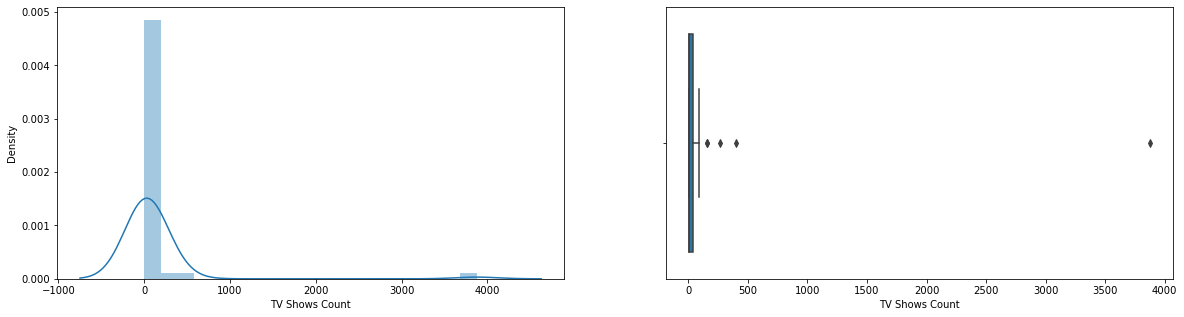

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(languages_data_tvshows['TV Shows Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(languages_data_tvshows['TV Shows Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_languages_tvshows = netflix_languages_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_languages_tvshows = hulu_languages_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_languages_tvshows = prime_video_languages_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_languages_tvshows = languages_data_tvshows[languages_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_languages_tvshows = disney_languages_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

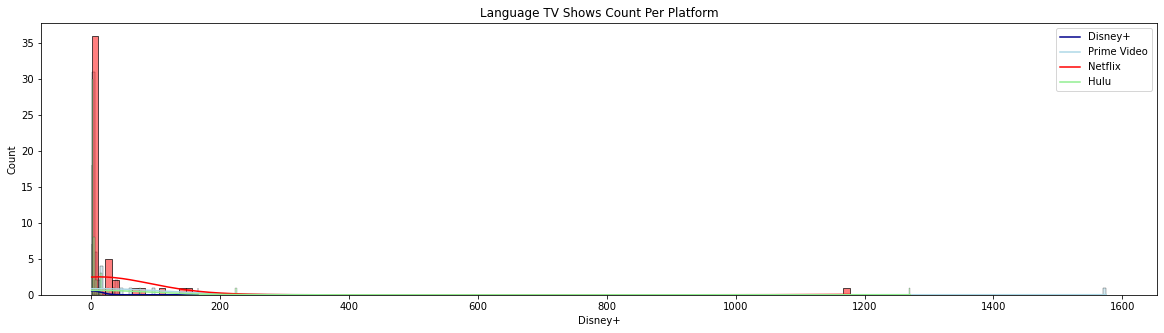

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Language TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_languages_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_languages_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_languages_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_languages_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Language with Highest TV Shows Count Ever Got is '{df_languages_high_tvshows['Language'][0]}' : '{df_languages_high_tvshows['TV Shows Count'].max()}'\n
      The Language with Lowest TV Shows Count Ever Got is '{df_languages_low_tvshows['Language'][0]}' : '{df_languages_low_tvshows['TV Shows Count'].min()}'\n
      
      The Language with Highest TV Shows Count on 'Netflix' is '{netflix_languages_high_tvshows['Language'][0]}' : '{netflix_languages_high_tvshows['Netflix'].max()}'\n
      The Language with Lowest TV Shows Count on 'Netflix' is '{netflix_languages_low_tvshows['Language'][0]}' : '{netflix_languages_low_tvshows['Netflix'].min()}'\n
      
      The Language with Highest TV Shows Count on 'Hulu' is '{hulu_languages_high_tvshows['Language'][0]}' : '{hulu_languages_high_tvshows['Hulu'].max()}'\n
      The Language with Lowest TV Shows Count on 'Hulu' is '{hulu_languages_low_tvshows['Language'][0]}' : '{hulu_languages_low_tvshows['Hulu'].min()}'\n
      
      The Language with Highest TV Shows Count on 'Prime Video' is '{prime_video_languages_high_tvshows['Language'][0]}' : '{prime_video_languages_high_tvshows['Prime Video'].max()}'\n
      The Language with Lowest TV Shows Count on 'Prime Video' is '{prime_video_languages_low_tvshows['Language'][0]}' : '{prime_video_languages_low_tvshows['Prime Video'].min()}'\n
      
      The Language with Highest TV Shows Count on 'Disney+' is '{disney_languages_high_tvshows['Language'][0]}' : '{disney_languages_high_tvshows['Disney+'].max()}'\n
      The Language with Lowest TV Shows Count on 'Disney+' is '{disney_languages_low_tvshows['Language'][0]}' : '{disney_languages_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Language with Highest TV Shows Count Ever Got is 'English' : '3876'

      The Language with Lowest TV Shows Count Ever Got is ' Ancient (to 1453)' : '1'

      
      The Language with Highest TV Shows Count on 'Netflix' is 'English' : '1177'

      The Language with Lowest TV Shows Count on 'Netflix' is ' Ancient (to 1453)' : '0'

      
      The Language with Highest TV Shows Count on 'Hulu' is 'English' : '1271'

      The Language with Lowest TV Shows Count on 'Hulu' is 'Kurdish' : '0'

      
      The Language with Highest TV Shows Count on 'Prime Video' is 'English' : '1575'

      The Language with Lowest TV Shows Count on 'Prime Video' is 'Kazakh' : '0'

      
      The Language with Highest TV Shows Count on 'Disney+' is 'English' : '166'

      The Language with Lowest TV Shows Count on 'Disney+' is 'Scottish Gaelic' : '0'
 
      


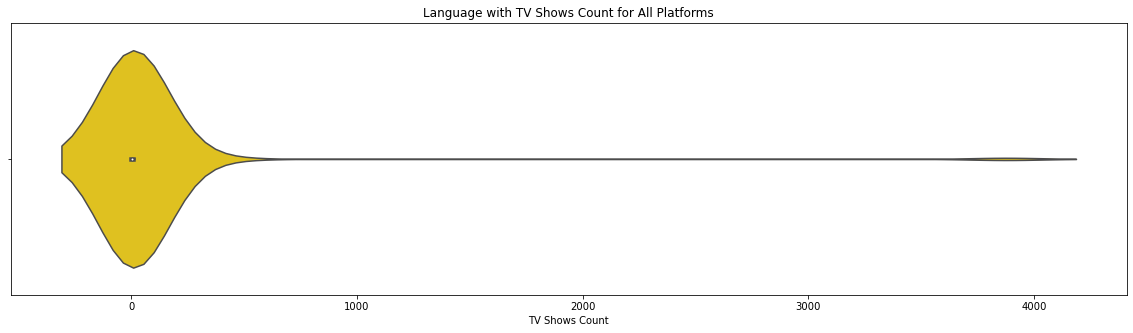

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (20, 5))
plt.title('Language with TV Shows Count for All Platforms')
sns.violinplot(x = languages_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

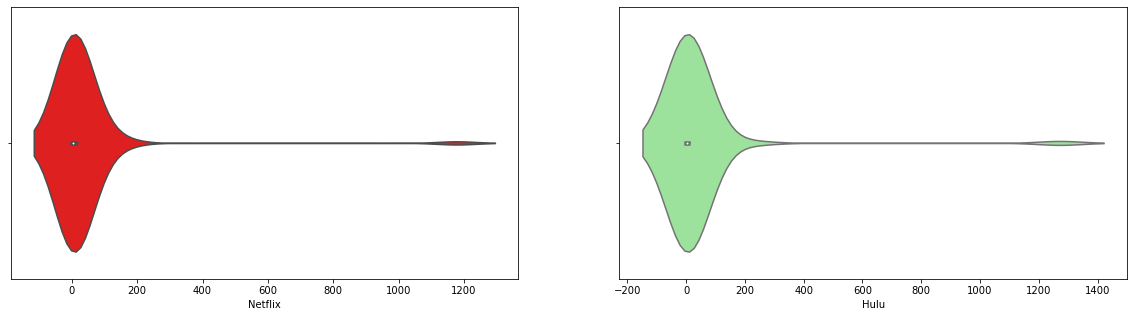

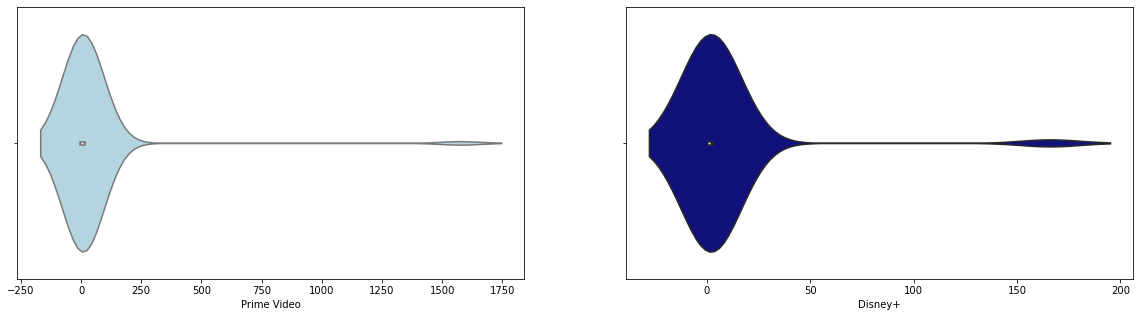

In [ ]:
# Distribution of Language TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_languages_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_languages_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_languages_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_languages_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Language is '{round(languages_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Language on 'Netflix' is '{round(netflix_languages_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Language on 'Hulu' is '{round(hulu_languages_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Language on 'Prime Video' is '{round(prime_video_languages_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Language on 'Disney+' is '{round(disney_languages_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Language is '57.03'

      The Average TV Shows Count of Language on 'Netflix' is '28.95'

      The Average TV Shows Count of Language on 'Hulu' is '31.33'

      The Average TV Shows Count of Language on 'Prime Video' is '32.92'

      The Average TV Shows Count of Language on 'Disney+' is '7.09'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Language is '{languages_data_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Netflix' is '{netflix_languages_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Hulu' is '{hulu_languages_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Prime Video' is '{prime_video_languages_tvshows['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Disney+' is '{disney_languages_tvshows['Language'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Language is '101'

      Total Count of Language on 'Netflix' is '73'

      Total Count of Language on 'Hulu' is '58'

      Total Count of Language on 'Prime Video' is '64'

      Total Count of Language on 'Disney+' is '32'
 
      


In [ ]:
fig = px.bar(x = languages_data_tvshows['Language'][:50], y = languages_data_tvshows['TV Shows Count'][:50], 
             color = languages_data_tvshows['TV Shows Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Language', 'y' : 'Number of TV Shows'})
fig.show()

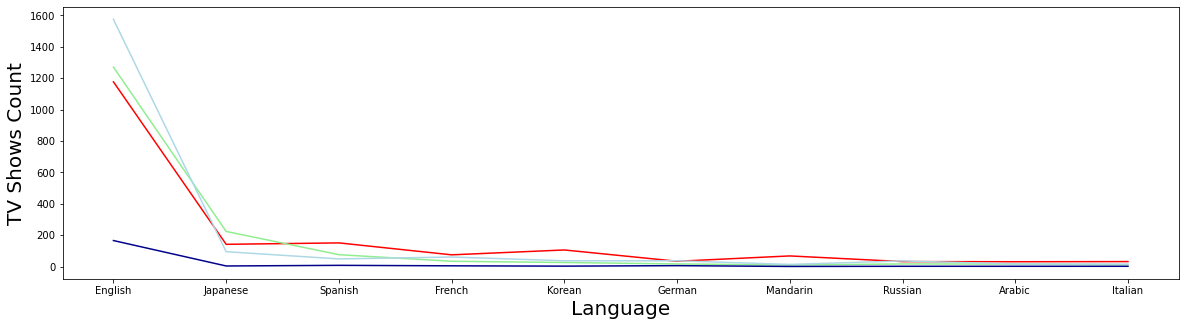

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = languages_data_tvshows['Language'][:10], y = languages_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = languages_data_tvshows['Language'][:10], y = languages_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = languages_data_tvshows['Language'][:10], y = languages_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = languages_data_tvshows['Language'][:10], y = languages_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Language', fontsize = 20)
plt.ylabel('TV Shows Count', fontsize = 20)
plt.show()

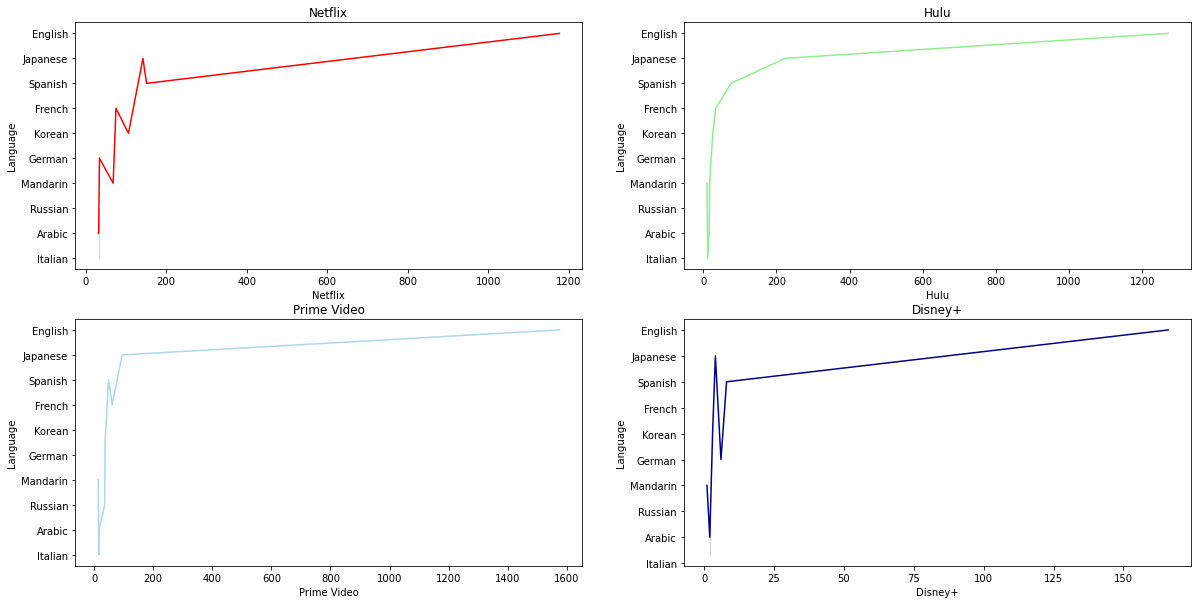

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_l_ax1 = sns.lineplot(y = languages_data_tvshows['Language'][:10], x = languages_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_l_ax2 = sns.lineplot(y = languages_data_tvshows['Language'][:10], x = languages_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_l_ax3 = sns.lineplot(y = languages_data_tvshows['Language'][:10], x = languages_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_l_ax4 = sns.lineplot(y = languages_data_tvshows['Language'][:10], x = languages_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_l_ax1.title.set_text(labels[0])
h_l_ax2.title.set_text(labels[1])
p_l_ax3.title.set_text(labels[2])
d_l_ax4.title.set_text(labels[3])
 
plt.show()

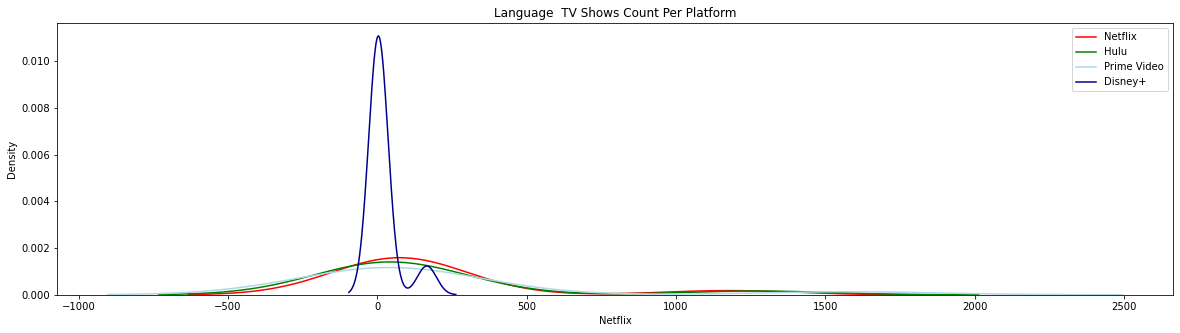

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Language  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_languages_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_languages_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_languages_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_languages_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_tvshows_plotlines = df_tvshows.copy()

In [ ]:
df_tvshows_plotlines.drop(df_tvshows_plotlines.loc[df_tvshows_plotlines['Plotline'] == "NA"].index, inplace = True)
# df_tvshows_plotlines = df_tvshows_plotlines[df_tvshows_plotlines.Plotline != "NA"]

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_plotlines_tvshows = df_tvshows_plotlines.loc[df_tvshows_plotlines['Netflix'] == 1]
hulu_plotlines_tvshows = df_tvshows_plotlines.loc[df_tvshows_plotlines['Hulu'] == 1]
prime_video_plotlines_tvshows = df_tvshows_plotlines.loc[df_tvshows_plotlines['Prime Video'] == 1]
disney_plotlines_tvshows = df_tvshows_plotlines.loc[df_tvshows_plotlines['Disney+'] == 1]

In [ ]:
df_tvshows_plotlines = df_tvshows_plotlines['Plotline']
plotline_tvshows_w = " ".join(df_tvshows_plotlines)

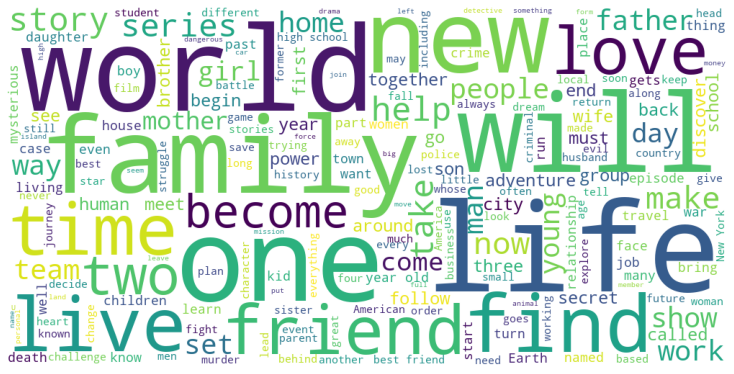

In [ ]:
from wordcloud import WordCloud, STOPWORDS
 
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(plotline_tvshows_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
df_tvshows_runtimes = df_tvshows.copy()

In [ ]:
df_tvshows_runtimes.drop(df_tvshows_runtimes.loc[df_tvshows_runtimes['Runtime'] == "NA"].index, inplace = True)
# df_tvshows_runtimes = df_tvshows_runtimes[df_tvshows_runtimes.Runtime != "NA"]
df_tvshows_runtimes['Runtime'] = df_tvshows_runtimes['Runtime'].astype(int)

In [ ]:
df_runtimes_high_tvshows = df_tvshows_runtimes.sort_values(by = 'Runtime', ascending = False).reset_index()
df_runtimes_high_tvshows = df_runtimes_high_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_runtimes['Runtime'] == (df_tvshows_runtimes['Runtime'].max()))
# df_runtimes_high_tvshows = df_tvshows_runtimes[filter]
 
# highest_rated_tvshow = df_tvshows_runtimes.loc[df_tvshows_runtimes['Runtime'].idxmax()]
 
print('\nTV Shows with Highest Ever Runtime  are : \n')
df_runtimes_high_tvshows.head(5)


TV Shows with Highest Ever Runtime  are : 



ID                 Title  Year Age IMDb Rotten Tomatoes Directors  \
0   367              Colorado  1940   0  8.3              NA        NA   
1  3843              Baseball  1994   7  9.2              NA        NA   
2   601       The Vietnam War  2017  18  9.1              96        NA   
3   937   The Time in Between  2013   7  8.3              NA        NA   
4  3835  Too Old to Die Young  2019  18  7.4              70        NA   

                                                Cast  \
0  Raymond Burr,Barbara Carrera,Richard Chamberla...   
1  John Chancellor,Daniel Okrent,Ossie Davis,Paul...   
2  Peter Coyote,Huy Duc,James Willbanks,Duong Van...   
3  Adriana Ugarte,Mari Carmen Sánchez,Tristán Ull...   
4  Miles Teller,Augusto Aguilera,Cristina Rodlo,N...   

                                    Genres        Country  ...  \
0   Action,Adventure,Drama,Romance,Western  United States  ...   
1                Documentary,History,Sport  United States  ...   
2                  Documentary,History,War             NA  ...   
3  Adventure,Drama,History,Mystery,Romance          Spain  ...   
4                     Crime,Drama,Thriller  United States  ...   

                                            Plotline Runtime       Kind  \
0  Part of Mary's soul has been ripped from her b...    1256  tv series   
1  An assassin named Al Simmons is double-crossed...    1140  tv series   
2                                                 NA     990  tv series   
3  Vampire Knight tells the story of Yuki Cross. ...     853  tv series   
4  It's 1953, and Sidney Chambers is vicar of Gra...     758  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            1        0     1       Prime Video  
1       1        0     0            1        0     1       Prime Video  
2       1        1     0            0        0     1           Netflix  
3       1        1     0            0        0     1           Netflix  
4       1        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
df_runtimes_low_tvshows = df_tvshows_runtimes.sort_values(by = 'Runtime', ascending = True).reset_index()
df_runtimes_low_tvshows = df_runtimes_low_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_runtimes['Runtime'] == (df_tvshows_runtimes['Runtime'].min()))
# df_runtimes_low_tvshows = df_tvshows_runtimes[filter]
 
print('\nTV Shows with Lowest Ever Runtime  are : \n')
df_runtimes_low_tvshows.head(5)


TV Shows with Lowest Ever Runtime  are : 



ID                                     Title  Year Age IMDb  \
0  4685                                DoongDoong  2020  NR  6.8   
1  4934  Grandma's Cats (Are Trying To Kill Her!)  2015   7   NA   
2  2025                                     Larva  2011   7  7.3   
3  5154                         The Family Blend!  2016   7   NA   
4  4541                                Originalos  2010   0    7   

  Rotten Tomatoes Directors                           Cast  \
0              NA        NA     Seunghee Nam,Sunyoung Park   
1              NA        NA  Malcolm Campbell,Louie Granda   
2              NA        NA                   Beom-gi Hong   
3              NA        NA             Sebastian Foxworth   
4              NA        NA                             NA   

                          Genres        Country  ... Plotline Runtime  \
0                      Animation    South Korea  ...       NA       1   
1               Animation,Comedy  United States  ...       NA       2   
2  Animation,Short,Comedy,Family    South Korea  ...       NA       2   
3                      Animation  United States  ...       NA       2   
4                      Animation        Denmark  ...       NA       3   

        Kind Seasons  Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       1        0     0            1        0     1   
1  tv series       1        0     0            1        0     1   
2  tv series       5        1     0            0        0     1   
3  tv series       1        0     0            1        0     1   
4  tv series       1        0     0            1        0     1   

   Service Provider  
0       Prime Video  
1       Prime Video  
2           Netflix  
3       Prime Video  
4       Prime Video  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_runtimes['Runtime'].unique().shape[0]}' unique Runtime s were Given, They were Like this,\n
      
{df_tvshows_runtimes.sort_values(by = 'Runtime', ascending = False)['Runtime'].unique()}\n
 
      The Highest Ever Runtime Ever Any TV Show Got is '{df_runtimes_high_tvshows['Title'][0]}' : '{df_runtimes_high_tvshows['Runtime'].max()}'\n
 
      The Lowest Ever Runtime Ever Any TV Show Got is '{df_runtimes_low_tvshows['Title'][0]}' : '{df_runtimes_low_tvshows['Runtime'].min()}'\n
      ''')


      Total '257' unique Runtime s were Given, They were Like this,

      
[1256 1140  990  853  758  720  663  659  650  629  624  594  588  573
  566  542  540  530  525  510  492  480  463  461  460  458  452  440
  436  426  409  403  400  397  396  386  385  379  375  373  370  363
  360  358  357  355  354  352  351  350  347  346  339  338  336  334
  333  331  328  327  325  321  314  313  306  303  302  300  297  296
  292  288  287  284  282  281  280  277  274  270  269  267  264  260
  258  255  254  253  248  246  245  242  241  240  236  235  231  229
  228  227  225  223  222  220  217  216  213  212  211  210  207  205
  202  200  197  195  192  191  190  188  187  186  185  183  181  180
  177  176  175  174  171  170  169  164  163  159  154  150  148  142
  141  140  138  137  132  131  122  120  118  117  115  114  113  111
  110  107  106  105  104  103  102  101  100   97   96   95   94   93
   92   91   90   89   88   87   86   85   84   83   82   81   80   78


In [ ]:
netflix_runtimes_high_tvshows = df_runtimes_high_tvshows.loc[df_runtimes_high_tvshows['Netflix']==1].reset_index()
netflix_runtimes_high_tvshows = netflix_runtimes_high_tvshows.drop(['index'], axis = 1)
 
netflix_runtimes_low_tvshows = df_runtimes_low_tvshows.loc[df_runtimes_low_tvshows['Netflix']==1].reset_index()
netflix_runtimes_low_tvshows = netflix_runtimes_low_tvshows.drop(['index'], axis = 1)
 
netflix_runtimes_high_tvshows.head(5)

ID                      Title  Year Age IMDb Rotten Tomatoes Directors  \
0   601            The Vietnam War  2017  18  9.1              96        NA   
1   937        The Time in Between  2013   7  8.3              NA        NA   
2  1091  World War II In HD Colour  2009  18  8.7              NA        NA   
3   727              The Staircase  2005  18  7.9              94        NA   
4   756        The Innocence Files  2020  18    8             100        NA   

                                                Cast  \
0  Peter Coyote,Huy Duc,James Willbanks,Duong Van...   
1  Adriana Ugarte,Mari Carmen Sánchez,Tristán Ull...   
2  Robert Powell,Swaylee Loughnane,Mamoru Shigemi...   
3  Michael Peterson,David Rudolf,Ron Guerette,Mar...   
4  Peter Neufeld,Barry Scheck,Michael West,Gary W...   

                                    Genres         Country  ...  \
0                  Documentary,History,War              NA  ...   
1  Adventure,Drama,History,Mystery,Romance           Spain  ...   
2                  Documentary,History,War  United Kingdom  ...   
3                  Documentary,Crime,Drama          France  ...   
4                        Documentary,Crime   United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA     990  tv series   
1  Vampire Knight tells the story of Yuki Cross. ...     853  tv series   
2                                                 NA     663  tv series   
3                                                 NA     629  tv series   
4                                                 NA     573  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        1     0            0        0     1           Netflix  
1       1        1     0            0        0     1           Netflix  
2       1        1     0            0        0     1           Netflix  
3       1        1     0            0        0     1           Netflix  
4       1        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
hulu_runtimes_high_tvshows = df_runtimes_high_tvshows.loc[df_runtimes_high_tvshows['Hulu']==1].reset_index()
hulu_runtimes_high_tvshows = hulu_runtimes_high_tvshows.drop(['index'], axis = 1)
 
hulu_runtimes_low_tvshows = df_runtimes_low_tvshows.loc[df_runtimes_low_tvshows['Hulu']==1].reset_index()
hulu_runtimes_low_tvshows = hulu_runtimes_low_tvshows.drop(['index'], axis = 1)
 
hulu_runtimes_high_tvshows.head(5)

ID              Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2495              Roots  2016  18  8.4              96        NA   
1  3062   Criminal Justice  2008  18  8.5              NA        NA   
2  3157        Bleak House  1985   7  8.3              NA        NA   
3  2553        Bleak House  2005   7  8.3              NA        NA   
4  2441  The Looming Tower  2018  18    8              88        NA   

                                                Cast  \
0  Robert Reed,John Amos,Louis Gossett Jr.,Lynda ...   
1  Riz Ahmed,Bill Camp,Payman Maadi,John Turturro...   
2  Anna Maxwell Martin,Denis Lawson,Carey Mulliga...   
3  Anna Maxwell Martin,Denis Lawson,Carey Mulliga...   
4  Jeff Daniels,Tahar Rahim,Wrenn Schmidt,Bill Ca...   

                        Genres                       Country  ...  \
0  Biography,Drama,History,War                 United States  ...   
1          Crime,Drama,Mystery                 United States  ...   
2                  Crime,Drama  United Kingdom,United States  ...   
3                  Crime,Drama  United Kingdom,United States  ...   
4                Drama,History                 United States  ...   

                                            Plotline Runtime       Kind  \
0  Escaping Planet Shlorp before the Asteroid hit...     588  tv series   
1                                                 NA     525  tv series   
2  The acerbic, hilarious Claire Bennett becomes ...     510  tv series   
3                                                 NA     510  tv series   
4  Set in England at the end of the War of the Ro...     492  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     1            0        0     1              Hulu  
1       1        0     1            0        0     1              Hulu  
2       1        0     1            1        0     1       Prime Video  
3       1        0     1            0        0     1              Hulu  
4       1        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
prime_video_runtimes_high_tvshows = df_runtimes_high_tvshows.loc[df_runtimes_high_tvshows['Prime Video']==1].reset_index()
prime_video_runtimes_high_tvshows = prime_video_runtimes_high_tvshows.drop(['index'], axis = 1)
 
prime_video_runtimes_low_tvshows = df_runtimes_low_tvshows.loc[df_runtimes_low_tvshows['Prime Video']==1].reset_index()
prime_video_runtimes_low_tvshows = prime_video_runtimes_low_tvshows.drop(['index'], axis = 1)
 
prime_video_runtimes_high_tvshows.head(5)

ID                            Title  Year Age IMDb Rotten Tomatoes  \
0   367                         Colorado  1940   0  8.3              NA   
1  3843                         Baseball  1994   7  9.2              NA   
2  3835             Too Old to Die Young  2019  18  7.4              70   
3  3989  Mankind: The Story of All of Us  2012   7  7.8              83   
4  3850             Brideshead Revisited  1981  NR  8.5              80   

  Directors                                               Cast  \
0        NA  Raymond Burr,Barbara Carrera,Richard Chamberla...   
1        NA  John Chancellor,Daniel Okrent,Ossie Davis,Paul...   
2        NA  Miles Teller,Augusto Aguilera,Cristina Rodlo,N...   
3        NA  Josh Brolin,Richard Machowicz,James Meigs,Geor...   
4        NA  Jeremy Irons,Diana Quick,Roger Milner,Phoebe N...   

                                   Genres         Country  ...  \
0  Action,Adventure,Drama,Romance,Western   United States  ...   
1               Documentary,History,Sport   United States  ...   
2                    Crime,Drama,Thriller   United States  ...   
3                     Documentary,History   United States  ...   
4                           Drama,Romance  United Kingdom  ...   

                                            Plotline Runtime       Kind  \
0  Part of Mary's soul has been ripped from her b...    1256  tv series   
1  An assassin named Al Simmons is double-crossed...    1140  tv series   
2  It's 1953, and Sidney Chambers is vicar of Gra...     758  tv series   
3  The tongues of London high society gossips beg...     720  tv series   
4                                                 NA     659  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            1        0     1       Prime Video  
1       1        0     0            1        0     1       Prime Video  
2       1        0     0            1        0     1       Prime Video  
3       1        0     0            1        0     1       Prime Video  
4       1        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
disney_runtimes_high_tvshows = df_runtimes_high_tvshows.loc[df_runtimes_high_tvshows['Disney+']==1].reset_index()
disney_runtimes_high_tvshows = disney_runtimes_high_tvshows.drop(['index'], axis = 1)
 
disney_runtimes_low_tvshows = df_runtimes_low_tvshows.loc[df_runtimes_low_tvshows['Disney+']==1].reset_index()
disney_runtimes_low_tvshows = disney_runtimes_low_tvshows.drop(['index'], axis = 1)
 
disney_runtimes_high_tvshows.head(5)

ID          Title  Year Age IMDb Rotten Tomatoes       Directors  \
0   487       Stargirl  2020   7  7.3              70              NA   
1  5430    Wild Russia  2018   7  8.4              NA              NA   
2   484     Invincible  2006   7  8.8              72  Angelina Jolie   
3  5337  Dog Whisperer  2004   0    8              NA              NA   
4   486   Ruby Bridges  1998   7  7.2              83    Euzhan Palcy   

                                                Cast  \
0  Brec Bassinger,Yvette Monreal,Anjelika Washing...   
1  Christian Brückner,Jason Hildebrandt,Paterson ...   
2  Steven Yeun,Sandra Oh,J.K. Simmons,Zazie Beetz...   
3  Cesar Millan,Daddy,Paul Dini,Ilusion Millan,Sh...   
4  Penelope Ann Miller,Kevin Pollak,Michael Beach...   

                                              Genres        Country  ...  \
0        Action,Adventure,Crime,Drama,Fantasy,Sci-Fi  United States  ...   
1                                        Documentary        Germany  ...   
2  Animation,Action,Adventure,Drama,Fantasy,Horro...  United States  ...   
3                                  Family,Reality-TV  United States  ...   
4              Adventure,Comedy,Drama,Family,Fantasy  United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA     566  tv series   
1                                                 NA     360  tv series   
2  In February of 1952, one of the worst storms t...     137  tv series   
3  An animated comedy adventure series that follo...     110  tv series   
4  Alonzo Hawk is a mean-spirited property develo...      96  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       2        0     0            0        1     1           Disney+  
1       2        0     0            0        1     1           Disney+  
2       1        0     0            0        1     1           Disney+  
3       9        0     0            0        1     1           Disney+  
4       1        0     0            0        1     1           Disney+  

[5 rows x 21 columns]

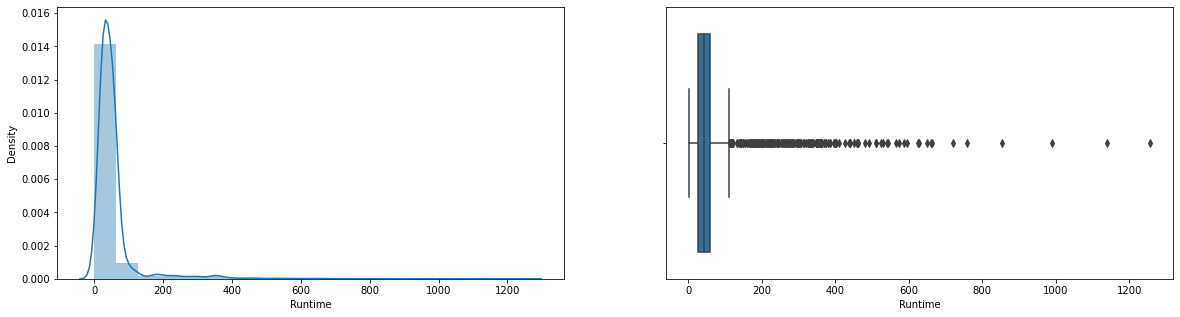

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_runtimes['Runtime'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_runtimes['Runtime'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_runtimes_tvshows = df_tvshows_runtimes.loc[df_tvshows_runtimes['Netflix'] == 1]
hulu_runtimes_tvshows = df_tvshows_runtimes.loc[df_tvshows_runtimes['Hulu'] == 1]
prime_video_runtimes_tvshows = df_tvshows_runtimes.loc[df_tvshows_runtimes['Prime Video'] == 1]
disney_runtimes_tvshows = df_tvshows_runtimes.loc[df_tvshows_runtimes['Disney+'] == 1]

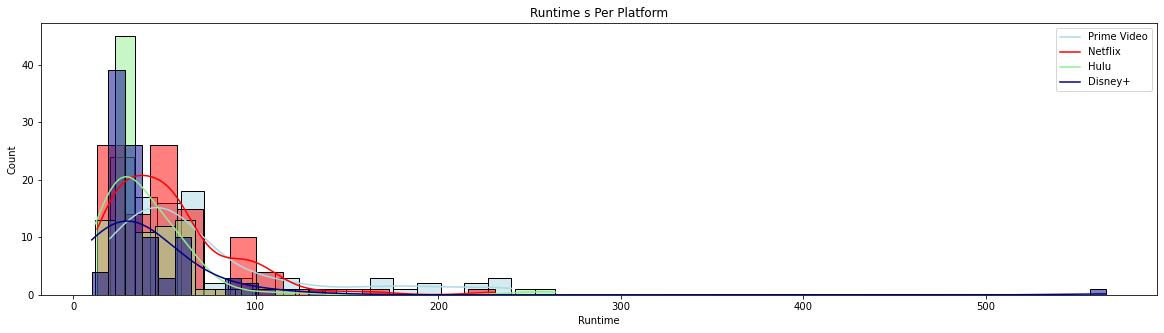

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Runtime s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_runtimes_tvshows['Runtime'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_runtimes_tvshows['Runtime'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_runtimes_tvshows['Runtime'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_runtimes_tvshows['Runtime'][:100], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest Runtime  Ever Got is '{df_runtimes_high_tvshows['Title'][0]}' : '{df_runtimes_high_tvshows['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  Ever Got is '{df_runtimes_low_tvshows['Title'][0]}' : '{df_runtimes_low_tvshows['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Netflix' is '{netflix_runtimes_high_tvshows['Title'][0]}' : '{netflix_runtimes_high_tvshows['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Netflix' is '{netflix_runtimes_low_tvshows['Title'][0]}' : '{netflix_runtimes_low_tvshows['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Hulu' is '{hulu_runtimes_high_tvshows['Title'][0]}' : '{hulu_runtimes_high_tvshows['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Hulu' is '{hulu_runtimes_low_tvshows['Title'][0]}' : '{hulu_runtimes_low_tvshows['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Prime Video' is '{prime_video_runtimes_high_tvshows['Title'][0]}' : '{prime_video_runtimes_high_tvshows['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Prime Video' is '{prime_video_runtimes_low_tvshows['Title'][0]}' : '{prime_video_runtimes_low_tvshows['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Disney+' is '{disney_runtimes_high_tvshows['Title'][0]}' : '{disney_runtimes_high_tvshows['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Disney+' is '{disney_runtimes_low_tvshows['Title'][0]}' : '{disney_runtimes_low_tvshows['Runtime'].min()}'\n 
      ''')


      The TV Show with Highest Runtime  Ever Got is 'Colorado' : '1256'

      The TV Show with Lowest Runtime  Ever Got is 'DoongDoong' : '1'

      
      The TV Show with Highest Runtime  on 'Netflix' is 'The Vietnam War' : '990'

      The TV Show with Lowest Runtime  on 'Netflix' is 'Larva' : '2'

      
      The TV Show with Highest Runtime  on 'Hulu' is 'Roots' : '588'

      The TV Show with Lowest Runtime  on 'Hulu' is 'Mighty Magiswords' : '3'

      
      The TV Show with Highest Runtime  on 'Prime Video' is 'Colorado' : '1256'

      The TV Show with Lowest Runtime  on 'Prime Video' is 'DoongDoong' : '1'

      
      The TV Show with Highest Runtime  on 'Disney+' is 'Stargirl' : '566'

      The TV Show with Lowest Runtime  on 'Disney+' is 'Pixar in Real Life' : '4'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Runtime  is '{round(df_tvshows_runtimes['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Netflix' is '{round(netflix_runtimes_tvshows['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Hulu' is '{round(hulu_runtimes_tvshows['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Prime Video' is '{round(prime_video_runtimes_tvshows['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Disney+' is '{round(disney_runtimes_tvshows['Runtime'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Runtime  is '55.19'

      The Average Runtime  on 'Netflix' is '55.9'

      The Average Runtime  on 'Hulu' is '45.53'

      The Average Runtime  on 'Prime Video' is '62.92'

      The Average Runtime  on 'Disney+' is '38.24'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
        
def round_fix(data):
    if data in range(0,51):
        # print(data)
        return 50
    if data in range(51,101):
        return 100
    if data in range(101,151):
        return 150
    if data in range(151,201):
        return 200
    if data in range(201,251):
        return 250
    if data in range(251,301):
        return 300
    if data in range(301,351):
        return 350
    if data in range(351,401):
        return 400
    if data in range(401,451):
        return 450
    if data in range(451,501):
        return 500
    if data in range(501,551):
        return 550
    if data in range(551,601):
        return 600
    if data in range(601,651):
        return 650
    if data in range(651,701):
        return 700
    if data in range(701,751):
        return 750
    if data in range(751,801):
        return 800
    if data in range(801,851):
        return 850
    if data in range(851,901):
        return 900
    if data in range(901,951):
        return 950
    if data in range(951,1001):
        return 1000
    if data in range(1001,1051):
        return 1050
    if data in range(1051,1101):
        return 1100
    if data in range(1101,1151):
        return 1150
    if data in range(1151,1201):
        return 1200
    if data in range(1201,1251):
        return 1250
    if data in range(1251,1301):
        return 1300
    if data in range(1301,1351):
        return 1350
    if data in range(1351,2001):
        return 2000
    
df_tvshows_runtimes['Runtime Group'] = df_tvshows_runtimes['Runtime'].apply(round_fix)
 
runtimes_values = df_tvshows_runtimes['Runtime Group'].value_counts().sort_index(ascending = False).tolist()
runtimes_index = df_tvshows_runtimes['Runtime Group'].value_counts().sort_index(ascending = False).index
 
runtimes_values, runtimes_index

([1, 1, 1, 1, 1, 1, 2, 3, 4, 6, 7, 7, 29, 23, 31, 36, 46, 73, 1083, 2666],
 Int64Index([1300, 1150, 1000,  900,  800,  750,  700,  650,  600,  550,  500,
              450,  400,  350,  300,  250,  200,  150,  100,   50],
            dtype='int64'))

In [ ]:
runtimes_group_count = df_tvshows_runtimes.groupby('Runtime Group')['Title'].count()
runtimes_group_tvshow = df_tvshows_runtimes.groupby('Runtime Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
runtimes_group_data_tvshows = pd.concat([runtimes_group_count, runtimes_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
runtimes_group_data_tvshows = runtimes_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# Runtime Group with TV Shows Counts - All Platforms Combined
runtimes_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0              50            2666      970   945          847      139
1             100            1083      400   316          418       17
2             150              73       22    12           41        2
3             200              46       12     6           31        0
4             250              36       15     4           18        0
5             300              31       12     4           16        0
7             400              29       14     2           12        1
6             350              23        5     6           14        0
8             450               7        3     3            1        0
9             500               7        3     3            1        0
10            550               6        1     3            3        0
11            600               4        1     1            1        1
12            650               3        1     0            2        0
13            700               2        1     0            1        0
14            750               1        0     0            1        0
15            800               1        0     0            1        0
16            900               1        1     0            0        0
17           1000               1        1     0            0        0
18           1150               1        0     0            1        0
19           1300               1        0     0            1        0

In [ ]:
runtimes_group_data_tvshows.sort_values(by = 'Runtime Group', ascending = False)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
19           1300               1        0     0            1        0
18           1150               1        0     0            1        0
17           1000               1        1     0            0        0
16            900               1        1     0            0        0
15            800               1        0     0            1        0
14            750               1        0     0            1        0
13            700               2        1     0            1        0
12            650               3        1     0            2        0
11            600               4        1     1            1        1
10            550               6        1     3            3        0
9             500               7        3     3            1        0
8             450               7        3     3            1        0
7             400              29       14     2           12        1
6             350              23        5     6           14        0
5             300              31       12     4           16        0
4             250              36       15     4           18        0
3             200              46       12     6           31        0
2             150              73       22    12           41        2
1             100            1083      400   316          418       17
0              50            2666      970   945          847      139

In [ ]:
df_runtimes_group_high_tvshows = runtimes_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_runtimes_group_high_tvshows = df_runtimes_group_high_tvshows.drop(['index'], axis = 1)
# filter = (runtimes_group_data_tvshows['TV Shows Count'] ==  (runtimes_group_data_tvshows['TV Shows Count'].max()))
# df_runtimes_group_high_tvshows = runtimes_group_data_tvshows[filter]
 
# highest_rated_tvshow = runtimes_group_data_tvshows.loc[runtimes_group_data_tvshows['TV Shows Count'].idxmax()]
 
# print('\nRuntime with Highest Ever TV Shows Count are : All Platforms Combined\n')
# df_runtimes_group_high_tvshows.head(5)

In [ ]:
df_runtimes_group_low_tvshows = runtimes_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_runtimes_group_low_tvshows = df_runtimes_group_low_tvshows.drop(['index'], axis = 1)
# filter = (runtimes_group_data_tvshows['TV Shows Count'] = =  (runtimes_group_data_tvshows['TV Shows Count'].min()))
# df_runtimes_group_low_tvshows = runtimes_group_data_tvshows[filter]
 
# print('\nRuntime with Lowest Ever TV Shows Count are : All Platforms Combined\n')
# df_runtimes_group_low_tvshows.head(5)

In [ ]:
print(f'''
      Total '{df_tvshows_runtimes['Runtime Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{runtimes_group_data_tvshows['Runtime Group'].unique().shape[0]}' Runtime Group, They were Like this, \n
 
      {runtimes_group_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Runtime Group'].unique()} etc. \n
 
      The Runtime Group with Highest TV Shows Count have '{runtimes_group_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_runtimes_group_high_tvshows['Runtime Group'][0]}', &\n
      The Runtime Group with Lowest TV Shows Count have '{runtimes_group_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_runtimes_group_low_tvshows['Runtime Group'][0]}'
      ''')


      Total '4022' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '20' Runtime Group, They were Like this, 

 
      [  50  100  150  200  250  300  400  350  450  500  550  600  650  700
  750  800  900 1000 1150 1300] etc. 

 
      The Runtime Group with Highest TV Shows Count have '2666' TV Shows Available is '50', &

      The Runtime Group with Lowest TV Shows Count have '1' TV Shows Available is '1300'
      


In [ ]:
fig = px.pie(runtimes_group_data_tvshows[:10], names = 'Runtime Group', values = 'TV Shows Count')
fig.update_traces(textinfo = 'percent+label', title = 'TV Shows Count based on Runtime Group s')
fig.show()

In [ ]:
netflix_runtimes_group_tvshows = runtimes_group_data_tvshows[runtimes_group_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_runtimes_group_tvshows = netflix_runtimes_group_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_runtimes_group_high_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_runtimes_group_high_tvshows = netflix_runtimes_group_high_tvshows.drop(['index'], axis = 1)
 
netflix_runtimes_group_low_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_runtimes_group_low_tvshows = netflix_runtimes_group_low_tvshows.drop(['index'], axis = 1)
 
netflix_runtimes_group_high_tvshows.head(5)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0             50            2666      970   945          847      139
1            100            1083      400   316          418       17
2            150              73       22    12           41        2
3            250              36       15     4           18        0
4            400              29       14     2           12        1

In [ ]:
hulu_runtimes_group_tvshows = runtimes_group_data_tvshows[runtimes_group_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_runtimes_group_tvshows = hulu_runtimes_group_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_runtimes_group_high_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_runtimes_group_high_tvshows = hulu_runtimes_group_high_tvshows.drop(['index'], axis = 1)
 
hulu_runtimes_group_low_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_runtimes_group_low_tvshows = hulu_runtimes_group_low_tvshows.drop(['index'], axis = 1)
 
hulu_runtimes_group_high_tvshows.head(5)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0             50            2666      970   945          847      139
1            100            1083      400   316          418       17
2            150              73       22    12           41        2
3            200              46       12     6           31        0
4            350              23        5     6           14        0

In [ ]:
prime_video_runtimes_group_tvshows = runtimes_group_data_tvshows[runtimes_group_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_runtimes_group_tvshows = prime_video_runtimes_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_runtimes_group_high_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_runtimes_group_high_tvshows = prime_video_runtimes_group_high_tvshows.drop(['index'], axis = 1)
 
prime_video_runtimes_group_low_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_runtimes_group_low_tvshows = prime_video_runtimes_group_low_tvshows.drop(['index'], axis = 1)
 
prime_video_runtimes_group_high_tvshows.head(5)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0             50            2666      970   945          847      139
1            100            1083      400   316          418       17
2            150              73       22    12           41        2
3            200              46       12     6           31        0
4            250              36       15     4           18        0

In [ ]:
disney_runtimes_group_tvshows = runtimes_group_data_tvshows[runtimes_group_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_runtimes_group_tvshows = disney_runtimes_group_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_runtimes_group_high_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_runtimes_group_high_tvshows = disney_runtimes_group_high_tvshows.drop(['index'], axis = 1)
 
disney_runtimes_group_low_tvshows = df_runtimes_group_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_runtimes_group_low_tvshows = disney_runtimes_group_low_tvshows.drop(['index'], axis = 1)
 
disney_runtimes_group_high_tvshows.head(5)

Runtime Group  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0             50            2666      970   945          847      139
1            100            1083      400   316          418       17
2            150              73       22    12           41        2
3            400              29       14     2           12        1
4            600               4        1     1            1        1

In [ ]:
print(f'''
      The Runtime Group with Highest TV Shows Count Ever Got is '{df_runtimes_group_high_tvshows['Runtime Group'][0]}' : '{df_runtimes_group_high_tvshows['TV Shows Count'].max()}'\n
      The Runtime Group with Lowest TV Shows Count Ever Got is '{df_runtimes_group_low_tvshows['Runtime Group'][0]}' : '{df_runtimes_group_low_tvshows['TV Shows Count'].min()}'\n
      
      The Runtime Group with Highest TV Shows Count on 'Netflix' is '{netflix_runtimes_group_high_tvshows['Runtime Group'][0]}' : '{netflix_runtimes_group_high_tvshows['Netflix'].max()}'\n
      The Runtime Group with Lowest TV Shows Count on 'Netflix' is '{netflix_runtimes_group_low_tvshows['Runtime Group'][0]}' : '{netflix_runtimes_group_low_tvshows['Netflix'].min()}'\n
      
      The Runtime Group with Highest TV Shows Count on 'Hulu' is '{hulu_runtimes_group_high_tvshows['Runtime Group'][0]}' : '{hulu_runtimes_group_high_tvshows['Hulu'].max()}'\n
      The Runtime Group with Lowest TV Shows Count on 'Hulu' is '{hulu_runtimes_group_low_tvshows['Runtime Group'][0]}' : '{hulu_runtimes_group_low_tvshows['Hulu'].min()}'\n
      
      The Runtime Group with Highest TV Shows Count on 'Prime Video' is '{prime_video_runtimes_group_high_tvshows['Runtime Group'][0]}' : '{prime_video_runtimes_group_high_tvshows['Prime Video'].max()}'\n
      The Runtime Group with Lowest TV Shows Count on 'Prime Video' is '{prime_video_runtimes_group_low_tvshows['Runtime Group'][0]}' : '{prime_video_runtimes_group_low_tvshows['Prime Video'].min()}'\n
      
      The Runtime Group with Highest TV Shows Count on 'Disney+' is '{disney_runtimes_group_high_tvshows['Runtime Group'][0]}' : '{disney_runtimes_group_high_tvshows['Disney+'].max()}'\n
      The Runtime Group with Lowest TV Shows Count on 'Disney+' is '{disney_runtimes_group_low_tvshows['Runtime Group'][0]}' : '{disney_runtimes_group_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Runtime Group with Highest TV Shows Count Ever Got is '50' : '2666'

      The Runtime Group with Lowest TV Shows Count Ever Got is '1300' : '1'

      
      The Runtime Group with Highest TV Shows Count on 'Netflix' is '50' : '970'

      The Runtime Group with Lowest TV Shows Count on 'Netflix' is '1300' : '0'

      
      The Runtime Group with Highest TV Shows Count on 'Hulu' is '50' : '945'

      The Runtime Group with Lowest TV Shows Count on 'Hulu' is '1300' : '0'

      
      The Runtime Group with Highest TV Shows Count on 'Prime Video' is '50' : '847'

      The Runtime Group with Lowest TV Shows Count on 'Prime Video' is '1000' : '0'

      
      The Runtime Group with Highest TV Shows Count on 'Disney+' is '50' : '139'

      The Runtime Group with Lowest TV Shows Count on 'Disney+' is '500' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averruntimes_group TV Shows Count of Runtime Group is '{round(runtimes_group_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average runtimes_group TV Shows Count of Runtime Group on 'Netflix' is '{round(netflix_runtimes_group_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average runtimes_group TV Shows Count of Runtime Group on 'Hulu' is '{round(hulu_runtimes_group_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average runtimes_group TV Shows Count of Runtime Group on 'Prime Video' is '{round(prime_video_runtimes_group_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average runtimes_group TV Shows Count of Runtime Group on 'Disney+' is '{round(disney_runtimes_group_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averruntimes_group TV Shows Count of Runtime Group is '201.1'

      The Average runtimes_group TV Shows Count of Runtime Group on 'Netflix' is '91.38'

      The Average runtimes_group TV Shows Count of Runtime Group on 'Hulu' is '108.75'

      The Average runtimes_group TV Shows Count of Runtime Group on 'Prime Video' is '78.33'

      The Average runtimes_group TV Shows Count of Runtime Group on 'Disney+' is '32.0'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Runtime Group is '{runtimes_group_data_tvshows['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Netflix' is '{netflix_runtimes_group_tvshows['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Hulu' is '{hulu_runtimes_group_tvshows['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Prime Video' is '{prime_video_runtimes_group_tvshows['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Disney+' is '{disney_runtimes_group_tvshows['Runtime Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Runtime Group is '20'

      Total Count of Runtime Group on 'Netflix' is '16'

      Total Count of Runtime Group on 'Hulu' is '12'

      Total Count of Runtime Group on 'Prime Video' is '18'

      Total Count of Runtime Group on 'Disney+' is '5'
 
      


In [ ]:
fig = px.bar(x = runtimes_group_data_tvshows['Runtime Group'], y = runtimes_group_data_tvshows['TV Shows Count'], 
             color = runtimes_group_data_tvshows['TV Shows Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Runtime Group', 'y' : 'Number of TV Shows'})
fig.show()

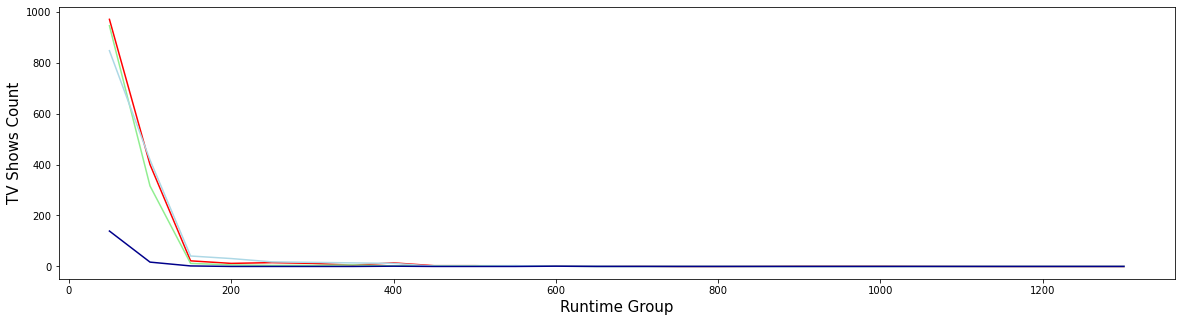

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = runtimes_group_data_tvshows['Runtime Group'], y = runtimes_group_data_tvshows['Netflix'], color = 'red')
sns.lineplot(x = runtimes_group_data_tvshows['Runtime Group'], y = runtimes_group_data_tvshows['Hulu'], color = 'lightgreen')
sns.lineplot(x = runtimes_group_data_tvshows['Runtime Group'], y = runtimes_group_data_tvshows['Prime Video'], color = 'lightblue')
sns.lineplot(x = runtimes_group_data_tvshows['Runtime Group'], y = runtimes_group_data_tvshows['Disney+'], color = 'darkblue')
plt.xlabel('Runtime Group', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

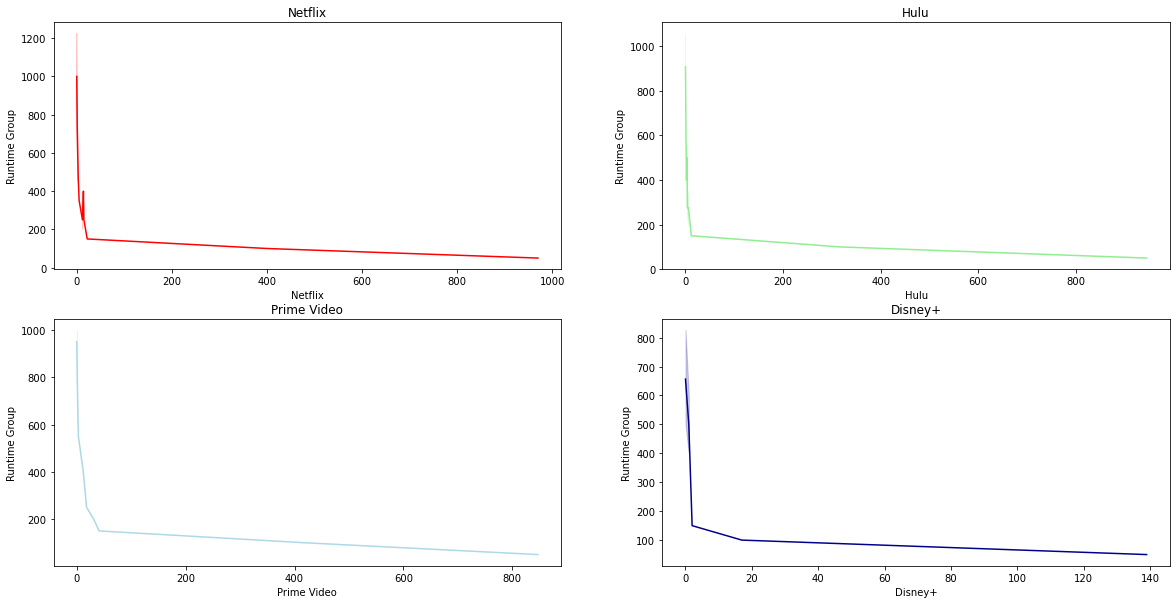

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_ru_ax1 = sns.lineplot(y = runtimes_group_data_tvshows['Runtime Group'], x = runtimes_group_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_ru_ax2 = sns.lineplot(y = runtimes_group_data_tvshows['Runtime Group'], x = runtimes_group_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_ru_ax3 = sns.lineplot(y = runtimes_group_data_tvshows['Runtime Group'], x = runtimes_group_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_ru_ax4 = sns.lineplot(y = runtimes_group_data_tvshows['Runtime Group'], x = runtimes_group_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_ru_ax1.title.set_text(labels[0])
h_ru_ax2.title.set_text(labels[1])
p_ru_ax3.title.set_text(labels[2])
d_ru_ax4.title.set_text(labels[3])
 
plt.show()

In [ ]:
df_tvshows_seasons = df_tvshows.copy()

In [ ]:
df_tvshows_seasons.drop(df_tvshows_seasons.loc[df_tvshows_seasons['Seasons'] == "NA"].index, inplace = True)
# df_tvshows_seasons = df_tvshows_seasons[df_tvshows_seasons.Seasons != "NA"]
df_tvshows_seasons['Seasons'] = df_tvshows_seasons['Seasons'].astype(int)

In [ ]:
df_seasons_most_tvshows = df_tvshows_seasons.sort_values(by = 'Seasons', ascending = False).reset_index()
df_seasons_most_tvshows = df_seasons_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_seasons['Seasons'] == (df_tvshows_seasons['Seasons'].max()))
# df_seasons_most_tvshows = df_tvshows_seasons[filter]

# mostest_rated_tvshow = df_tvshows_seasons.loc[df_tvshows_seasons['Seasons'].idxmax()]

print('\nTV Shows with Most Seasons Ever  are : \n')
df_seasons_most_tvshows.head(5)


TV Shows with Most Seasons Ever  are : 



ID                   Title  Year Age IMDb Rotten Tomatoes Directors  \
0   723             Case Closed  1996   7  8.4              NA        NA   
1  2481           Sesame Street  1969   0  8.1              NA        NA   
2  2142  Bottersnikes & Gumbles  2016   7  5.2              NA        NA   
3  2747                 Chopped  2009   0  7.5              NA        NA   
4   869                    NOVA  1974  16  8.7              NA        NA   

                                                Cast  \
0  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
1  Caroll Spinney,Frank Oz,Jerry Nelson,Sonia Man...   
2  Ray Chase,Robbie Daymond,Tara Sands,Alex Babic...   
3  Ted Allen,Amanda Freitag,Alex Guarnaschelli,Ma...   
4  Jay O. Sanders,Craig Sechler,Lance Lewman,Will...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Crime,Drama,...   
1    Animation,Adventure,Comedy,Family,Fantasy,Music   
2                  Animation,Adventure,Comedy,Family   
3                                         Reality-TV   
4                                        Documentary   

                                   Country  ...  \
0  Japan,Italy,United Kingdom,Mexico,Spain  ...   
1                            United States  ...   
2   United States,United Kingdom,Australia  ...   
3                            United States  ...   
4                            United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      25  tv series   
1                                                 NA      55  tv series   
2  When unemployed dockworker Joey Coyle finds $1...      11  tv series   
3  Follows James Isaac "Jimmy" Neutron (Debi Derr...      60  tv series   
4  A police investigator named Arnar travels from...      60  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      53        1     1            0        0     1           Netflix  
1      51        0     1            1        0     1       Prime Video  
2      51        1     0            0        0     1           Netflix  
3      49        0     1            0        0     1              Hulu  
4      48        1     0            1        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
df_seasons_least_tvshows = df_tvshows_seasons.sort_values(by = 'Seasons', ascending = True).reset_index()
df_seasons_least_tvshows = df_seasons_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_seasons['Seasons'] == (df_tvshows_seasons['Seasons'].min()))
# df_seasons_least_tvshows = df_tvshows_seasons[filter]

print('\nTV Shows with Least Seasons Ever  are : \n')
df_seasons_least_tvshows.head(5)


TV Shows with Least Seasons Ever  are : 



ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  5432      United States of Animals  2016  13  6.3              NA   
1  2205       Secrets of Ancient Rome  2015  NR   NA              NA   
2  2206  The Princess Weiyoung - 锦绣未央  2016  NR   NA              NA   
3  2207              Trawlermen Tales  2016  NR  5.7              NA   
4  2208                   Wild Alaska  2014  NR  7.9              NA   

     Directors                                               Cast  \
0           NA  Quincy Dunn-Baker,Jo Mendenhall,Dale Anderson,...   
1  Aaron Bauer                                       Dylan Dreyer   
2           NA                                                 NA   
3           NA                                          Sean Bean   
4           NA             Denny Heide,Harvey Kitka,Dougray Scott   

        Genres         Country  ...  \
0           NA   United States  ...   
1         News              NA  ...   
2           NA              NA  ...   
3  Documentary  United Kingdom  ...   
4  Documentary  United Kingdom  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      22  tv series   
1  Two strangers' lives become inextricably bound...      23  tv series   
2  By 2008, more than 25 percent of major league ...      NA  tv series   
3                                                 NA      NA  tv series   
4                                                 NA      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       1        0     0            0        1     1           Disney+  
1       1        1     0            0        0     1           Netflix  
2       1        1     0            0        0     1           Netflix  
3       1        1     0            0        0     1           Netflix  
4       1        1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_tvshows_seasons['Seasons'].unique().shape[0]}' unique Seasons s were Given, They were Like this,\n
      
{df_tvshows_seasons.sort_values(by = 'Seasons', ascending = False)['Seasons'].unique()}\n

      The Least Seasons TV Show Ever is '{df_seasons_most_tvshows['Title'][0]}' : '{df_seasons_most_tvshows['Seasons'].max()}'\n

      The Most Seasons TV Show Ever is '{df_seasons_least_tvshows['Title'][0]}' : '{df_seasons_least_tvshows['Seasons'].min()}'\n
      ''')


      Total '48' unique Seasons s were Given, They were Like this,

      
[53 51 49 48 46 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25
 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]


      The Least Seasons TV Show Ever is 'Case Closed' : '53'


      The Most Seasons TV Show Ever is 'United States of Animals' : '1'

      


In [ ]:
netflix_seasons_most_tvshows = df_seasons_most_tvshows.loc[df_seasons_most_tvshows['Netflix']==1].reset_index()
netflix_seasons_most_tvshows = netflix_seasons_most_tvshows.drop(['index'], axis = 1)

netflix_seasons_least_tvshows = df_seasons_least_tvshows.loc[df_seasons_least_tvshows['Netflix']==1].reset_index()
netflix_seasons_least_tvshows = netflix_seasons_least_tvshows.drop(['index'], axis = 1)

netflix_seasons_most_tvshows.head(5)

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   723                     Case Closed  1996   7  8.4              NA   
1  2142          Bottersnikes & Gumbles  2016   7  5.2              NA   
2   869                            NOVA  1974  16  8.7              NA   
3  1214                American Masters  1986  16    8              NA   
4   996  America's Funniest Home Videos  1989   0  6.2              NA   

  Directors                                               Cast  \
0        NA  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
1        NA  Ray Chase,Robbie Daymond,Tara Sands,Alex Babic...   
2        NA  Jay O. Sanders,Craig Sechler,Lance Lewman,Will...   
3        NA  Martin Scorsese,Peter Bogdanovich,Tony Bennett...   
4        NA  Jess Harnell,Tom Bergeron,Bob Saget,Ernie Ande...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Crime,Drama,...   
1                  Animation,Adventure,Comedy,Family   
2                                        Documentary   
3                              Documentary,Biography   
4                           Comedy,Family,Reality-TV   

                                   Country  ...  \
0  Japan,Italy,United Kingdom,Mexico,Spain  ...   
1   United States,United Kingdom,Australia  ...   
2                            United States  ...   
3                            United States  ...   
4                            United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      25  tv series   
1  When unemployed dockworker Joey Coyle finds $1...      11  tv series   
2  A police investigator named Arnar travels from...      60  tv series   
3                                                 NA      90  tv series   
4                                                 NA      30  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      53        1     1            0        0     1           Netflix  
1      51        1     0            0        0     1           Netflix  
2      48        1     0            1        0     1           Netflix  
3      35        1     0            0        0     1           Netflix  
4      31        1     1            0        1     1           Netflix  

[5 rows x 21 columns]

In [ ]:
hulu_seasons_most_tvshows = df_seasons_most_tvshows.loc[df_seasons_most_tvshows['Hulu']==1].reset_index()
hulu_seasons_most_tvshows = hulu_seasons_most_tvshows.drop(['index'], axis = 1)

hulu_seasons_least_tvshows = df_seasons_least_tvshows.loc[df_seasons_least_tvshows['Hulu']==1].reset_index()
hulu_seasons_least_tvshows = hulu_seasons_least_tvshows.drop(['index'], axis = 1)

hulu_seasons_most_tvshows.head(5)

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   723          Case Closed  1996   7  8.4              NA        NA   
1  2481        Sesame Street  1969   0  8.1              NA        NA   
2  2747              Chopped  2009   0  7.5              NA        NA   
3  2401  Saturday Night Live  1975  16  8.1              NA        NA   
4  3357       Inside the NFL  1977   7    7              NA        NA   

                                                Cast  \
0  Minami Takayama,Wakana Yamazaki,Hoang Khuyet,A...   
1  Caroll Spinney,Frank Oz,Jerry Nelson,Sonia Man...   
2  Ted Allen,Amanda Freitag,Alex Guarnaschelli,Ma...   
3  The Saturday Night Live Band,Don Pardo,Darrell...   
4  Phil Simms,Cris Collinsworth,Warren Sapp,James...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Crime,Drama,...   
1    Animation,Adventure,Comedy,Family,Fantasy,Music   
2                                         Reality-TV   
3                                       Comedy,Music   
4                               News,Sport,Talk-Show   

                                   Country  ...  \
0  Japan,Italy,United Kingdom,Mexico,Spain  ...   
1                            United States  ...   
2                            United States  ...   
3                            United States  ...   
4                            United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      25  tv series   
1                                                 NA      55  tv series   
2  Follows James Isaac "Jimmy" Neutron (Debi Derr...      60  tv series   
3  Dre Johnson (Anthony Anderson) has it all: a g...      90  tv series   
4  In 2001 intern Chandra Levy vanishes. Police s...      60  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      53        1     1            0        0     1           Netflix  
1      51        0     1            1        0     1       Prime Video  
2      49        0     1            0        0     1              Hulu  
3      46        0     1            0        0     1              Hulu  
4      43        0     1            0        0     1              Hulu  

[5 rows x 21 columns]

In [ ]:
prime_video_seasons_most_tvshows = df_seasons_most_tvshows.loc[df_seasons_most_tvshows['Prime Video']==1].reset_index()
prime_video_seasons_most_tvshows = prime_video_seasons_most_tvshows.drop(['index'], axis = 1)

prime_video_seasons_least_tvshows = df_seasons_least_tvshows.loc[df_seasons_least_tvshows['Prime Video']==1].reset_index()
prime_video_seasons_least_tvshows = prime_video_seasons_least_tvshows.drop(['index'], axis = 1)

prime_video_seasons_most_tvshows.head(5)

ID               Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2481       Sesame Street  1969   0  8.1              NA        NA   
1   869                NOVA  1974  16  8.7              NA        NA   
2  3586  Videofashion! News  2006  NR  5.6              NA        NA   
3  2402            Survivor  2000  16  7.2              NA        NA   
4  4590   Fashion News Live  2004  NR  6.6              NA        NA   

                                                Cast  \
0  Caroll Spinney,Frank Oz,Jerry Nelson,Sonia Man...   
1  Jay O. Sanders,Craig Sechler,Lance Lewman,Will...   
2  Malan Breton,Ingrid Graham,Kelly Hughes,Adrian...   
3  Jeff Probst,Rob Mariano,Parvati Shallow,Sandra...   
4  Rocco Leo Gaglioti,J. Alexander,Nigel Barker,C...   

                                            Genres        Country  ...  \
0  Animation,Adventure,Comedy,Family,Fantasy,Music  United States  ...   
1                                      Documentary  United States  ...   
2                                 Documentary,News  United States  ...   
3                   Adventure,Game-Show,Reality-TV  United States  ...   
4                                             News  United States  ...   

                                            Plotline Runtime       Kind  \
0                                                 NA      55  tv series   
1  A police investigator named Arnar travels from...      60  tv series   
2                                                 NA      NA  tv series   
3  Tandy Bowen and Tyrone Johnson, two teenagers ...      60  tv series   
4  Christmas Through the Decades explores the tra...      NA  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      51        0     1            1        0     1       Prime Video  
1      48        1     0            1        0     1           Netflix  
2      42        0     1            1        0     1       Prime Video  
3      41        0     1            1        0     1       Prime Video  
4      40        0     0            1        0     1       Prime Video  

[5 rows x 21 columns]

In [ ]:
disney_seasons_most_tvshows = df_seasons_most_tvshows.loc[df_seasons_most_tvshows['Disney+']==1].reset_index()
disney_seasons_most_tvshows = disney_seasons_most_tvshows.drop(['index'], axis = 1)

disney_seasons_least_tvshows = df_seasons_least_tvshows.loc[df_seasons_least_tvshows['Disney+']==1].reset_index()
disney_seasons_least_tvshows = disney_seasons_least_tvshows.drop(['index'], axis = 1)

disney_seasons_most_tvshows.head(5)

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0  2262                    The Simpsons  1989  16  8.6              85   
1   996  America's Funniest Home Videos  1989   0  6.2              NA   
2  5338                Little Einsteins  2005   0  6.2              NA   
3  2768          The Incredible Dr. Pol  2011   7  8.6              NA   
4  2715                 Life Below Zero  2013   7    8              NA   

  Directors                                               Cast  \
0        NA  Dan Castellaneta,Nancy Cartwright,Harry Sheare...   
1        NA  Jess Harnell,Tom Bergeron,Bob Saget,Ernie Ande...   
2        NA  David Jason,Aiden Pompey,Jesse Schwartz,Natali...   
3        NA  Jan Pol,Ari Rubin,Diane Pol,Charles Pol,Brenda...   
4        NA  James Franzo,Sue Aikens,Agnes Hailstone,Chip H...   

                                              Genres        Country  ...  \
0                                   Animation,Comedy  United States  ...   
1                           Comedy,Family,Reality-TV  United States  ...   
2  Animation,Adventure,Comedy,Family,Music,Musica...  United States  ...   
3                             Documentary,Reality-TV  United States  ...   
4                   Documentary,Adventure,Reality-TV  United States  ...   

                                            Plotline Runtime       Kind  \
0  The curious, adventure-seeking, fourth grade g...      22  tv series   
1                                                 NA      30  tv series   
2  The adventures of best friends CeCe Jones and ...      NA  tv series   
3  Allen Walker, a young Exorcist with a cursed e...      44  tv series   
4  Bobby Donnell is the head of a struggling Bost...      44  tv series   

  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0      34        0     1            0        1     1           Disney+  
1      31        1     1            0        1     1           Netflix  
2      20        0     0            0        1     1           Disney+  
3      18        0     1            0        1     1           Disney+  
4      14        0     1            0        1     1           Disney+  

[5 rows x 21 columns]

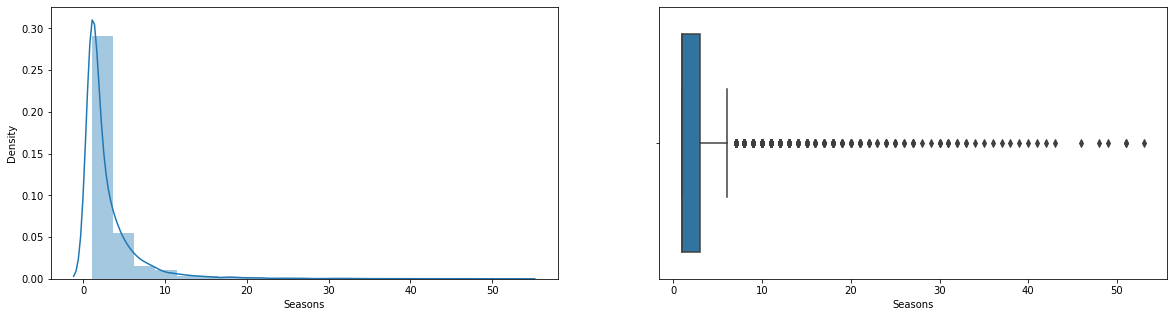

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_seasons['Seasons'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_seasons['Seasons'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_seasons_tvshows = df_tvshows_seasons.loc[df_tvshows_seasons['Netflix'] == 1]
hulu_seasons_tvshows = df_tvshows_seasons.loc[df_tvshows_seasons['Hulu'] == 1]
prime_video_seasons_tvshows = df_tvshows_seasons.loc[df_tvshows_seasons['Prime Video'] == 1]
disney_seasons_tvshows = df_tvshows_seasons.loc[df_tvshows_seasons['Disney+'] == 1]

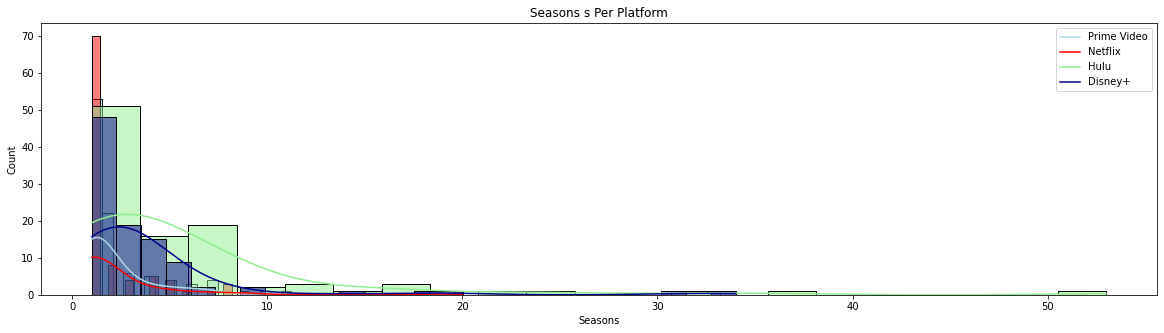

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Seasons s Per Platform')

# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_seasons_tvshows['Seasons'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_seasons_tvshows['Seasons'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_seasons_tvshows['Seasons'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_seasons_tvshows['Seasons'][:100], color = 'darkblue', legend = True, kde = True) 

# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The Least TV Show Ever Got is '{df_seasons_most_tvshows['Title'][0]}' : '{df_seasons_most_tvshows['Seasons'].max()}'\n
      The Most TV Show Ever Got is '{df_seasons_least_tvshows['Title'][0]}' : '{df_seasons_least_tvshows['Seasons'].min()}'\n
      
      The Least TV Show on 'Netflix' is '{netflix_seasons_most_tvshows['Title'][0]}' : '{netflix_seasons_most_tvshows['Seasons'].max()}'\n
      The Most TV Show on 'Netflix' is '{netflix_seasons_least_tvshows['Title'][0]}' : '{netflix_seasons_least_tvshows['Seasons'].min()}'\n
      
      The Least TV Show on 'Hulu' is '{hulu_seasons_most_tvshows['Title'][0]}' : '{hulu_seasons_most_tvshows['Seasons'].max()}'\n
      The Most TV Show on 'Hulu' is '{hulu_seasons_least_tvshows['Title'][0]}' : '{hulu_seasons_least_tvshows['Seasons'].min()}'\n
      
      The Least TV Show on 'Prime Video' is '{prime_video_seasons_most_tvshows['Title'][0]}' : '{prime_video_seasons_most_tvshows['Seasons'].max()}'\n
      The Most TV Show on 'Prime Video' is '{prime_video_seasons_least_tvshows['Title'][0]}' : '{prime_video_seasons_least_tvshows['Seasons'].min()}'\n
      
      The Least TV Show on 'Disney+' is '{disney_seasons_most_tvshows['Title'][0]}' : '{disney_seasons_most_tvshows['Seasons'].max()}'\n
      The Most TV Show on 'Disney+' is '{disney_seasons_least_tvshows['Title'][0]}' : '{disney_seasons_least_tvshows['Seasons'].min()}'\n 
      ''')


      The Least TV Show Ever Got is 'Case Closed' : '53'

      The Most TV Show Ever Got is 'United States of Animals' : '1'

      
      The Least TV Show on 'Netflix' is 'Case Closed' : '53'

      The Most TV Show on 'Netflix' is 'Secrets of Ancient Rome' : '1'

      
      The Least TV Show on 'Hulu' is 'Case Closed' : '53'

      The Most TV Show on 'Hulu' is 'Firefly' : '1'

      
      The Least TV Show on 'Prime Video' is 'Sesame Street' : '51'

      The Most TV Show on 'Prime Video' is 'The GiggleBellies - Monster Truck Learning' : '1'

      
      The Least TV Show on 'Disney+' is 'The Simpsons' : '34'

      The Most TV Show on 'Disney+' is 'United States of Animals' : '1'
 
      


In [ ]:
# def round_val(data):
#     if str(data) != 'nan':
#         return round(data)
# 		
# def round_fix(data):
#     if data in range(1, 201):
#         # print(data)
#         return 200
#     if data in range(201,401):
#         return 400
#     if data in range(401,601):
#         return 600
# 	if data in range(601,801):
#         return 800
# 	if data in range(801,1001):
#         return 1000
# 	if data in range(1001,1201):
#         return 1200
# 	if data in range(1201,1401):
#         return 1400
# 	if data in range(1401,1601):
#         return 1600
# 	if data in range(1601,1801):
#         return 1800
# 	if data in range(1801,2001):
#         return 2000
# 	if data in range(2001,2201):
#         return 2200
# 	if data in range(2201,2401):
#         return 2400
# 	if data in range(2401,2601):
#         return 2600
# 	if data in range(2601,2801):
#         return 2800
# 	if data in range(2801,3001):
#         return 3000
#     
# df_tvshows_seasons['Seasons Group'] = df_tvshows_seasons['Seasons'].apply(round_fix)
# 
# seasons_values = df_tvshows_seasons['Seasons Group'].value_counts().sort_index(ascending = False).tolist()
# seasons_index = df_tvshows_seasons['Seasons Group'].value_counts().sort_index(ascending = False).index
# 
# seasons_values, seasons_index

In [ ]:
seasons_count = df_tvshows_seasons.groupby('Seasons')['Title'].count()
seasons_tvshow = df_tvshows_seasons.groupby('Seasons')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
seasons_data_tvshows = pd.concat([seasons_count, seasons_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
seasons_data_tvshows = seasons_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [ ]:
# TV Shows Count per Seasons - All Platforms Combined
seasons_data_tvshows.head()

Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
# Highest TV Shows Count per Seasons - All Platforms Combined
df_seasons_high_tvshows = seasons_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_seasons_high_tvshows = df_seasons_high_tvshows.drop(['index'], axis = 1)
# filter = (seasons_data_tvshows['TV Shows Count'] = =  (seasons_data_tvshows['TV Shows Count'].max()))
# df_seasons_high_tvshows = seasons_data_tvshows[filter]
 
# highest_rated_tvshow = seasons_data_tvshows.loc[seasons_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nSeasons with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_seasons_high_tvshows.head(5)


Seasons with Highest Ever TV Shows Count are : All Platforms Combined



Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
# Lowest TV Shows Count per Seasons - All Platforms Combined
df_seasons_low_tvshows = seasons_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_seasons_low_tvshows = df_seasons_low_tvshows.drop(['index'], axis = 1)
# filter = (seasons_data_tvshows['TV Shows Count'] = =  (seasons_data_tvshows['TV Shows Count'].min()))
# df_seasons_low_tvshows = seasons_data_tvshows[filter]
 
print('\nSeasons with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_seasons_low_tvshows.head(5)


Seasons with Lowest Ever TV Shows Count are : All Platforms Combined



Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0       53               1        1     1            0        0
1       40               1        0     0            1        0
2       49               1        0     1            0        0
3       48               1        1     0            1        0
4       43               1        0     1            0        0

In [ ]:
print(f'''
      Total '{df_tvshows['Seasons'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{seasons_data_tvshows['Seasons'].unique().shape[0]}' Seasons, They were Like this, \n
 
      {seasons_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Seasons'].head(5).unique()} etc. \n
 
      The Seasons with Highest TV Shows Count have '{seasons_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_seasons_high_tvshows['Seasons'][0]}', &\n
      The Seasons with Lowest TV Shows Count have '{seasons_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_seasons_low_tvshows['Seasons'][0]}'
      ''')


      Total '5432' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '48' Seasons, They were Like this, 

 
      [1 2 3 4 5] etc. 

 
      The Seasons with Highest TV Shows Count have '2720' TV Shows Available is '1', &

      The Seasons with Lowest TV Shows Count have '1' TV Shows Available is '53'
      


In [ ]:
# Highest TV Shows Count per Seasons - Netflix
netflix_seasons_tvshows = seasons_data_tvshows[seasons_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_seasons_tvshows = netflix_seasons_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_seasons_high_tvshows = df_seasons_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_seasons_high_tvshows = netflix_seasons_high_tvshows.drop(['index'], axis = 1)
 
netflix_seasons_low_tvshows = df_seasons_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_seasons_low_tvshows = netflix_seasons_low_tvshows.drop(['index'], axis = 1)
 
netflix_seasons_high_tvshows.head(5)

Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
# Highest TV Shows Count per Seasons - Hulu
hulu_seasons_tvshows = seasons_data_tvshows[seasons_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_seasons_tvshows = hulu_seasons_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_seasons_high_tvshows = df_seasons_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_seasons_high_tvshows = hulu_seasons_high_tvshows.drop(['index'], axis = 1)
 
hulu_seasons_low_tvshows = df_seasons_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_seasons_low_tvshows = hulu_seasons_low_tvshows.drop(['index'], axis = 1)
 
hulu_seasons_high_tvshows.head(5)

Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
# Highest TV Shows Count per Seasons - Prime Video
prime_video_seasons_tvshows = seasons_data_tvshows[seasons_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_seasons_tvshows = prime_video_seasons_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_seasons_high_tvshows = df_seasons_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_seasons_high_tvshows = prime_video_seasons_high_tvshows.drop(['index'], axis = 1)
 
prime_video_seasons_low_tvshows = df_seasons_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_seasons_low_tvshows = prime_video_seasons_low_tvshows.drop(['index'], axis = 1)
 
prime_video_seasons_high_tvshows.head(5)

Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
# Highest TV Shows Count per Seasons - Disney+
disney_seasons_tvshows = seasons_data_tvshows[seasons_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_seasons_tvshows = disney_seasons_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_seasons_high_tvshows = df_seasons_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_seasons_high_tvshows = disney_seasons_high_tvshows.drop(['index'], axis = 1)
 
disney_seasons_low_tvshows = df_seasons_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_seasons_low_tvshows = disney_seasons_low_tvshows.drop(['index'], axis = 1)
 
disney_seasons_high_tvshows.head(5)

Seasons  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0        1            2720      906   565         1284       67
1        2             849      338   252          268       40
2        3             542      204   159          188       34
3        4             364      131   129          114       20
4        5             243       92    96           84        5

In [ ]:
print(f'''
      The Seasons with Highest TV Shows Count Ever Got is '{df_seasons_high_tvshows['Seasons'][0]}' : '{df_seasons_high_tvshows['TV Shows Count'].max()}'\n
      The Seasons with Lowest TV Shows Count Ever Got is '{df_seasons_low_tvshows['Seasons'][0]}' : '{df_seasons_low_tvshows['TV Shows Count'].min()}'\n
      
      The Seasons with Highest TV Shows Count on 'Netflix' is '{netflix_seasons_high_tvshows['Seasons'][0]}' : '{netflix_seasons_high_tvshows['Netflix'].max()}'\n
      The Seasons with Lowest TV Shows Count on 'Netflix' is '{netflix_seasons_low_tvshows['Seasons'][0]}' : '{netflix_seasons_low_tvshows['Netflix'].min()}'\n
      
      The Seasons with Highest TV Shows Count on 'Hulu' is '{hulu_seasons_high_tvshows['Seasons'][0]}' : '{hulu_seasons_high_tvshows['Hulu'].max()}'\n
      The Seasons with Lowest TV Shows Count on 'Hulu' is '{hulu_seasons_low_tvshows['Seasons'][0]}' : '{hulu_seasons_low_tvshows['Hulu'].min()}'\n
      
      The Seasons with Highest TV Shows Count on 'Prime Video' is '{prime_video_seasons_high_tvshows['Seasons'][0]}' : '{prime_video_seasons_high_tvshows['Prime Video'].max()}'\n
      The Seasons with Lowest TV Shows Count on 'Prime Video' is '{prime_video_seasons_low_tvshows['Seasons'][0]}' : '{prime_video_seasons_low_tvshows['Prime Video'].min()}'\n
      
      The Seasons with Highest TV Shows Count on 'Disney+' is '{disney_seasons_high_tvshows['Seasons'][0]}' : '{disney_seasons_high_tvshows['Disney+'].max()}'\n
      The Seasons with Lowest TV Shows Count on 'Disney+' is '{disney_seasons_low_tvshows['Seasons'][0]}' : '{disney_seasons_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Seasons with Highest TV Shows Count Ever Got is '1' : '2720'

      The Seasons with Lowest TV Shows Count Ever Got is '53' : '1'

      
      The Seasons with Highest TV Shows Count on 'Netflix' is '1' : '906'

      The Seasons with Lowest TV Shows Count on 'Netflix' is '34' : '0'

      
      The Seasons with Highest TV Shows Count on 'Hulu' is '1' : '565'

      The Seasons with Lowest TV Shows Count on 'Hulu' is '40' : '0'

      
      The Seasons with Highest TV Shows Count on 'Prime Video' is '1' : '1284'

      The Seasons with Lowest TV Shows Count on 'Prime Video' is '53' : '0'

      
      The Seasons with Highest TV Shows Count on 'Disney+' is '1' : '67'

      The Seasons with Lowest TV Shows Count on 'Disney+' is '24' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Seasons is '{round(seasons_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Seasons on 'Netflix' is '{round(netflix_seasons_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Seasons on 'Hulu' is '{round(hulu_seasons_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Seasons on 'Prime Video' is '{round(prime_video_seasons_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Seasons on 'Disney+' is '{round(disney_seasons_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Seasons is '113.17'

      The Average TV Shows Count of Seasons on 'Netflix' is '61.8'

      The Average TV Shows Count of Seasons on 'Hulu' is '37.14'

      The Average TV Shows Count of Seasons on 'Prime Video' is '68.47'

      The Average TV Shows Count of Seasons on 'Disney+' is '13.07'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Seasons is '{seasons_data_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Netflix' is '{netflix_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Hulu' is '{hulu_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Prime Video' is '{prime_video_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Disney+' is '{disney_seasons_tvshows['Seasons'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Seasons is '48'

      Total Count of Seasons on 'Netflix' is '30'

      Total Count of Seasons on 'Hulu' is '43'

      Total Count of Seasons on 'Prime Video' is '32'

      Total Count of Seasons on 'Disney+' is '14'
 
      


In [ ]:
fig = px.bar(seasons_data_tvshows[:20], x = 'Seasons', y = 'TV Shows Count', color = 'TV Shows Count', color_continuous_scale = 'Blues_r')
fig.show()

In [ ]:
fig = px.histogram(seasons_data_tvshows, x = 'Seasons', y = 'TV Shows Count')
fig.show()

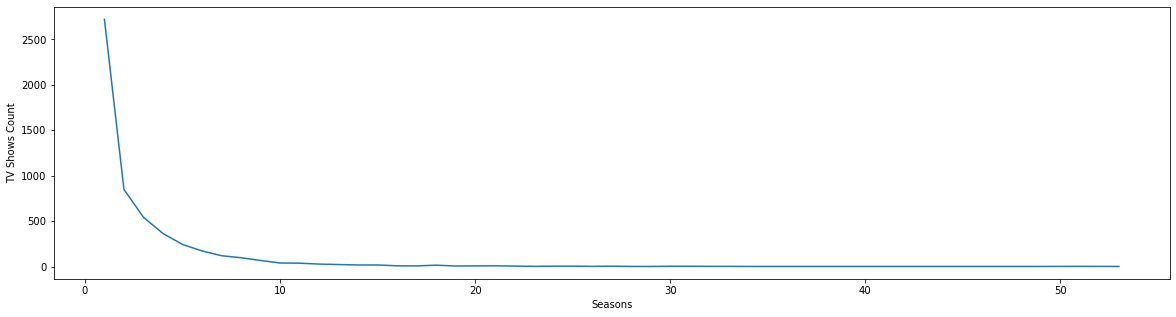

In [ ]:
fig = plt.figure(figsize = (20, 5))
sns.lineplot(data = seasons_data_tvshows, x = 'Seasons', y = 'TV Shows Count')
plt.show()

In [ ]:
print(f'''
      Accross All Platforms Total Count of Seasons is '{seasons_data_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Netflix' is '{netflix_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Hulu' is '{hulu_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Prime Video' is '{prime_video_seasons_tvshows['Seasons'].unique().shape[0]}'\n
      Total Count of Seasons on 'Disney+' is '{disney_seasons_tvshows['Seasons'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Seasons is '48'

      Total Count of Seasons on 'Netflix' is '30'

      Total Count of Seasons on 'Hulu' is '43'

      Total Count of Seasons on 'Prime Video' is '32'

      Total Count of Seasons on 'Disney+' is '14'
 
      


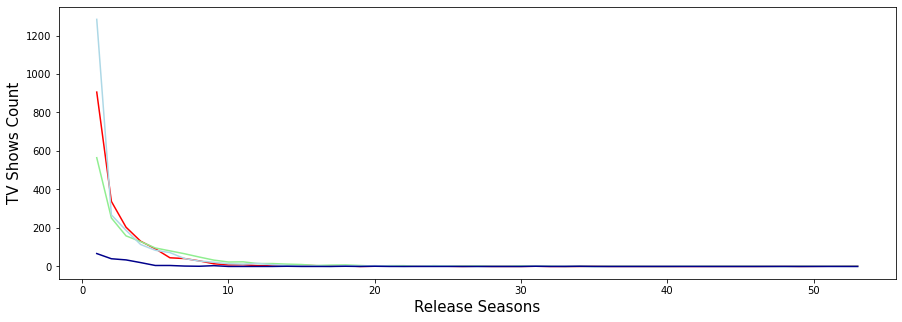

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Netflix'], color = 'red')
sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Hulu'], color = 'lightgreen')
sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Prime Video'], color = 'lightblue')
sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Disney+'], color = 'darkblue')
plt.xlabel('Release Seasons', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

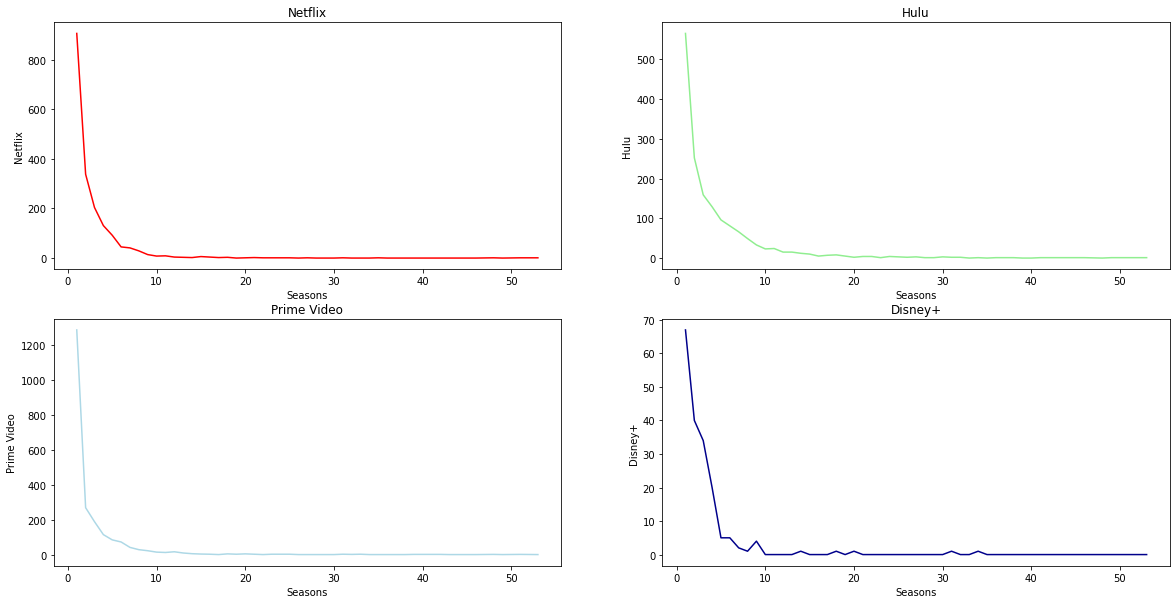

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(20 ,10))
 
n_y_ax1 = sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Netflix'], color = 'red', ax = axes[0, 0])
h_y_ax2 = sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_y_ax3 = sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_y_ax4 = sns.lineplot(x = seasons_data_tvshows['Seasons'], y = seasons_data_tvshows['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_y_ax1.title.set_text(labels[0])
h_y_ax2.title.set_text(labels[1])
p_y_ax3.title.set_text(labels[2])
d_y_ax4.title.set_text(labels[3])
 
plt.show()

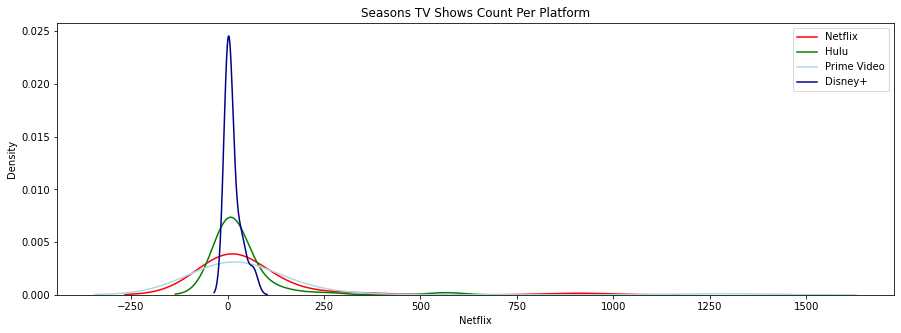

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Seasons TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_seasons_tvshows['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_seasons_tvshows['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_seasons_tvshows['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_seasons_tvshows['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()